In [1]:
import os
import sys
import pprint
from tqdm import tqdm

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from gammapy.data import Observation, observatory_locations
from gammapy.datasets import Datasets, SpectrumDataset, SpectrumDatasetOnOff
from gammapy.maps import MapAxis, RegionGeom
from gammapy.modeling import Fit
from gammapy.modeling.models import (
    Models, 
    SkyModel, 
    PowerLawSpectralModel,
    LogParabolaSpectralModel,
)
from gammapy.utils.check import check_tutorials_setup
from gammapy.visualization.utils import plot_contour_line

In [4]:
from gammapy.estimators import FluxPoints, SensitivityEstimator
from gammapy.irf import load_irf_dict_from_file
from gammapy.makers import SpectrumDatasetMaker
from gammapy.maps import MapAxis, RegionGeom
from gammapy.maps.axes import UNIT_STRING_FORMAT

In [5]:
from astropy import units as u
from astropy.table import Table
from astropy.coordinates import SkyCoord

In [6]:
import my_modules.config.cfg as cfg
import my_modules.plot_style.plotter as plotter
import my_modules.utilities.utilities as utl
from my_modules.spectral_models import SkyModelFactory
import my_modules.gammapy_catalogs.gammapy_catalogs as gammapy_cat
from my_modules.decorator import redirect_stdout, to_log_file

In [7]:
from settings import Settings

In [8]:
settings = Settings()

## Define o caminho onde estão os dados dos catálogos gammapy

OBS: é necessário fazer o download dos catálogos usando 

    gammapy download datasets

In [9]:
%env GAMMAPY_DATA=./gammapy-data/1.1

env: GAMMAPY_DATA=./gammapy-data/1.1


# Configuration

In [10]:
path_my_plot_style = f"{settings.PLOT_STYLES_PATH}/{settings.PLOT_STYLES_FILE}" 
plt.style.use(path_my_plot_style)

In [11]:
check_tutorials_setup()


System:

	python_executable      : /Users/livia/anaconda3/envs/gammapy-1.1/bin/python 
	python_version         : 3.9.18     
	machine                : x86_64     
	system                 : Darwin     


Gammapy package:

	version                : 1.1        
	path                   : /Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy 


Other packages:

	numpy                  : 1.24.4     
	scipy                  : 1.10.1     
	astropy                : 5.3.3      
	regions                : 0.7        
	click                  : 8.1.3      
	yaml                   : 6.0.1      
	IPython                : 8.7.0      
	jupyterlab             : 3.5.3      
	matplotlib             : 3.7.2      
	pandas                 : 1.5.2      
	healpy                 : 1.16.5     
	iminuit                : 2.21.3     
	sherpa                 : 4.15.1     
	naima                  : 0.10.0     
	emcee                  : 3.1.3      
	corner                 : 2.2.1      
	ray      

<a id='intro'></a>
🔝 [Back to Top](#indice)<br>
## 1. Introduction 
A Python code to search for possible γ-ray counterparts to the target source and to perform the spectral model fitting. This code selects the sources (in the Gammapy source catalogs) within the region of interest (centered in the position of the target source) and finds the best fit for the given spectrum model. 

## Counterparts Analysis

In [12]:
filename = "SpiderSystems.csv"

In [13]:
spider_systems = utl.read_systems_file(filename)

  0%|                                                         | 0/92 [00:00<?, ?it/s]/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/catalog/fermi.py:445: UserWarning: Warning: converting a masked element to nan.
  "index_2": np.nan_to_num(float(self.data["Unc_PLEC_Exp_Index"])),
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/catalog/fermi.py:445: UserWarning: Warning: converting a masked element to nan.
  "index_2": np.nan_to_num(float(self.data["Unc_PLEC_Exp_Index"])),
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/astropy/units/quantity.py:666: Ru

/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
  9%|████▎                                            | 8/92 [00:16<02:51,  2.04s/it]WARNING:gammapy.estimators.map.core:No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
 10%|████▊                                            | 9/92 [00:18<02:50,  2.05s/it]WARNING:gammapy.estimators.map.core:No reference model set 

 17%|████████▎                                       | 16/92 [00:32<02:26,  1.92s/it]WARNING:gammapy.estimators.map.core:No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
 18%|████████▊                                       | 17/92 [00:33<02:24,  1.92s/it]/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/catalog/fermi.py:445: UserWarning: Warning: converting a masked element to nan.
  "index_2": np.nan_to_num(float(self.data["Unc_PLEC_Exp_Index"])),
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-

/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
 27%|█████████████                                   | 25/92 [00:48<02:09,  1.93s/it]/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/catalog/fermi.py:445: UserWarning: Warning: converting a masked element to nan.
  "index_2": np.nan_to_num(float(self.data["Unc_PLEC_Exp_Index"])),
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/catalog/fermi.py:445: UserWarning: Warning: converting a masked element to nan.
  "index_2": np.nan_to_num(float(self.data["Unc_PLEC_Exp_Index"])),
/Users/livia/anaconda3/envs/gammapy

 34%|████████████████▏                               | 31/92 [01:01<02:01,  1.99s/it]WARNING:gammapy.estimators.map.core:No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
 35%|████████████████▋                               | 32/92 [01:02<01:43,  1.73s/it]WARNING:gammapy.estimators.map.core:No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provide

/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
 42%|████████████████████▎                           | 39/92 [01:16<01:43,  1.96s/it]/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/catalog/fermi.py:445: UserWarning: Warning: converting a masked element to nan.
  "index_2": np.nan_to_num(float(self.data["Unc_PLEC_Exp_Index"])),
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/catalog/fermi.py:445: UserWarning: Warning: converting a masked element to nan.
  "index_2": np.nan_to_num(float(self.data["Unc_PLEC_Exp_Index"])),
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/Users/livia/anaconda3/envs/gammapy

 50%|████████████████████████                        | 46/92 [01:29<01:30,  1.96s/it]WARNING:gammapy.estimators.map.core:No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
 51%|████████████████████████▌                       | 47/92 [01:31<01:28,  1.96s/it]WARNING:gammapy.estimators.map.core:No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provide

/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
 60%|████████████████████████████▋                   | 55/92 [01:47<01:09,  1.89s/it]WARNING:gammapy.estimators.map.core:No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result

/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
 67%|████████████████████████████████▎               | 62/92 [02:01<00:59,  1.97s/it]WARNING:gammapy.estimators.map.core:No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/catalog/fermi.py:445: UserWarning: Warning: converting a masked element to nan.
  "index_2": np.nan_to_num(float(self.data["Unc_PLEC_Exp_Index"])),
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/catalog/fermi.py:445: UserWarning: Warning: converting a masked elem

/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/catalog/fermi.py:445: UserWarning: Warning: converting a masked element to nan.
  "index_2": np.nan_to_num(float(self.data["Unc_PLEC_Exp_Index"])),
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
 74%|███████████████████████████████████▍            | 68/92 [02:13<00:48,  2.02s/it]WARNING:gammapy.estimators.map.core:No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will b

 83%|███████████████████████████████████████▋        | 76/92 [02:28<00:30,  1.89s/it]/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/catalog/fermi.py:445: UserWarning: Warning: converting a masked element to nan.
  "index_2": np.nan_to_num(float(self.data["Unc_PLEC_Exp_Index"])),
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/catalog/fermi.py:445: UserWarning: Warning: converting a masked element to nan.
  "index_2": np.nan_to_num(float(self.data["Unc_PLEC_Exp_Index"])),
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
 84%|██████████████████████████████

 90%|███████████████████████████████████████████▎    | 83/92 [02:42<00:16,  1.88s/it]/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/catalog/fermi.py:445: UserWarning: Warning: converting a masked element to nan.
  "index_2": np.nan_to_num(float(self.data["Unc_PLEC_Exp_Index"])),
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/catalog/fermi.py:445: UserWarning: Warning: converting a masked element to nan.
  "index_2": np.nan_to_num(float(self.data["Unc_PLEC_Exp_Index"])),
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
 91%|██████████████████████████████

/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/data/observations.py:226: GammapyDeprecationWarning: Pointing will be required to be provided as FixedPointingInfo
  warnings.warn(
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
 98%|██████████████████████████████████████████████▉ | 90/92 [02:56<00:04,  2.04s/it]/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/catalog/fermi.py:445: UserWarning: Warning: converting a masked element to nan.
  "index_2": np.nan_to_num(float(self.data["Unc_PLEC_Exp_Index"])),
/Users/livia/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/gammapy/catalog/fermi.py:445: UserWarning: Warning: converting a masked element to nan.
  "index_2": np.nan_to_num(float(self.data["Unc_PLEC_Exp_Index"])),
/Users/livia/anaconda3/envs/gammapy

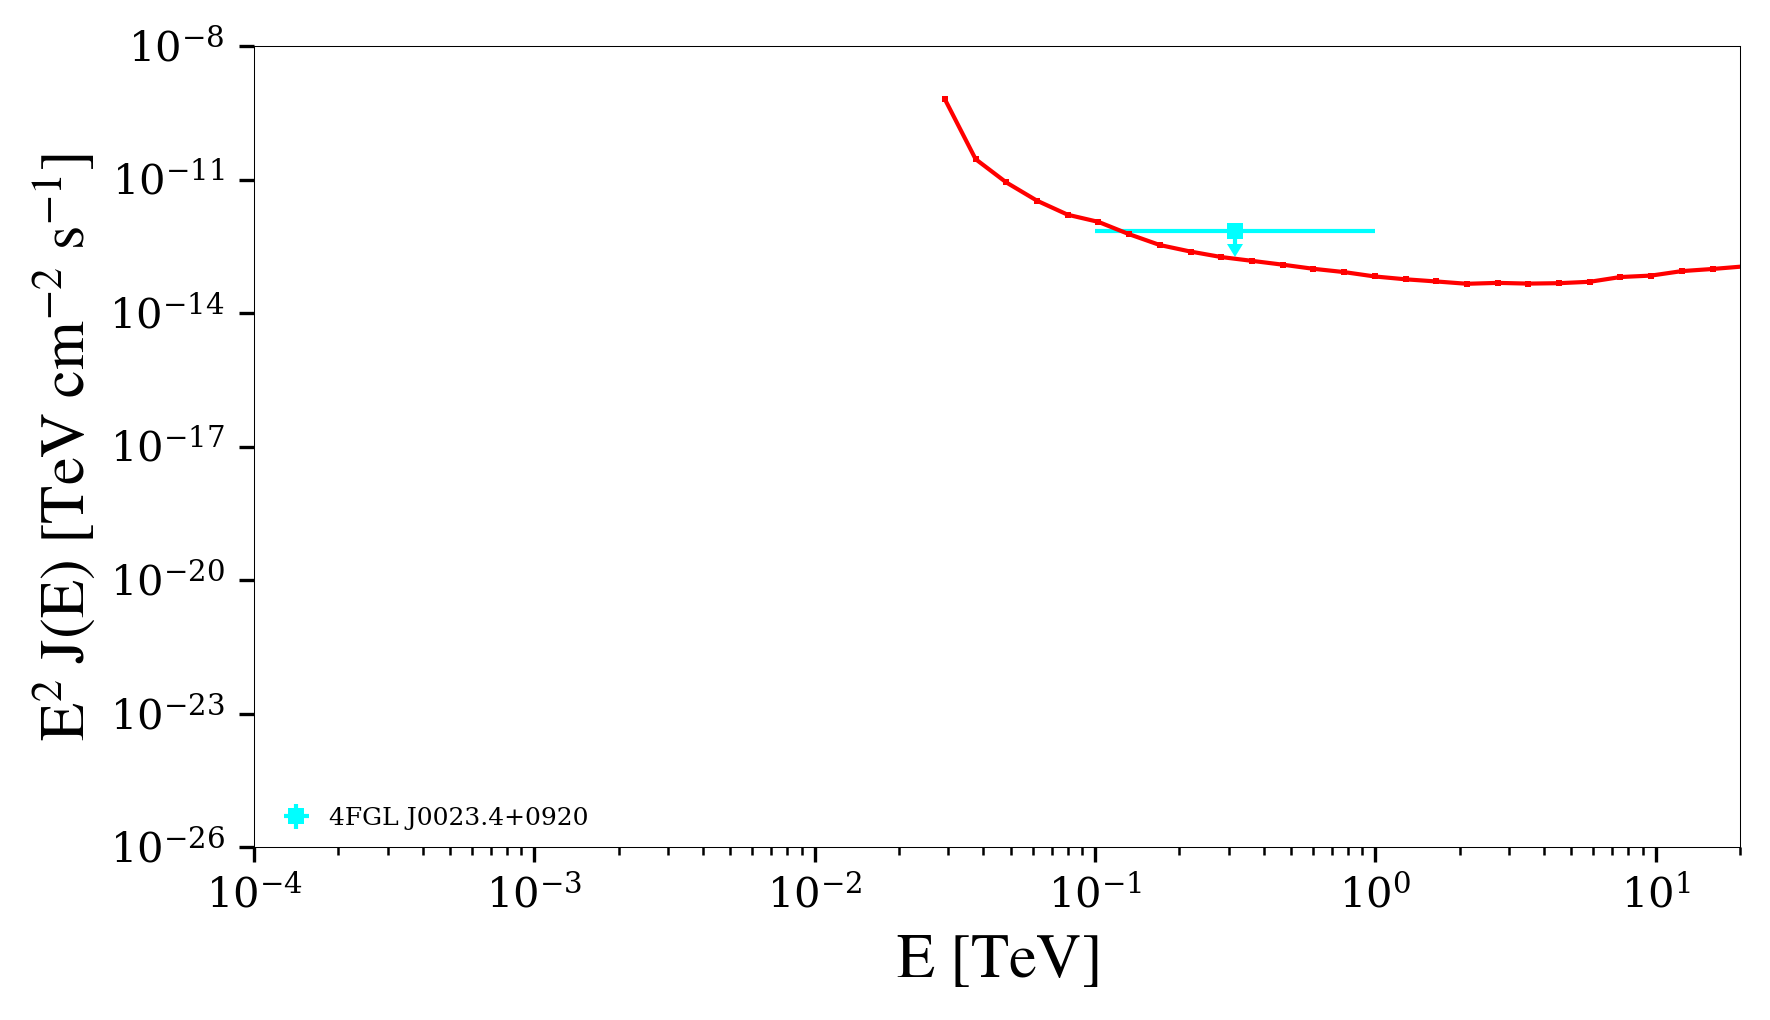

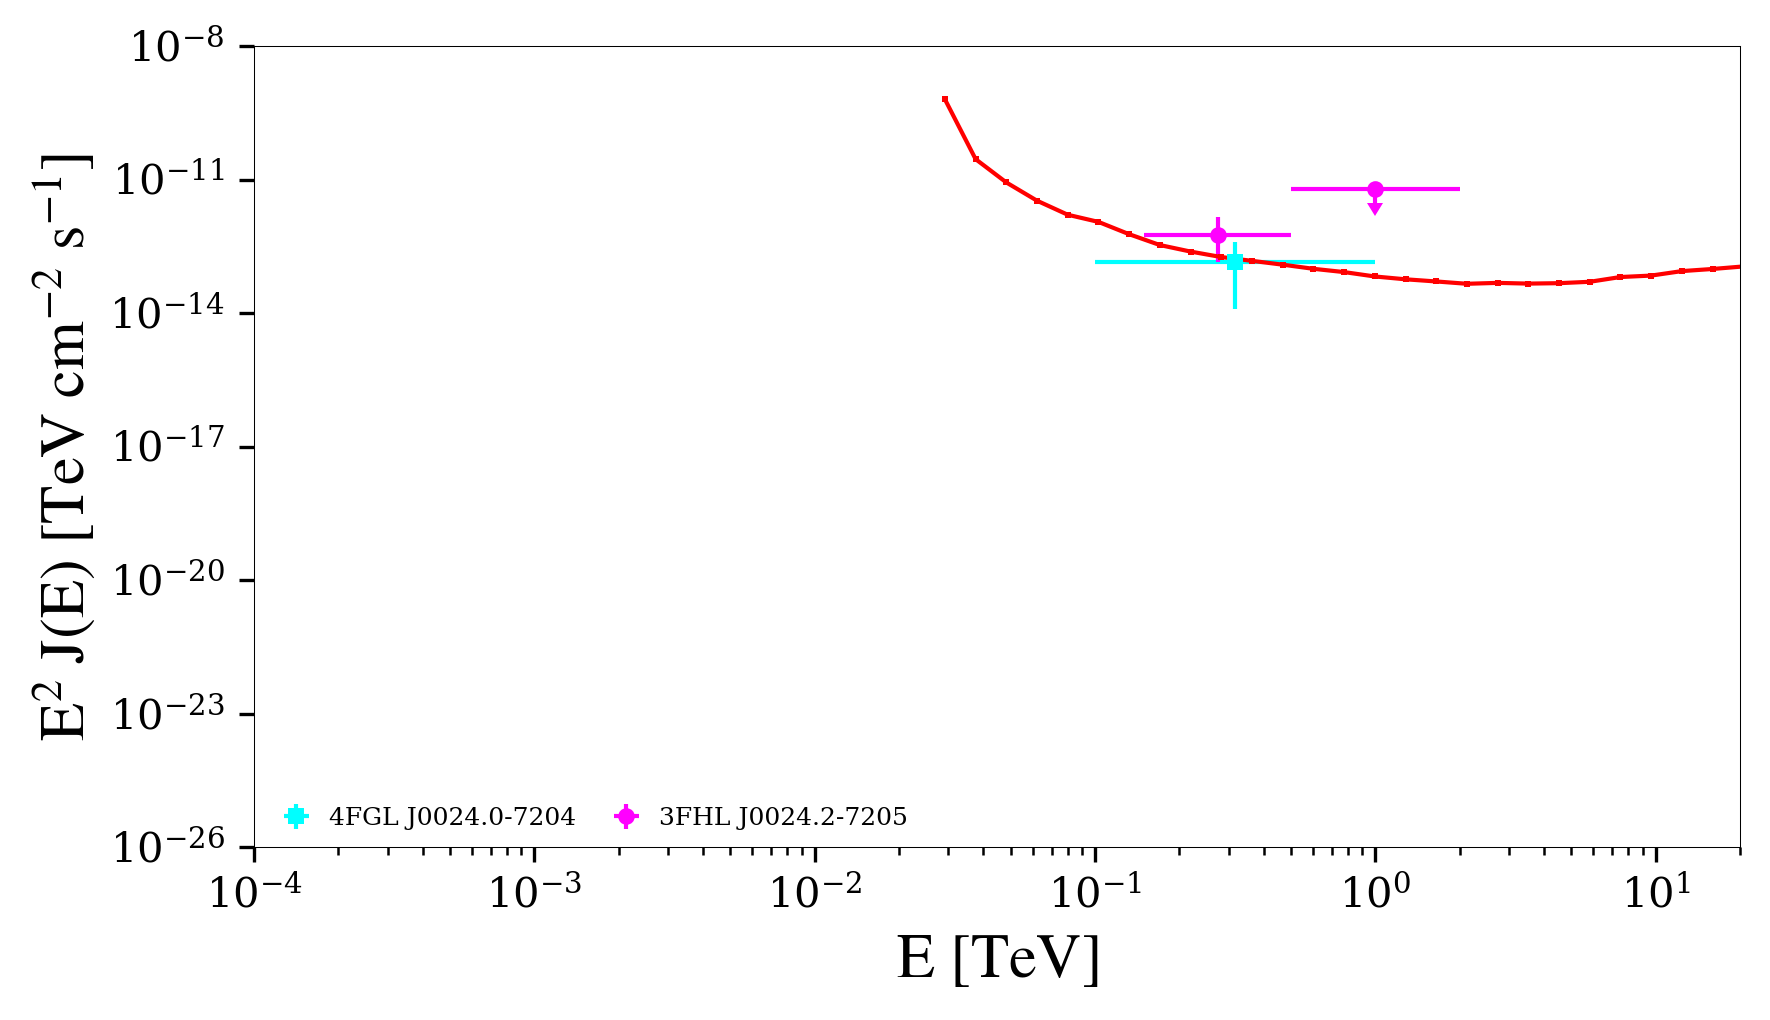

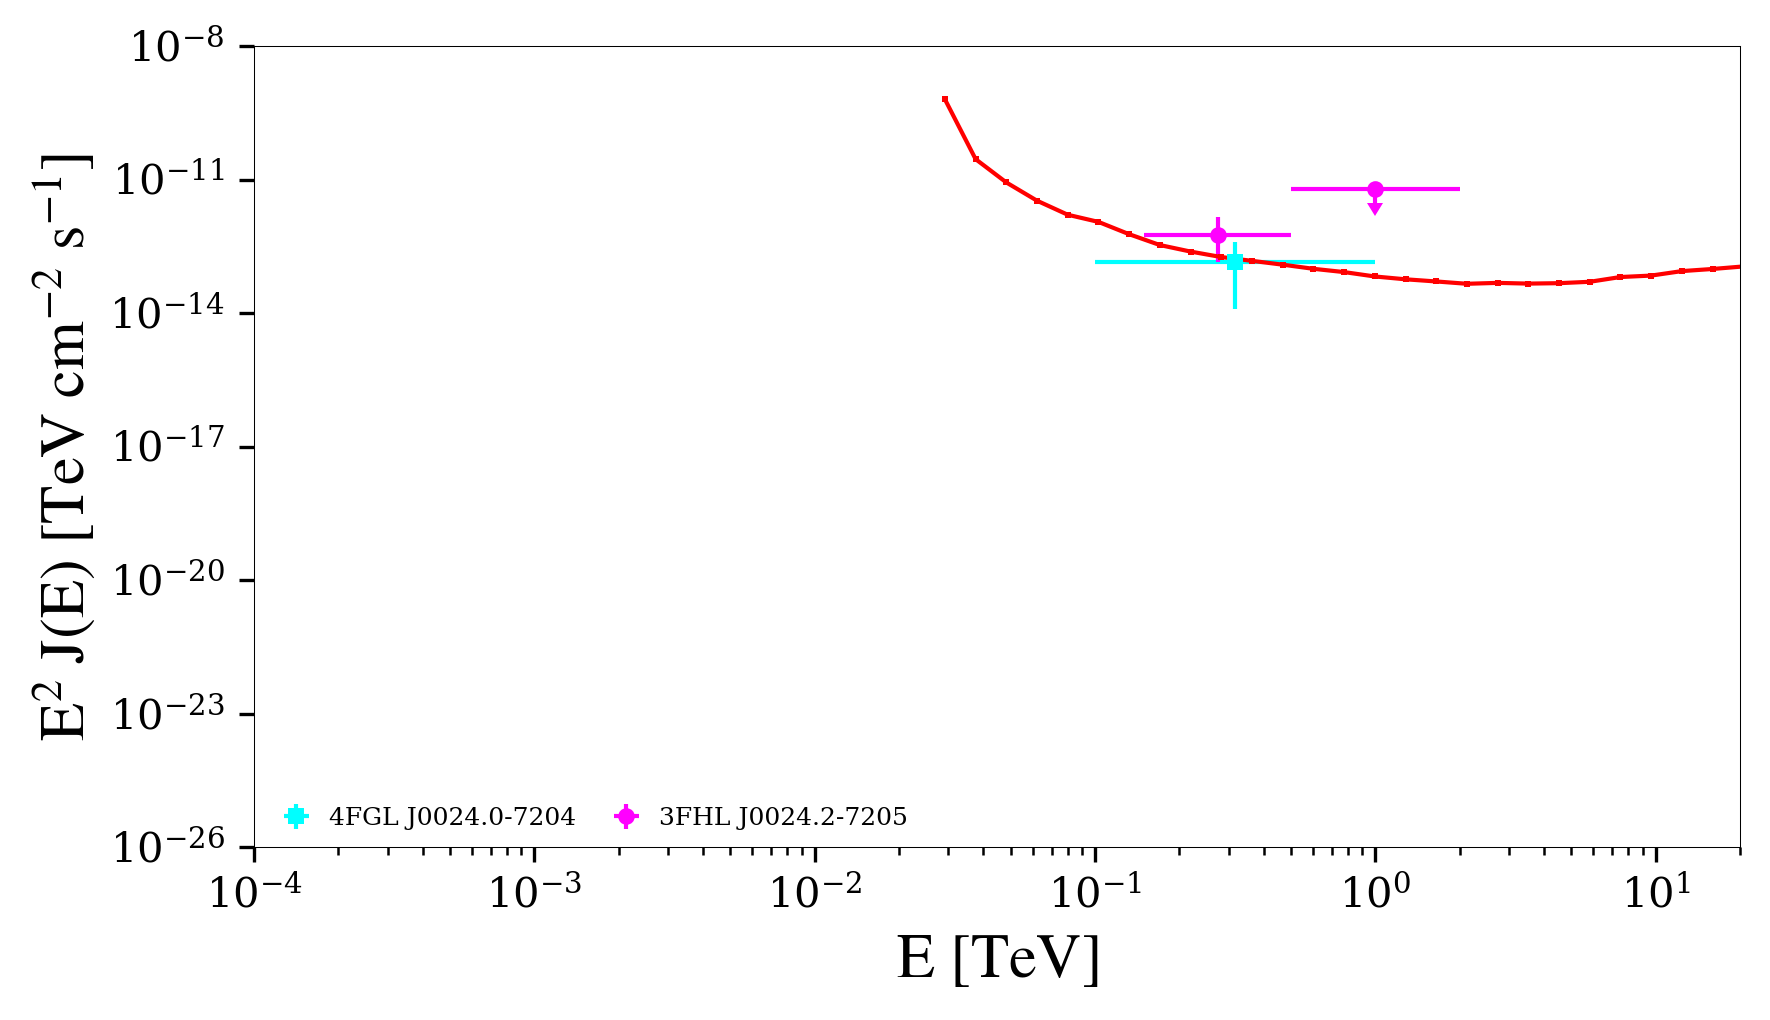

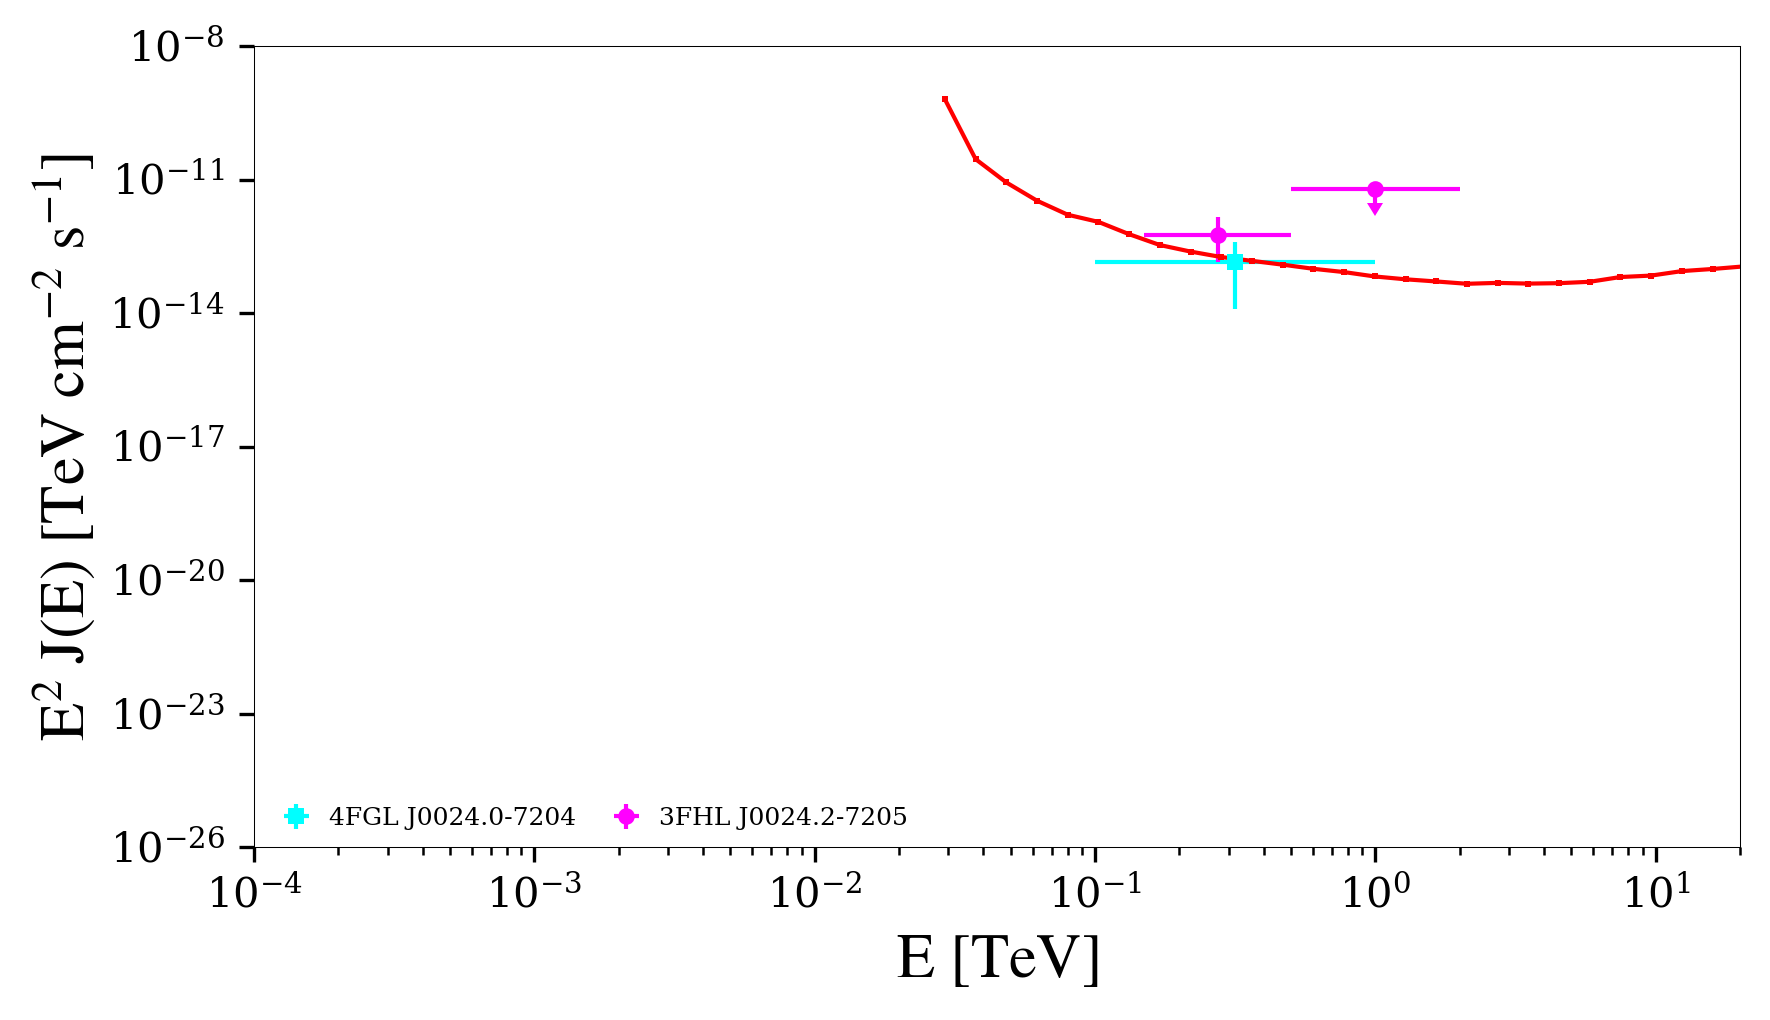

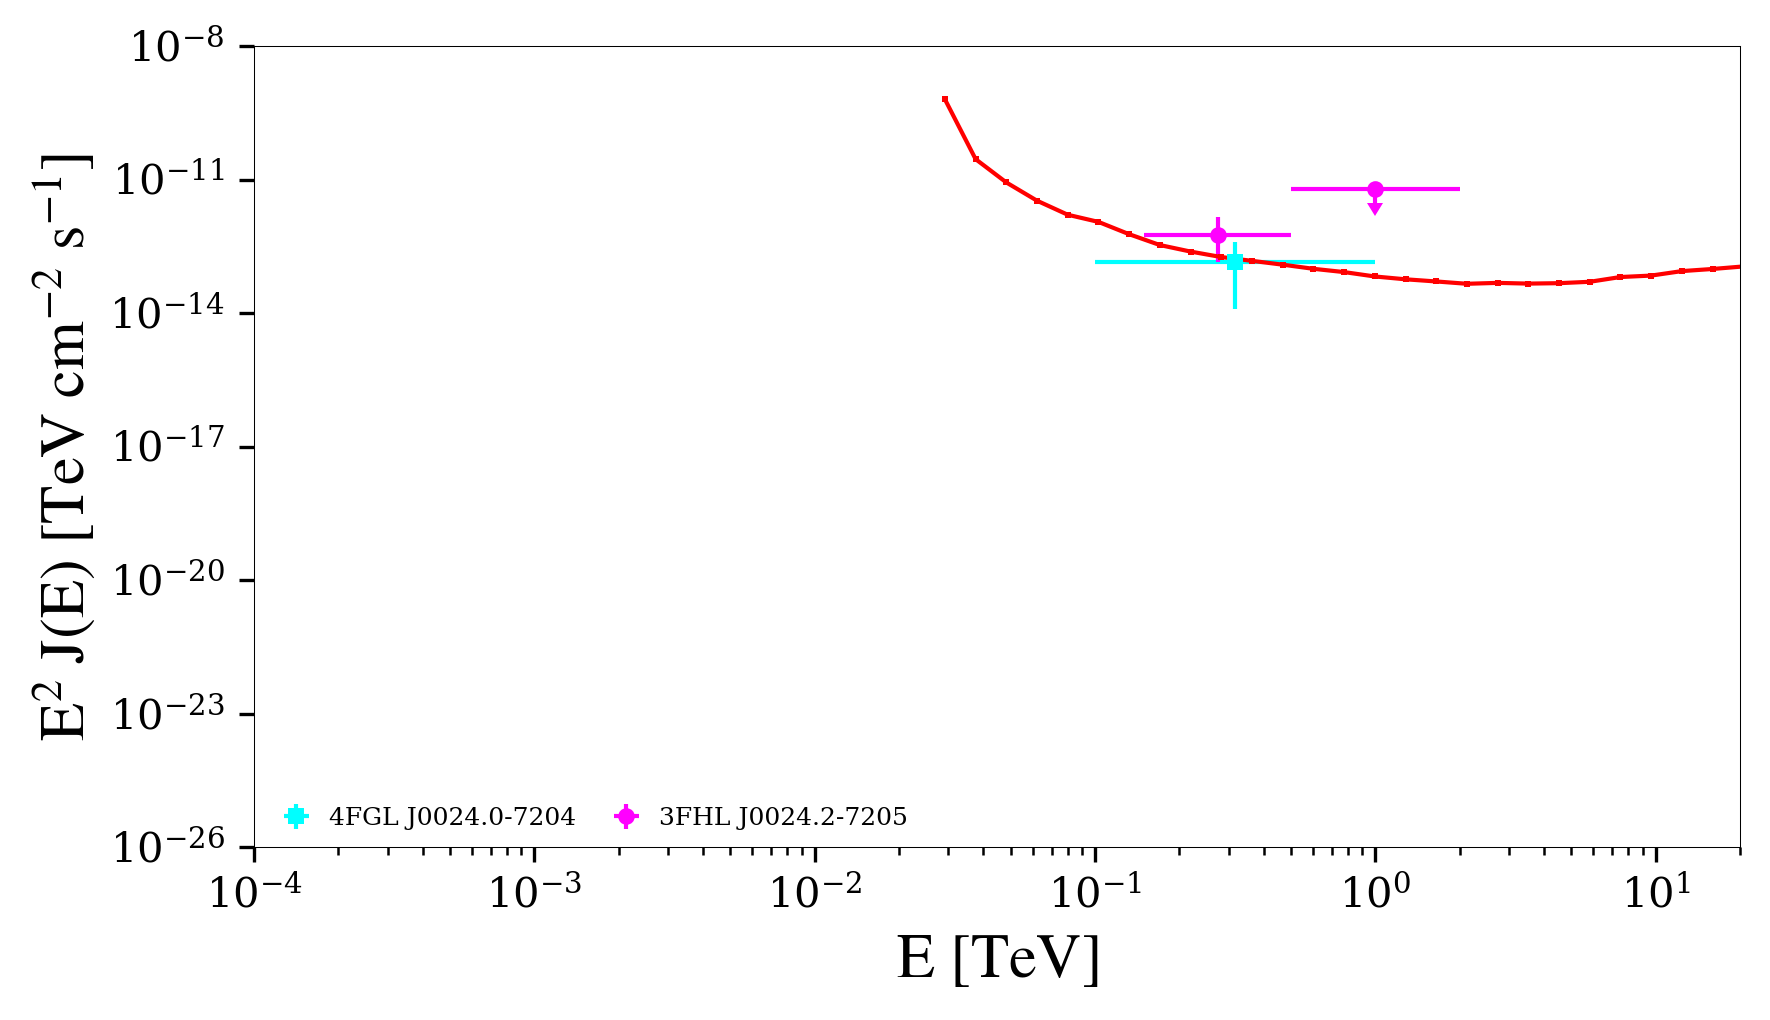

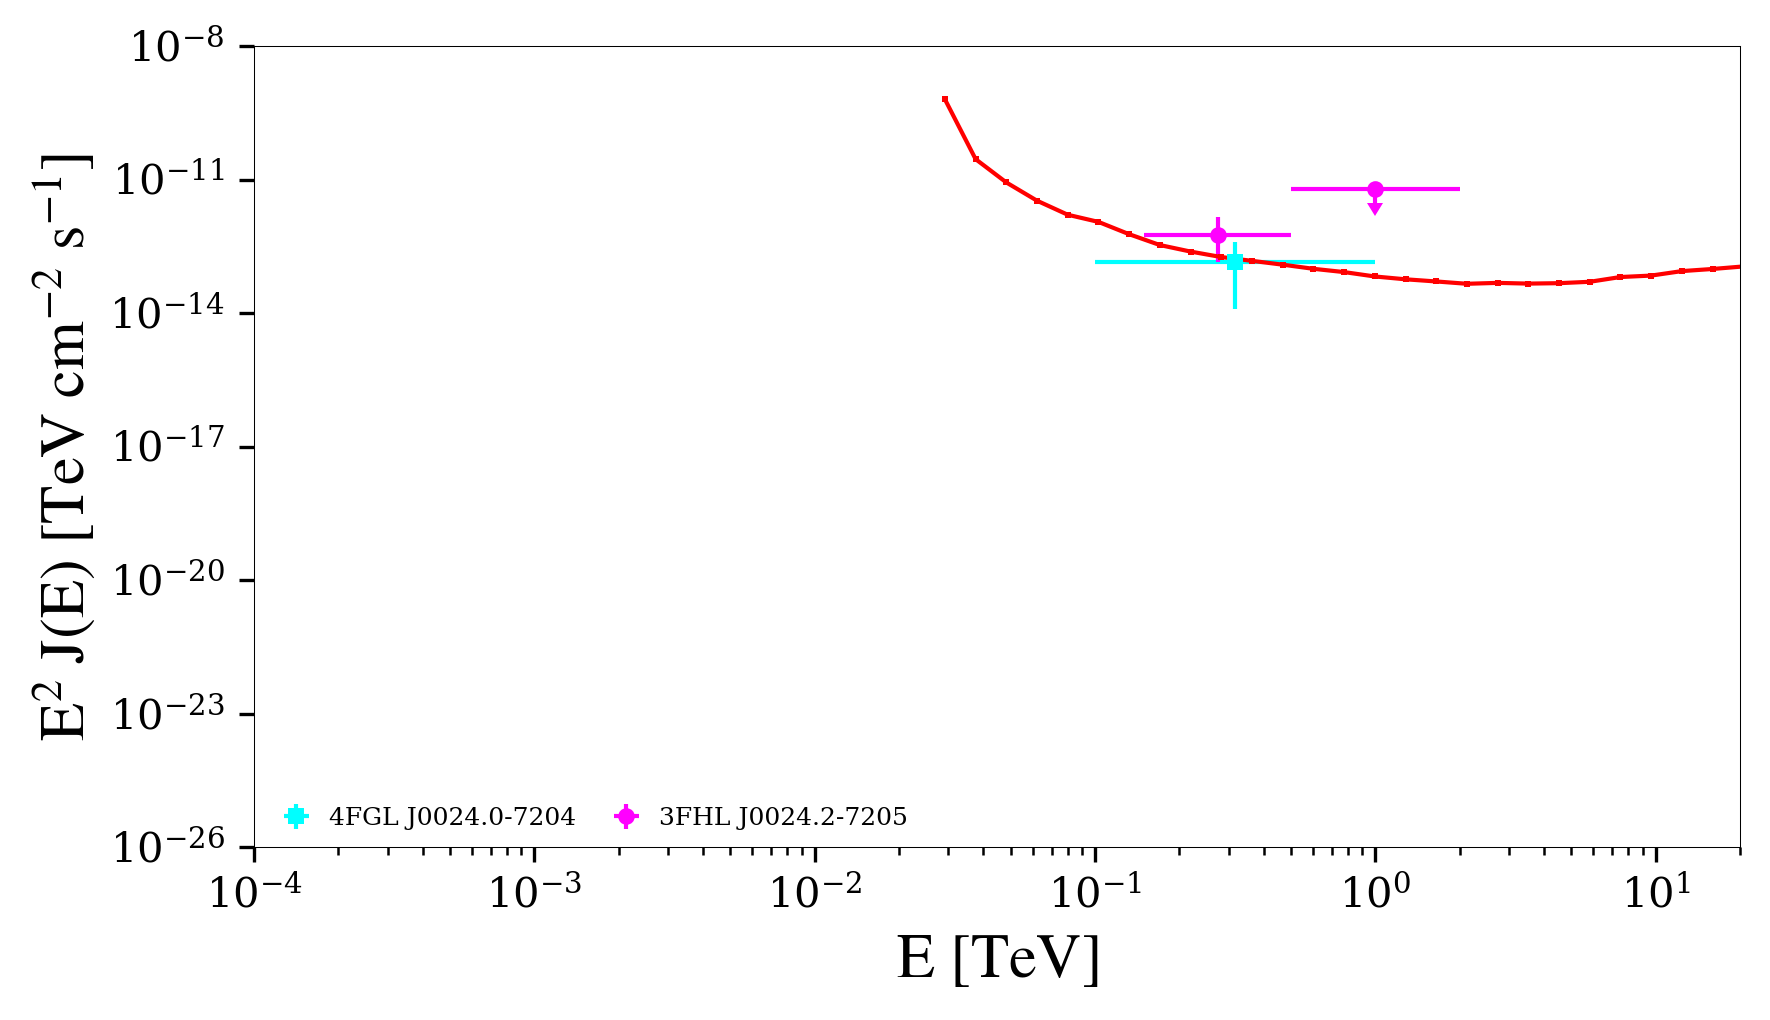

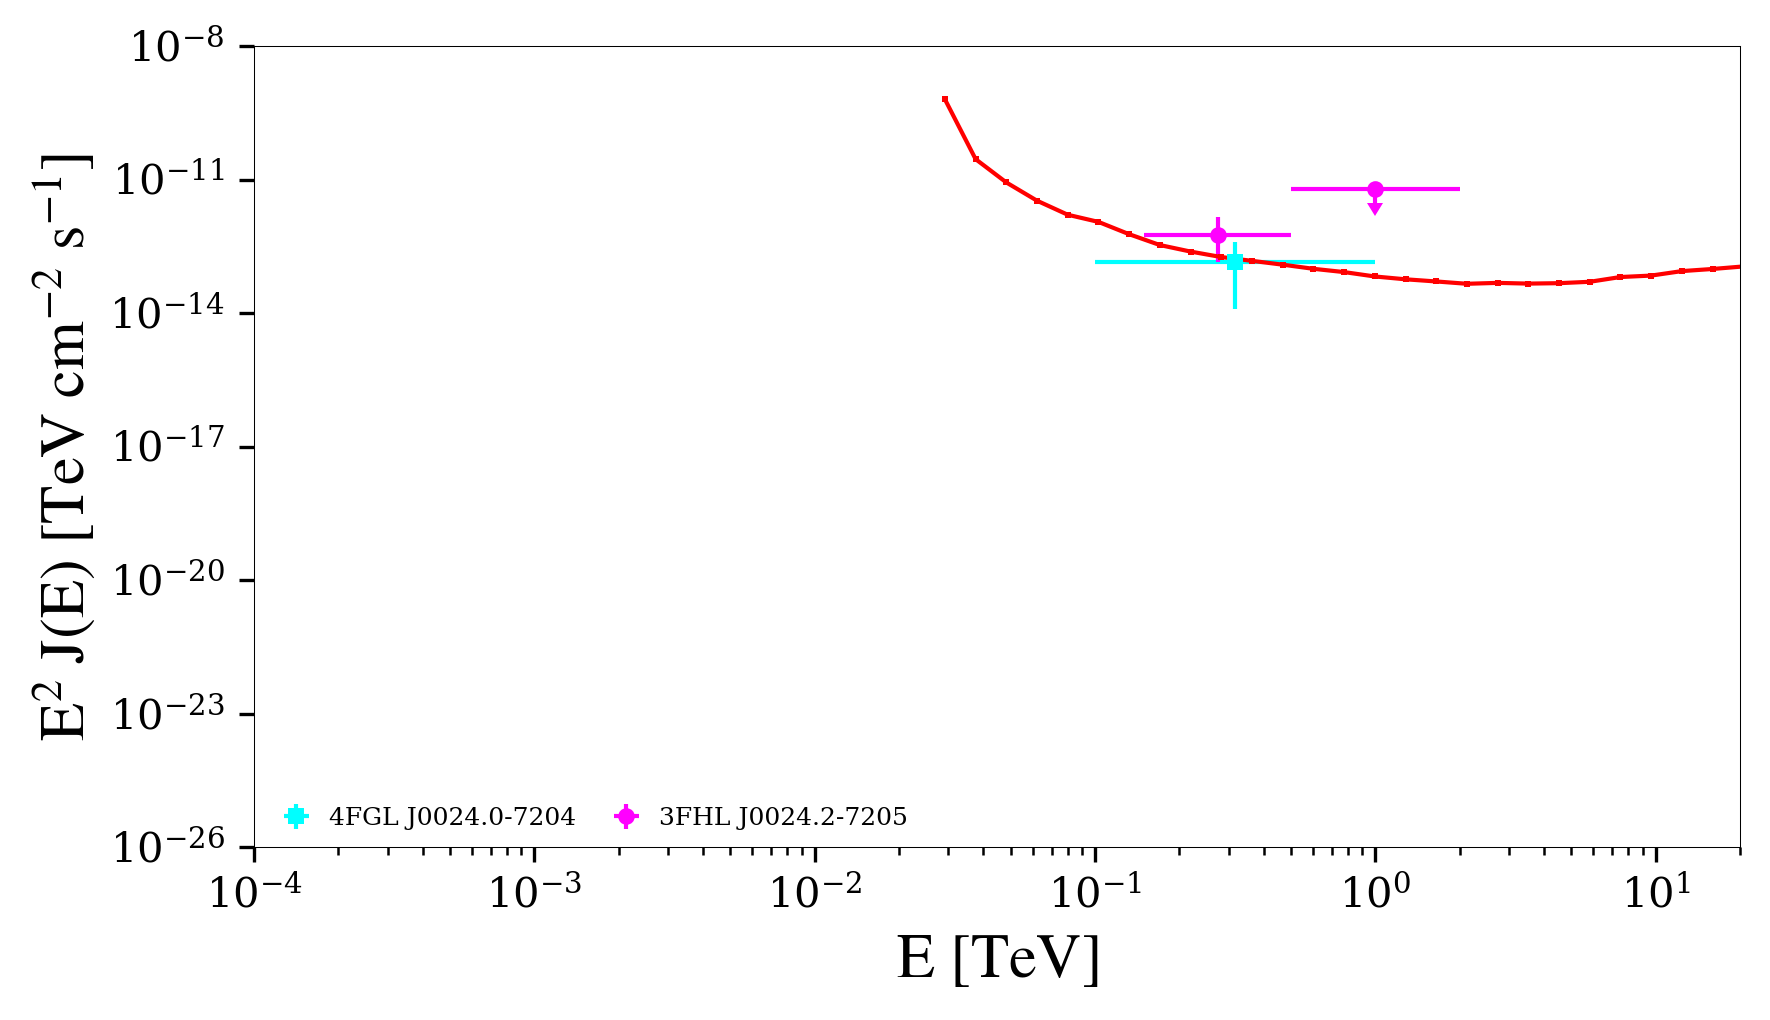

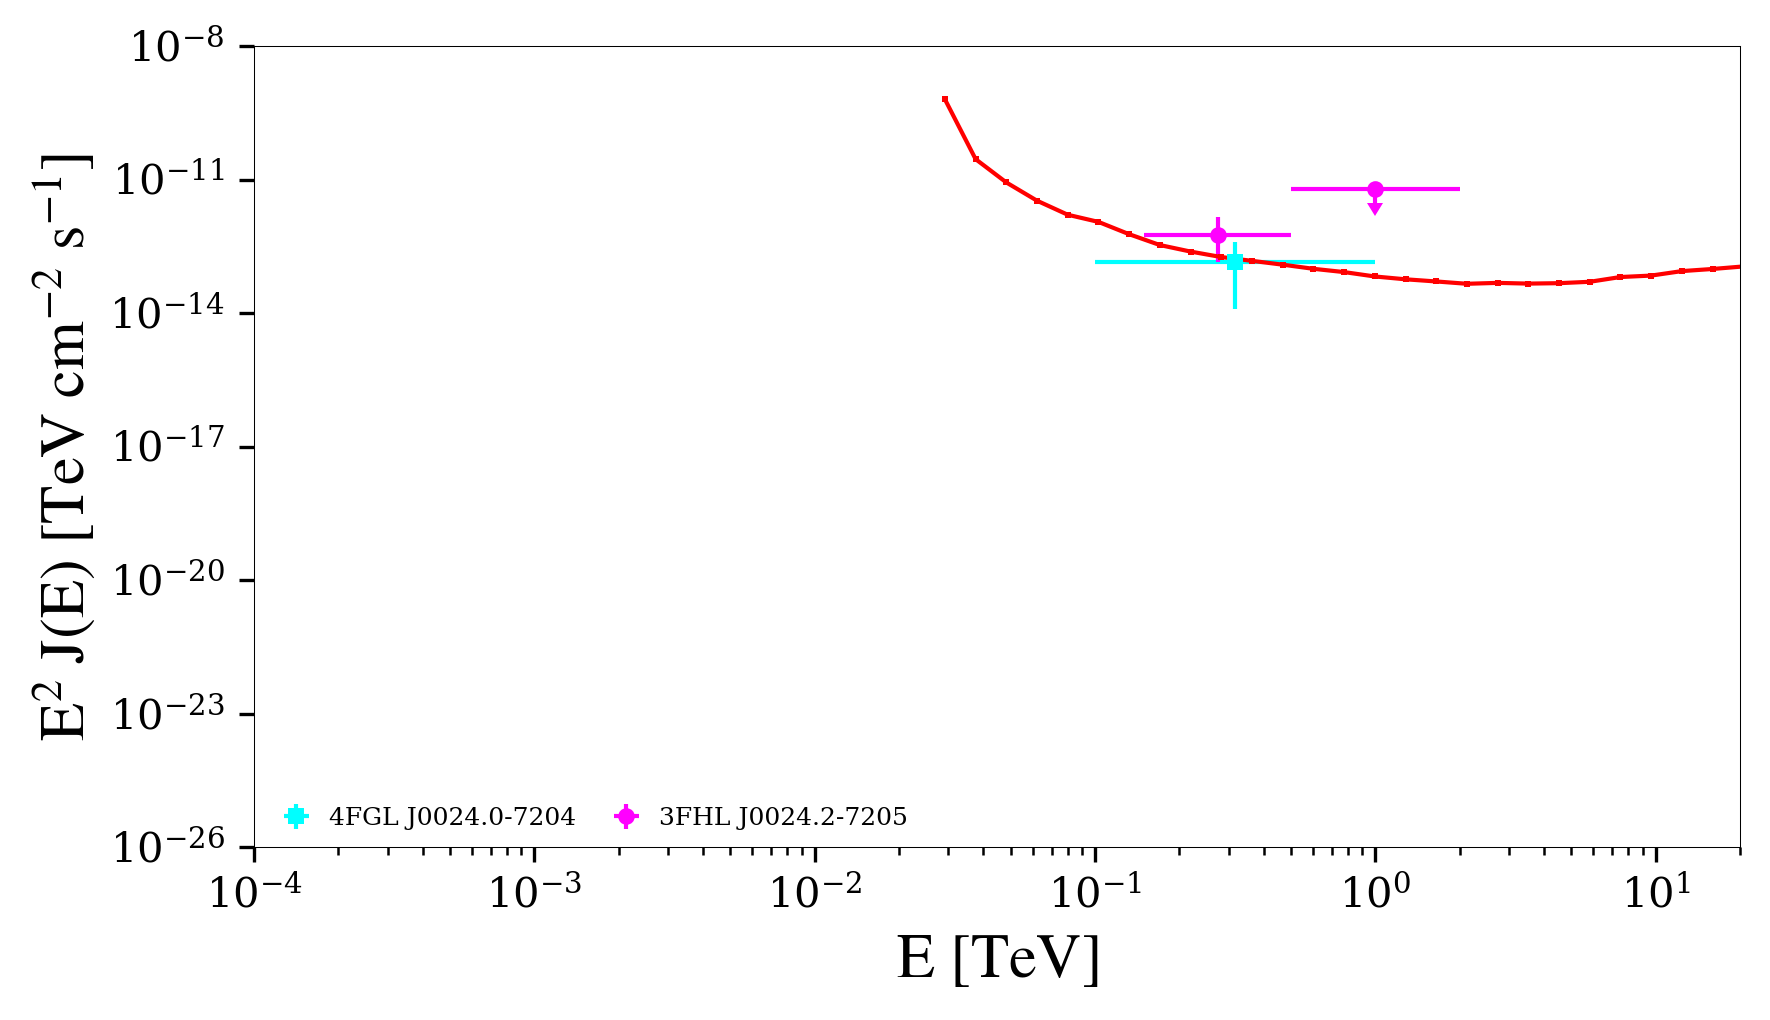

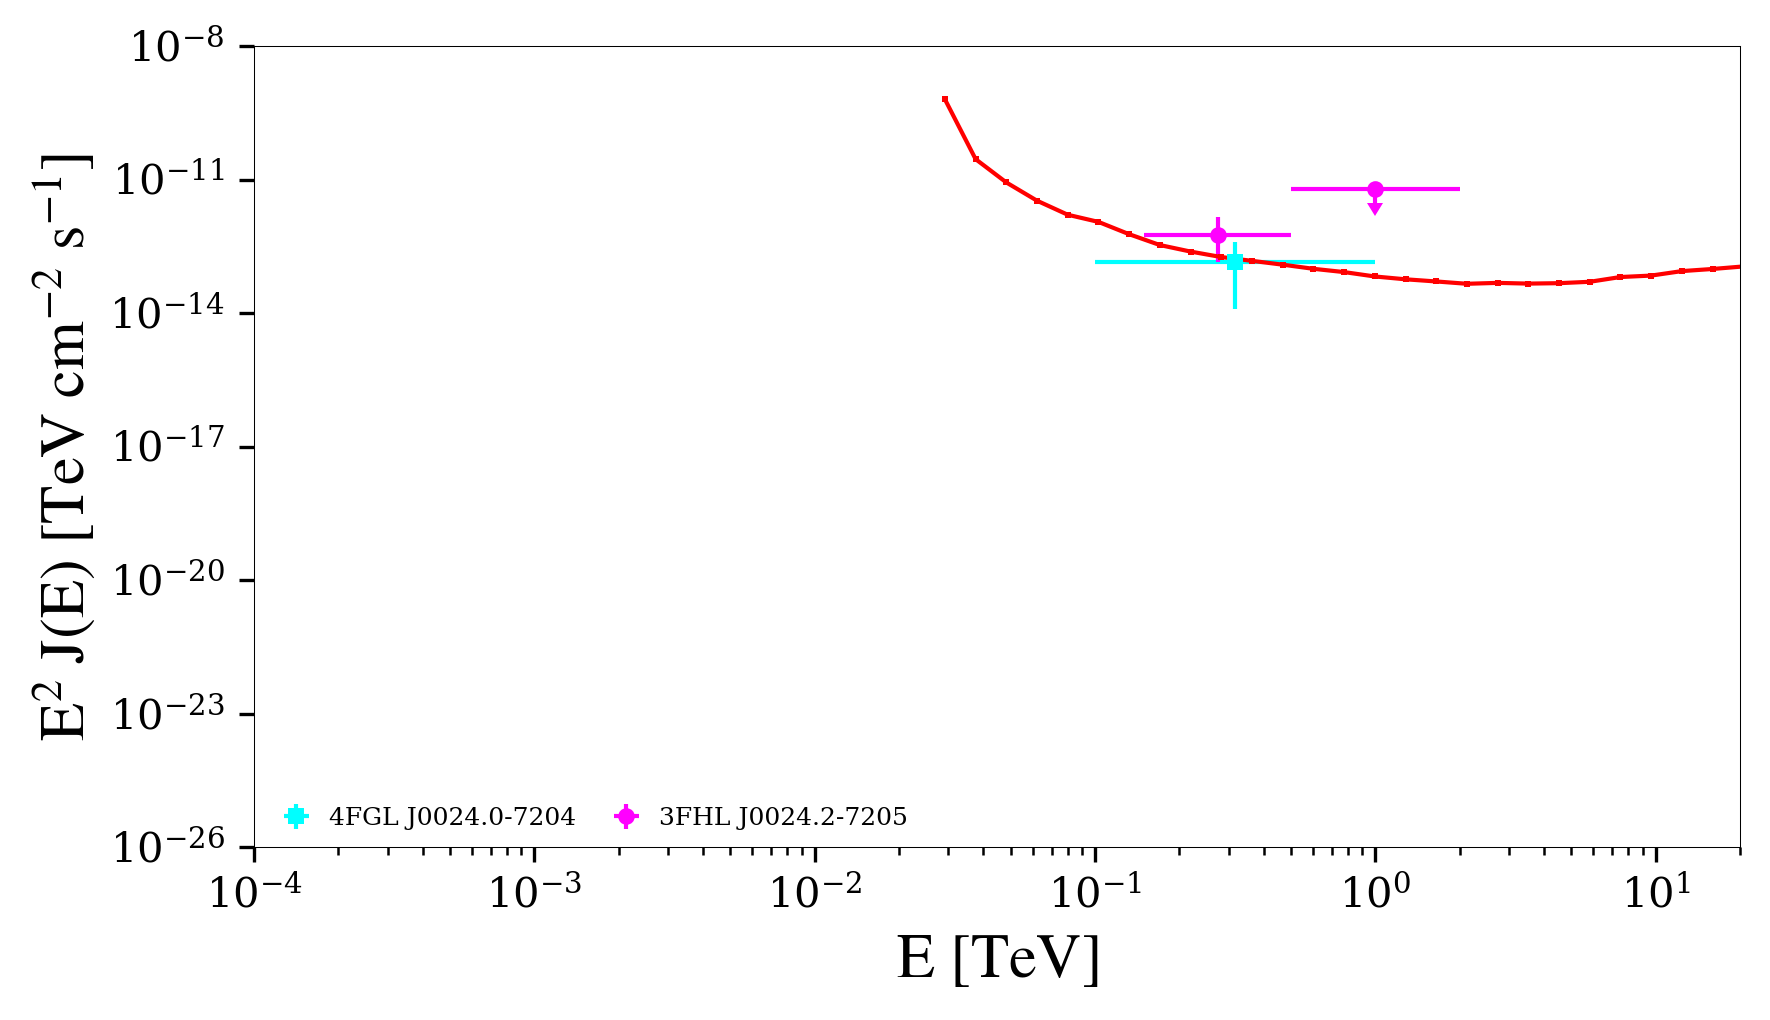

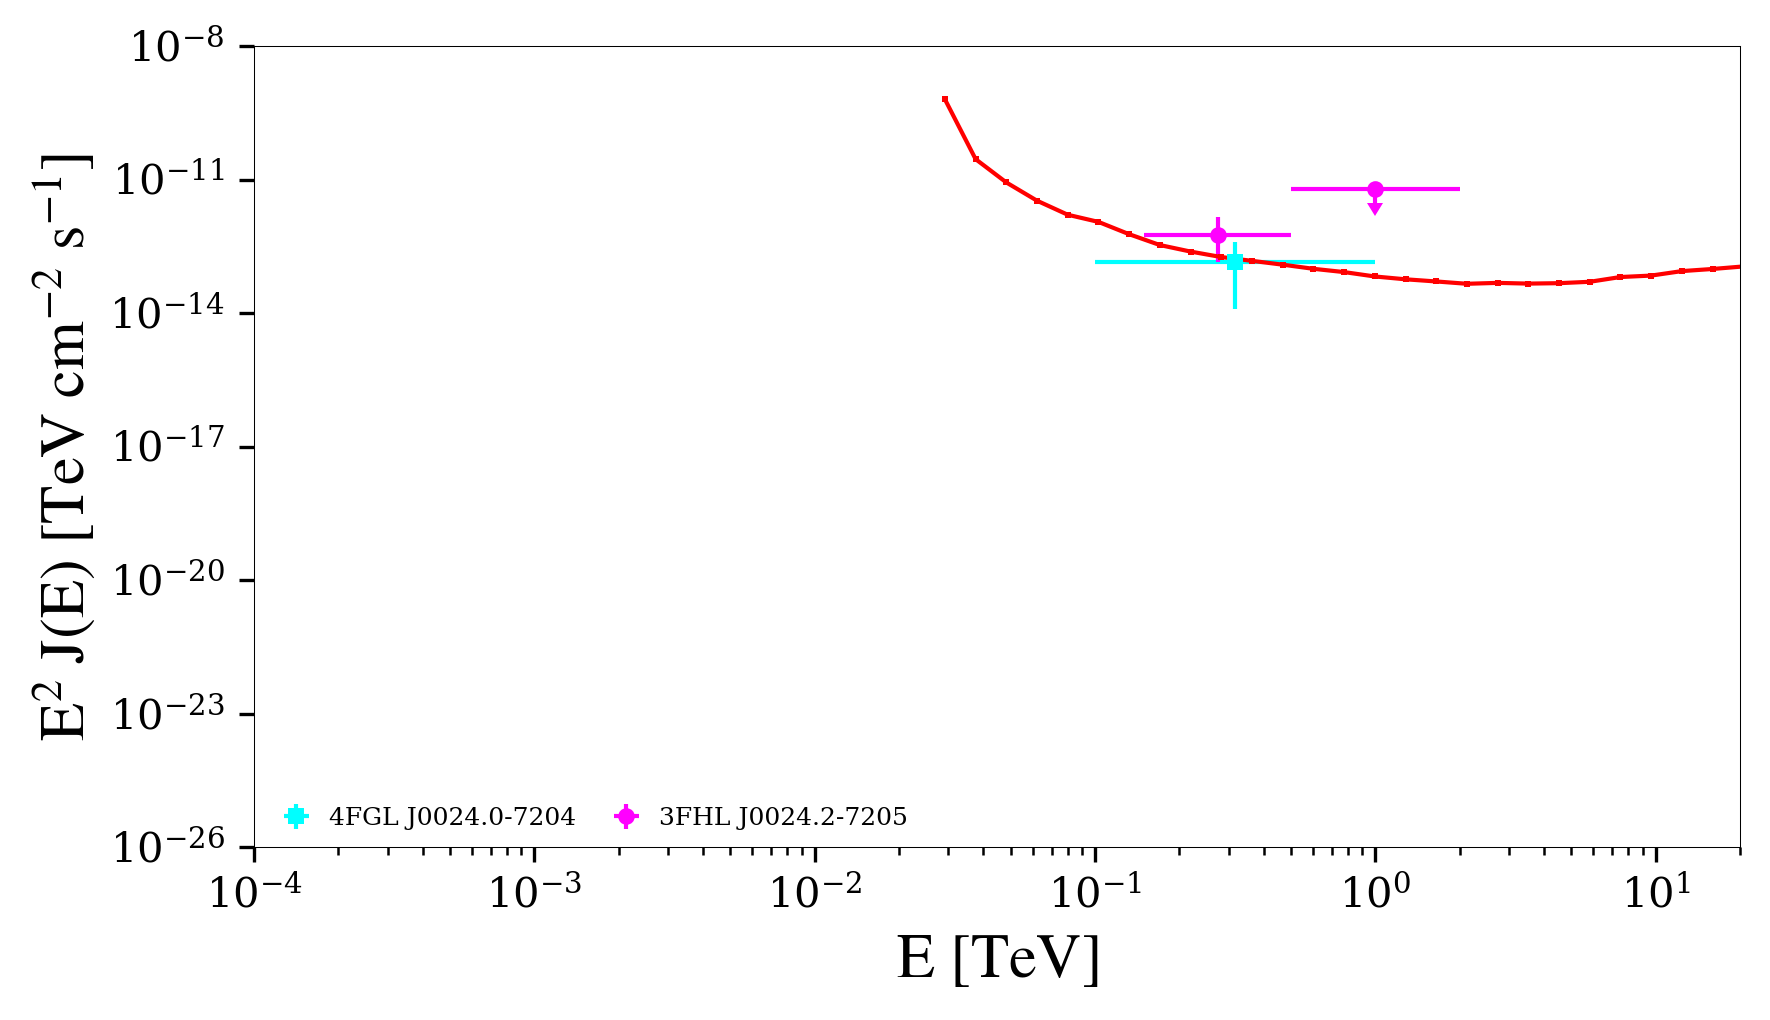

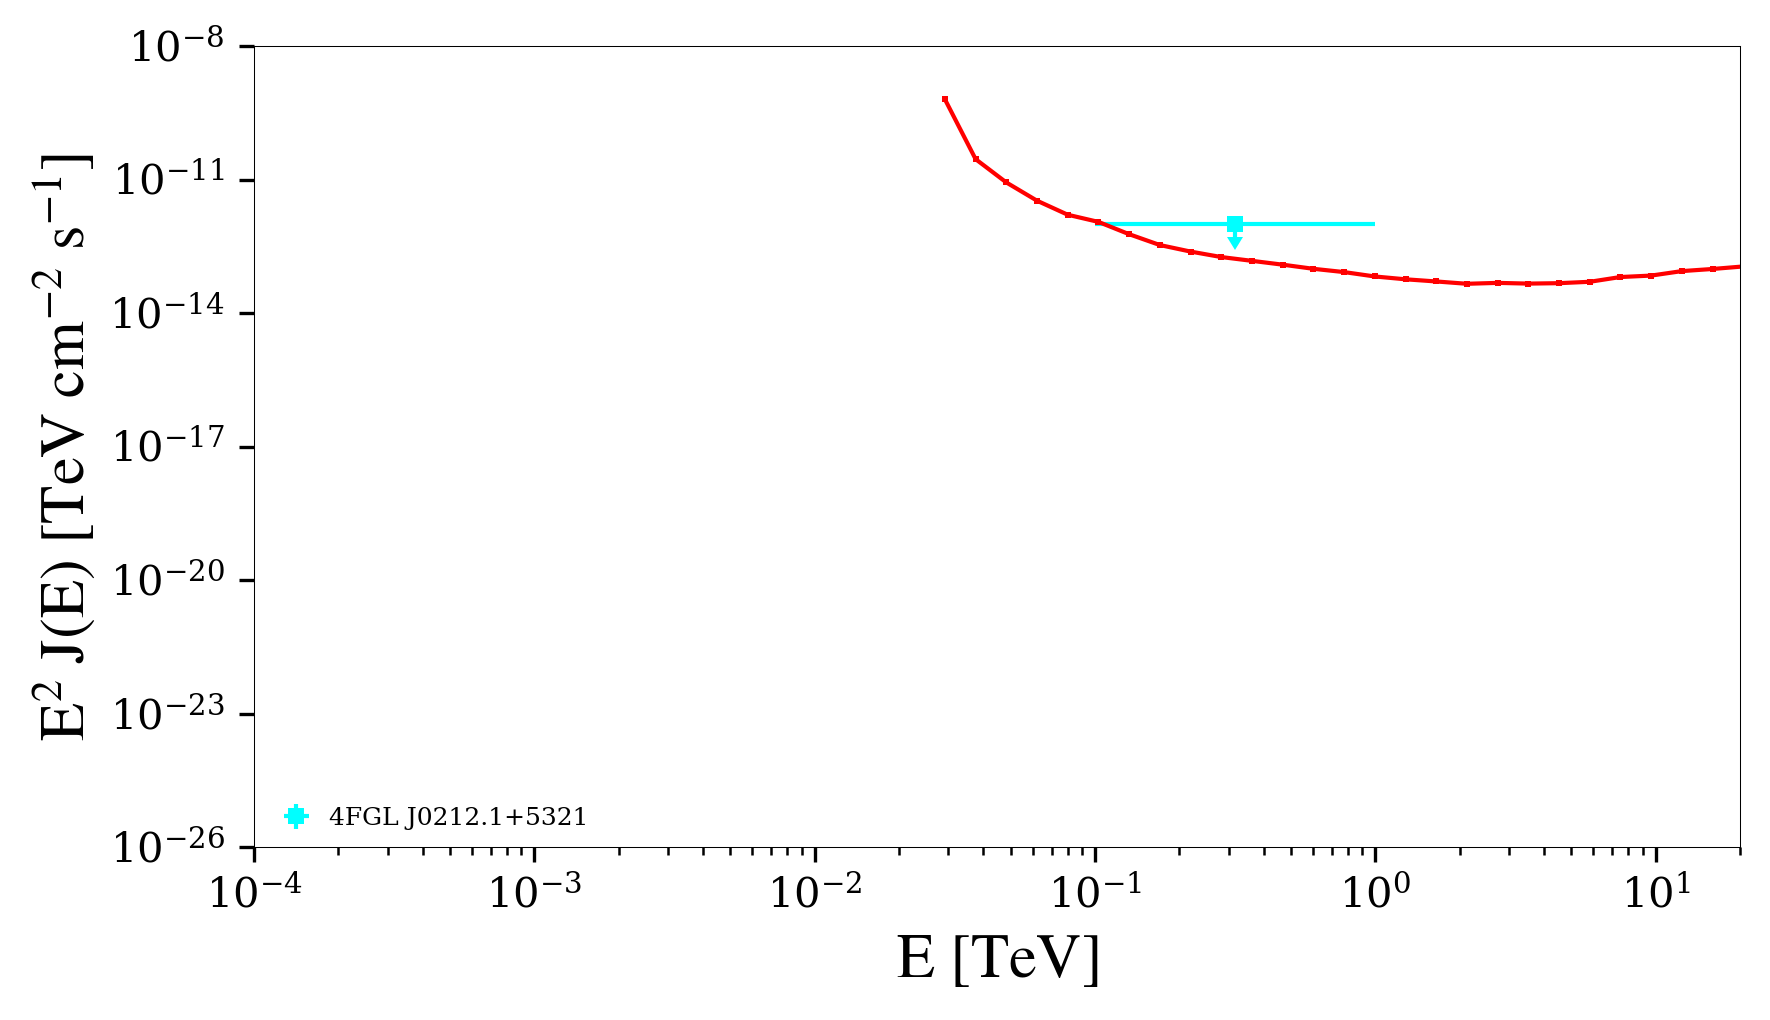

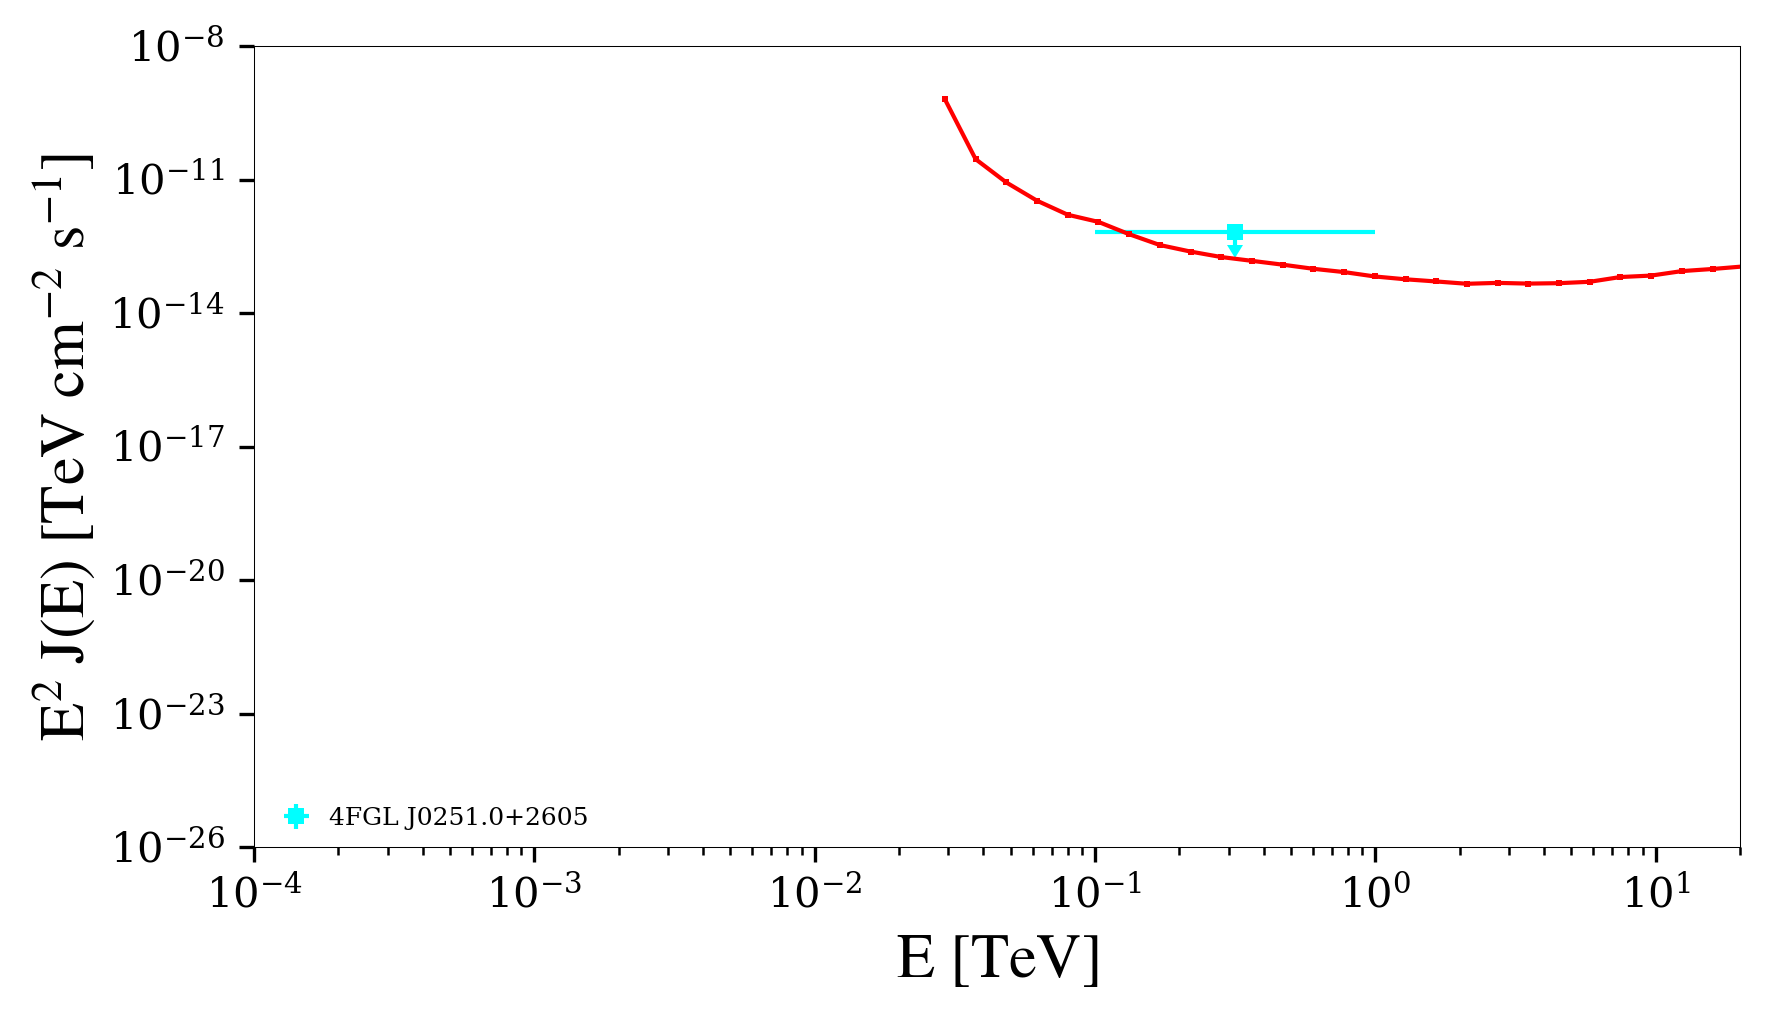

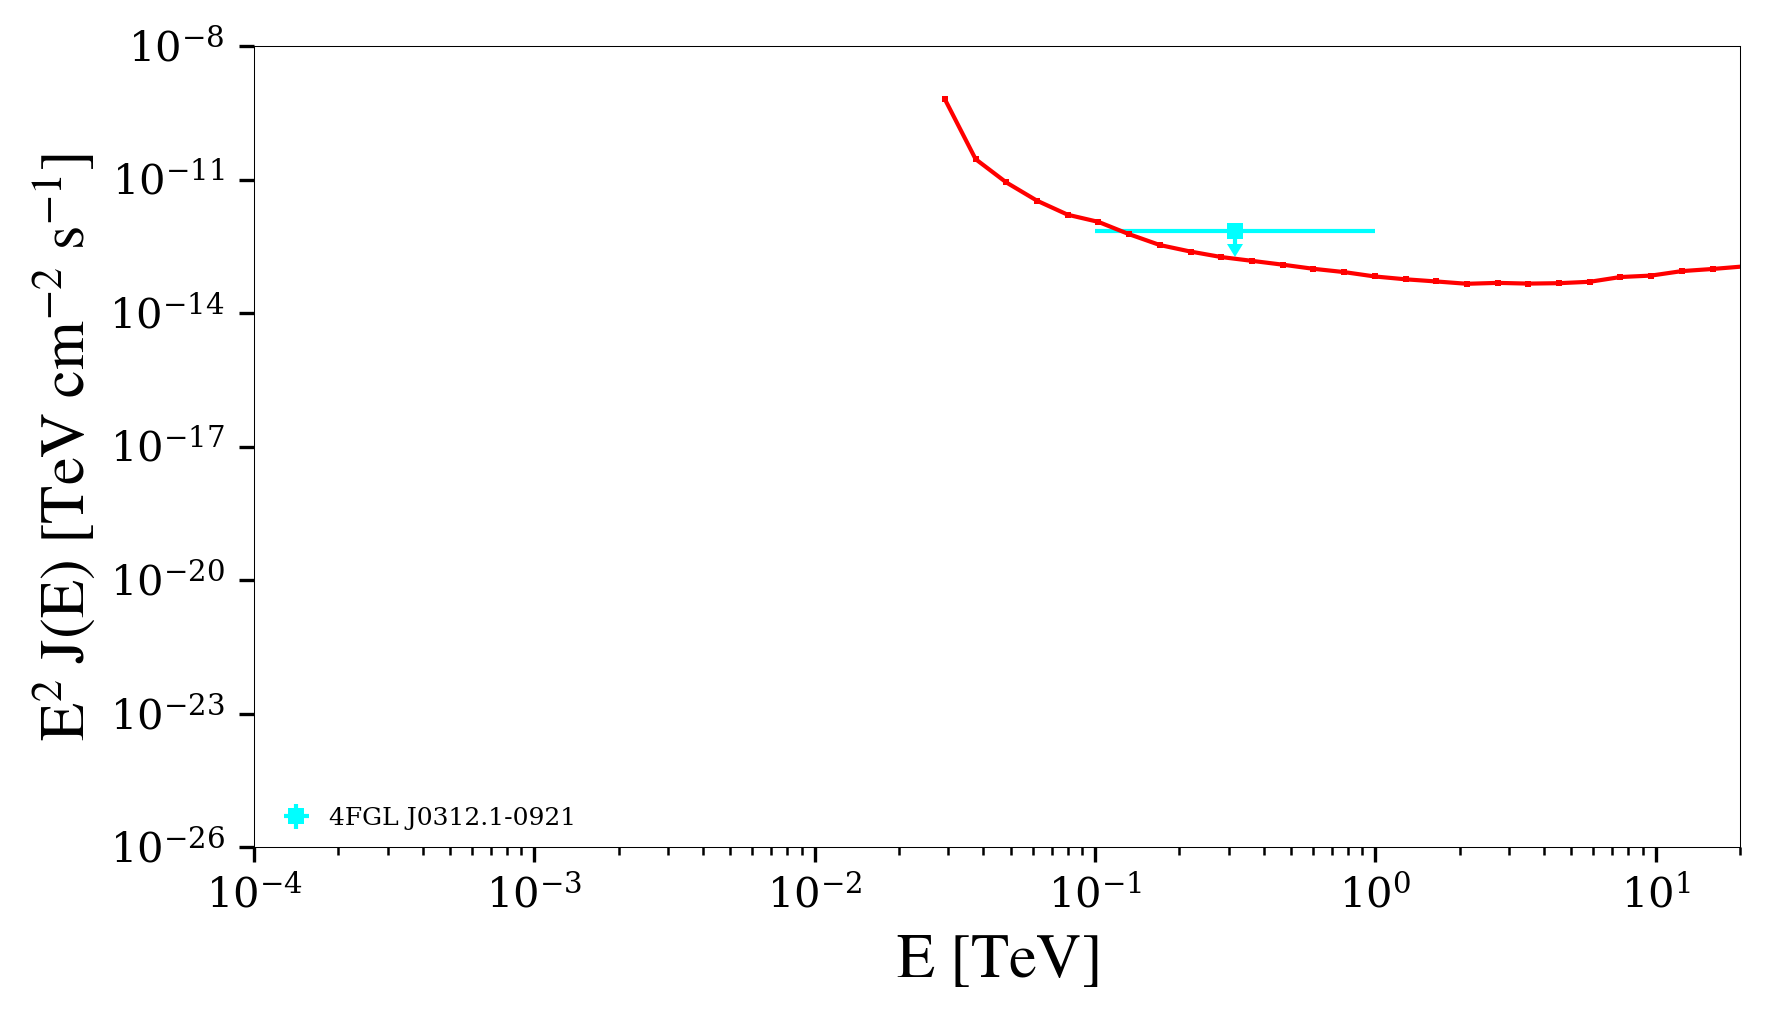

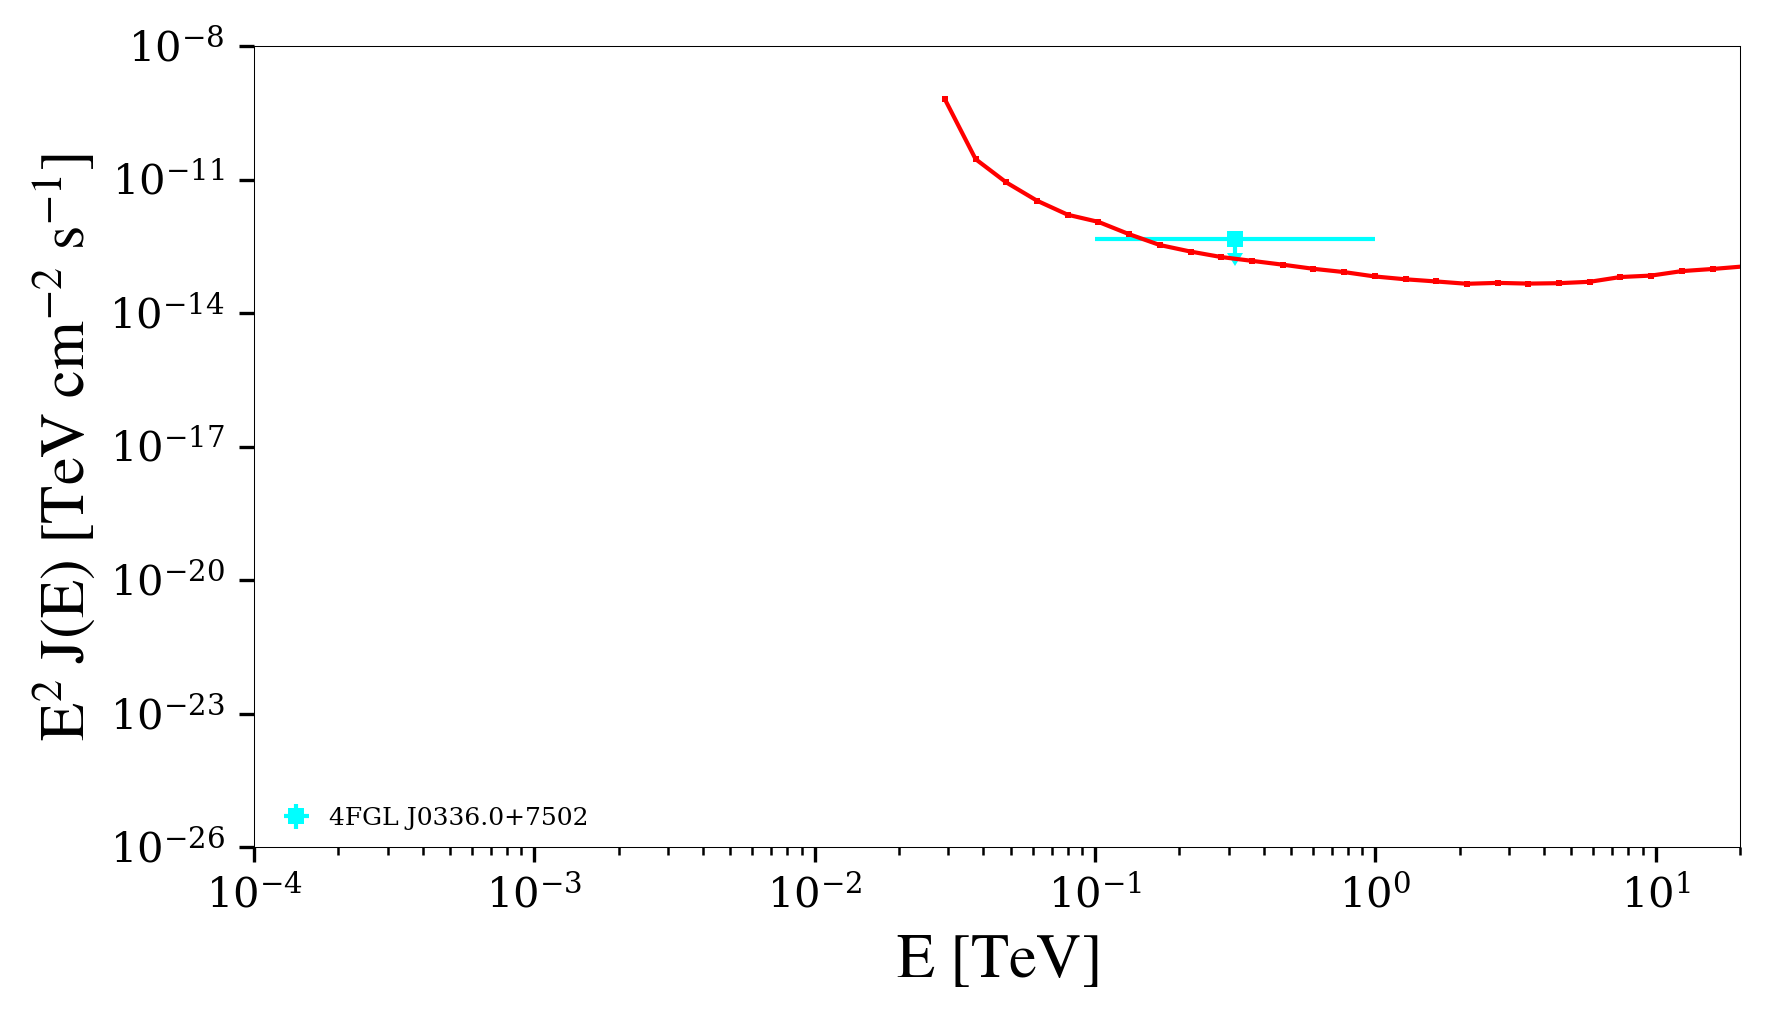

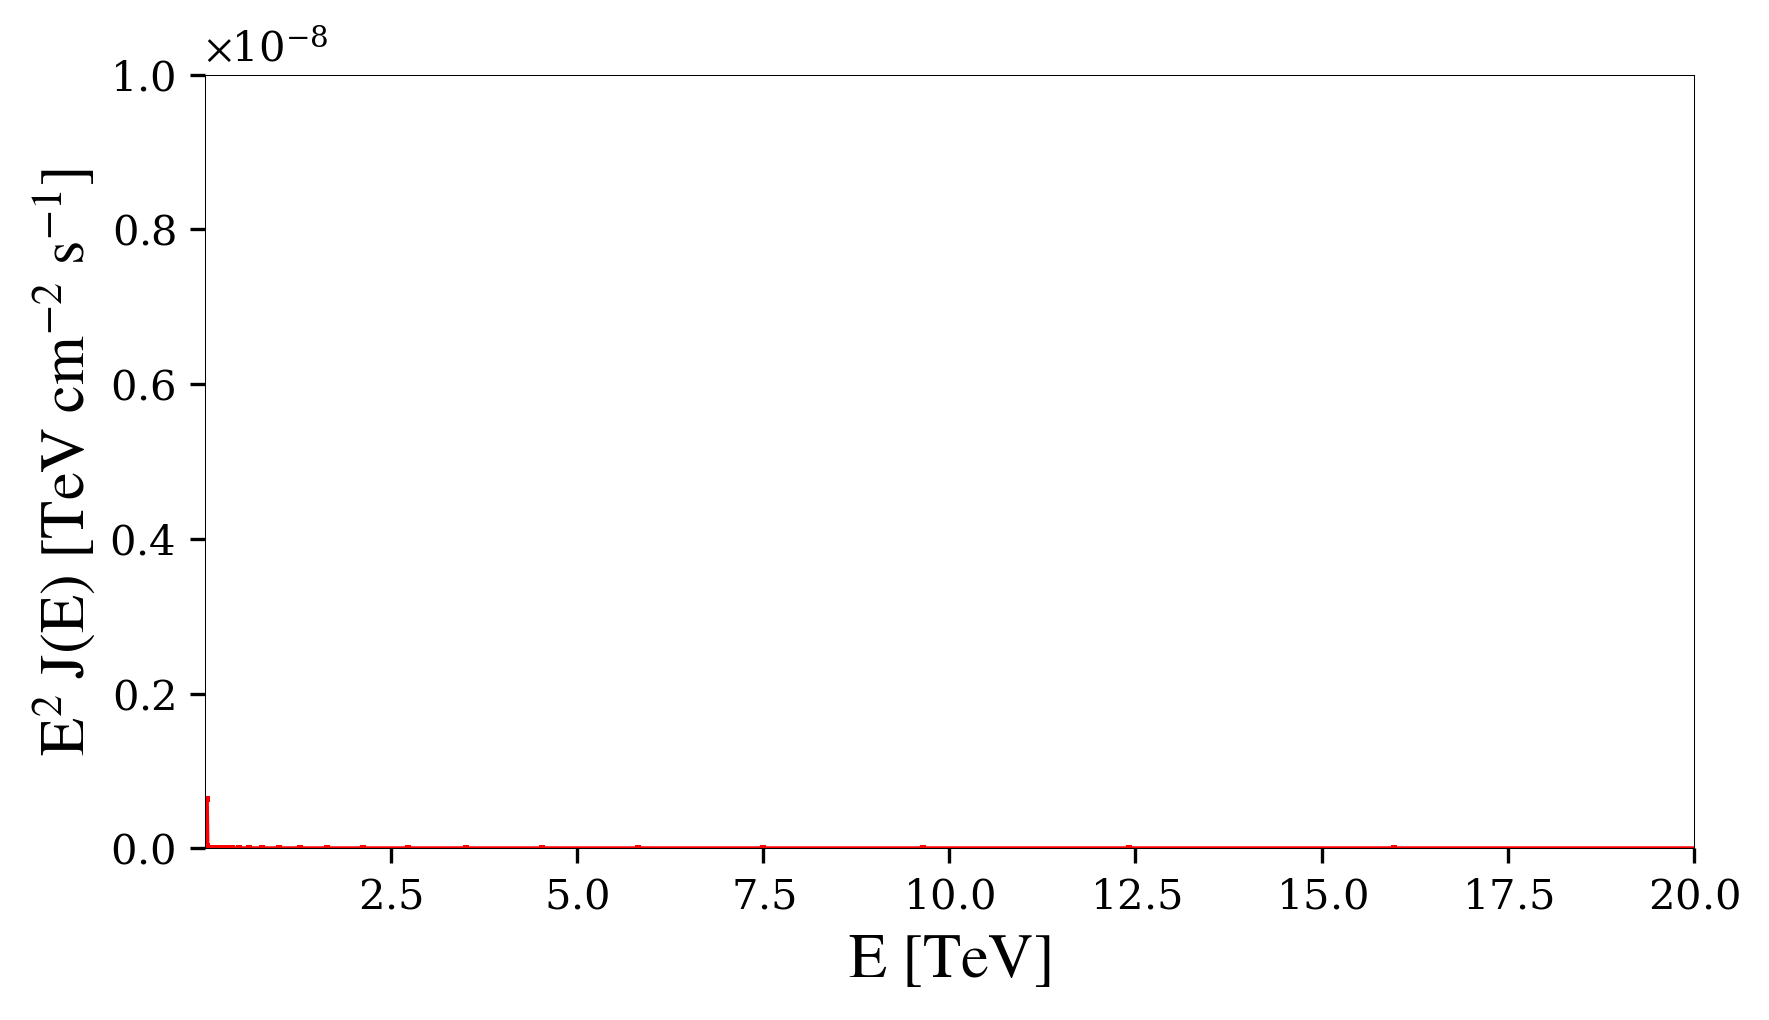

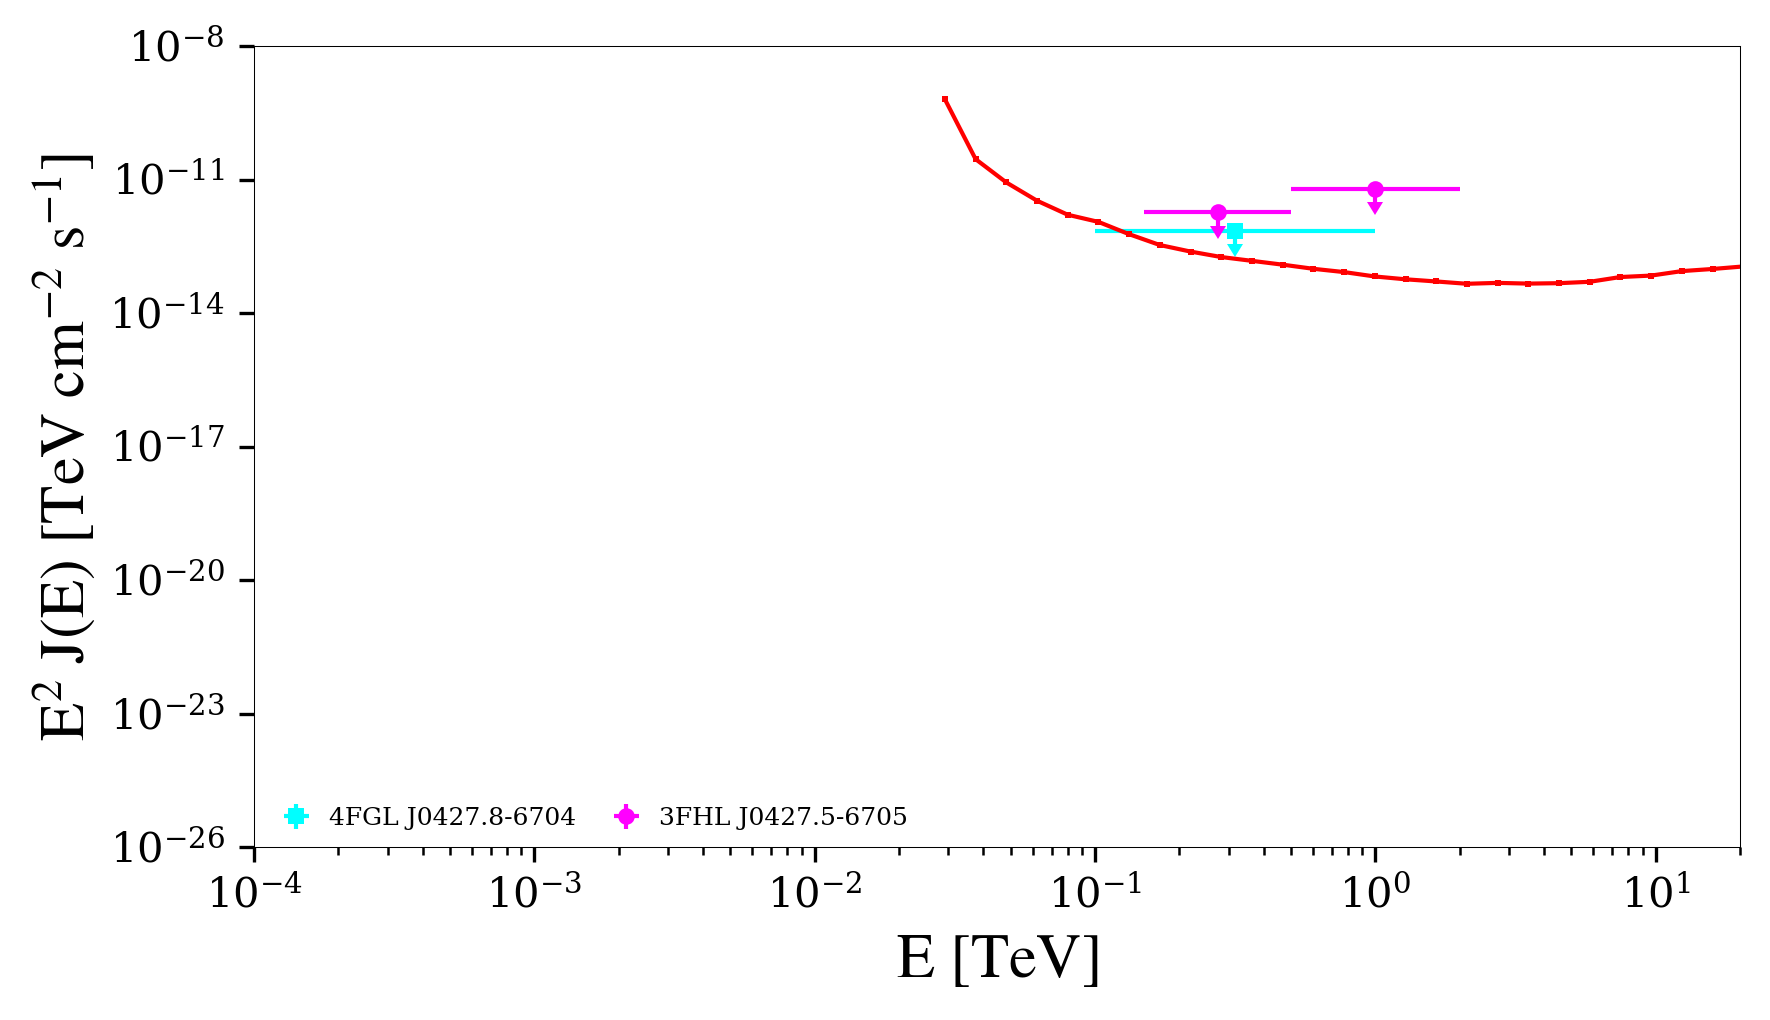

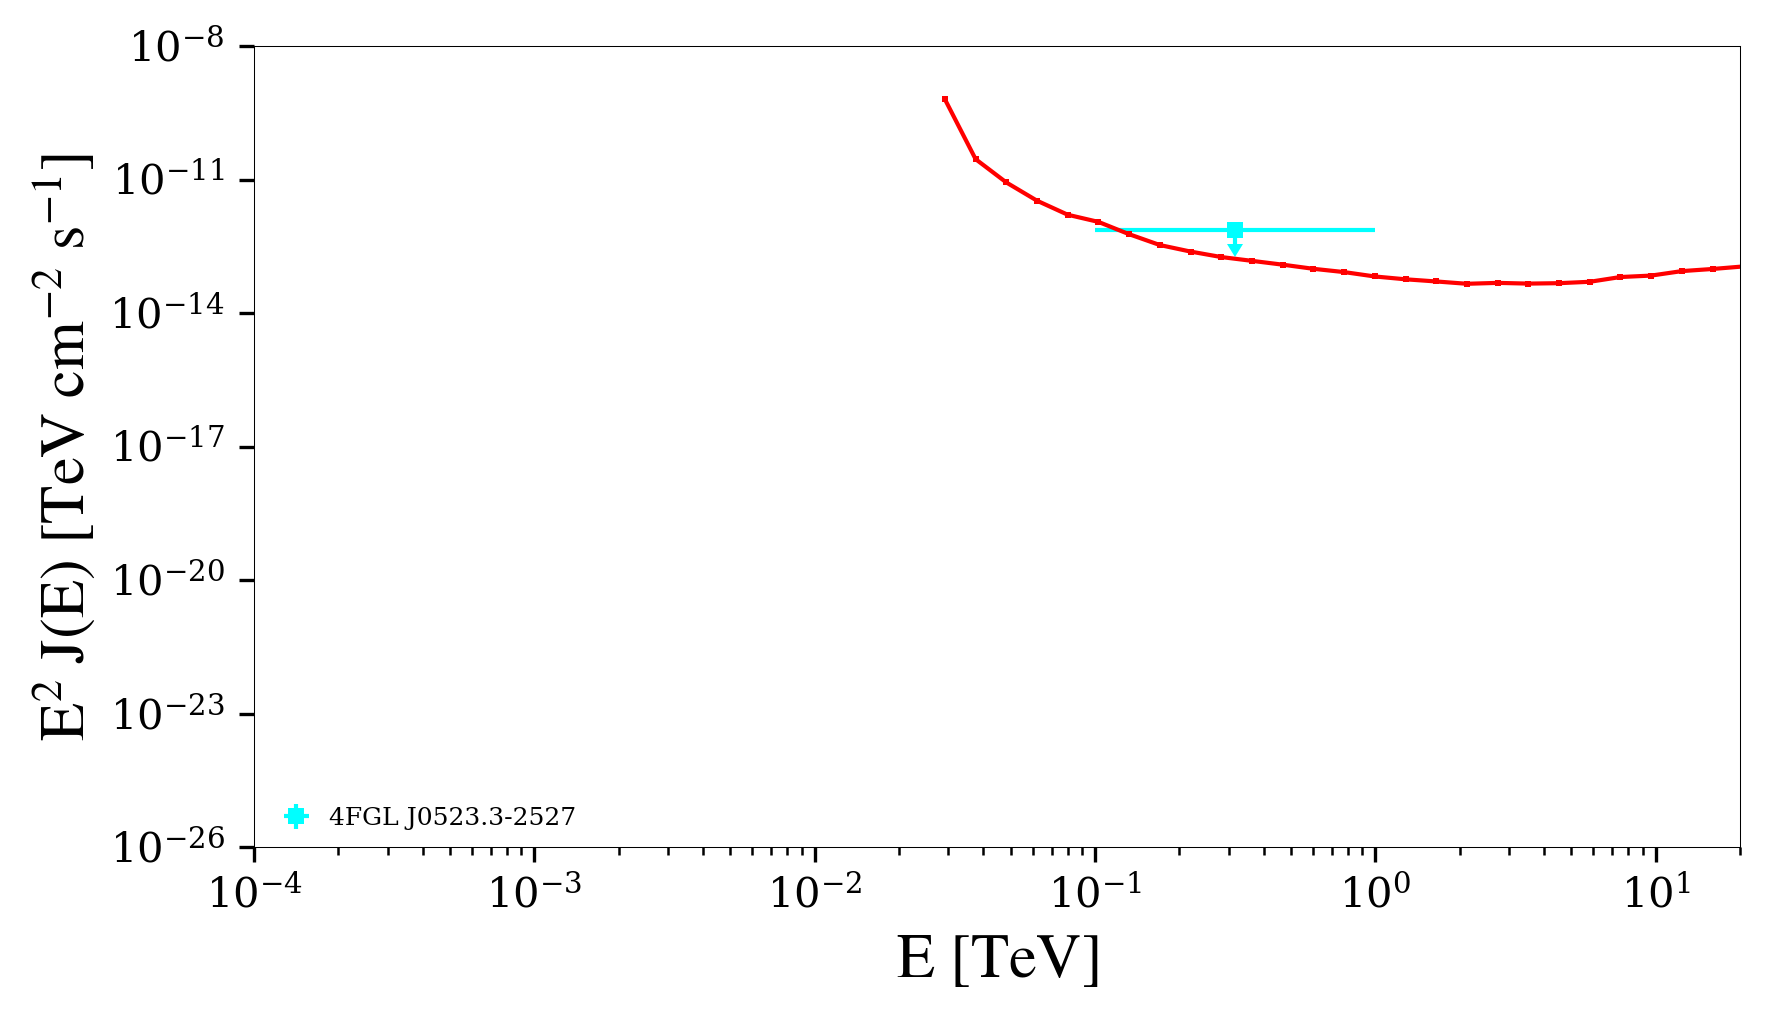

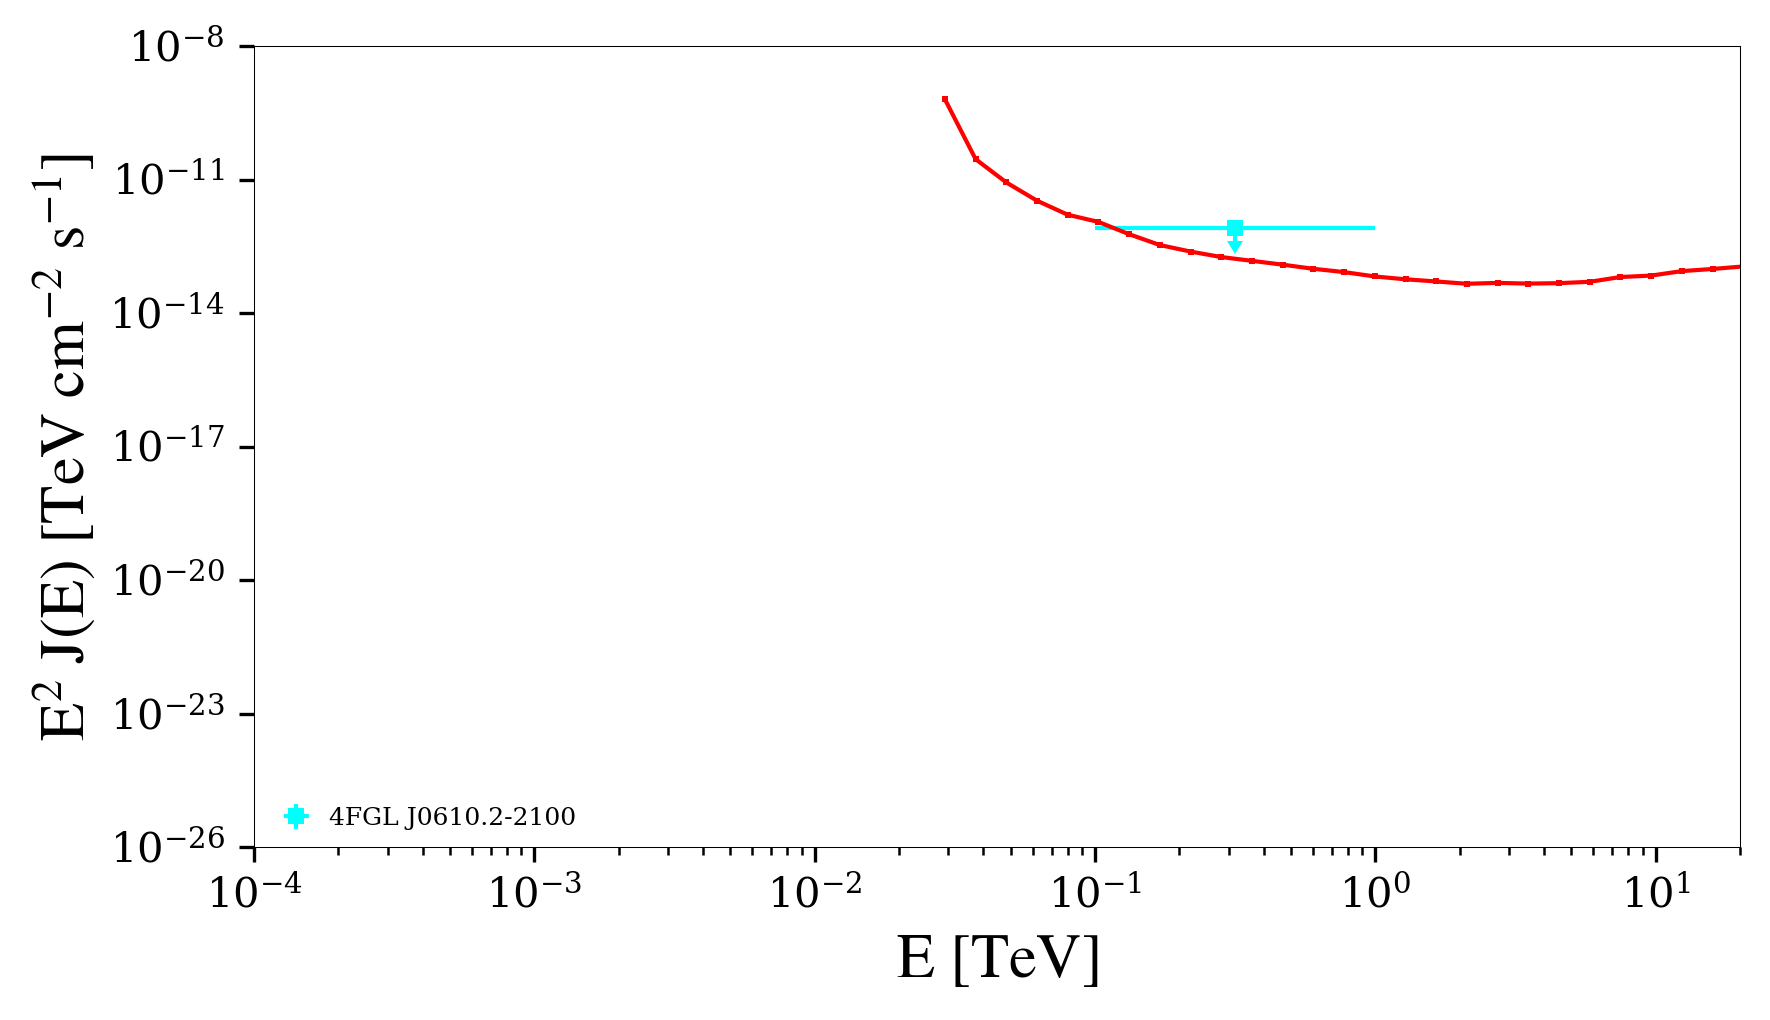

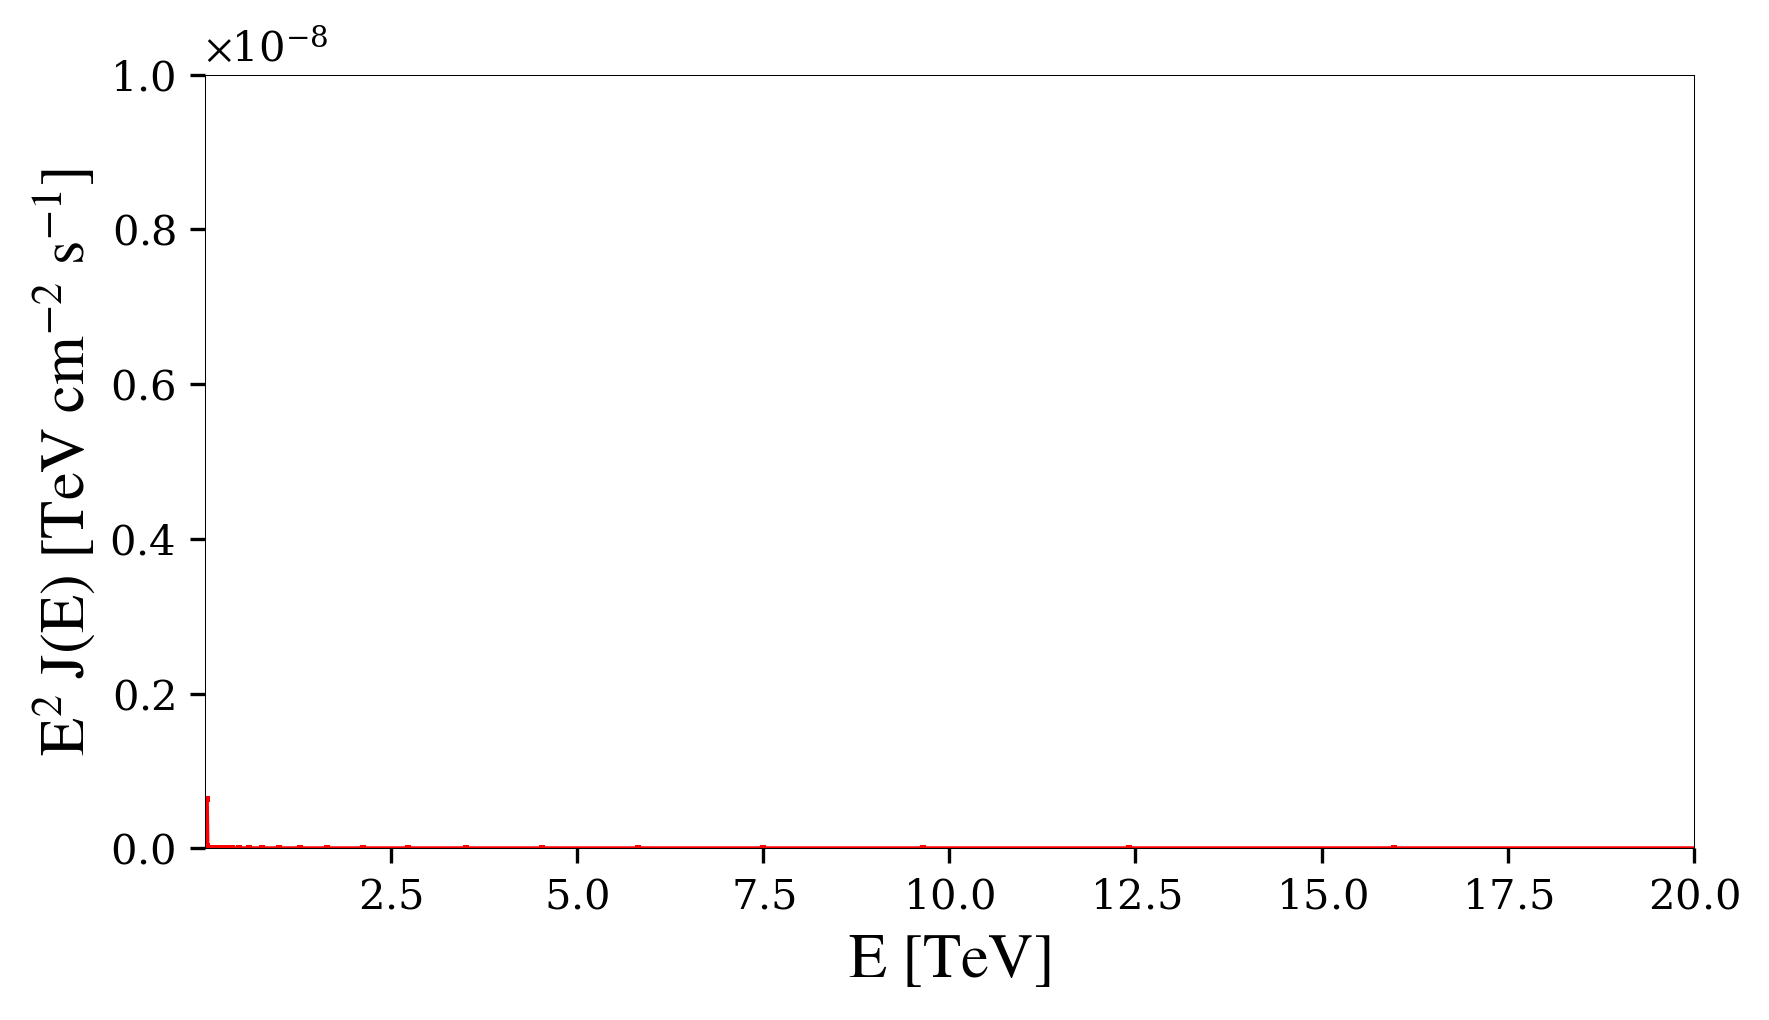

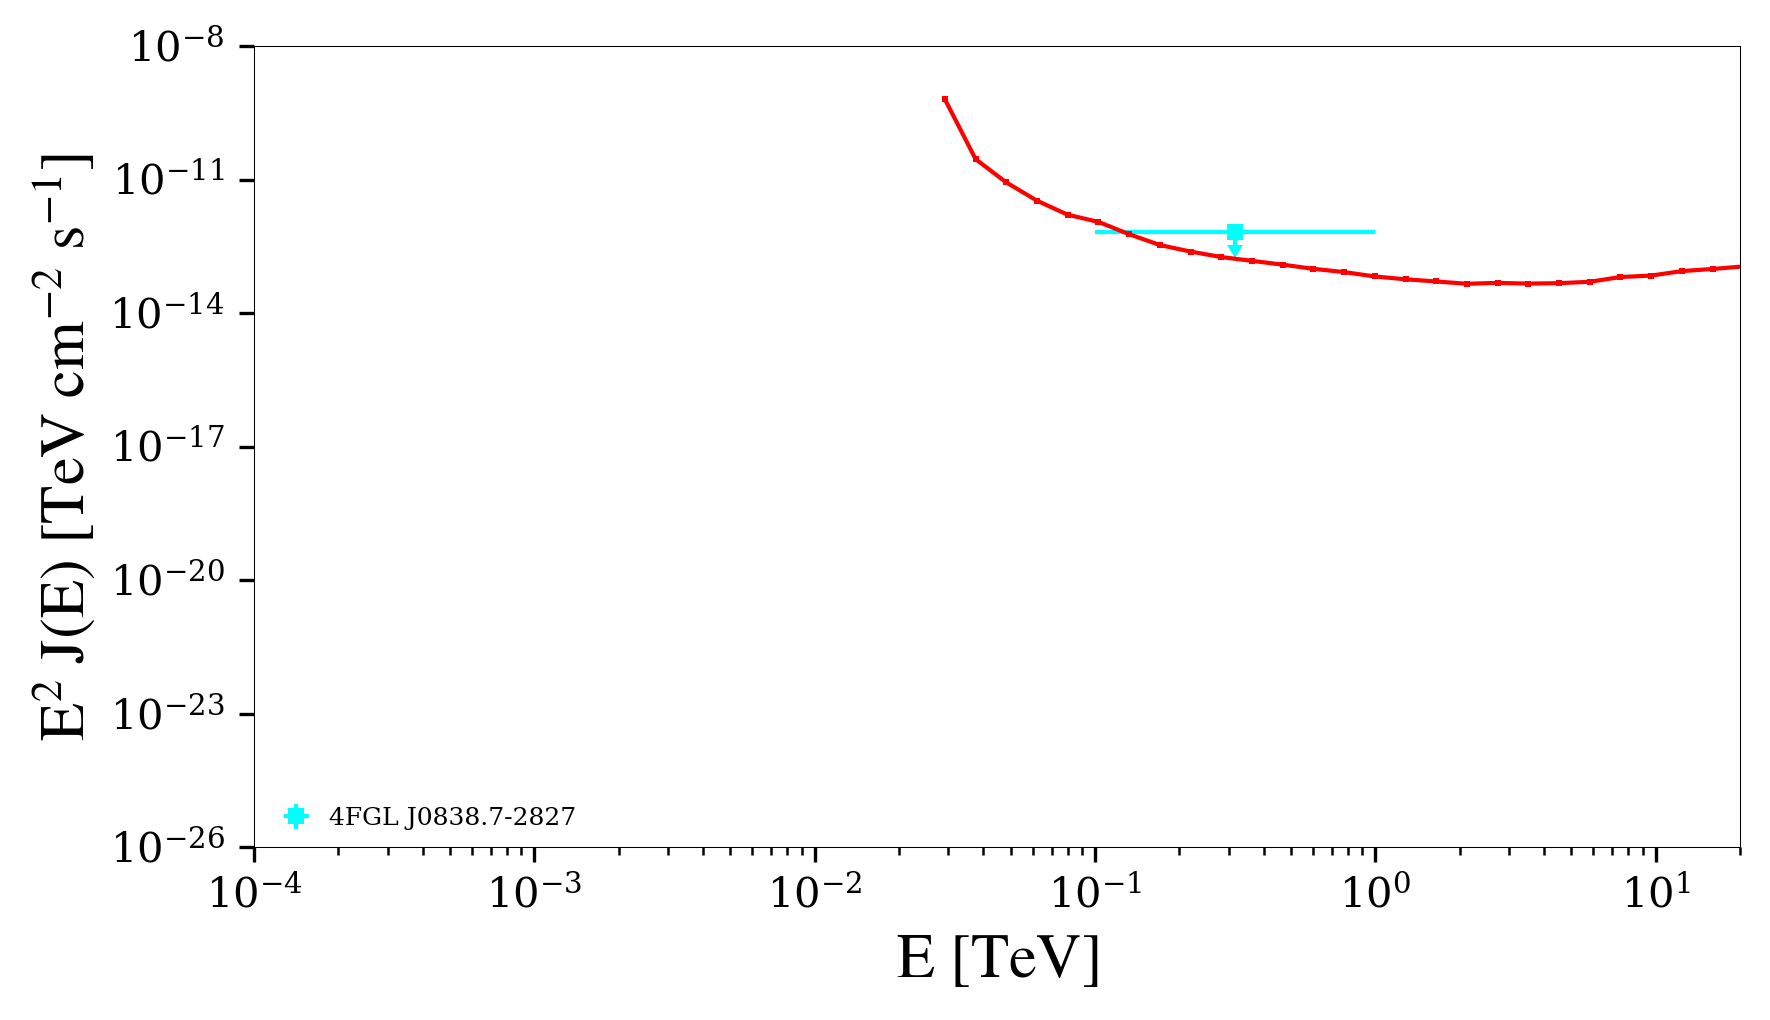

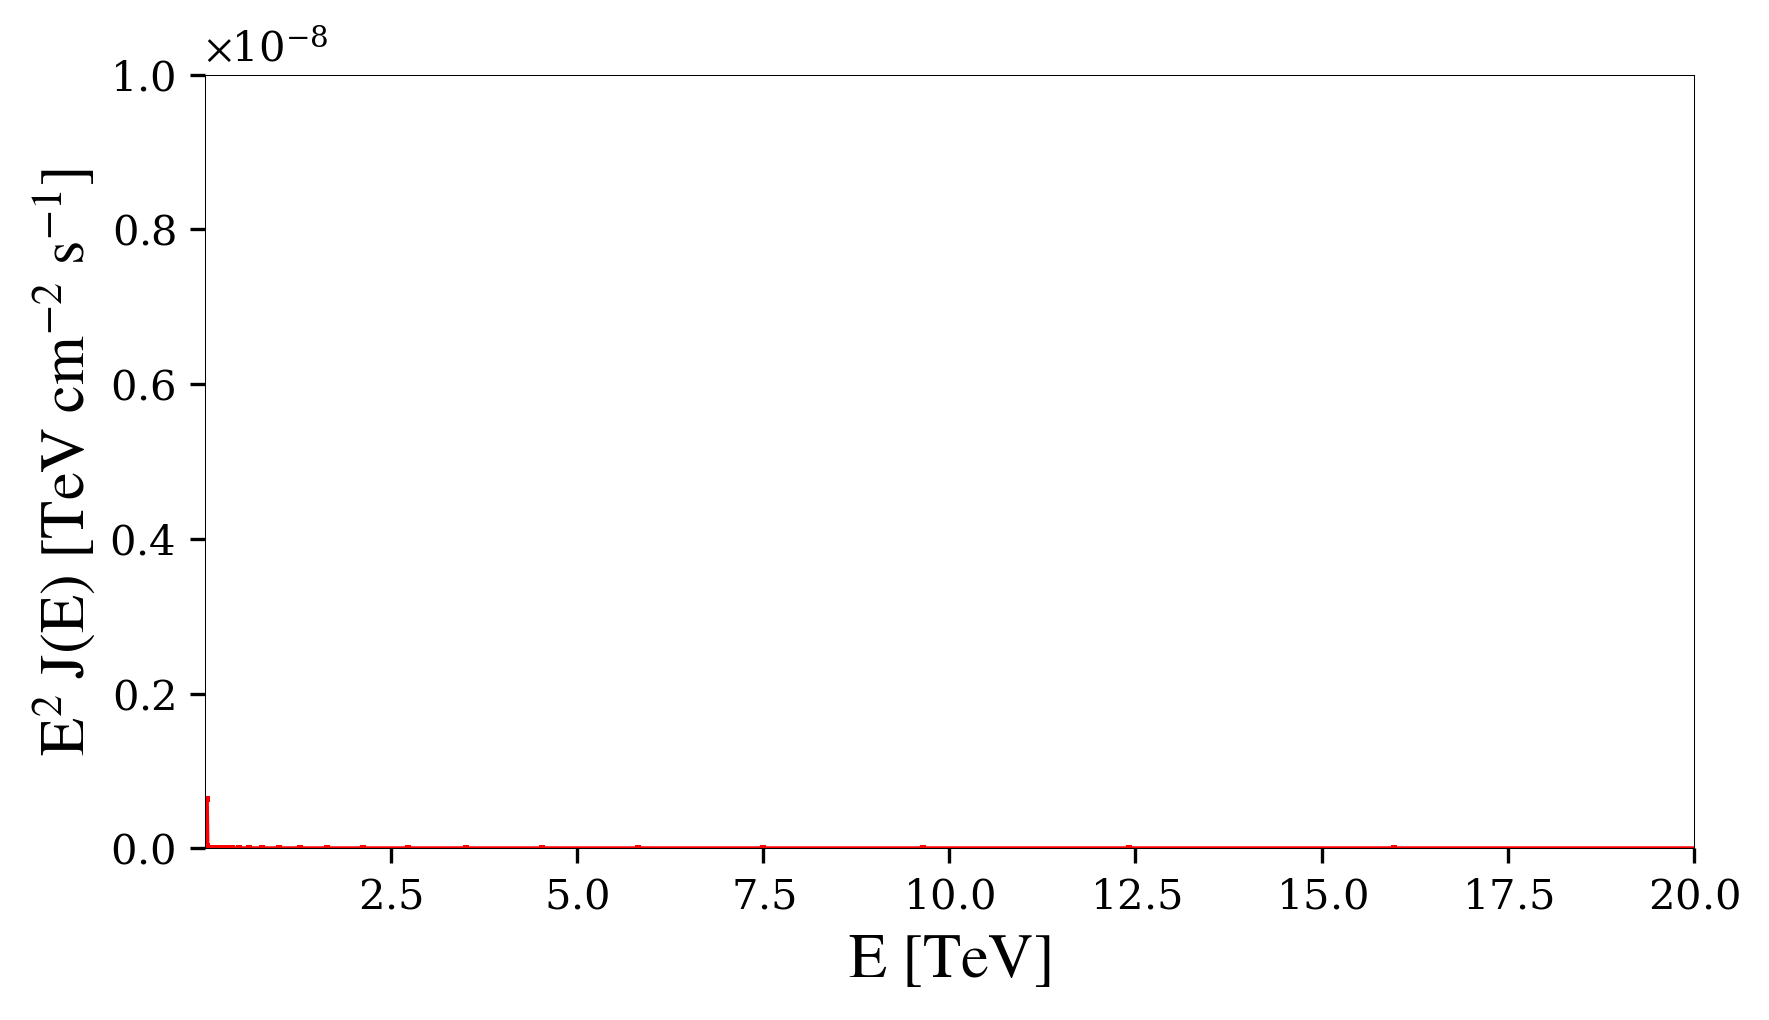

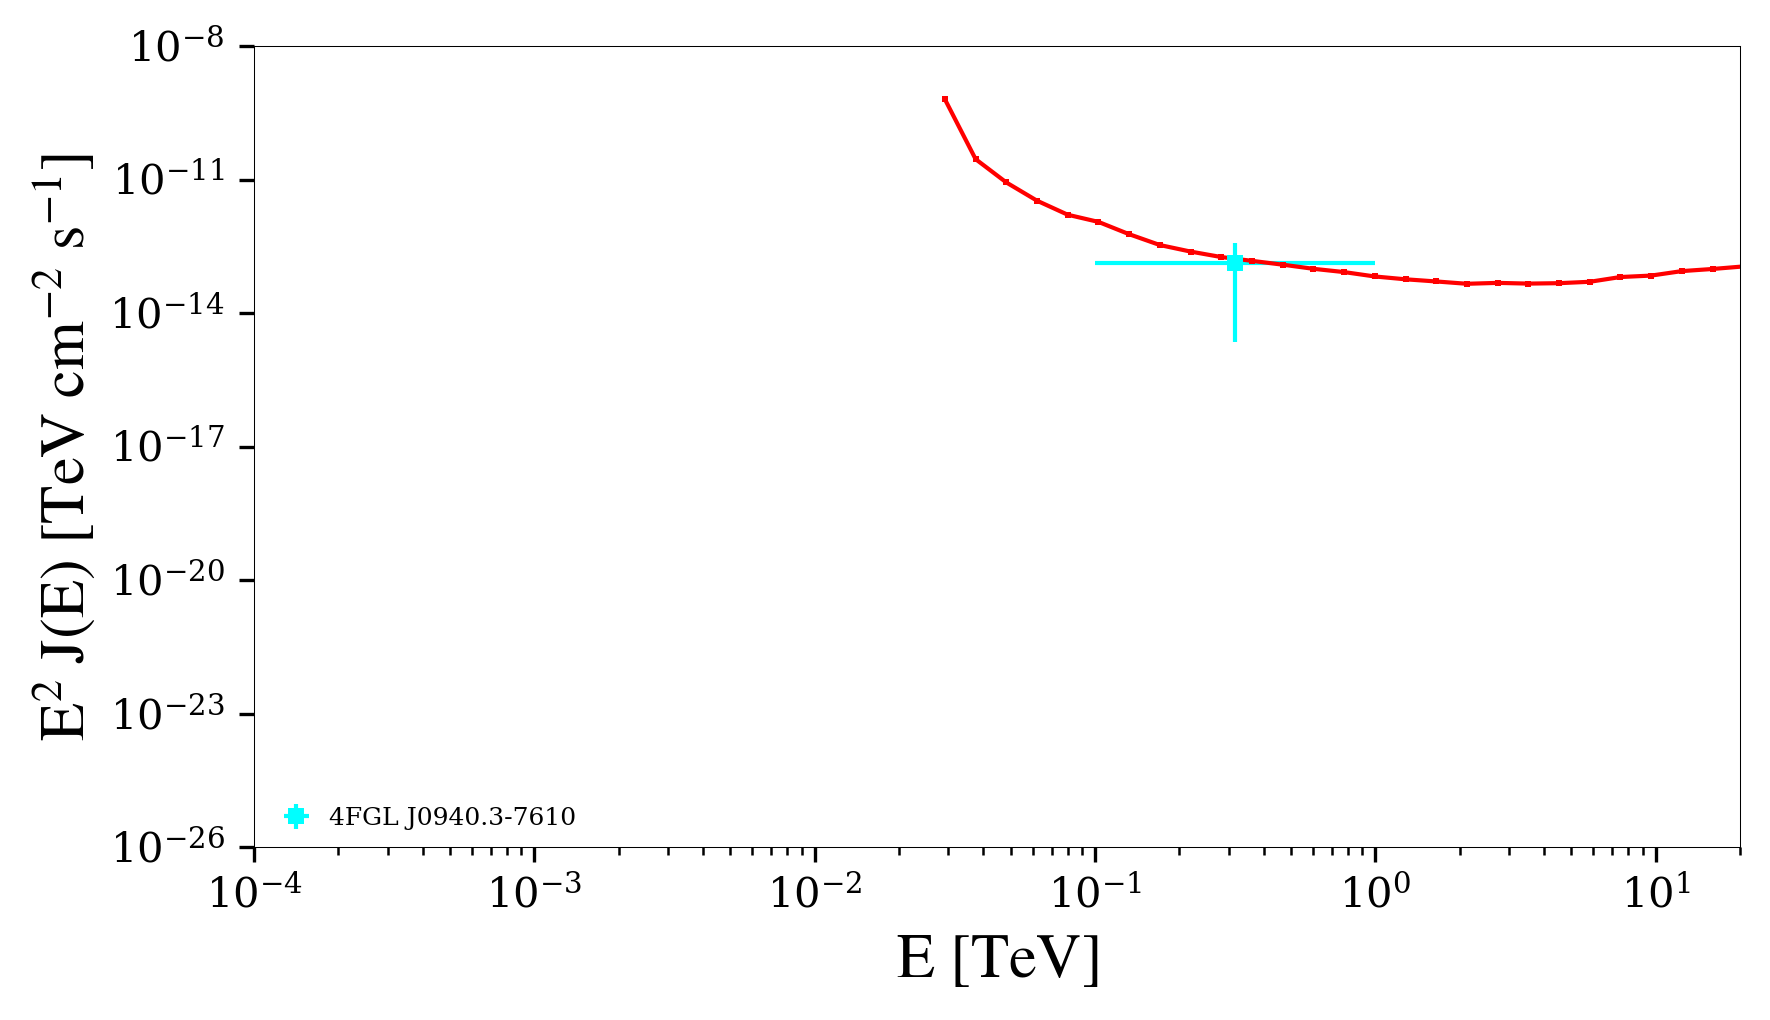

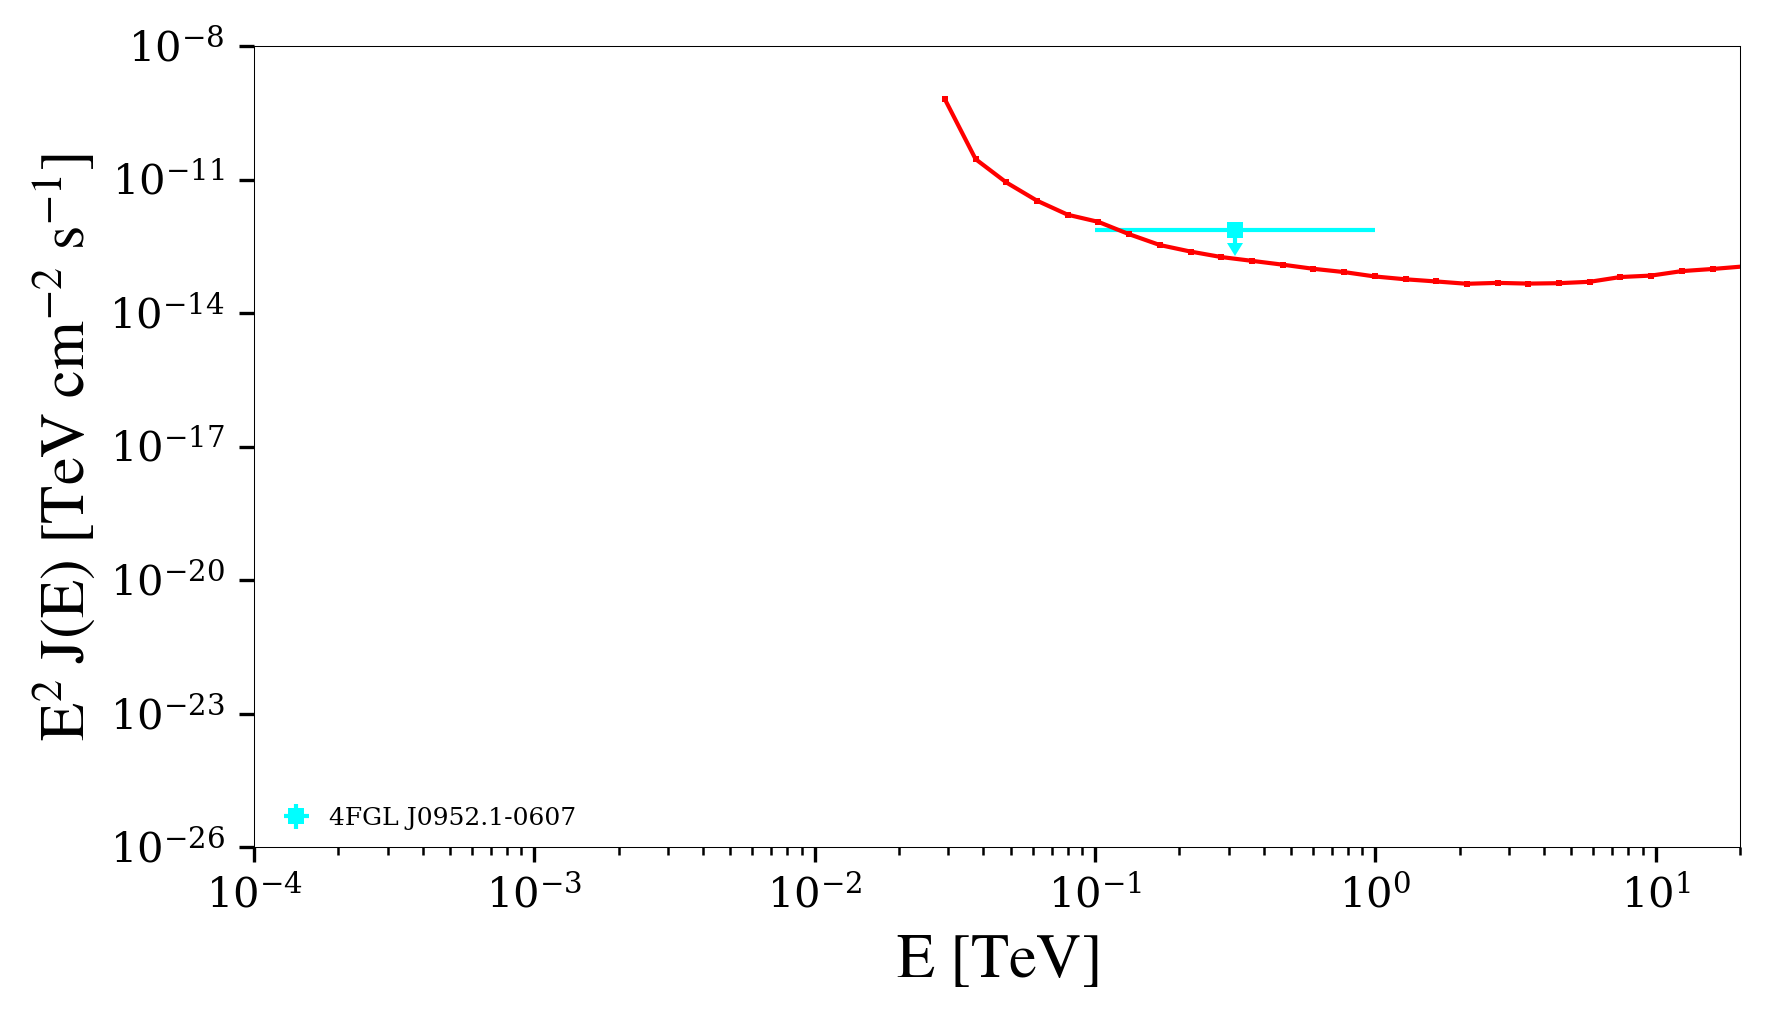

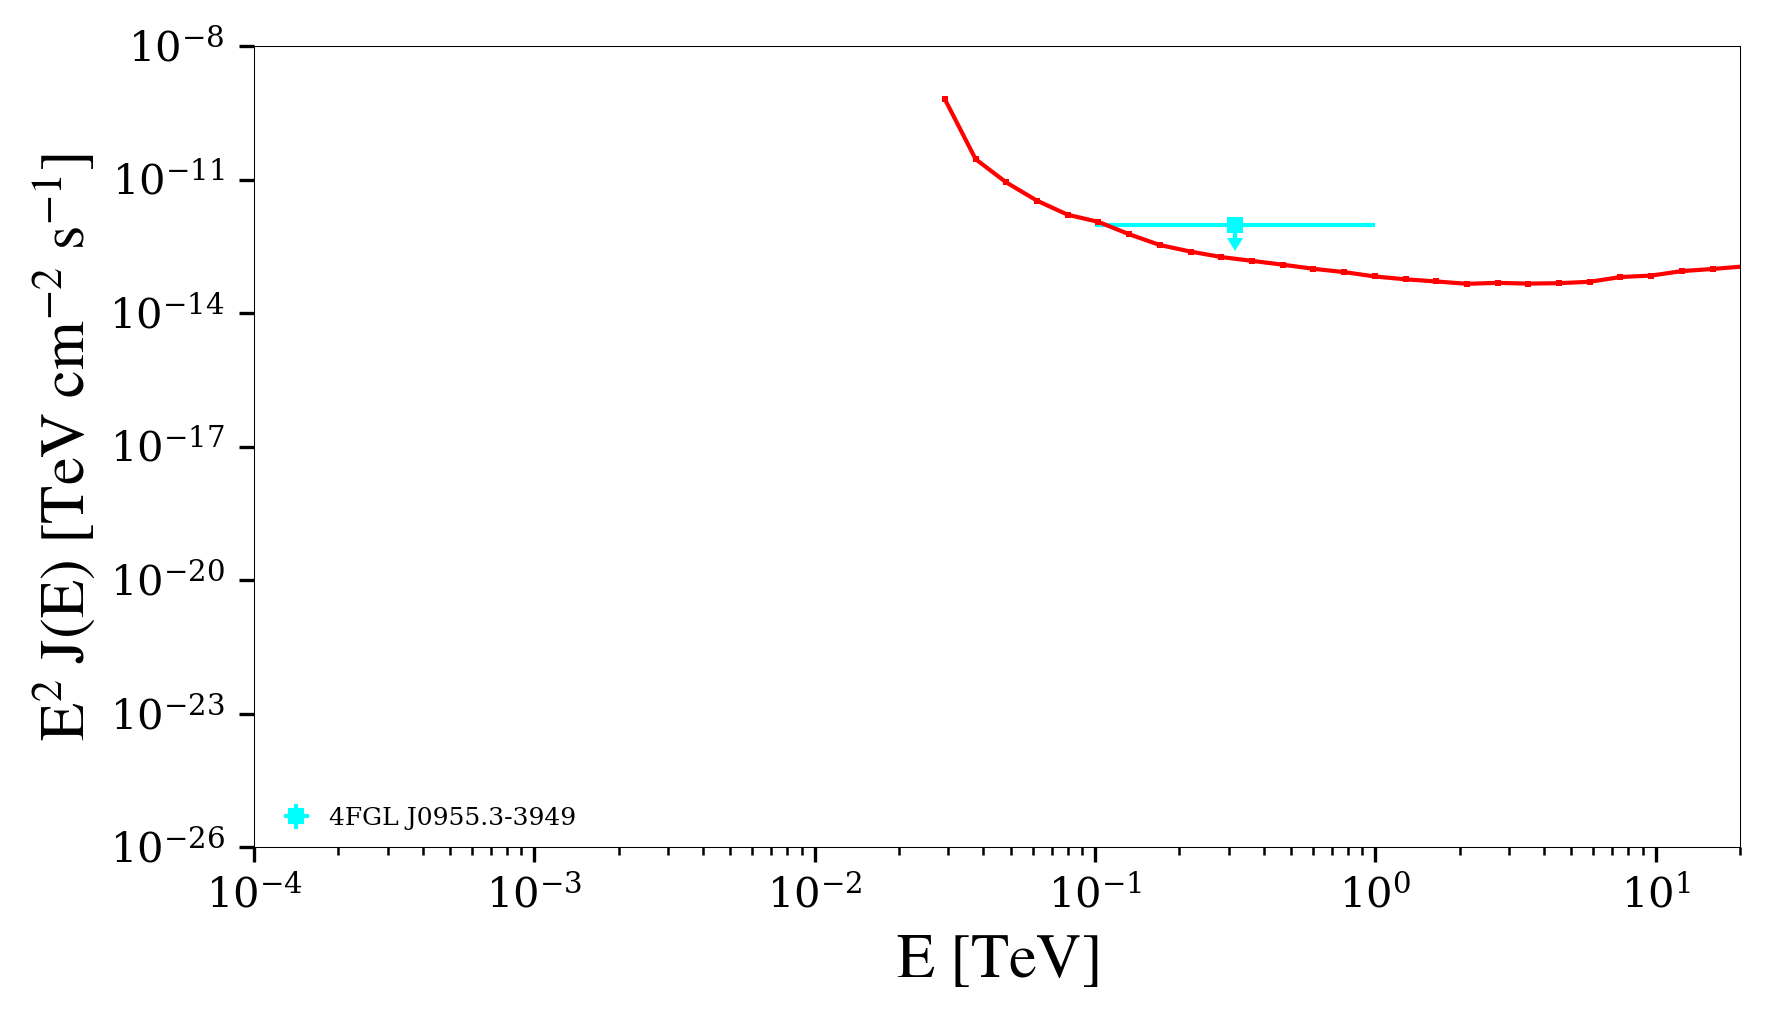

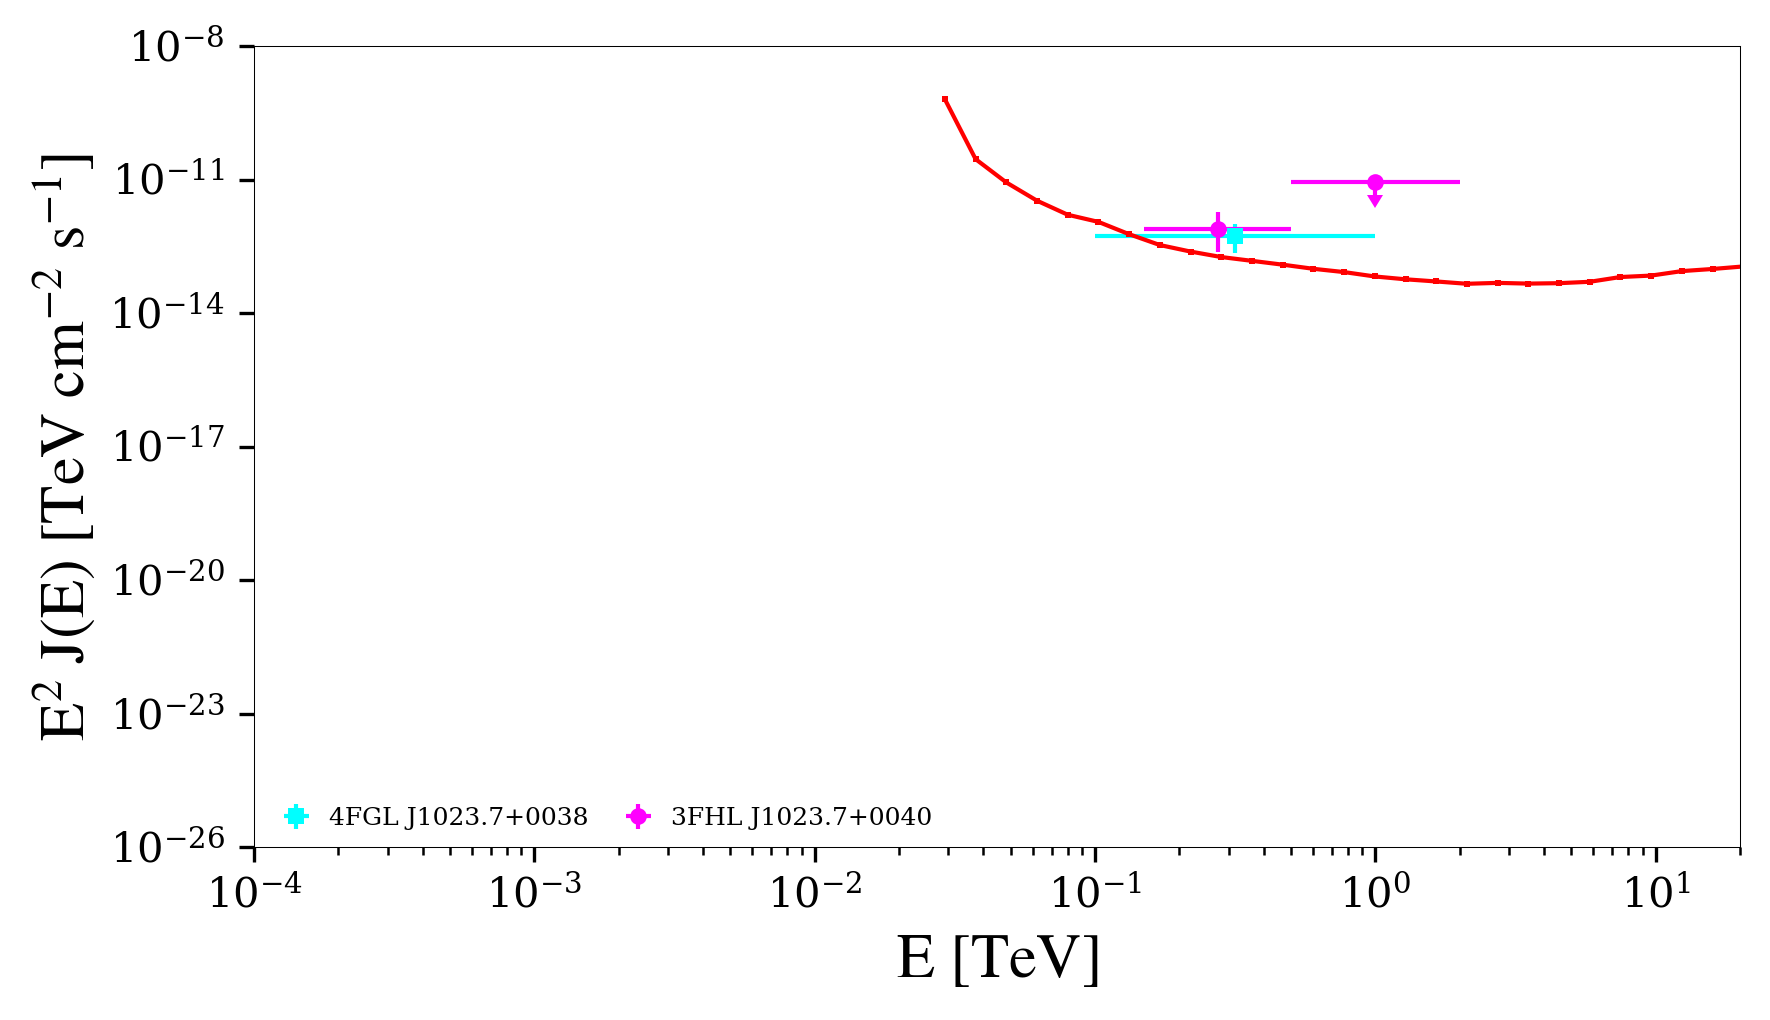

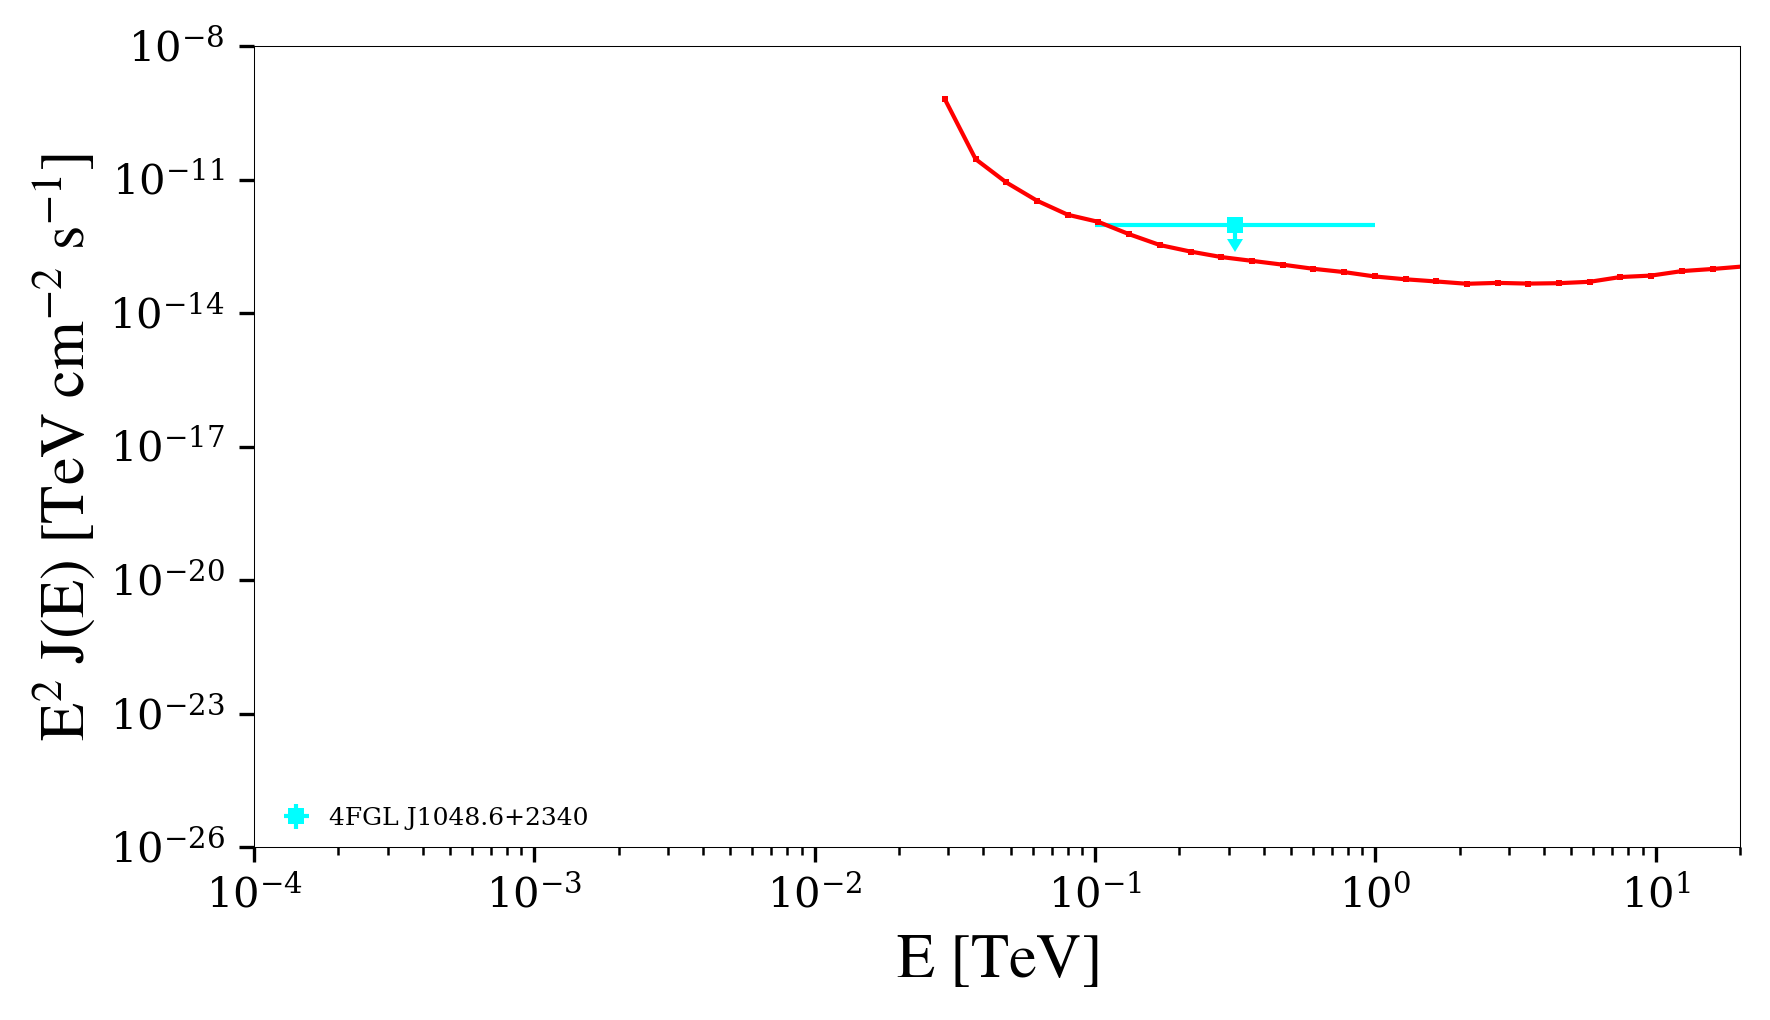

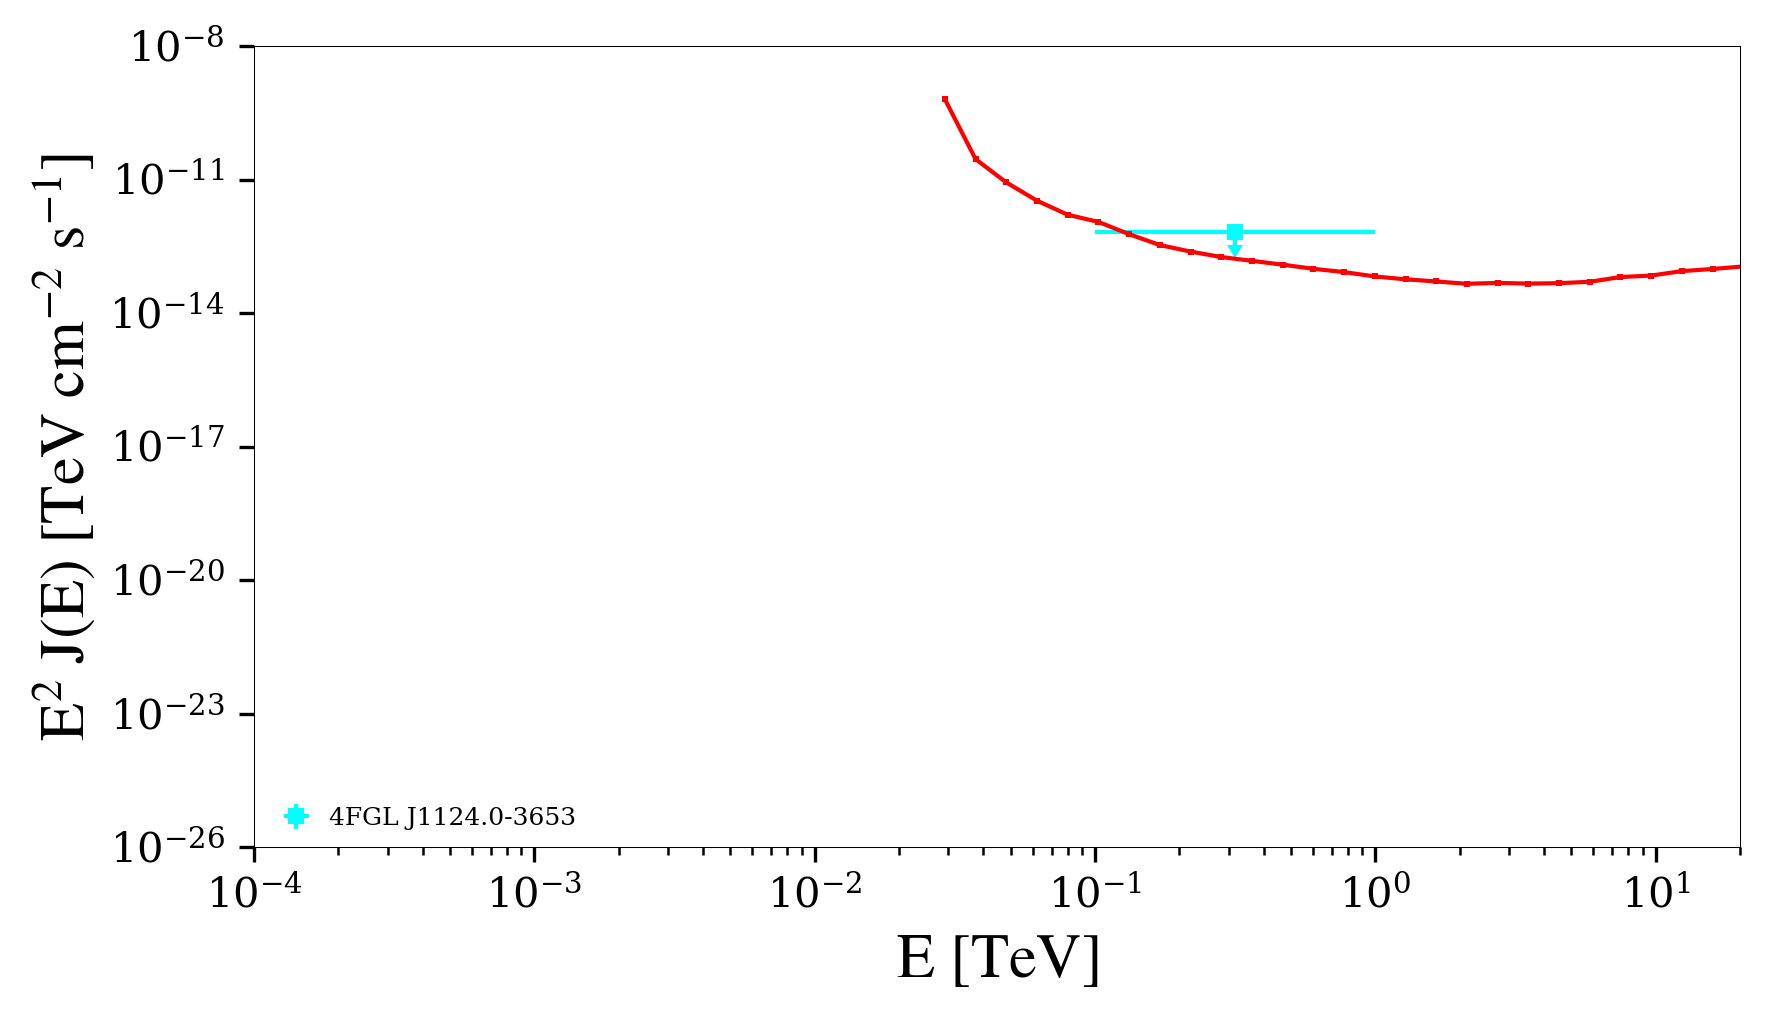

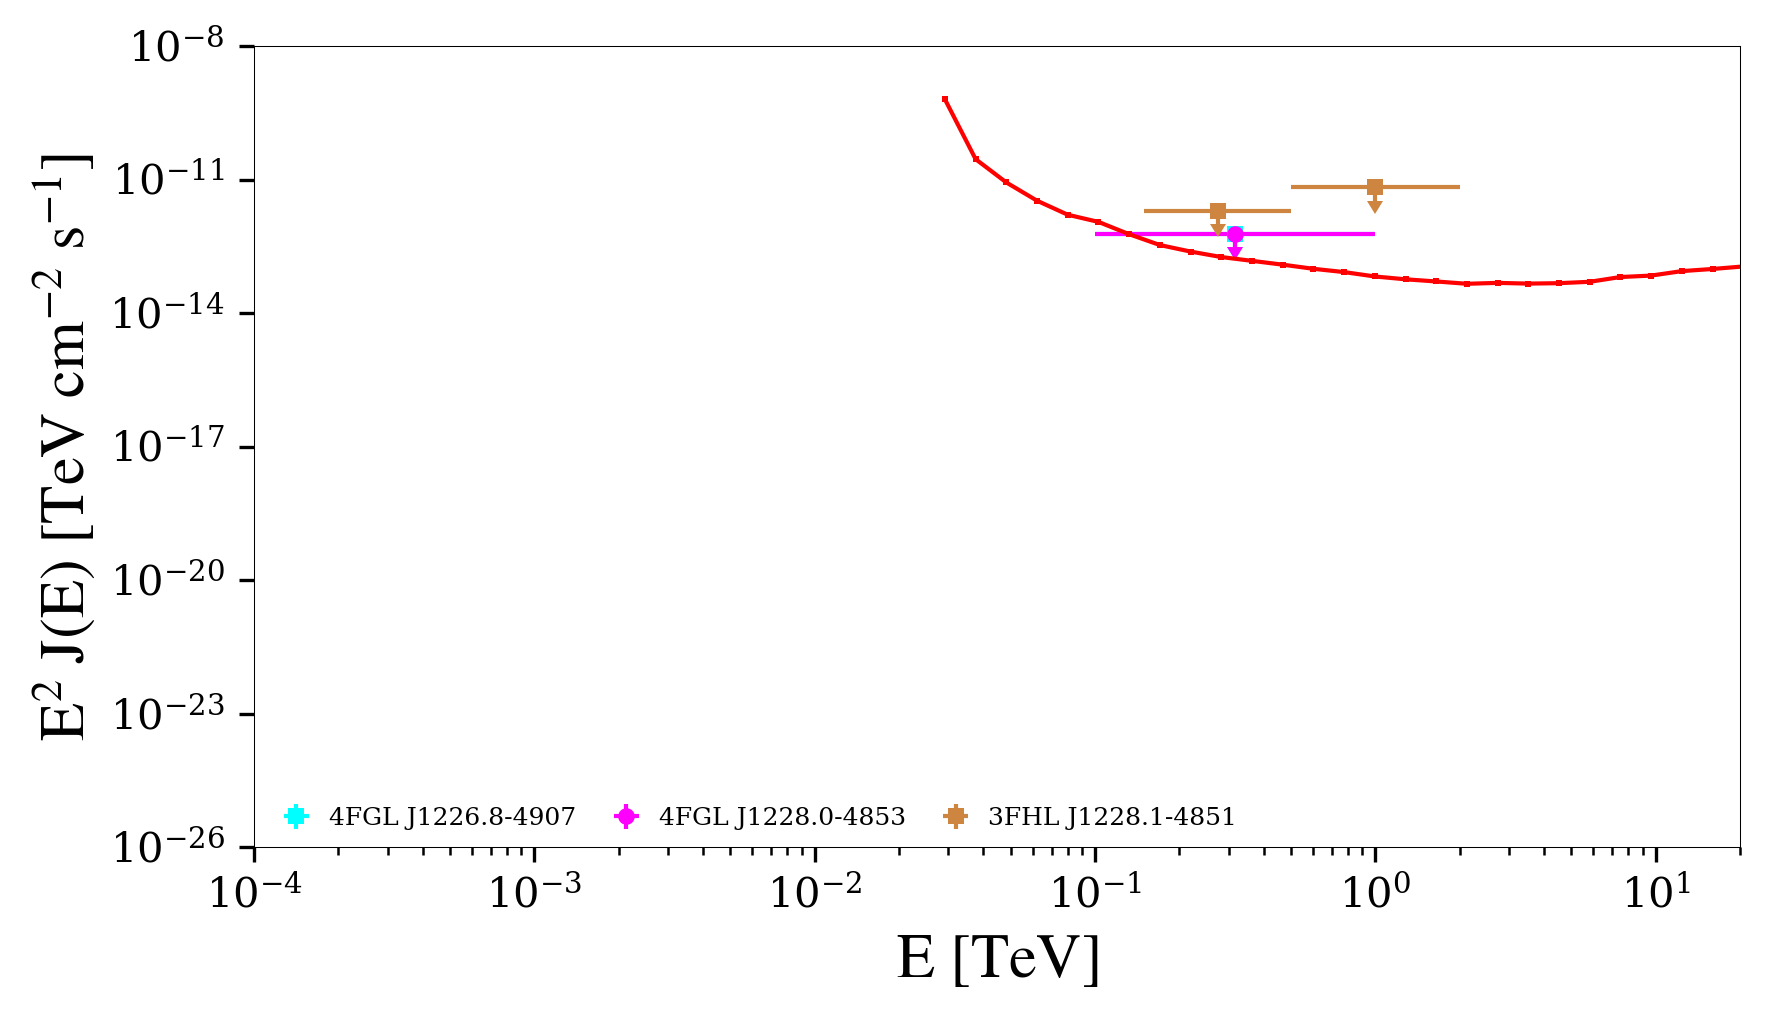

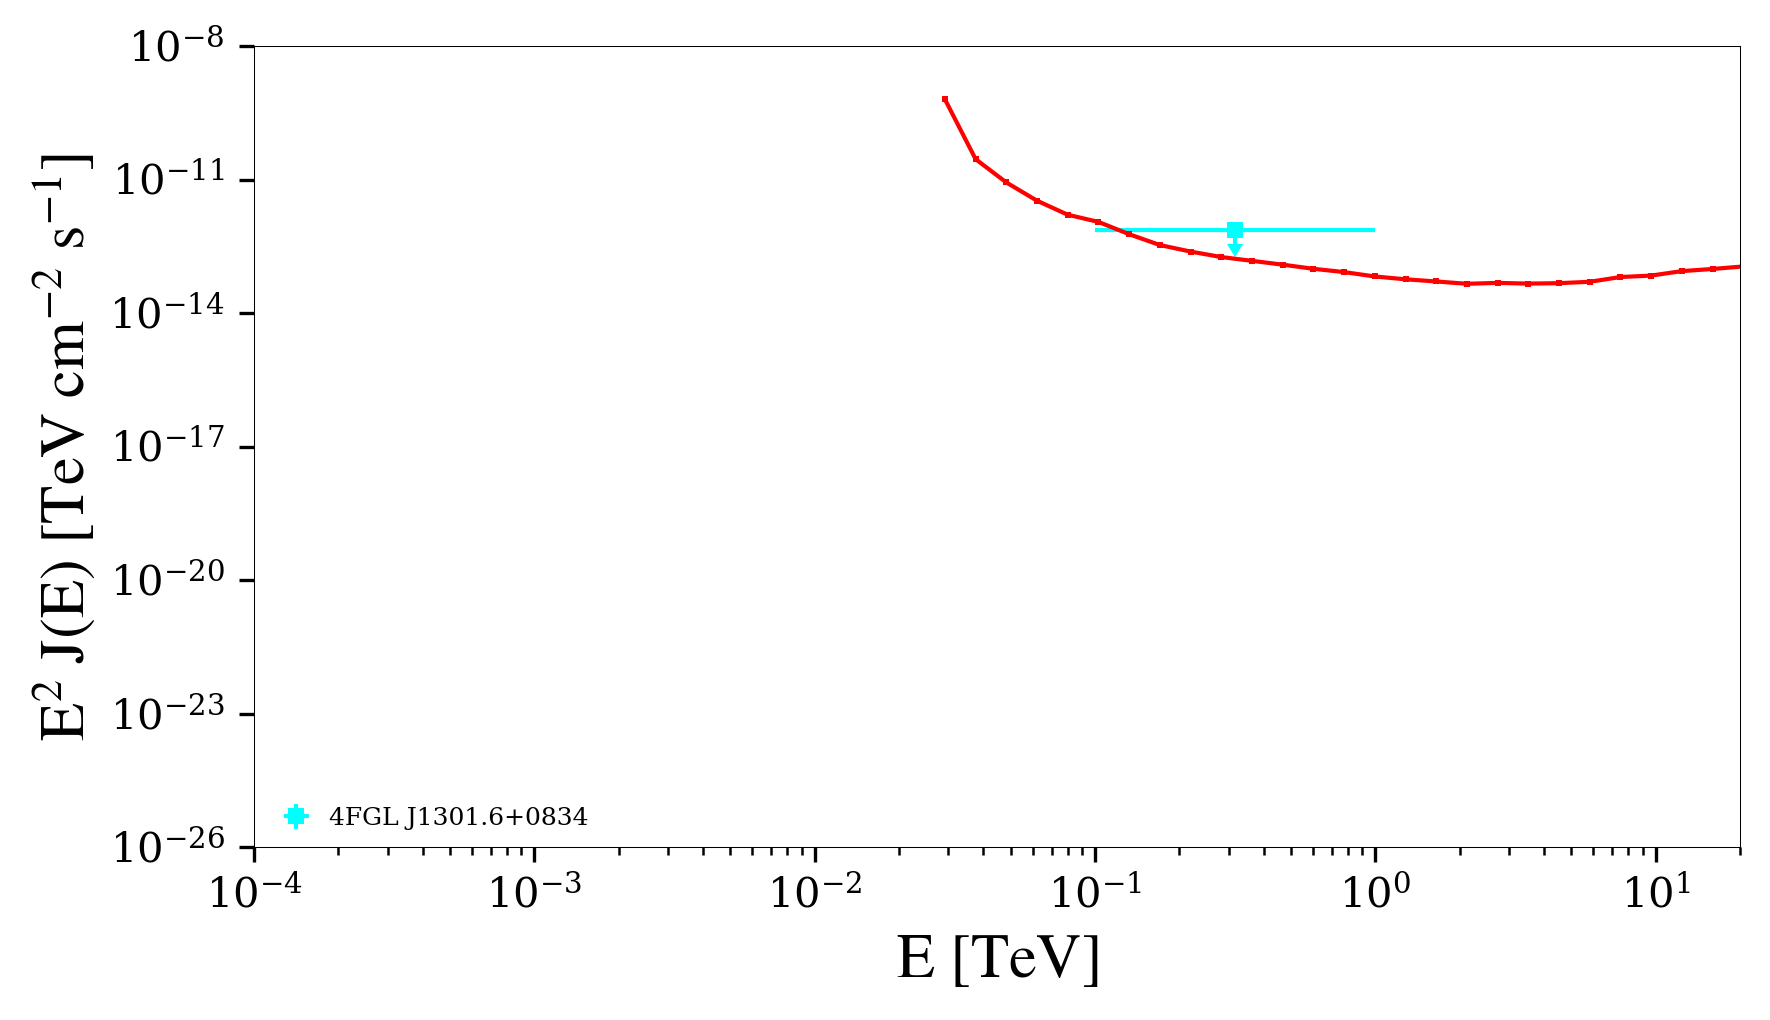

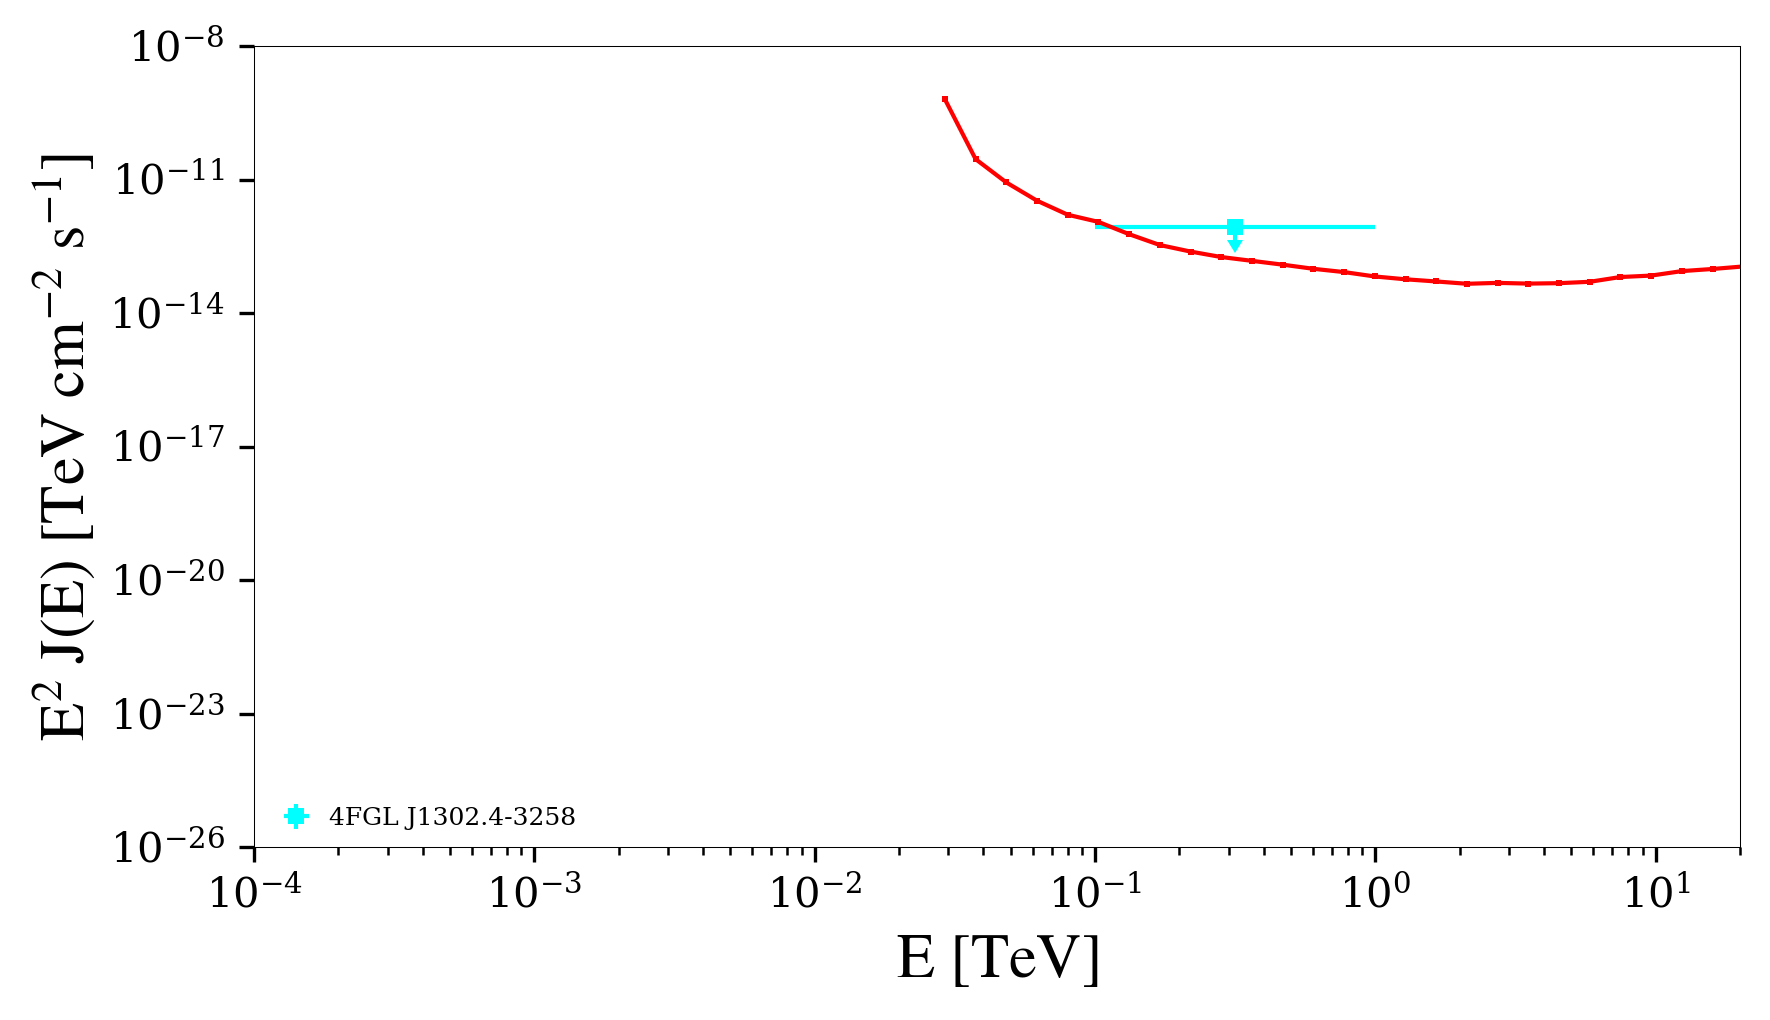

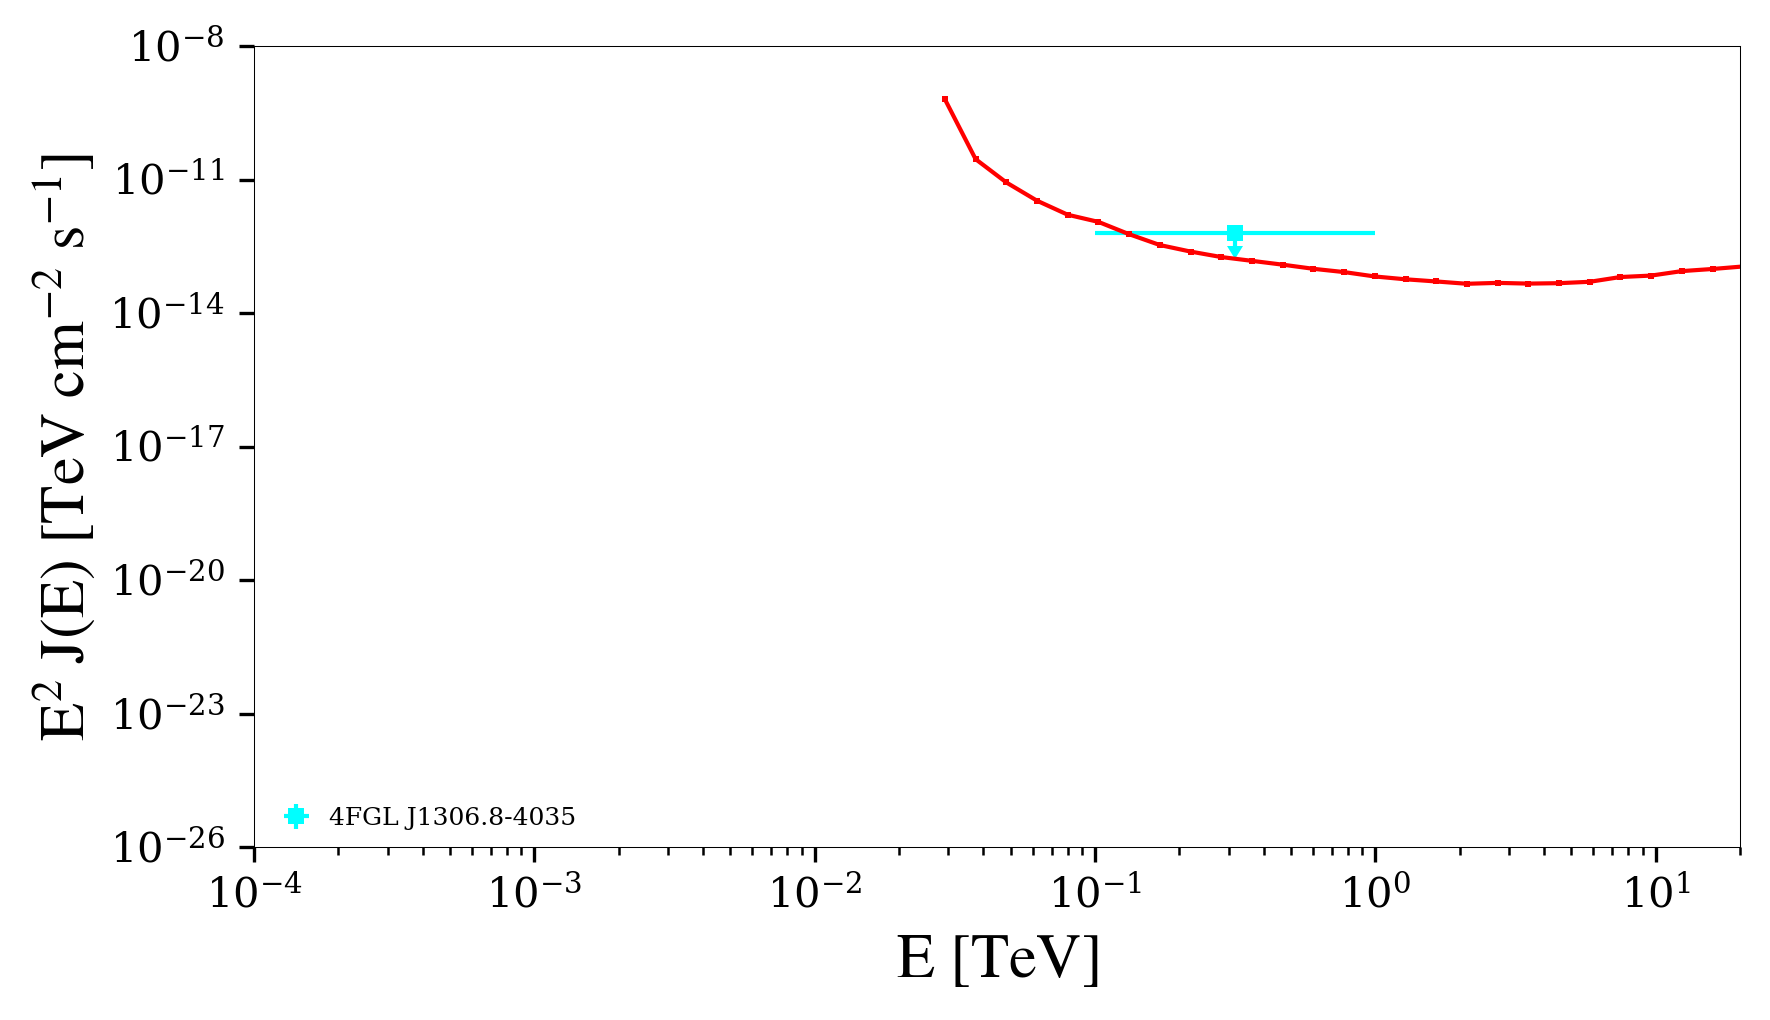

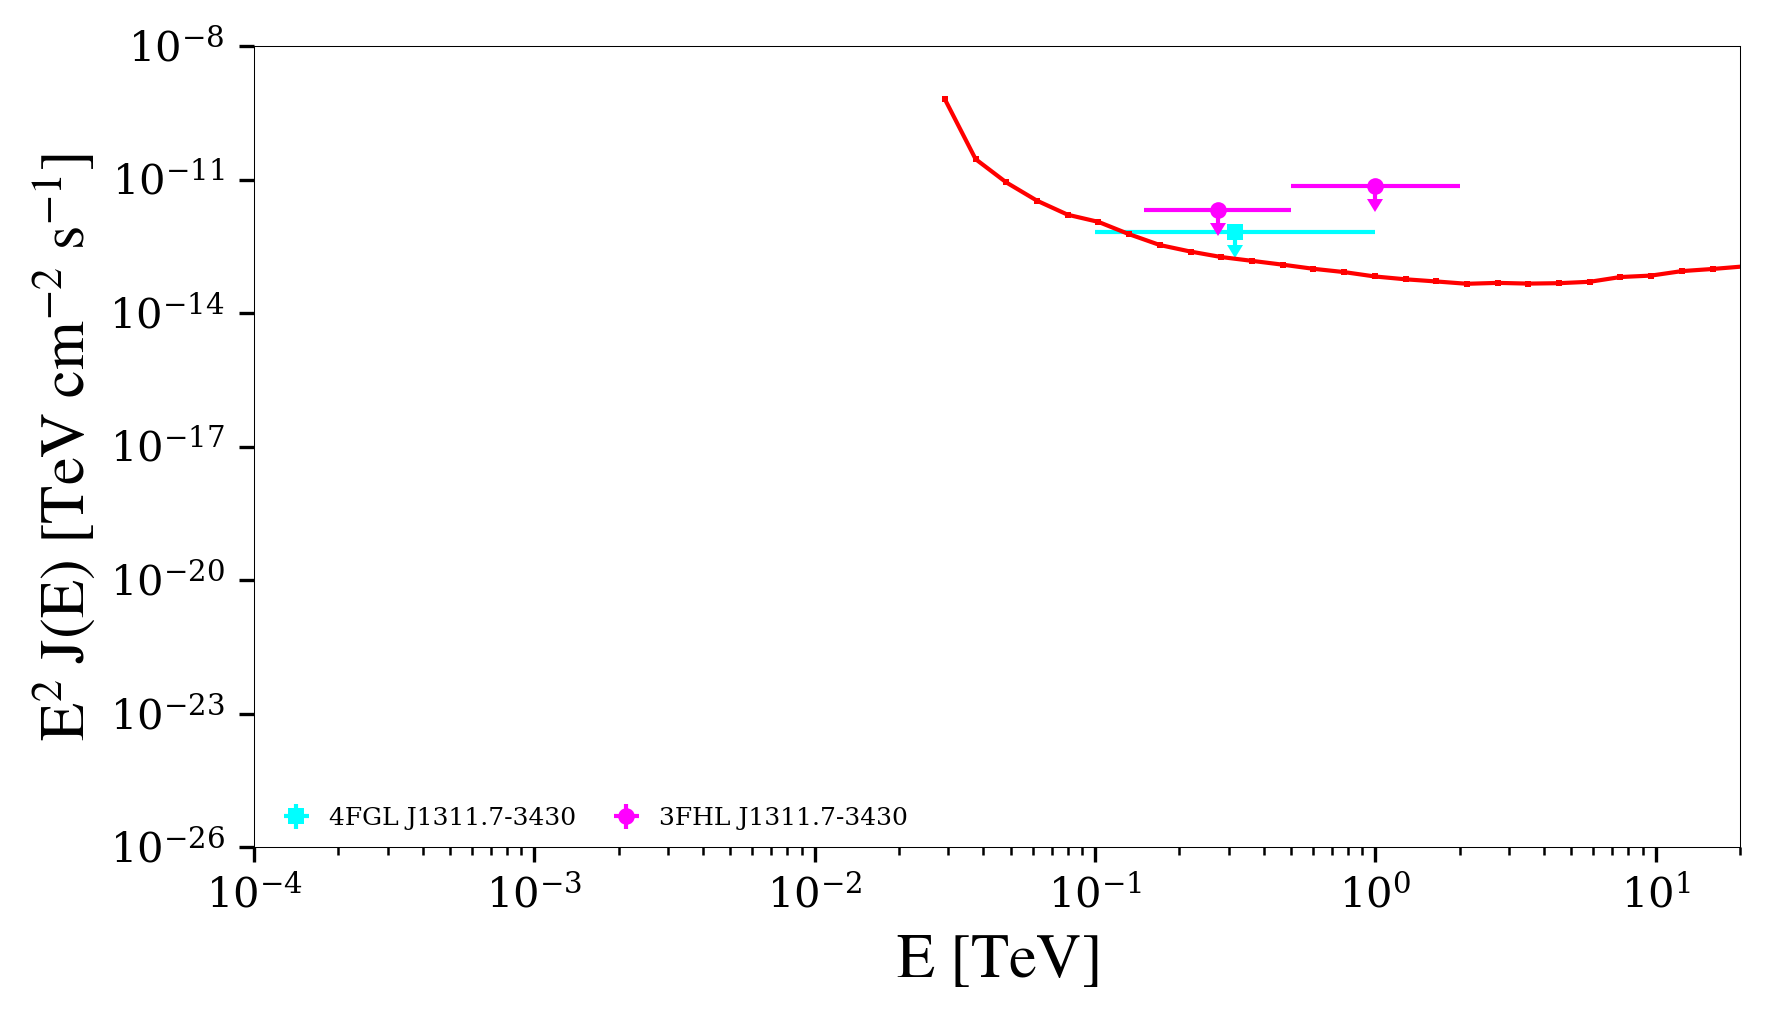

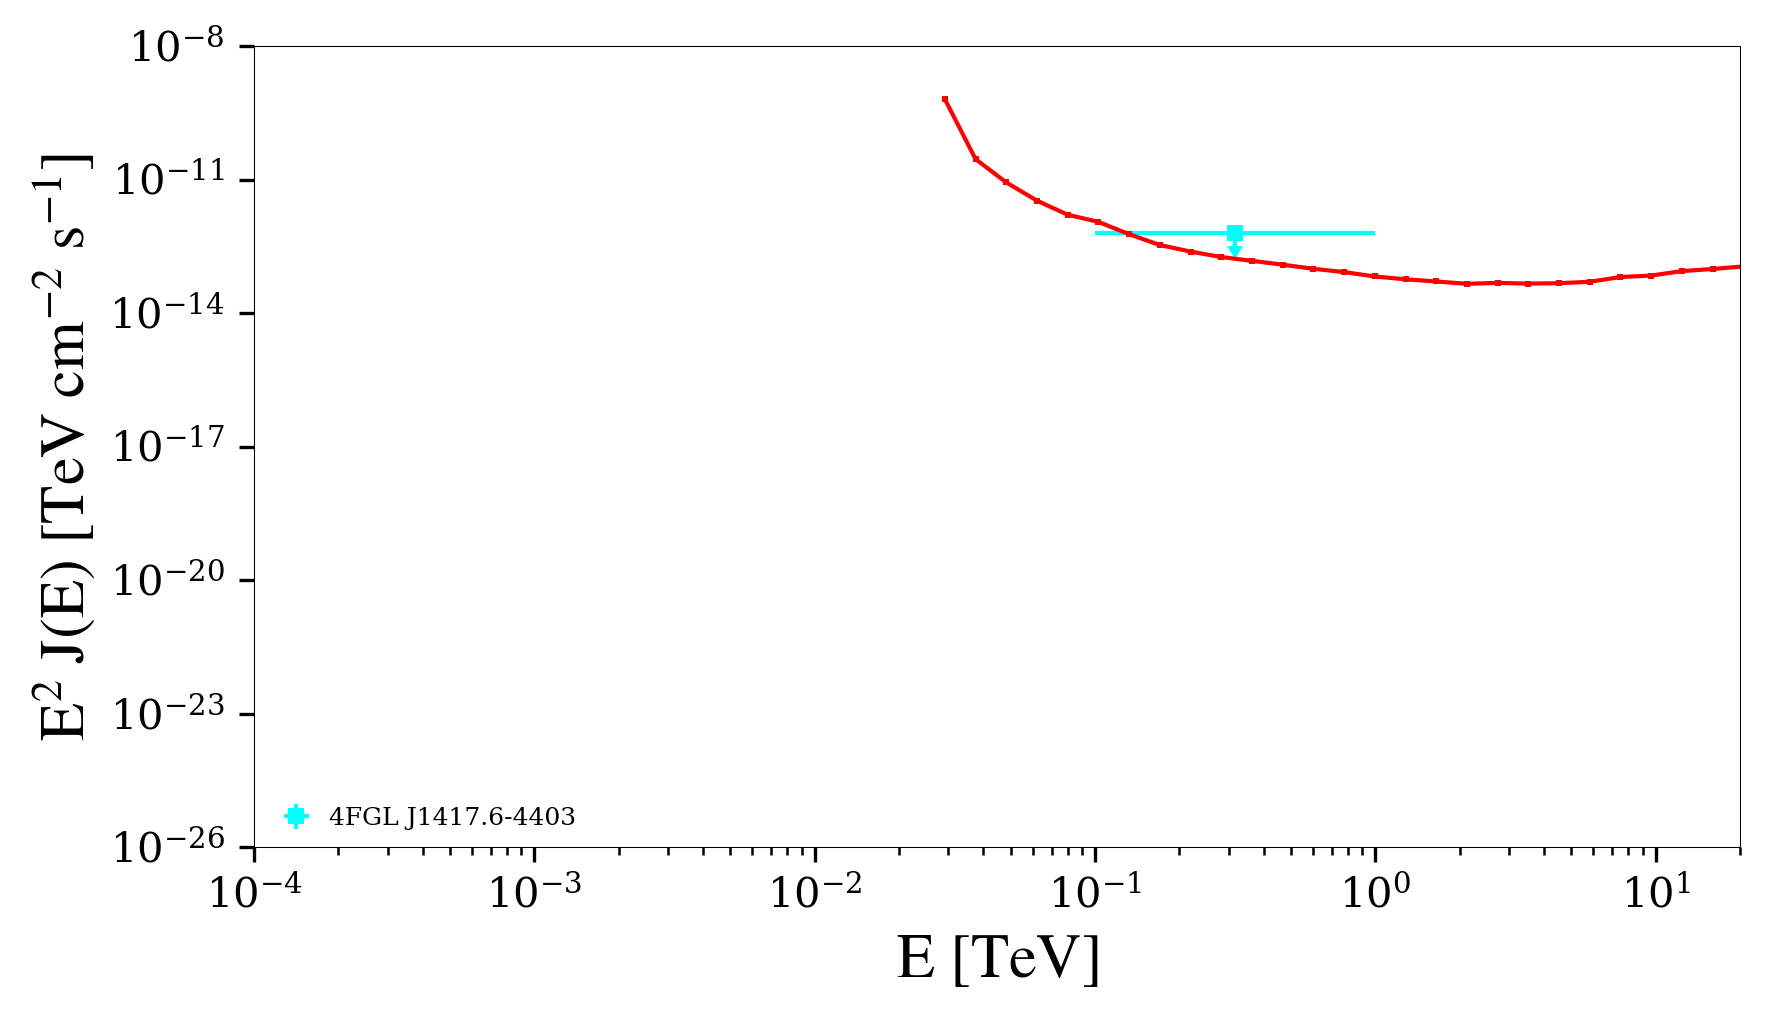

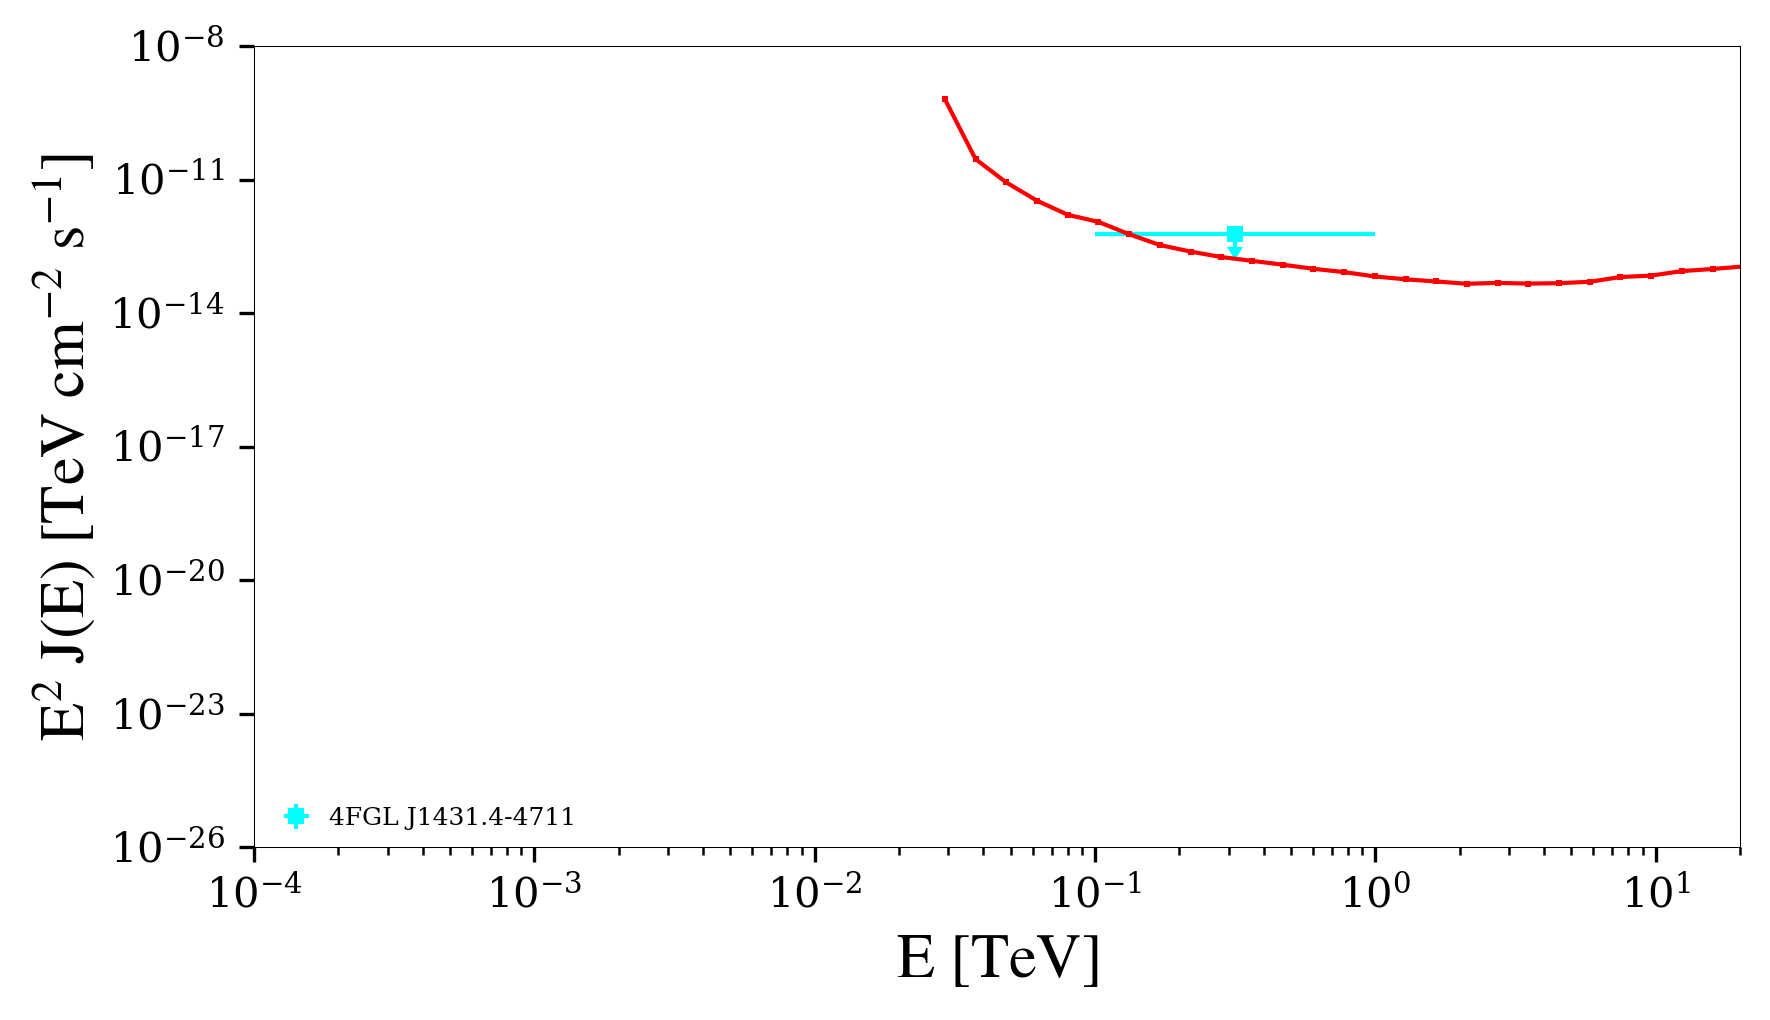

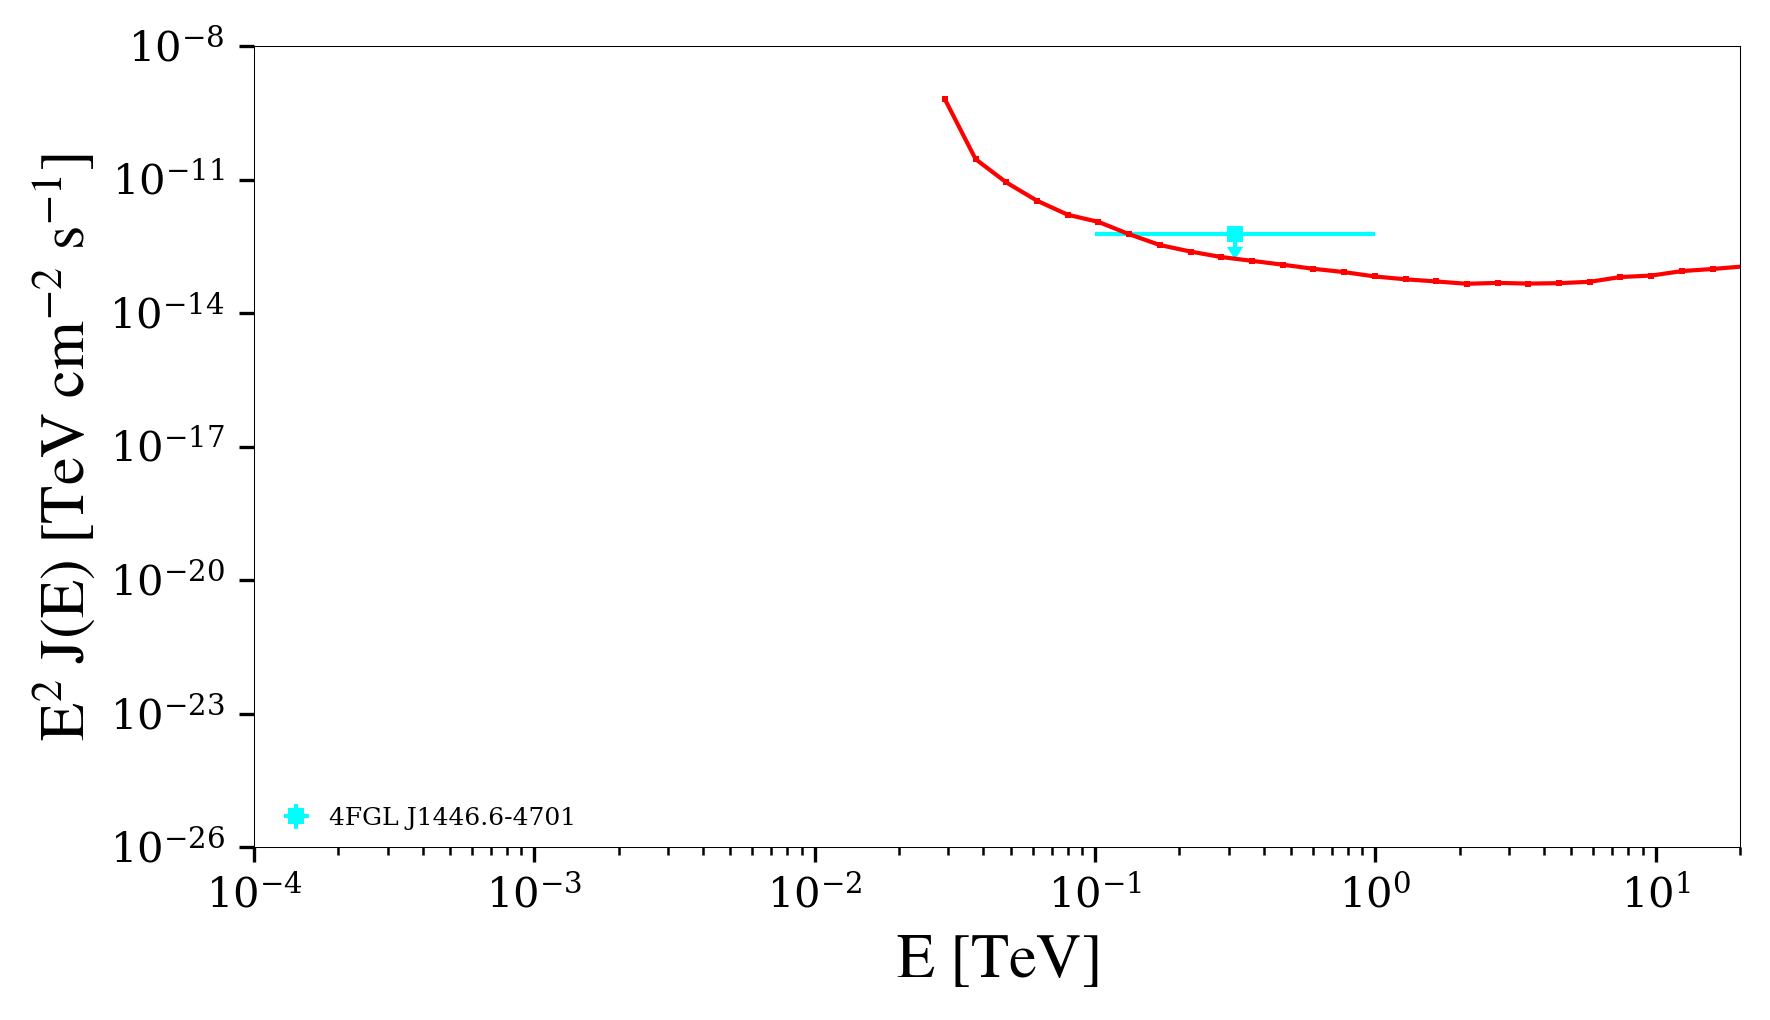

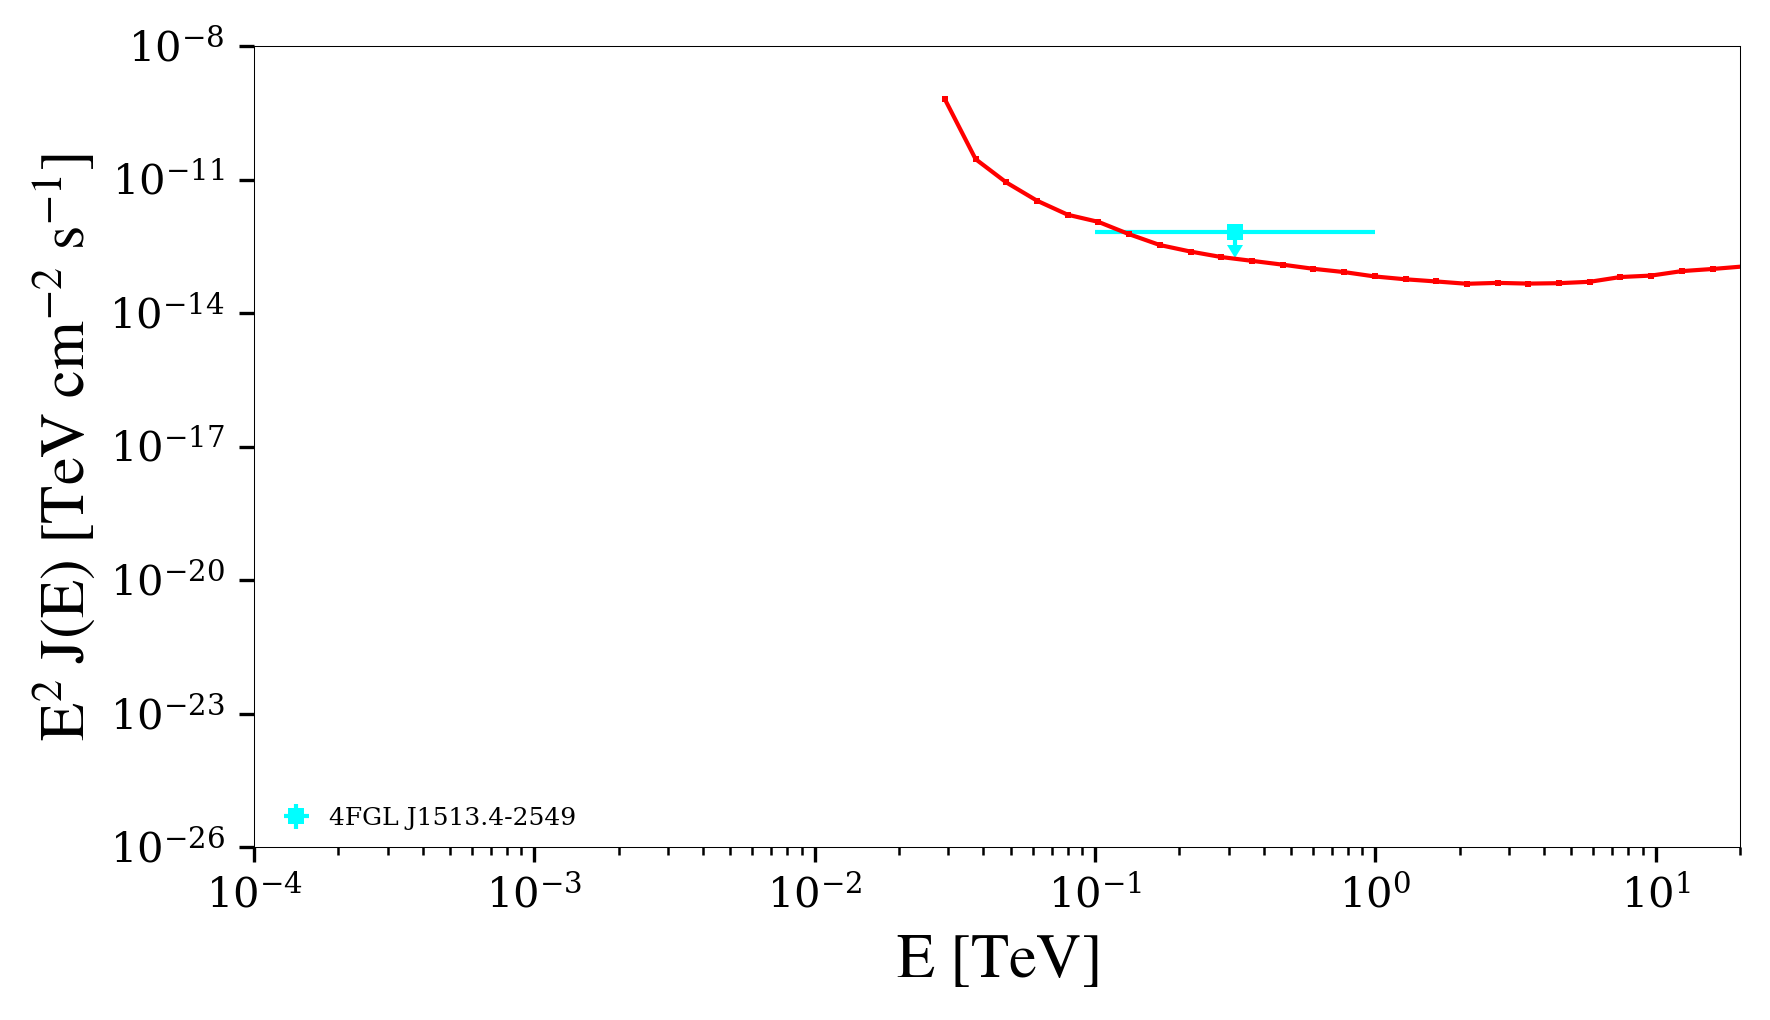

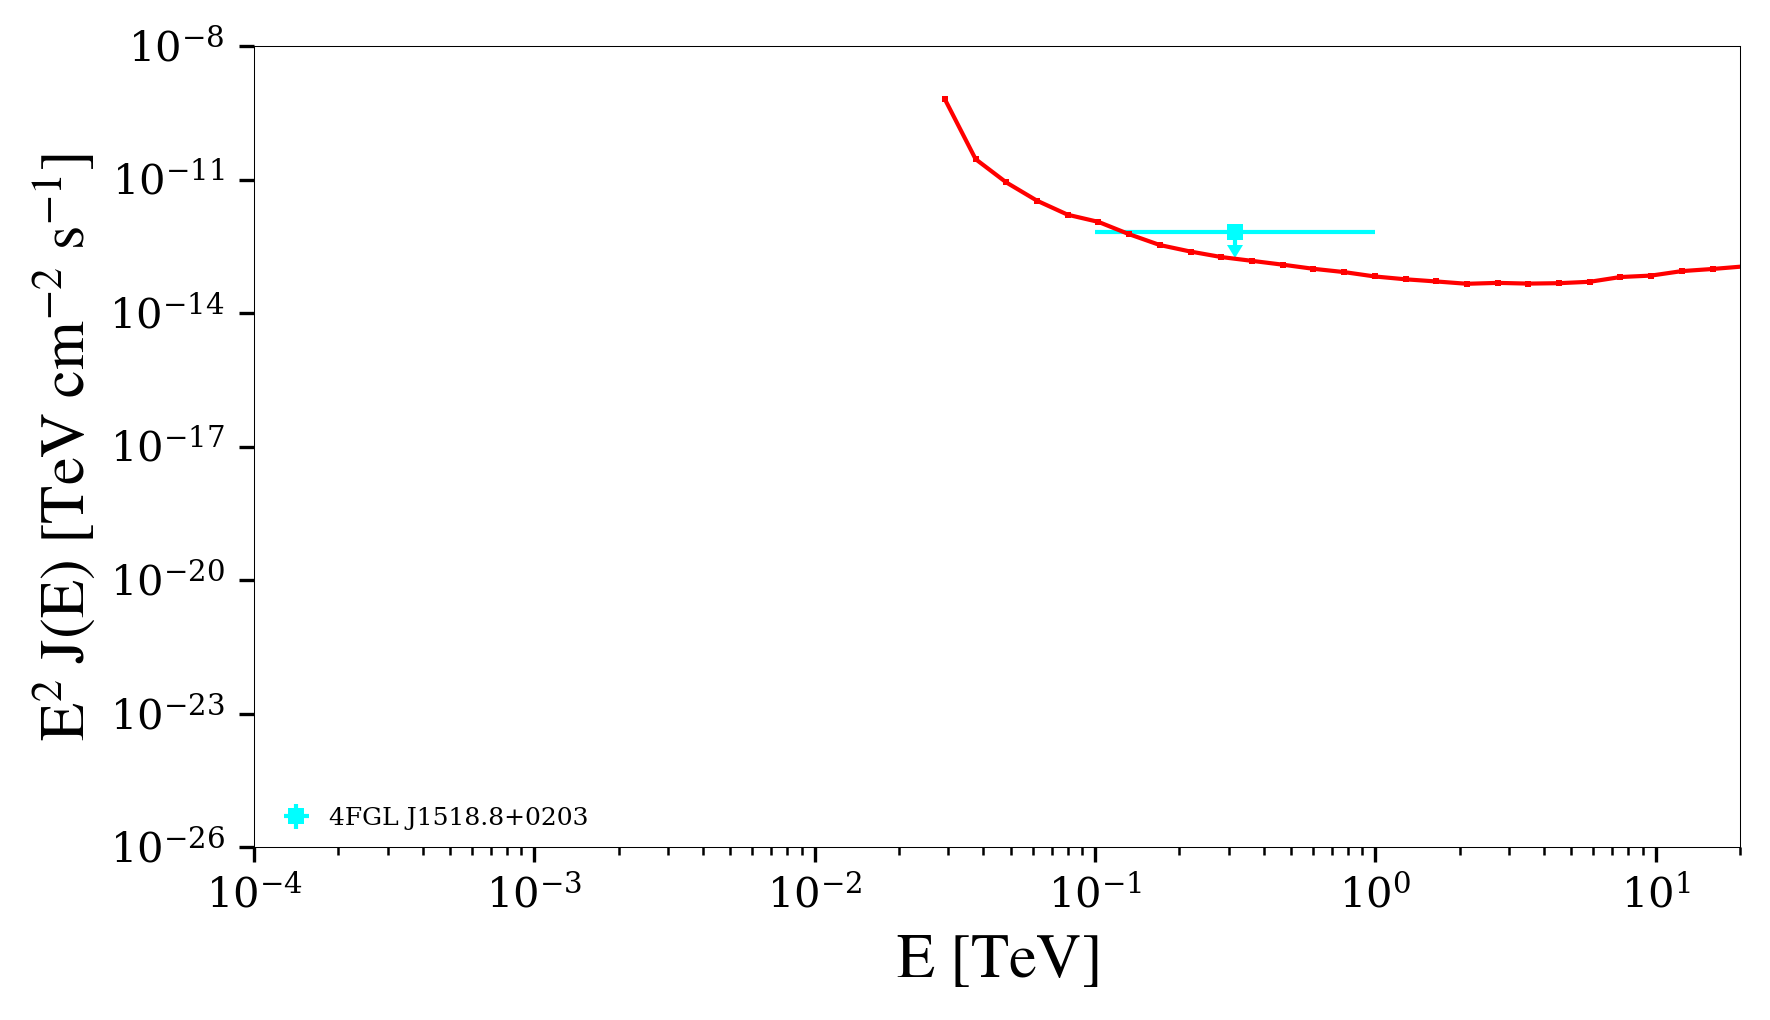

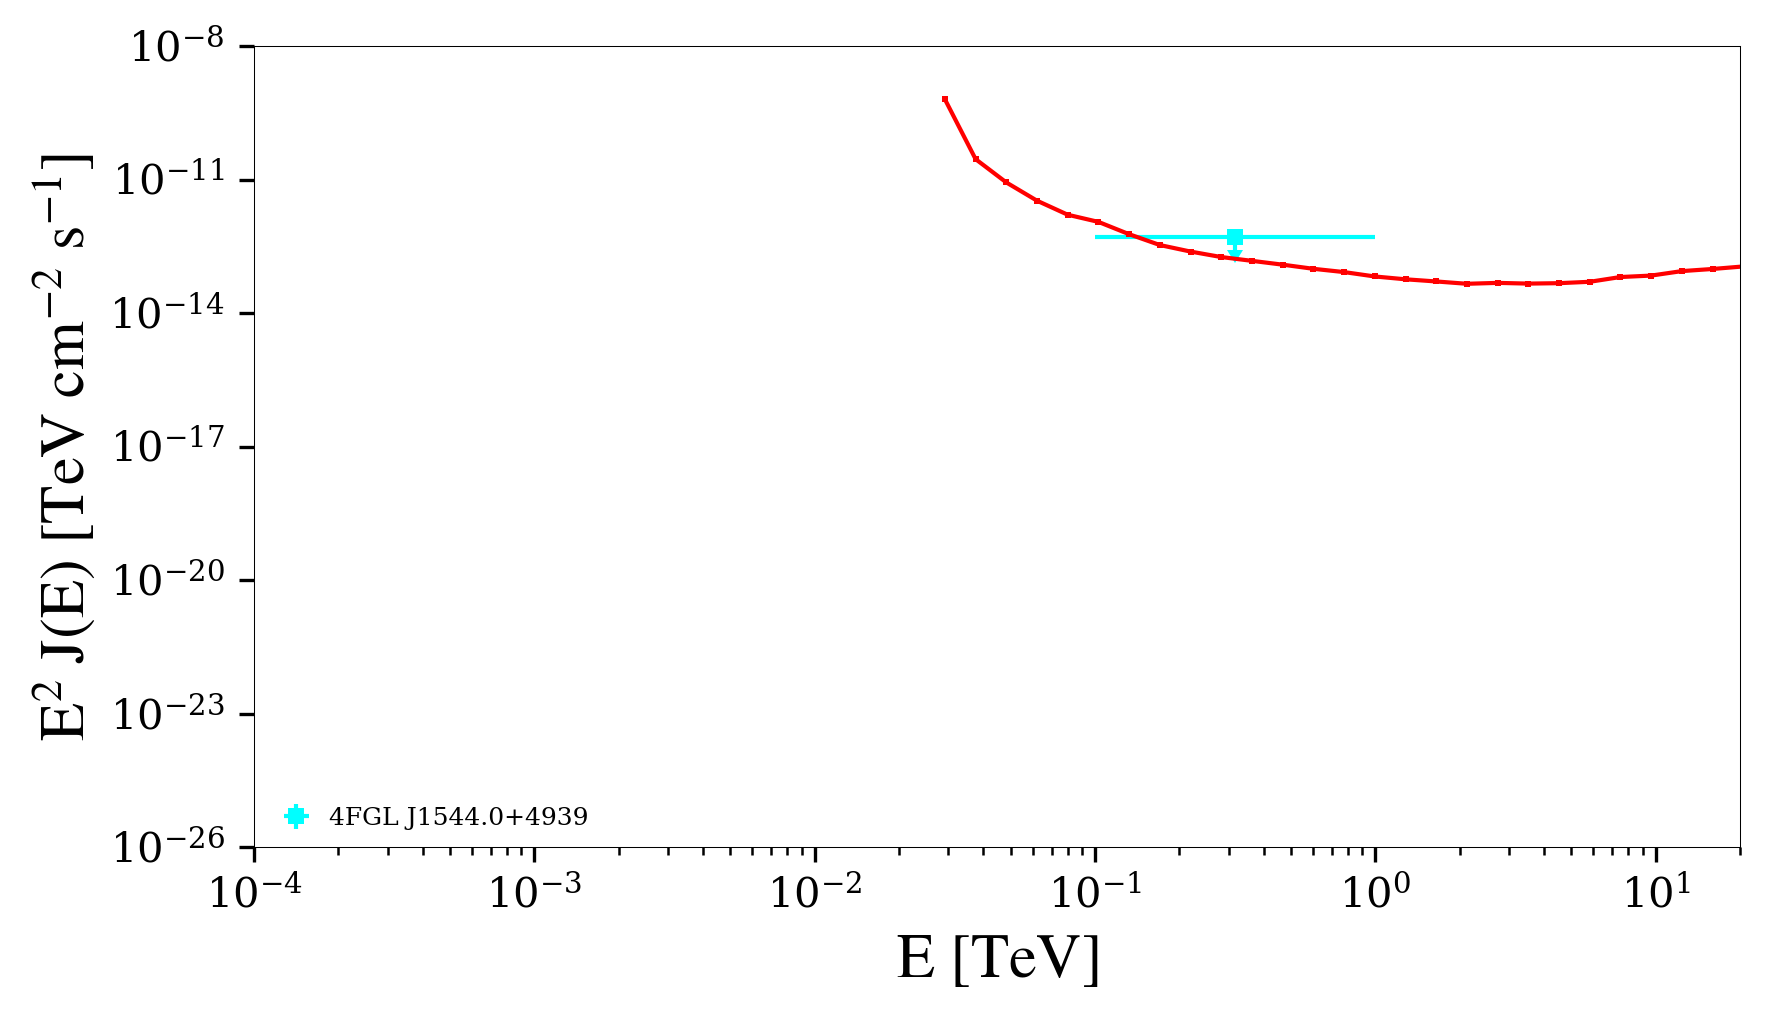

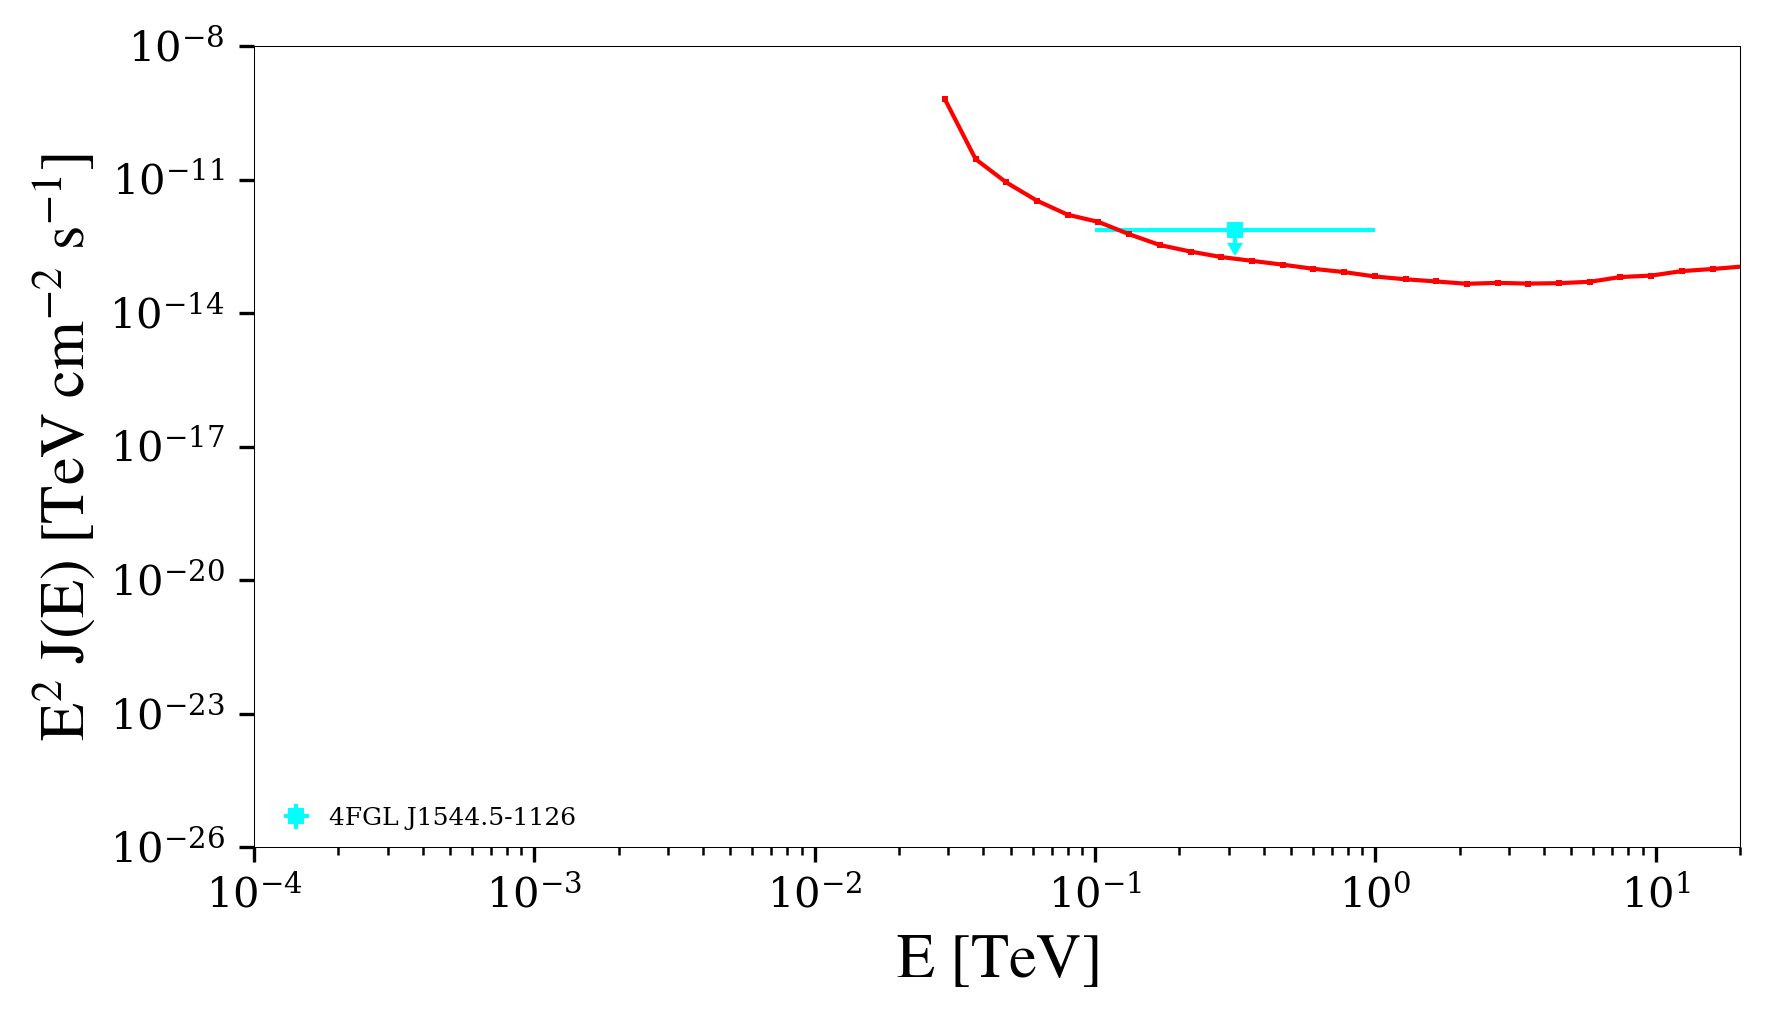

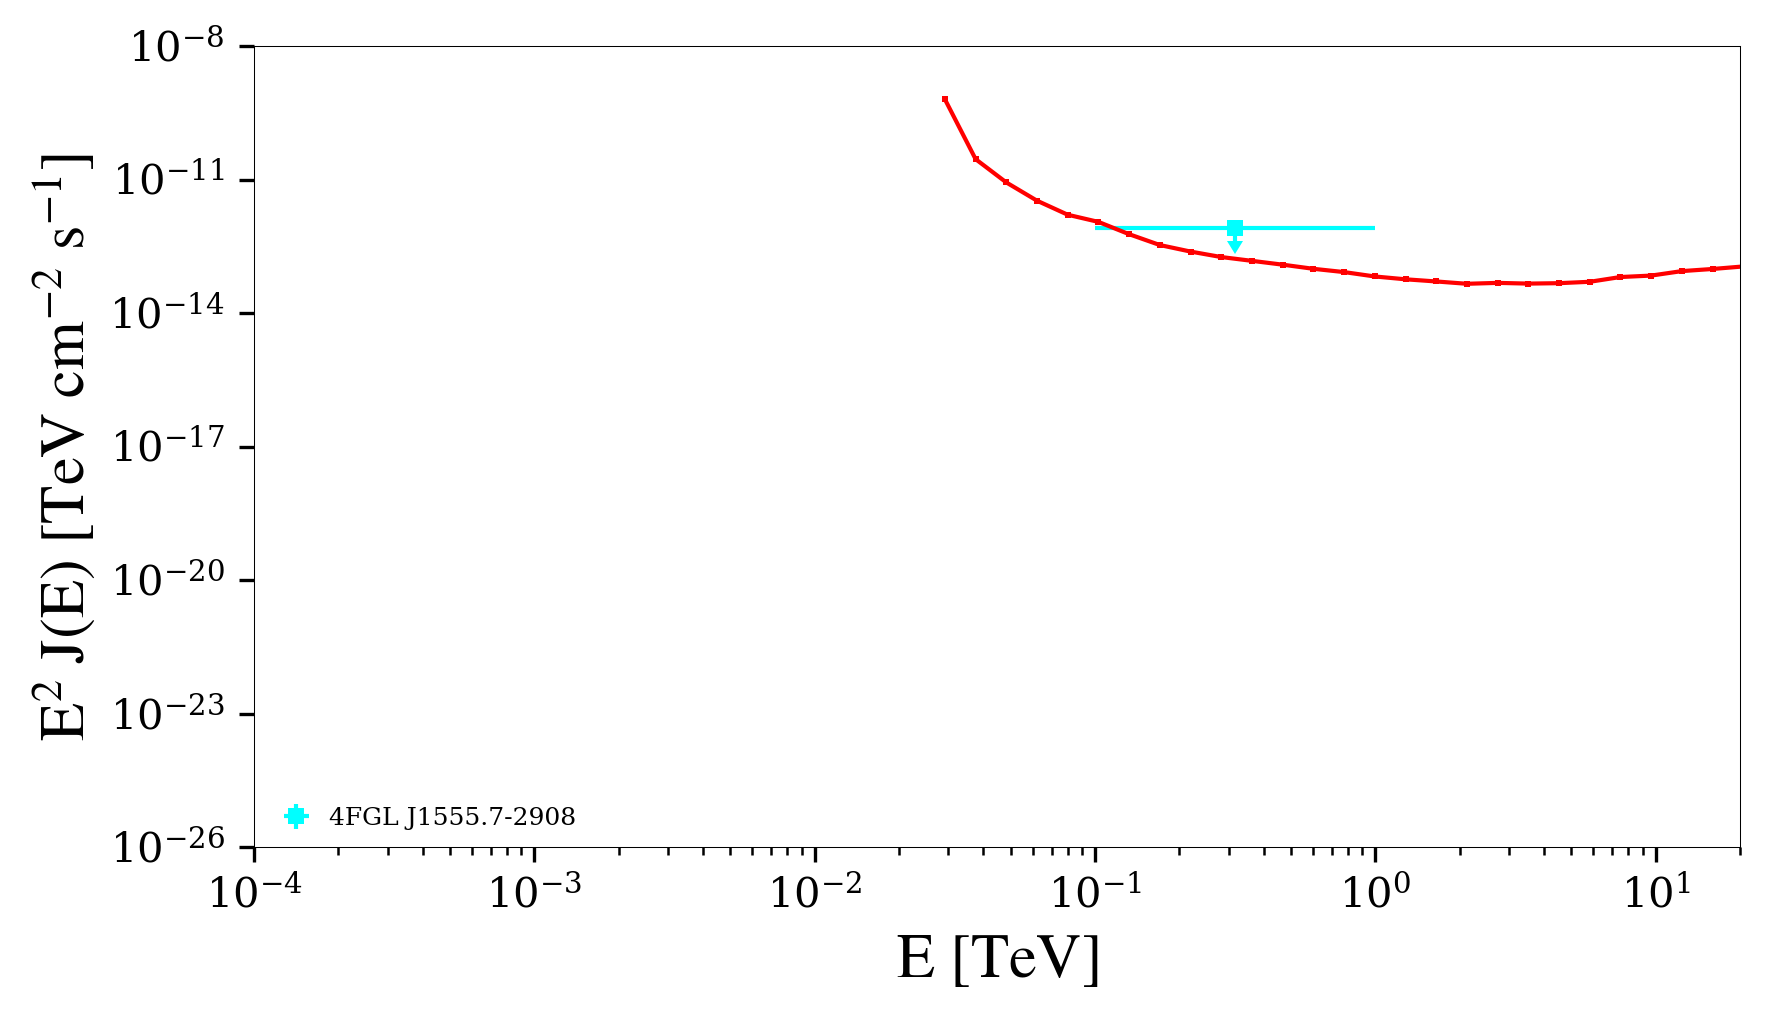

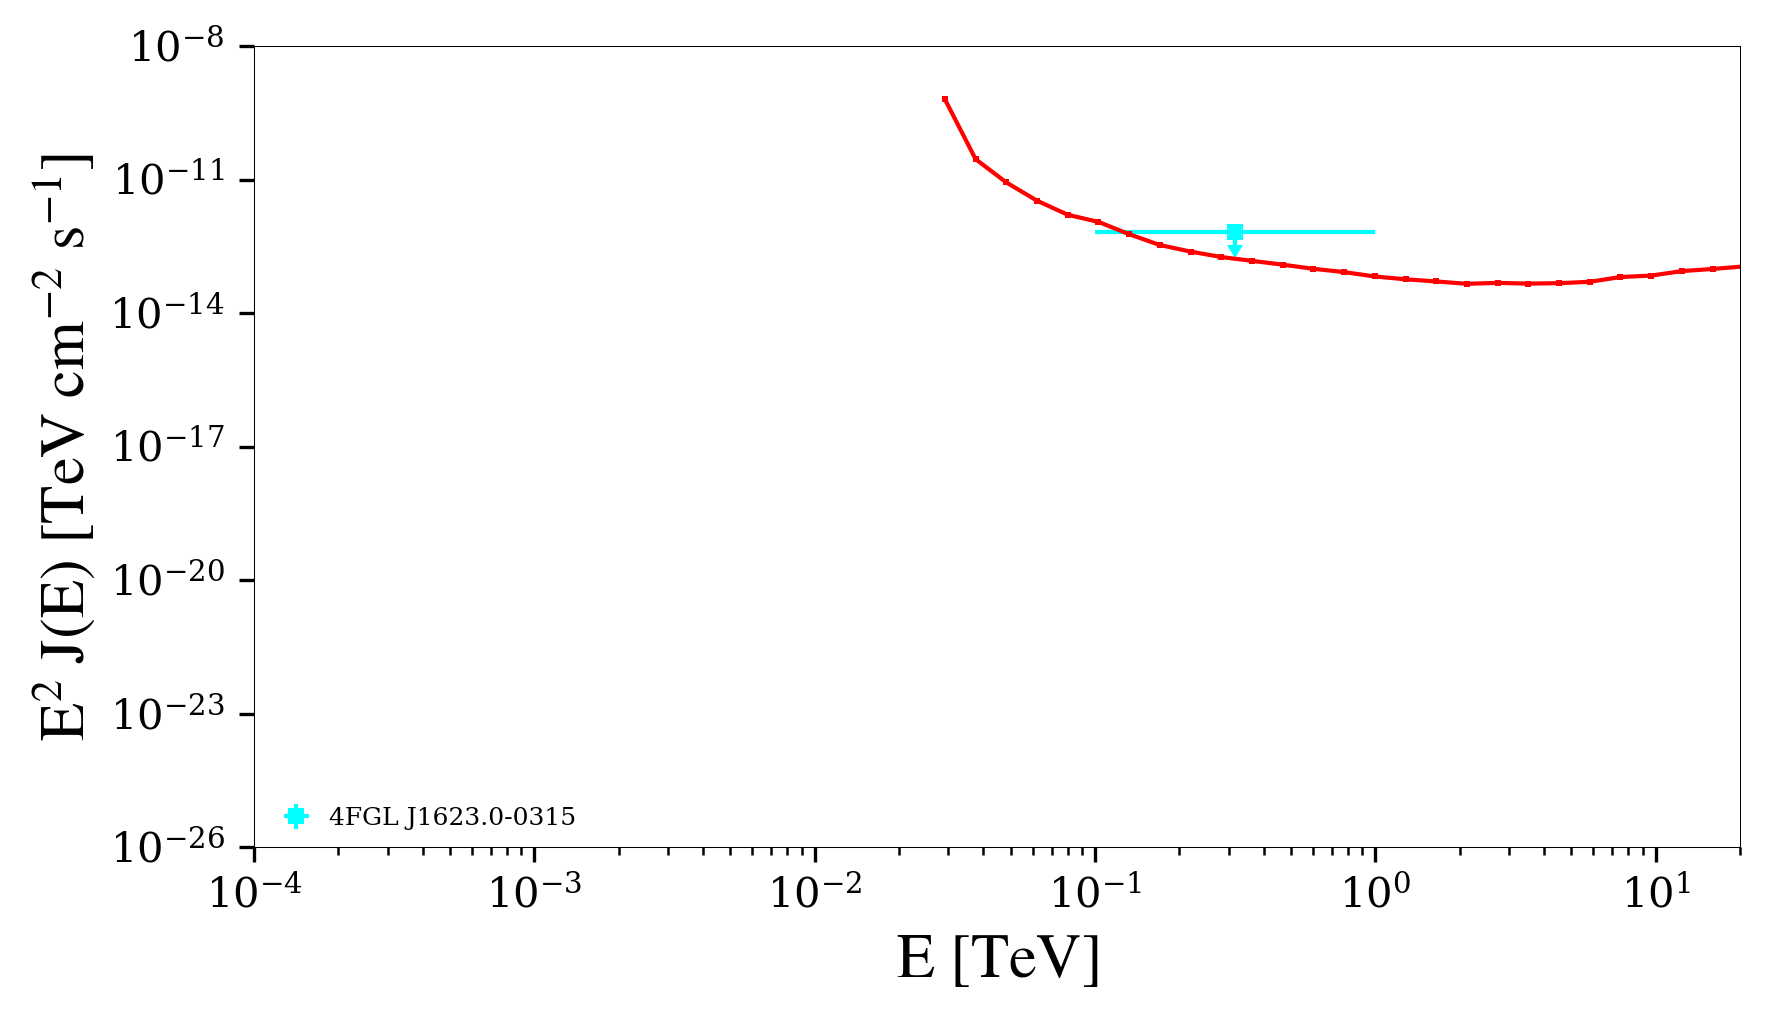

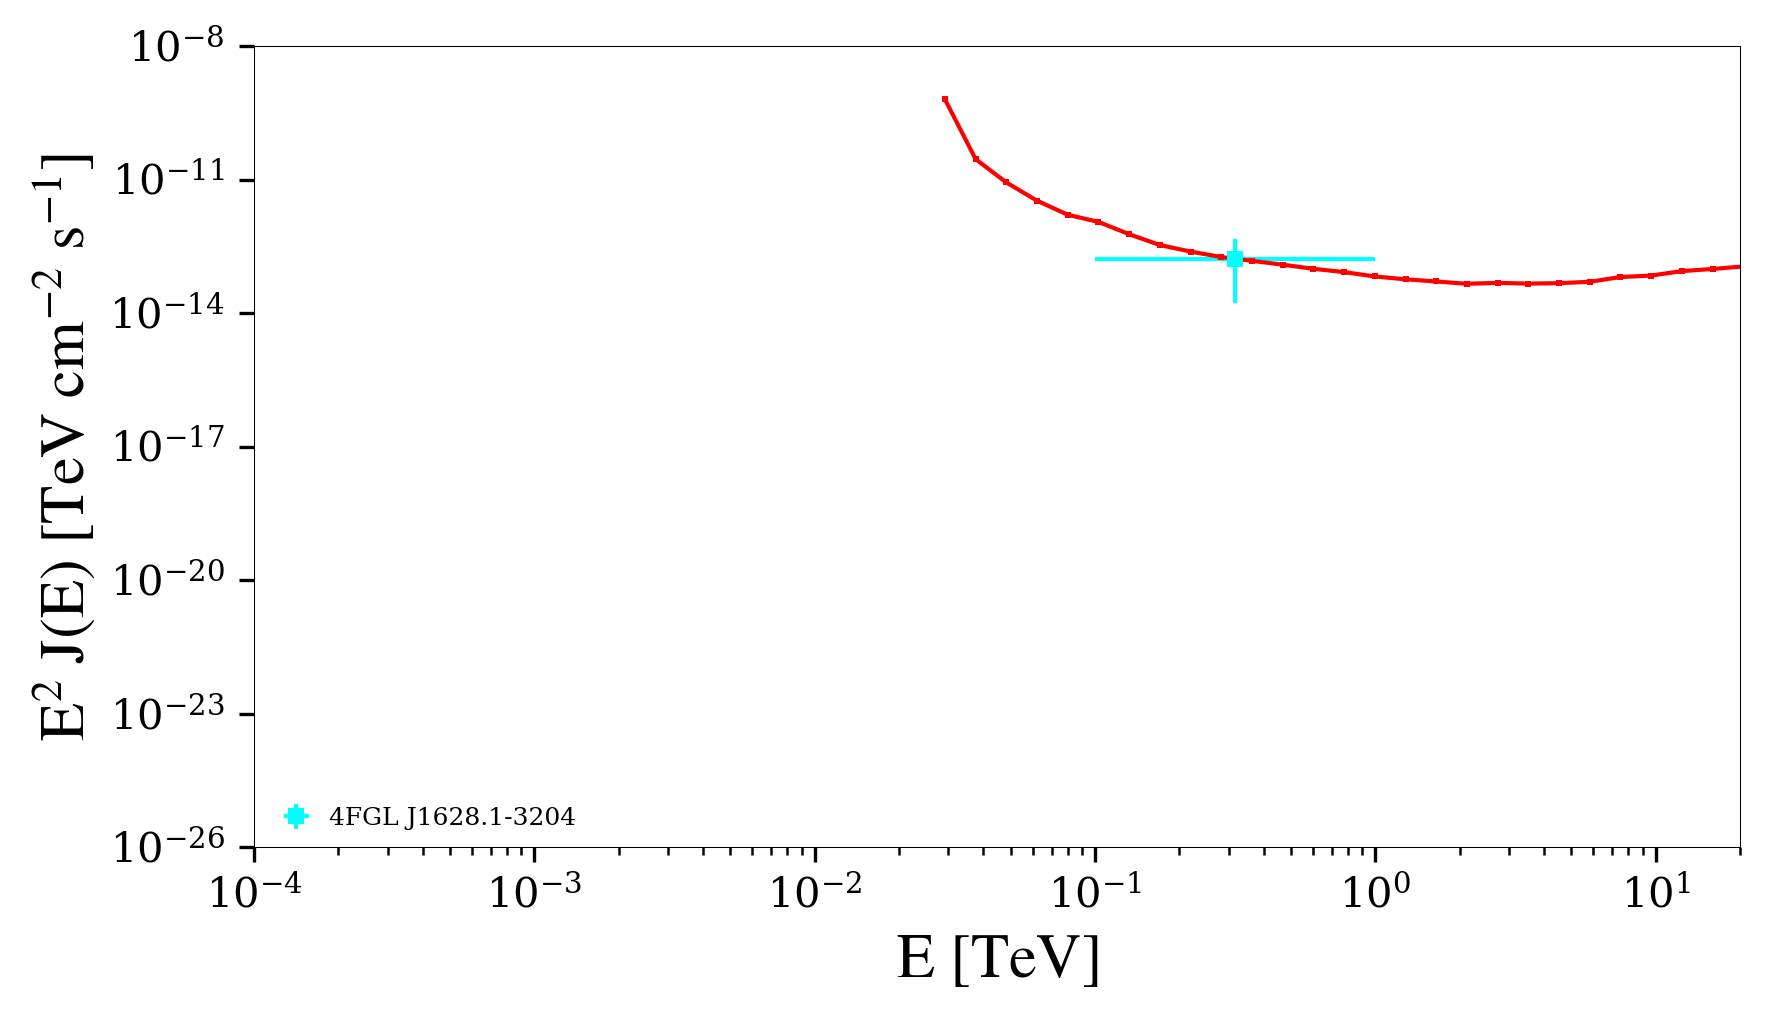

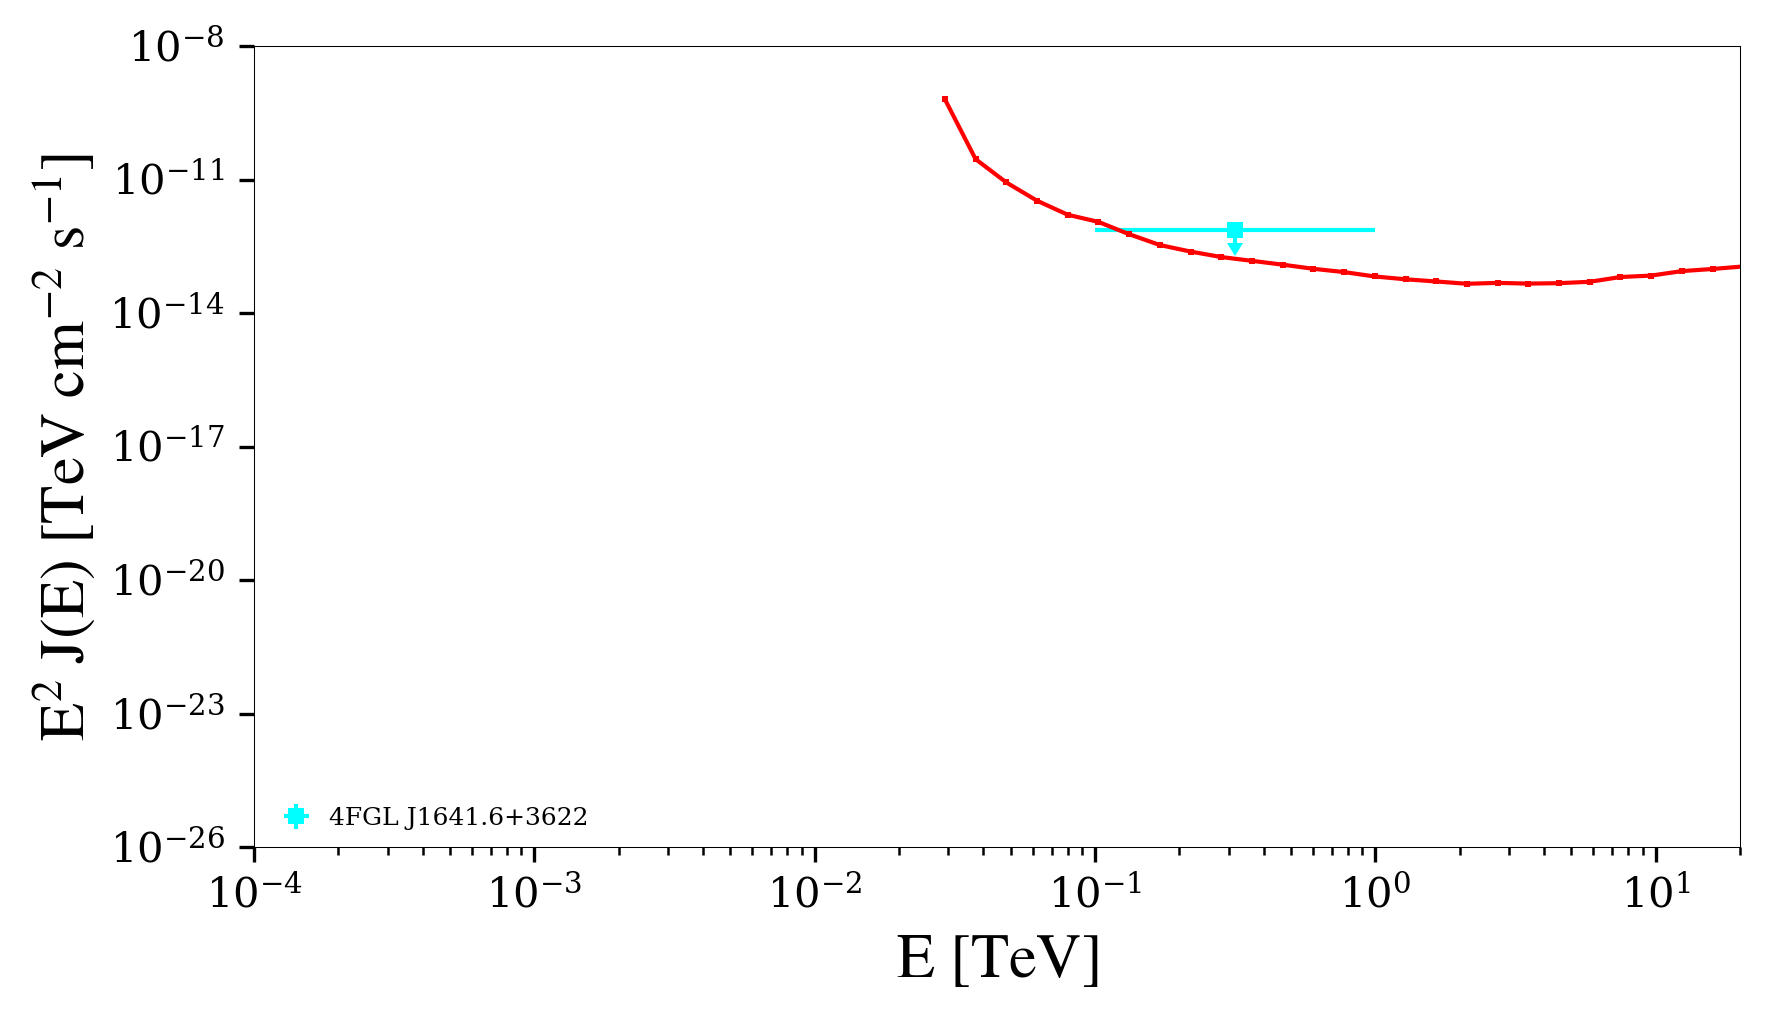

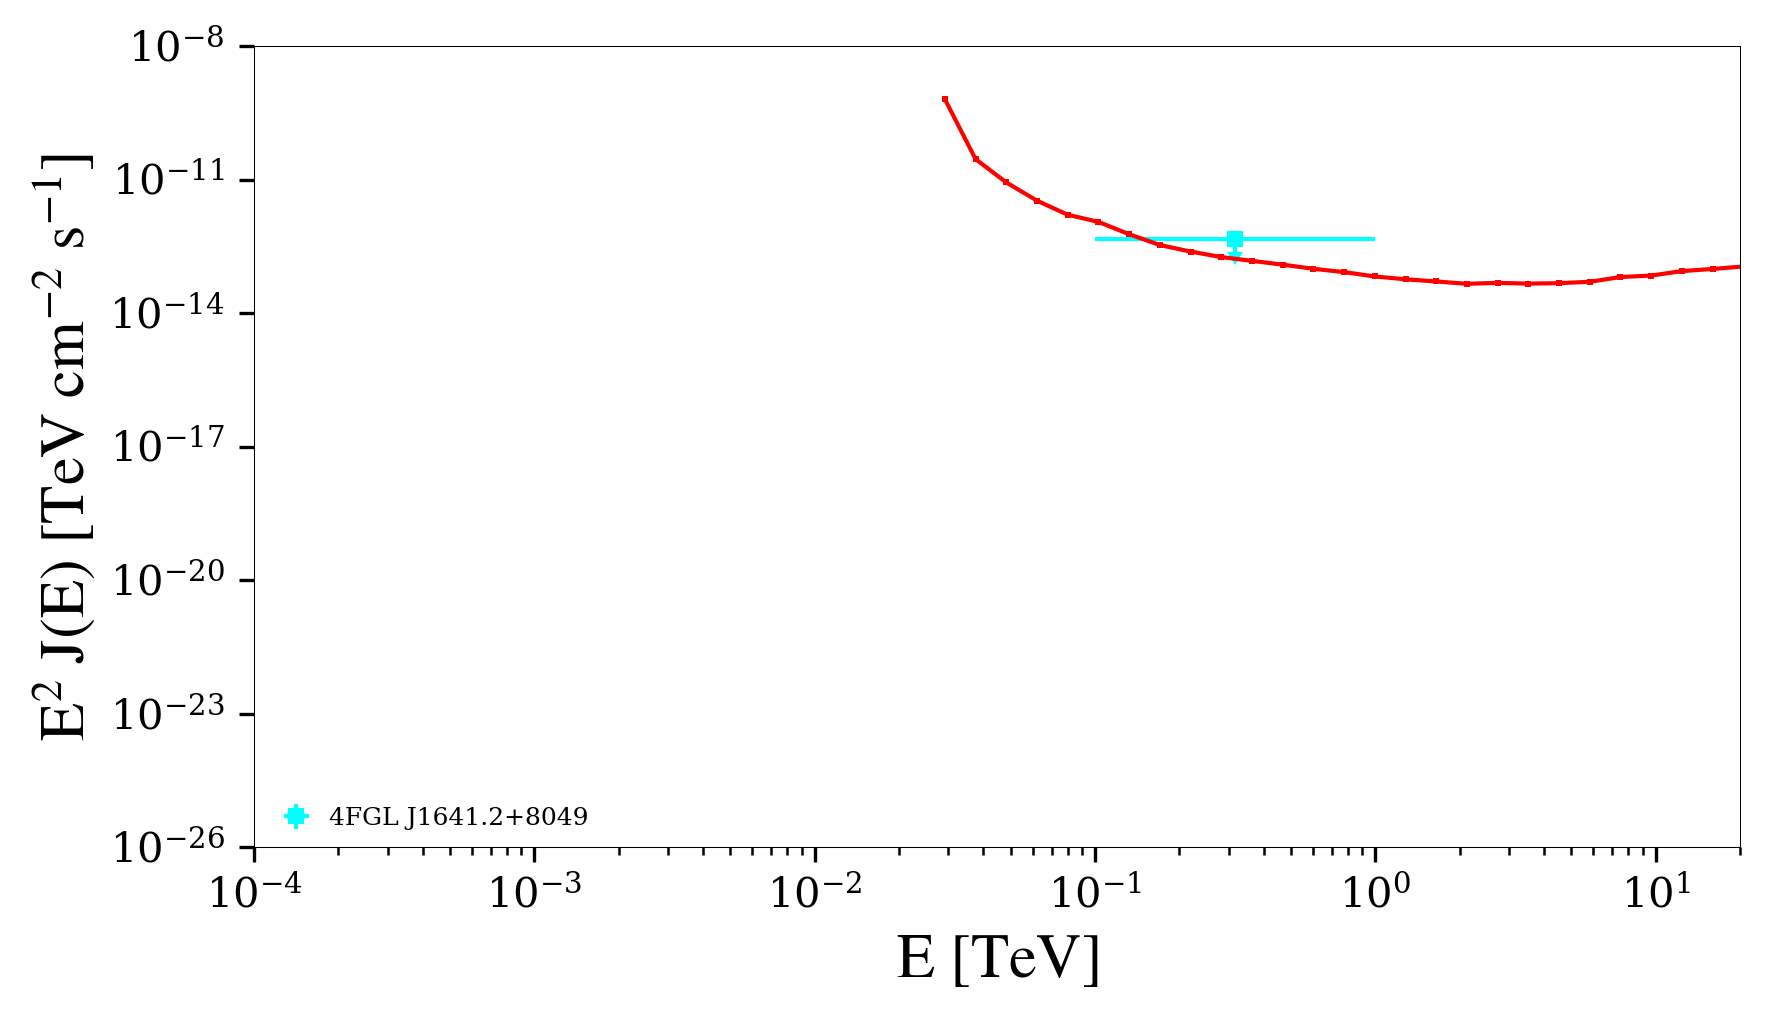

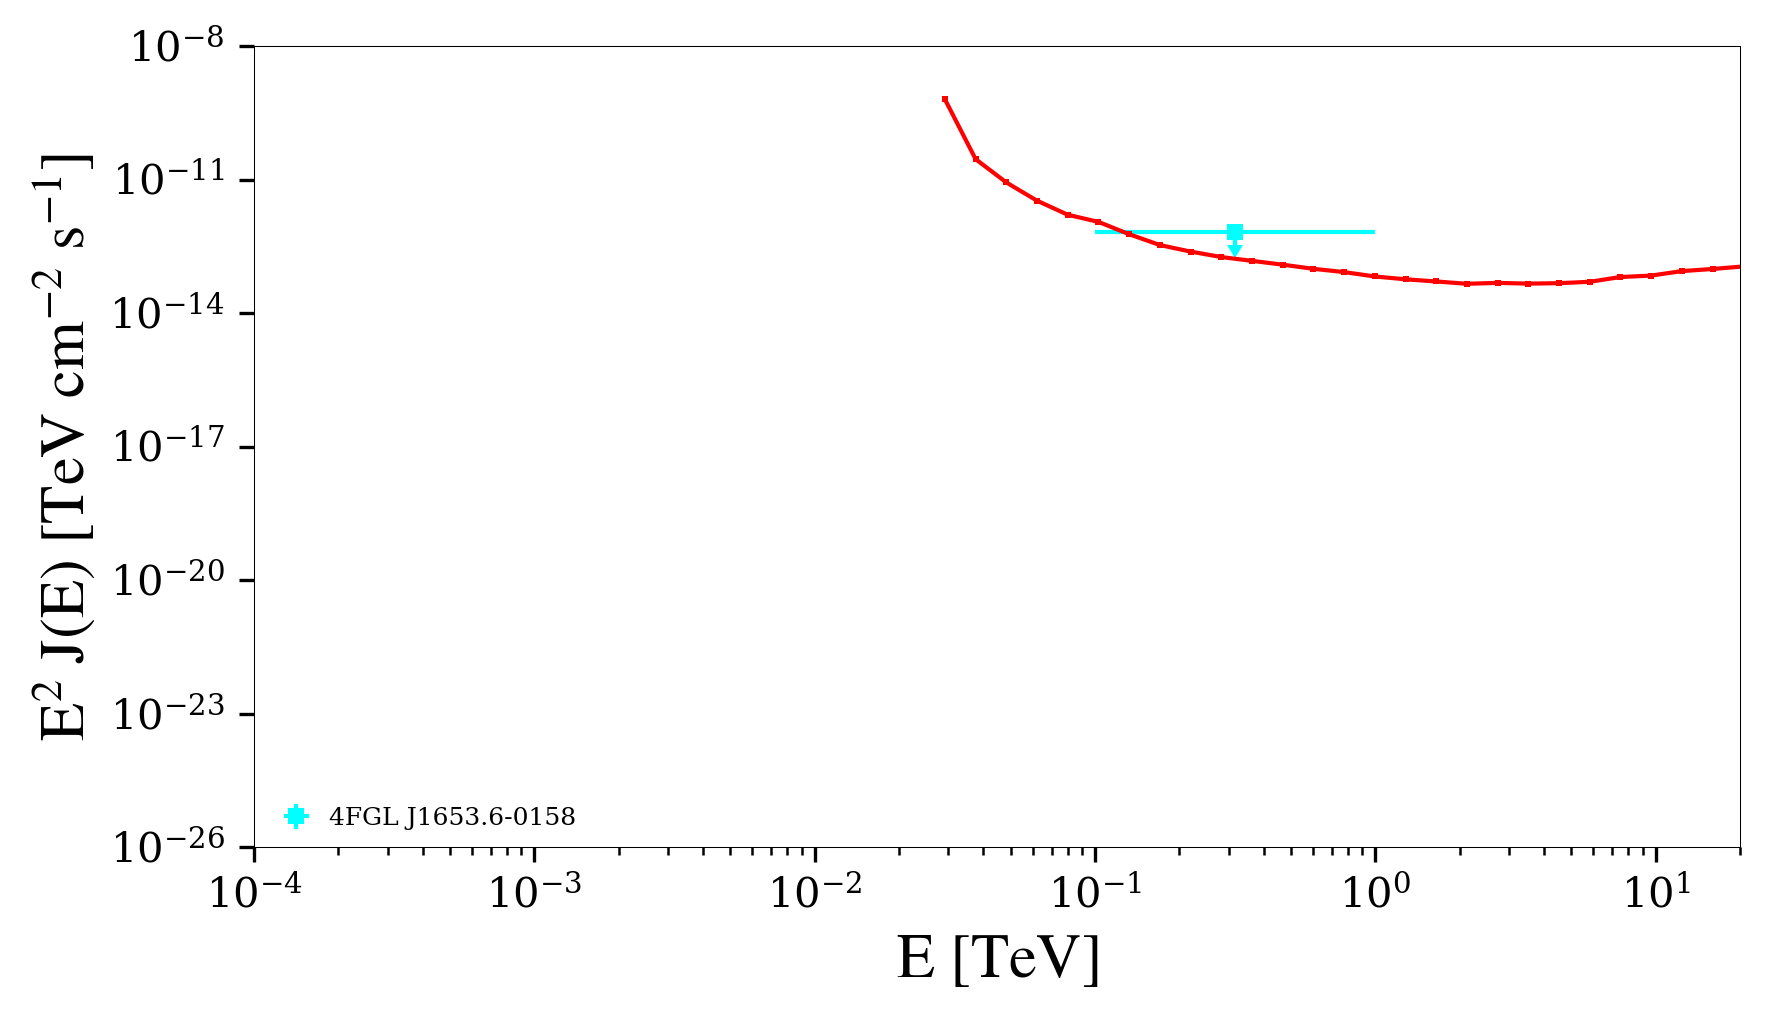

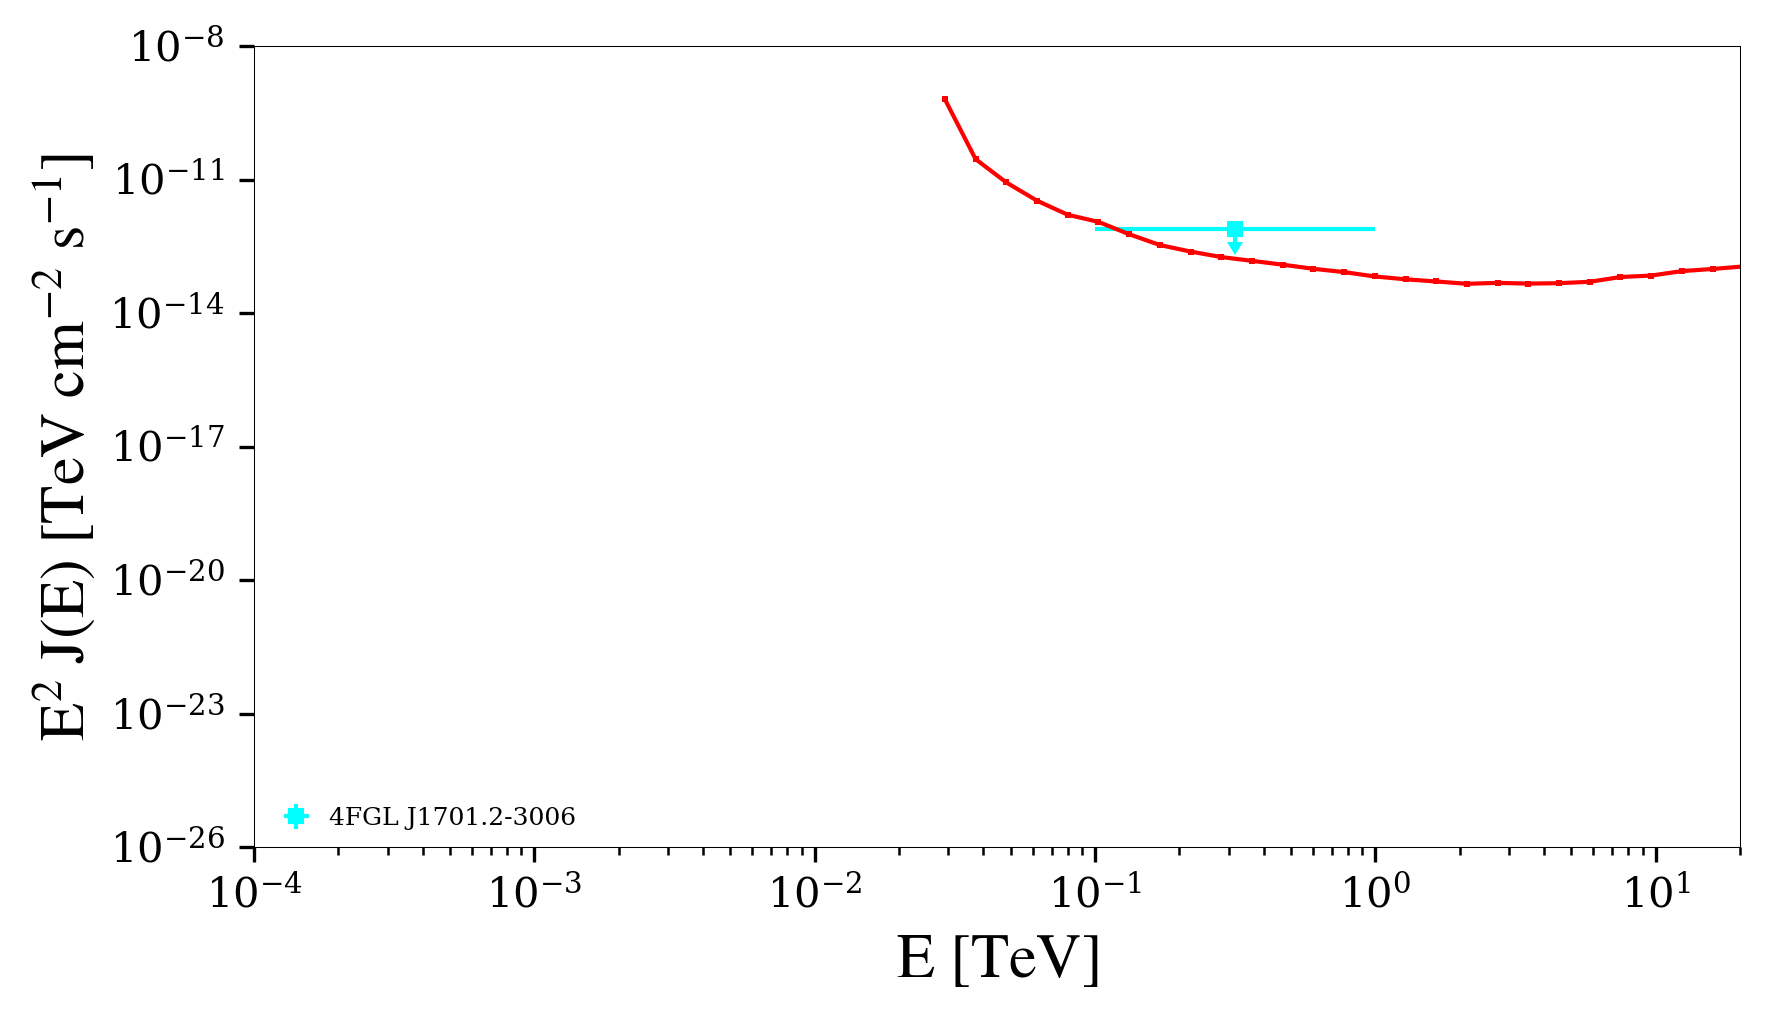

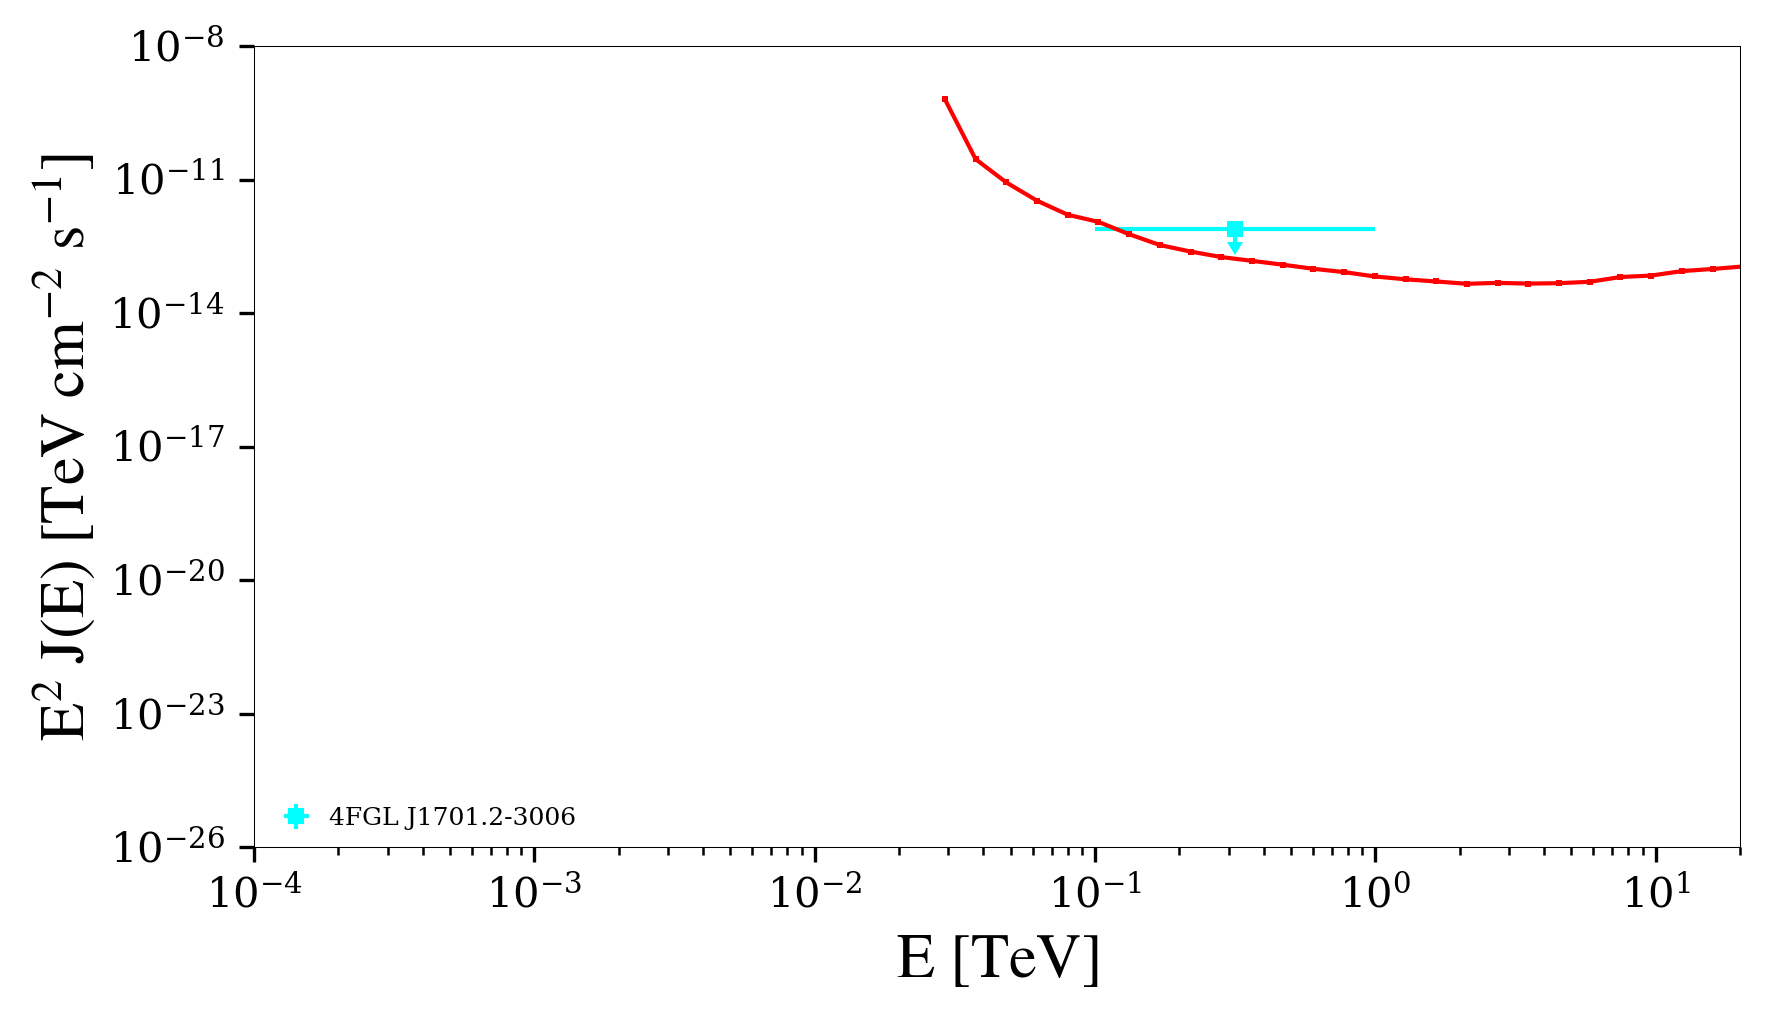

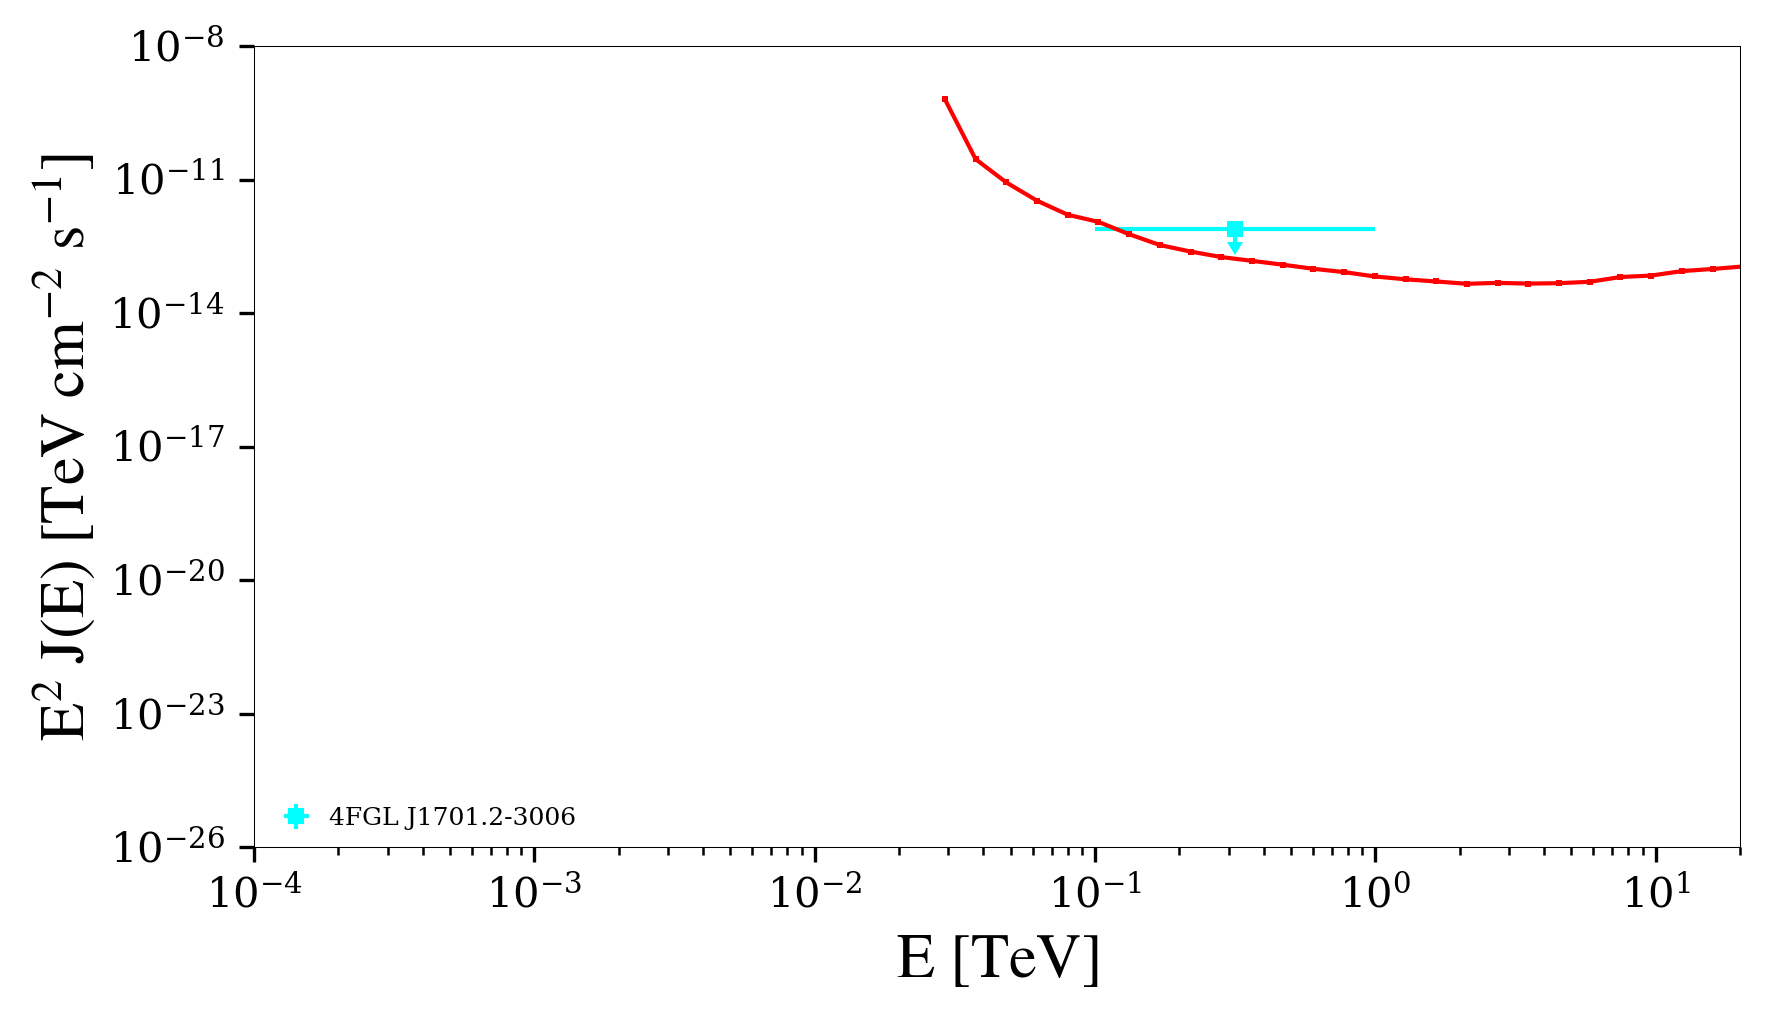

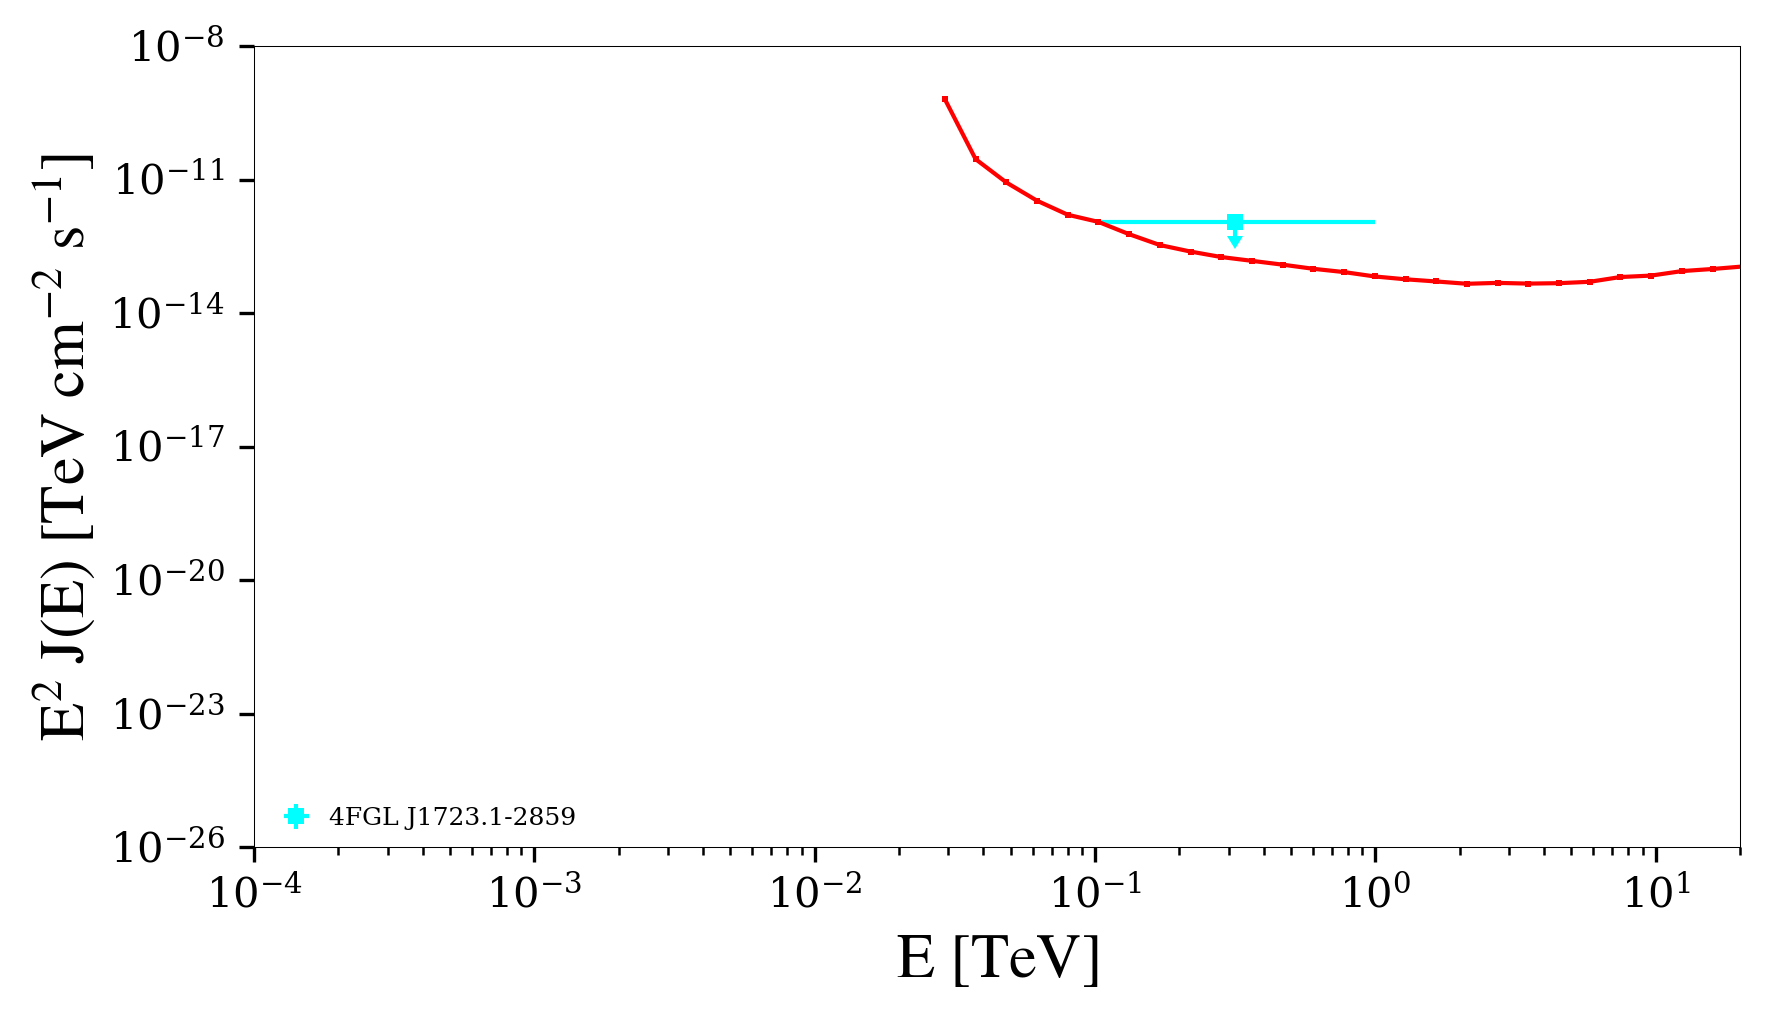

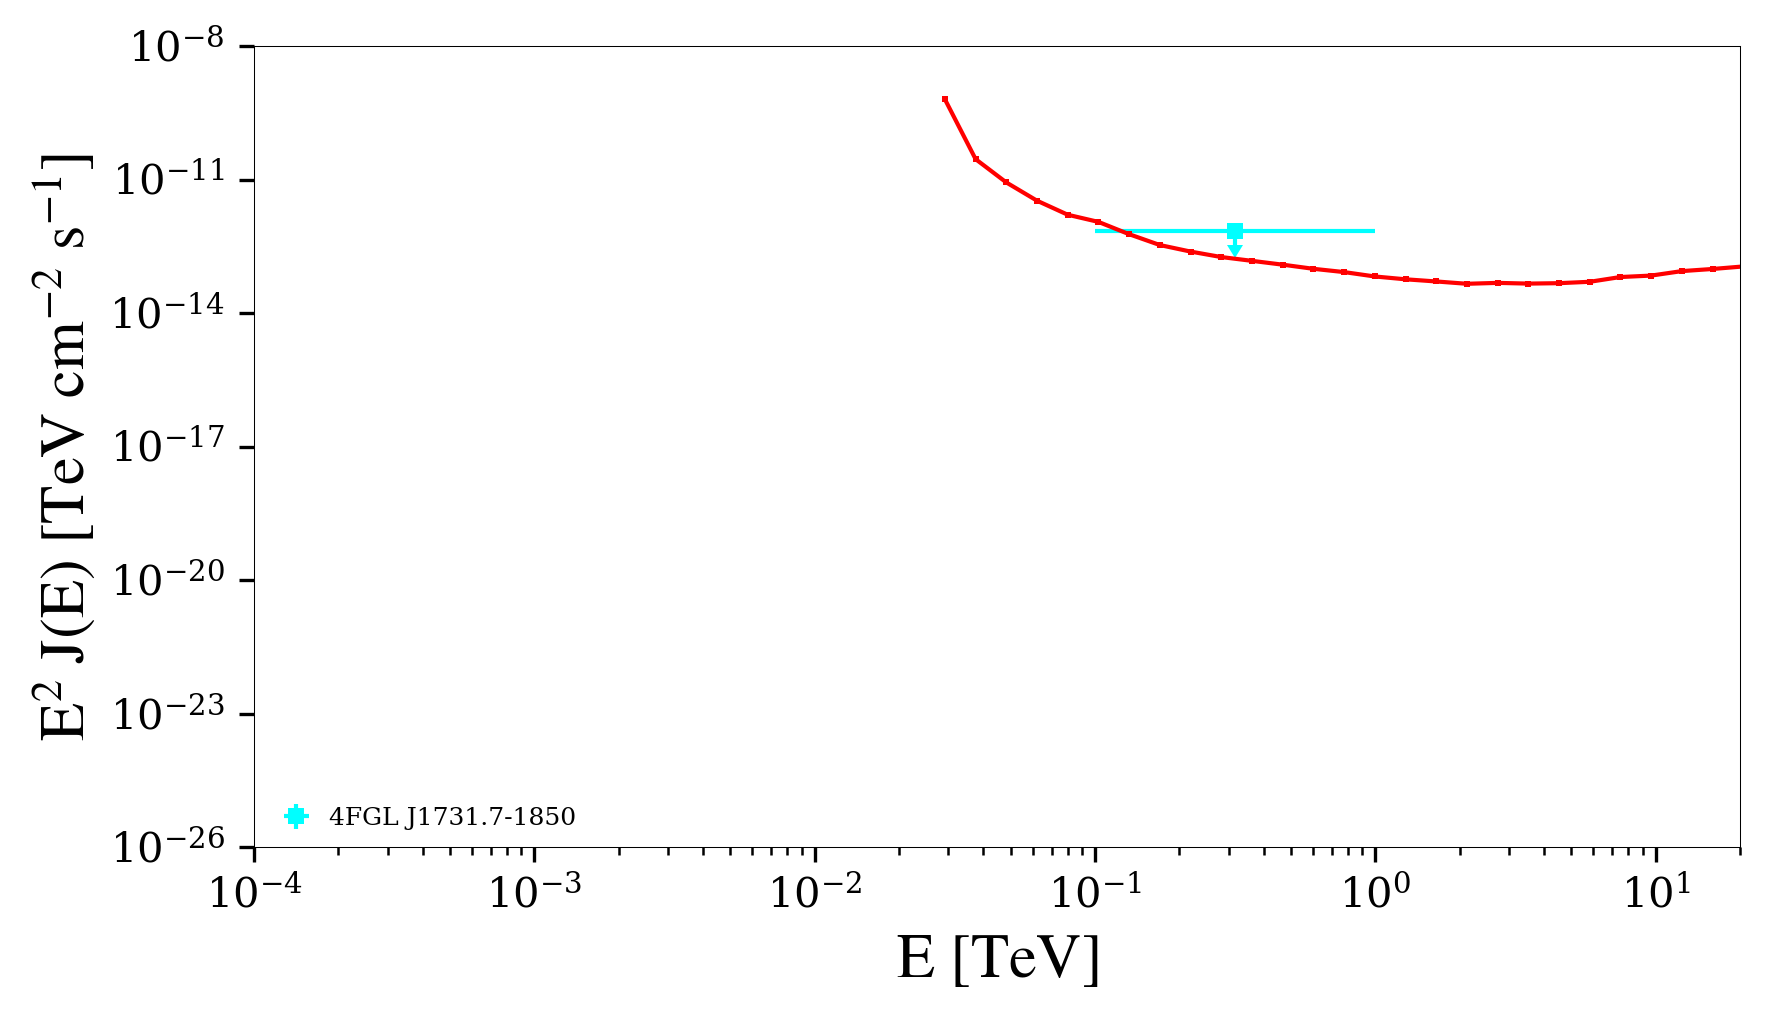

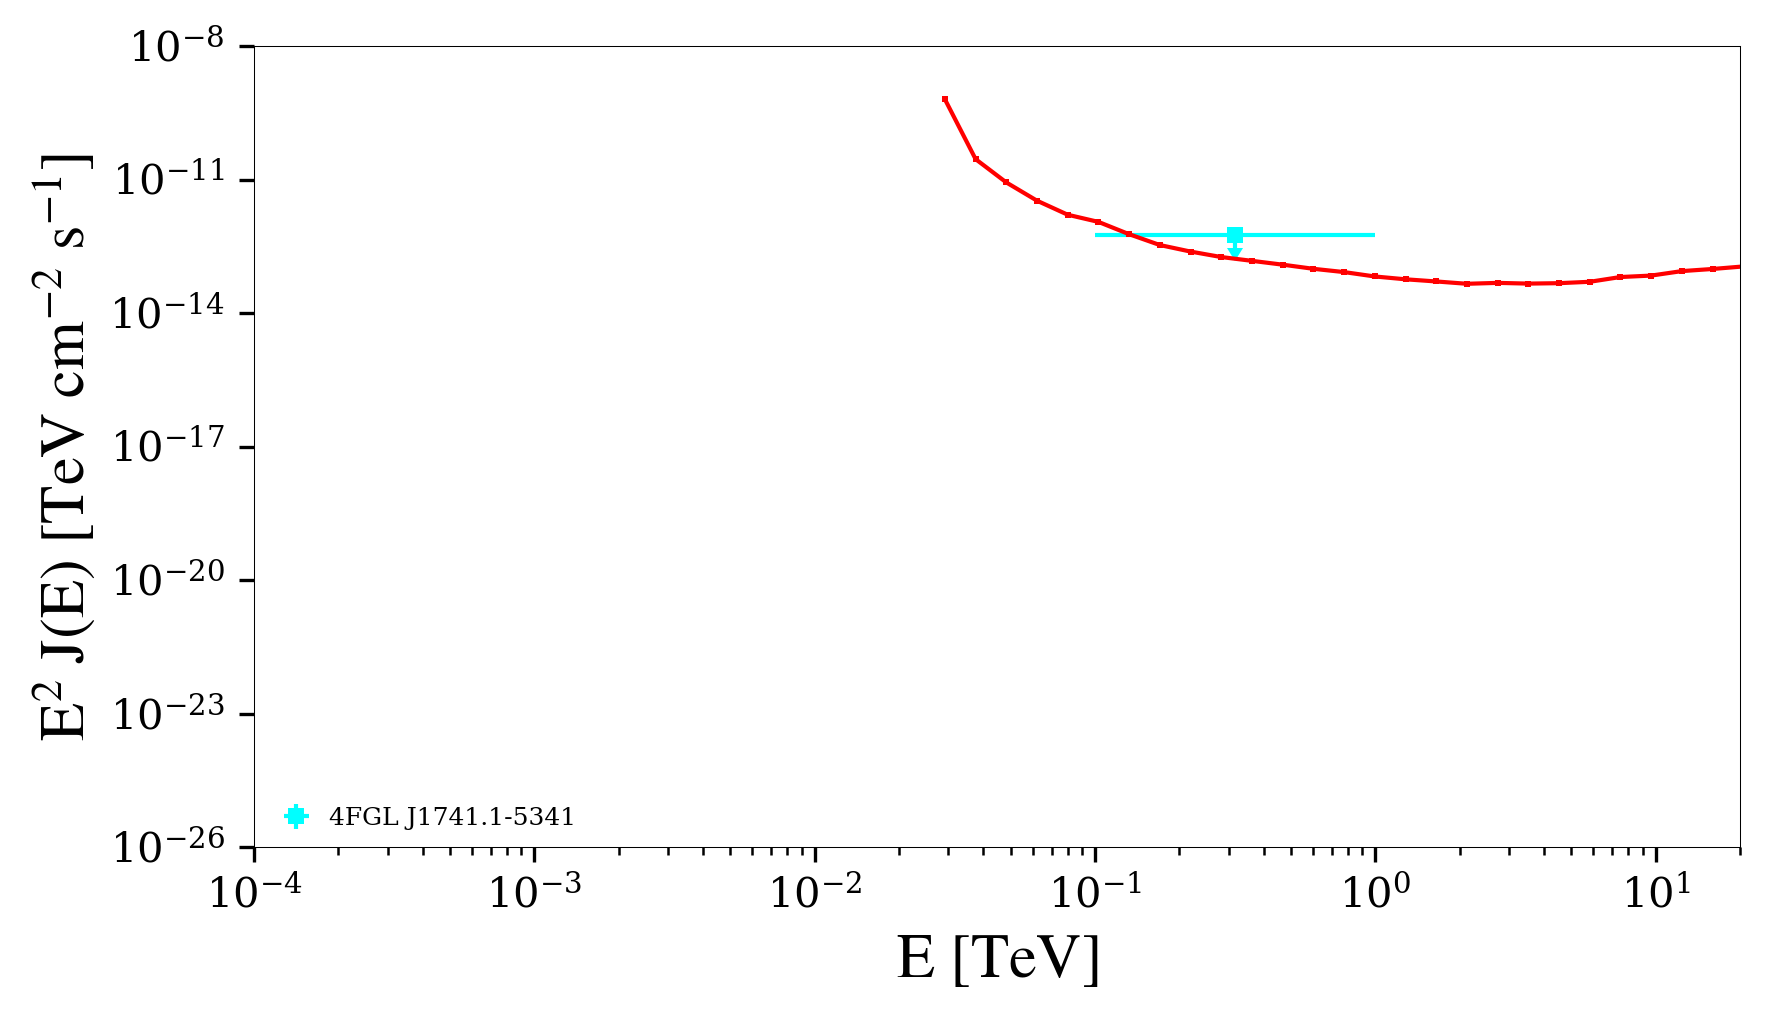

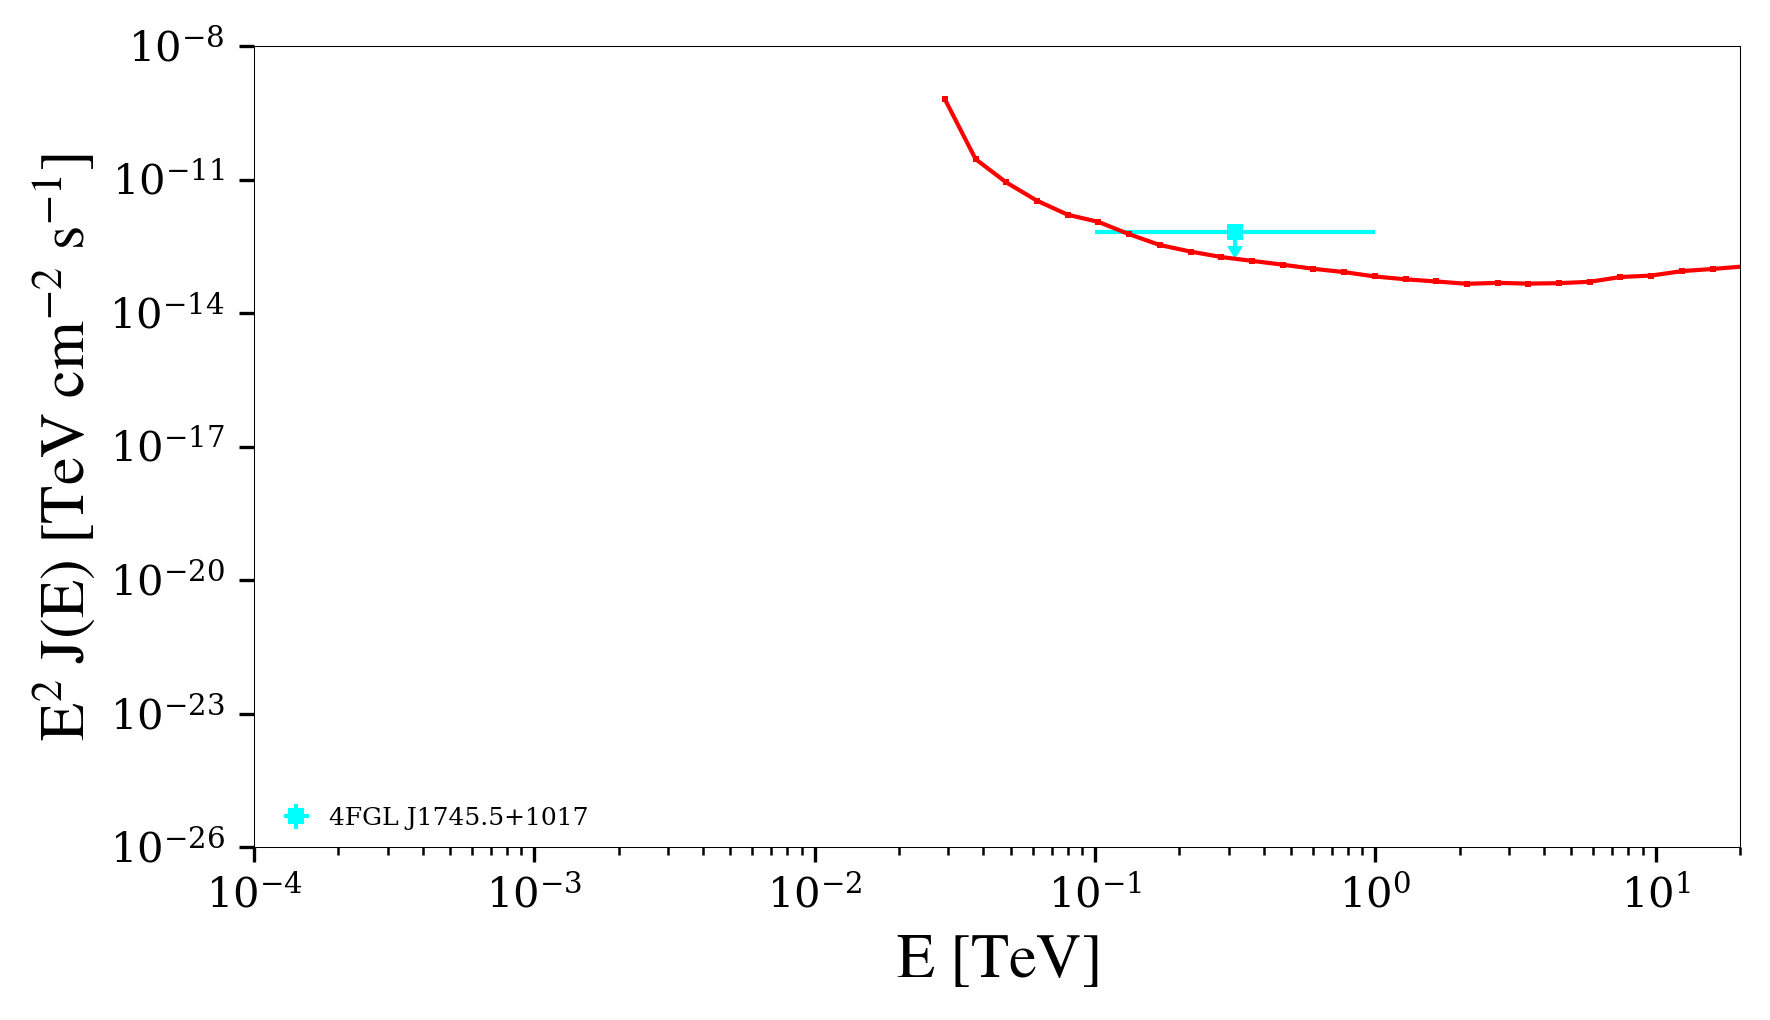

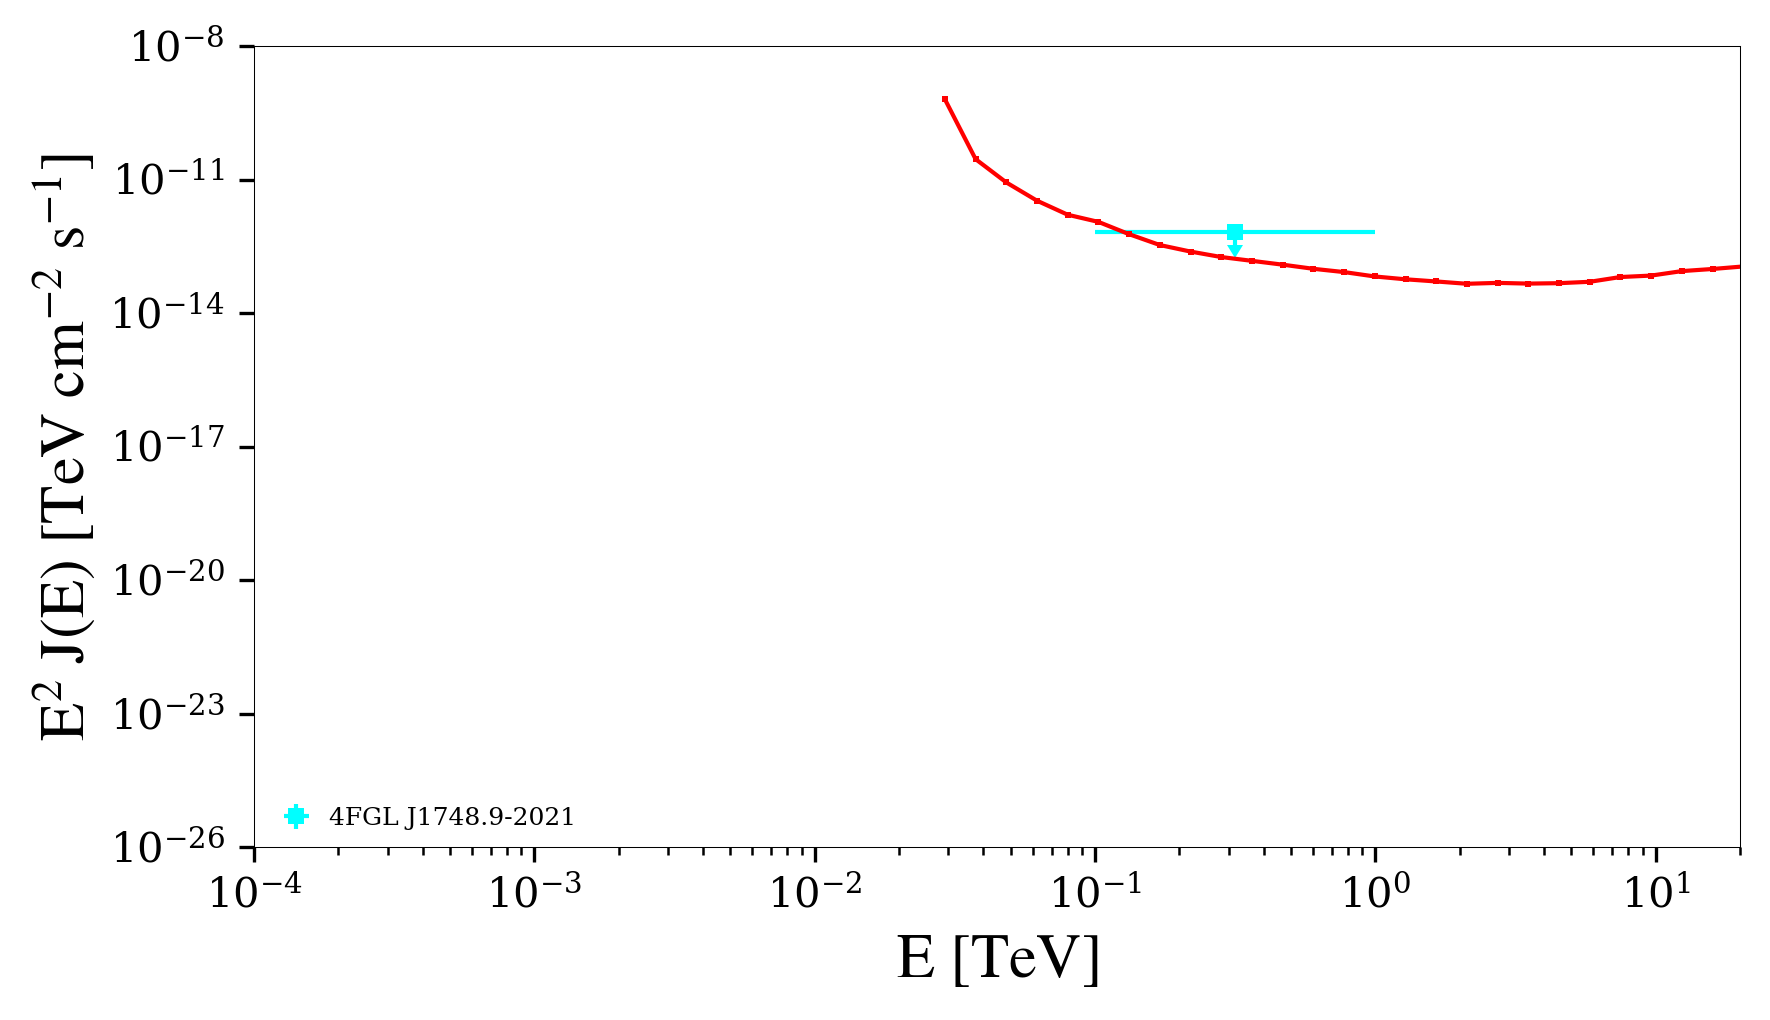

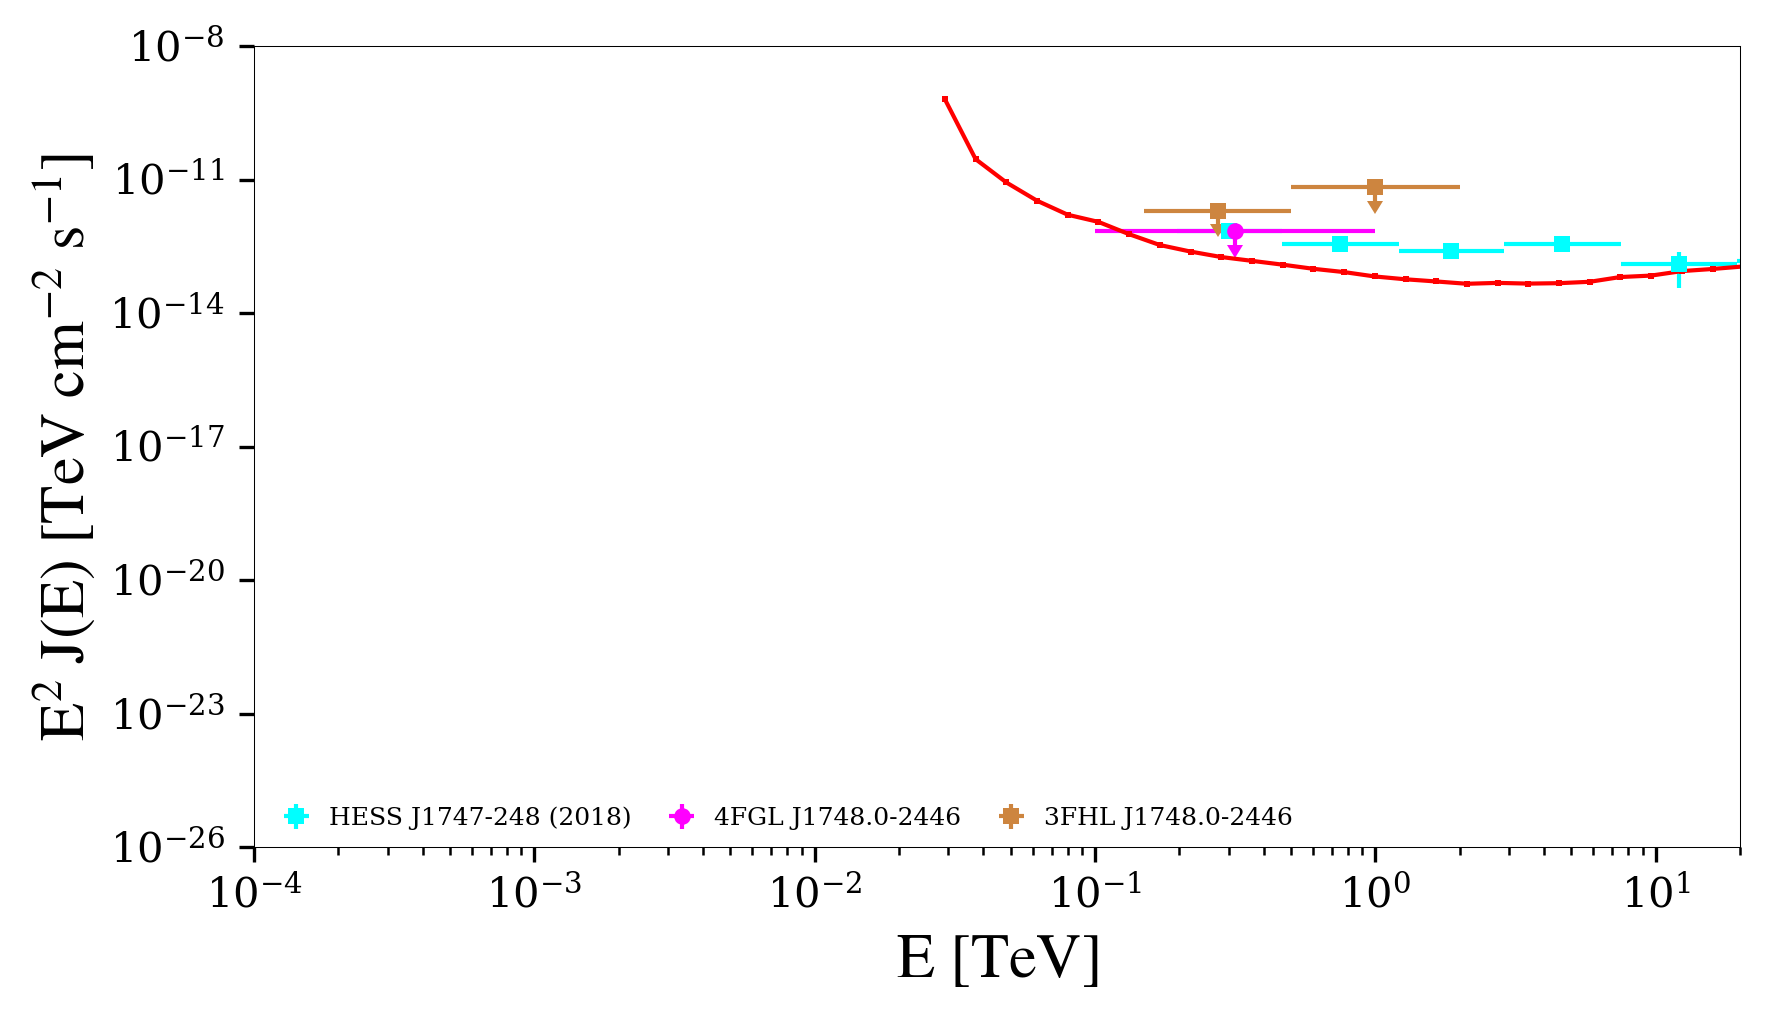

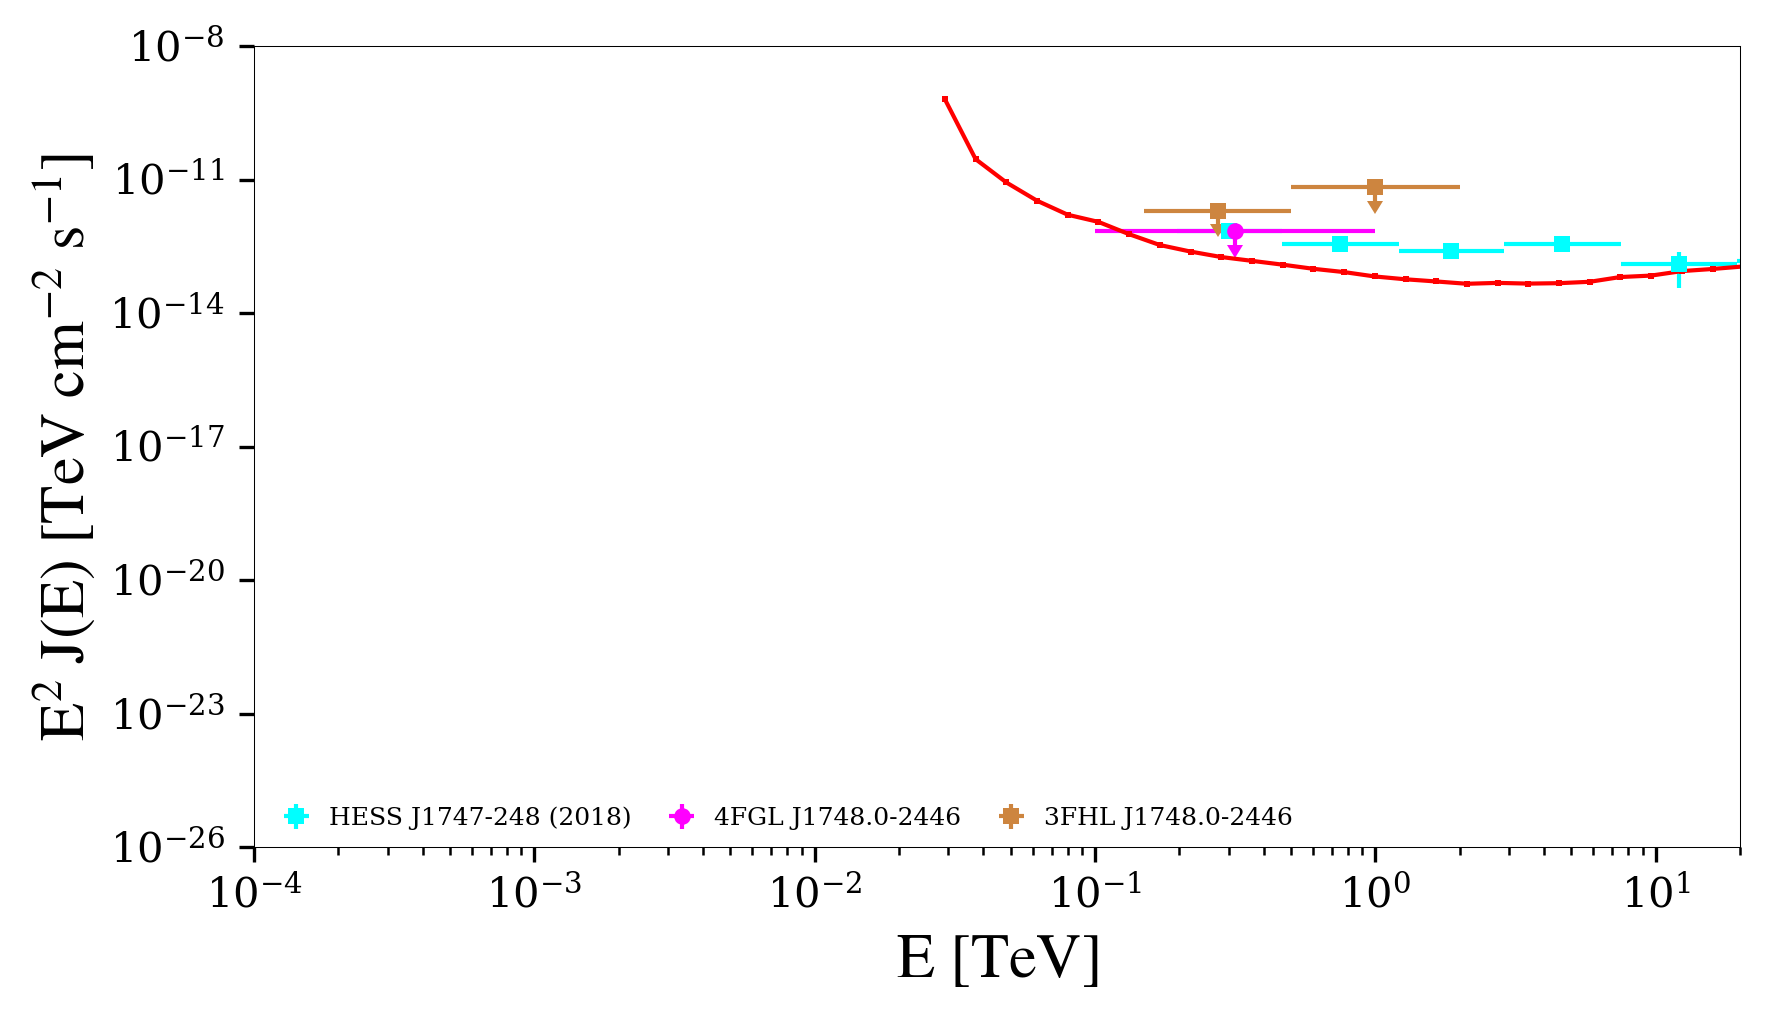

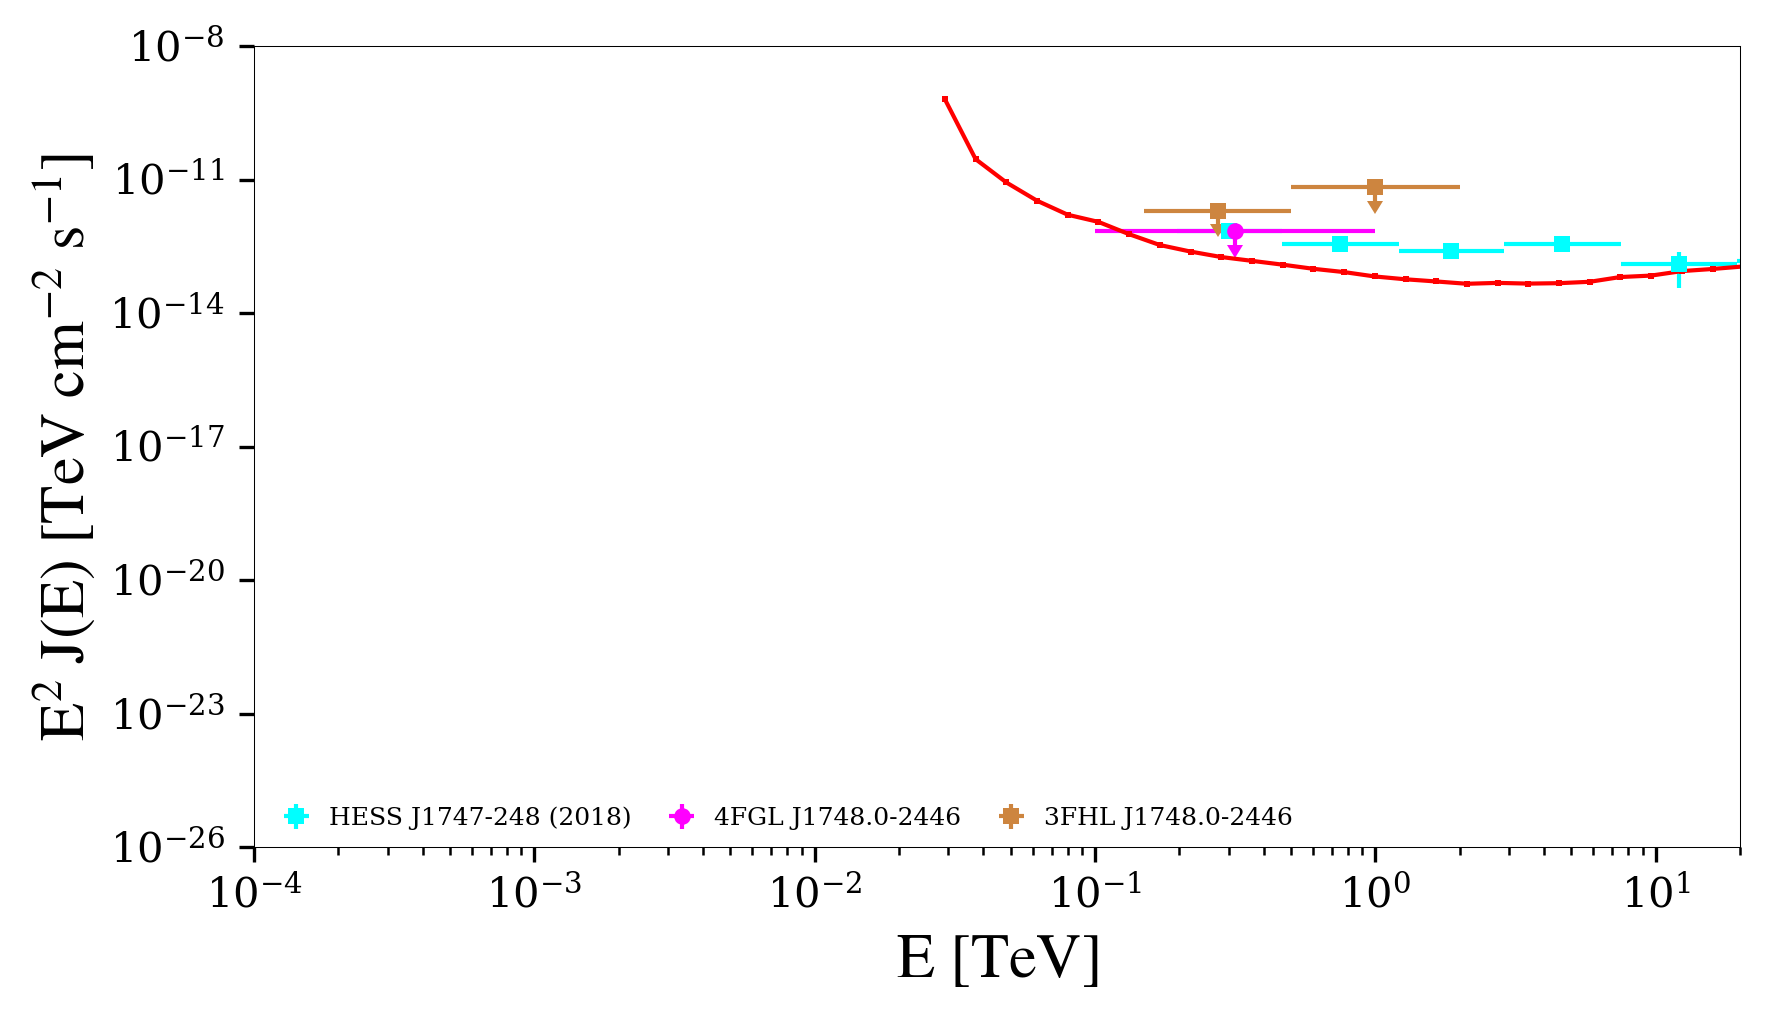

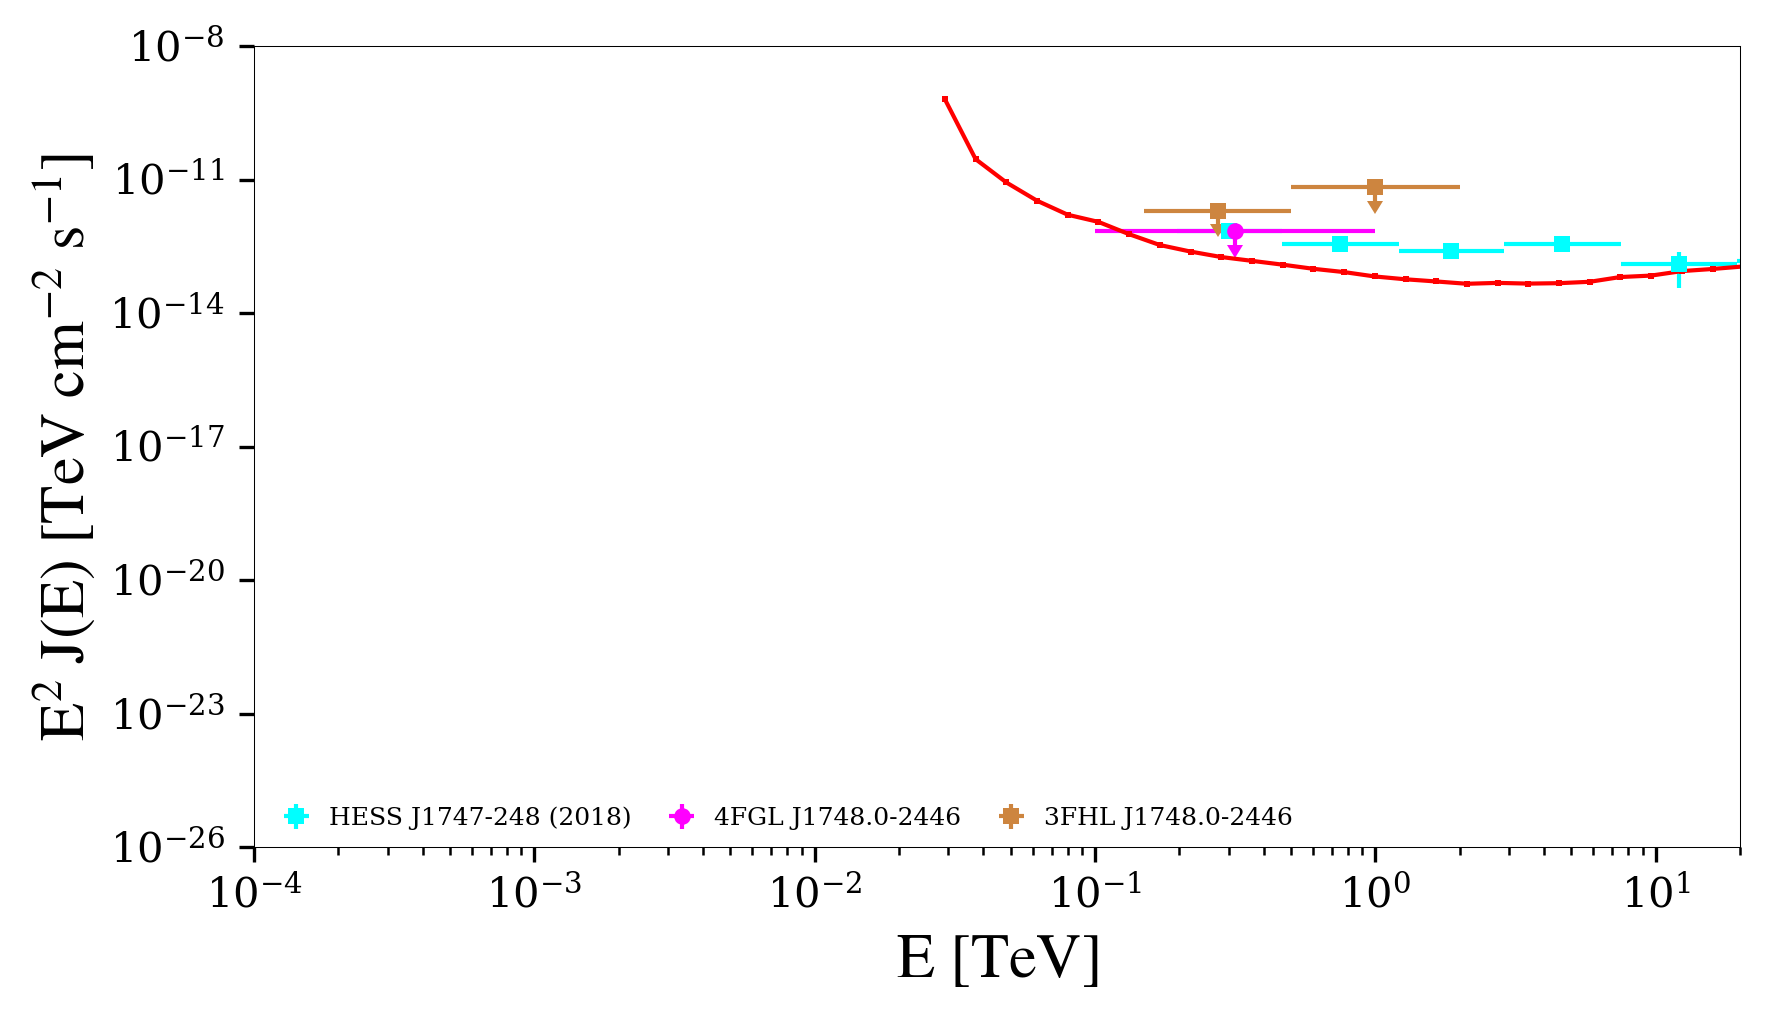

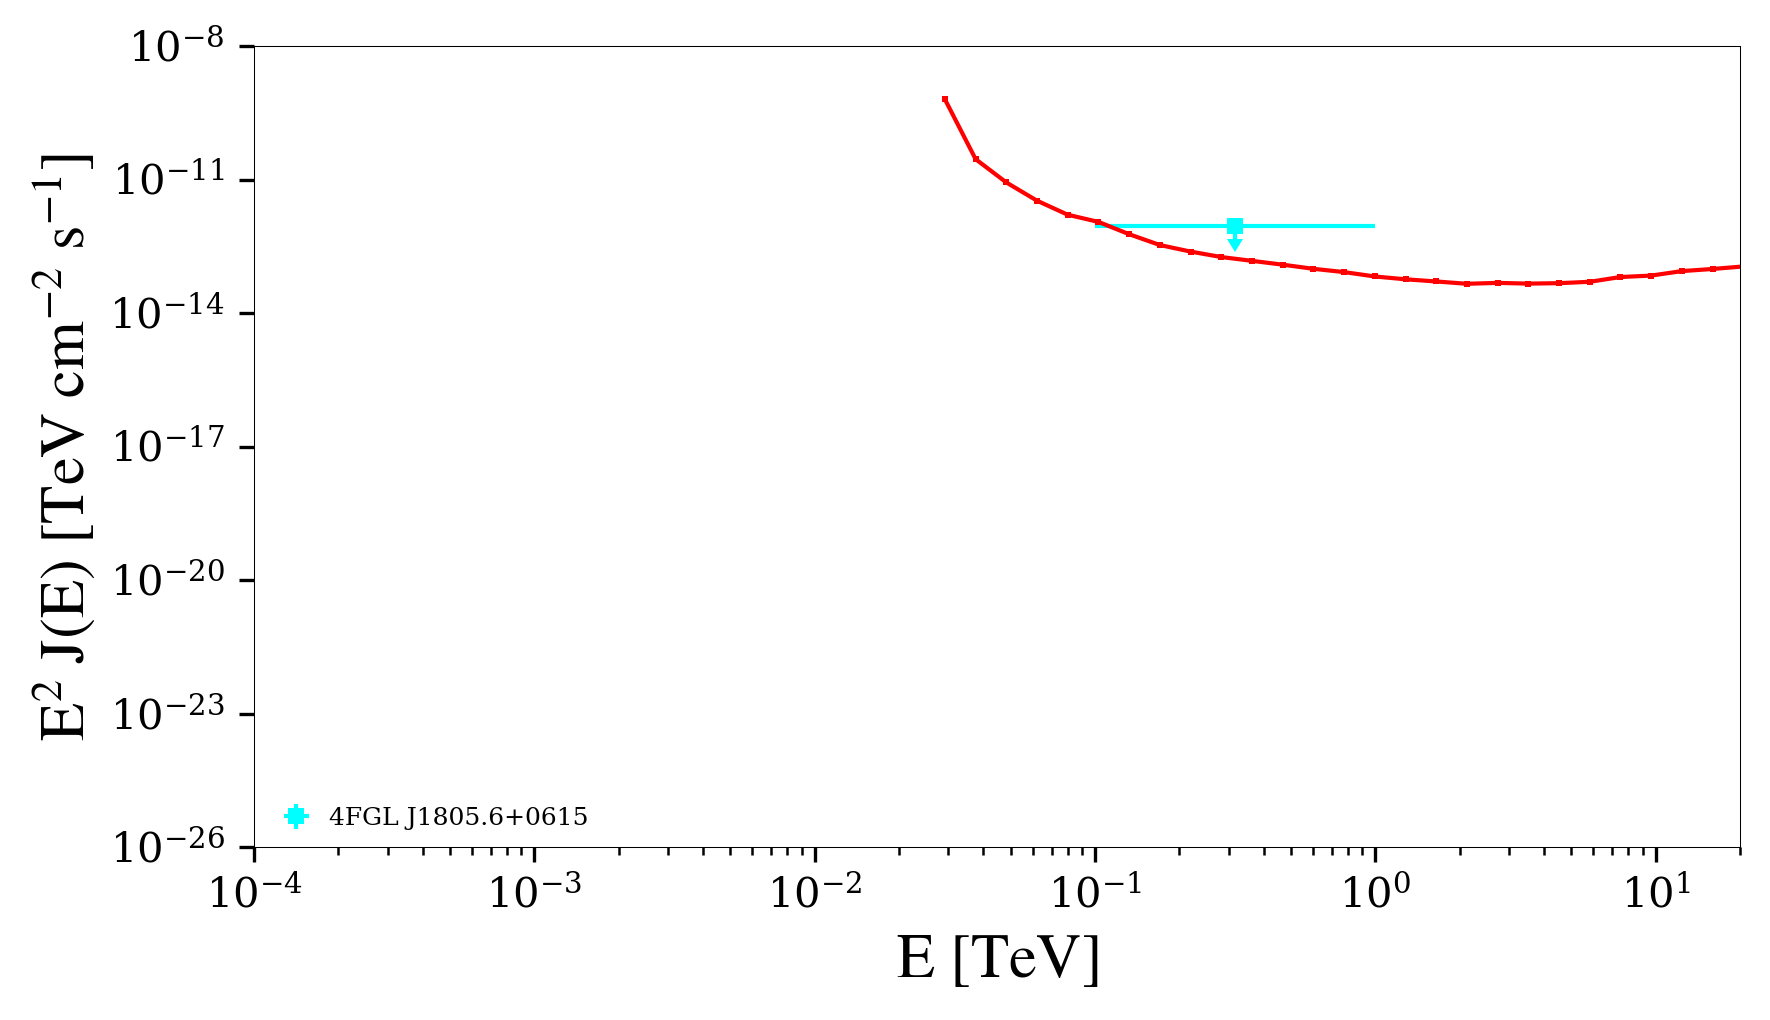

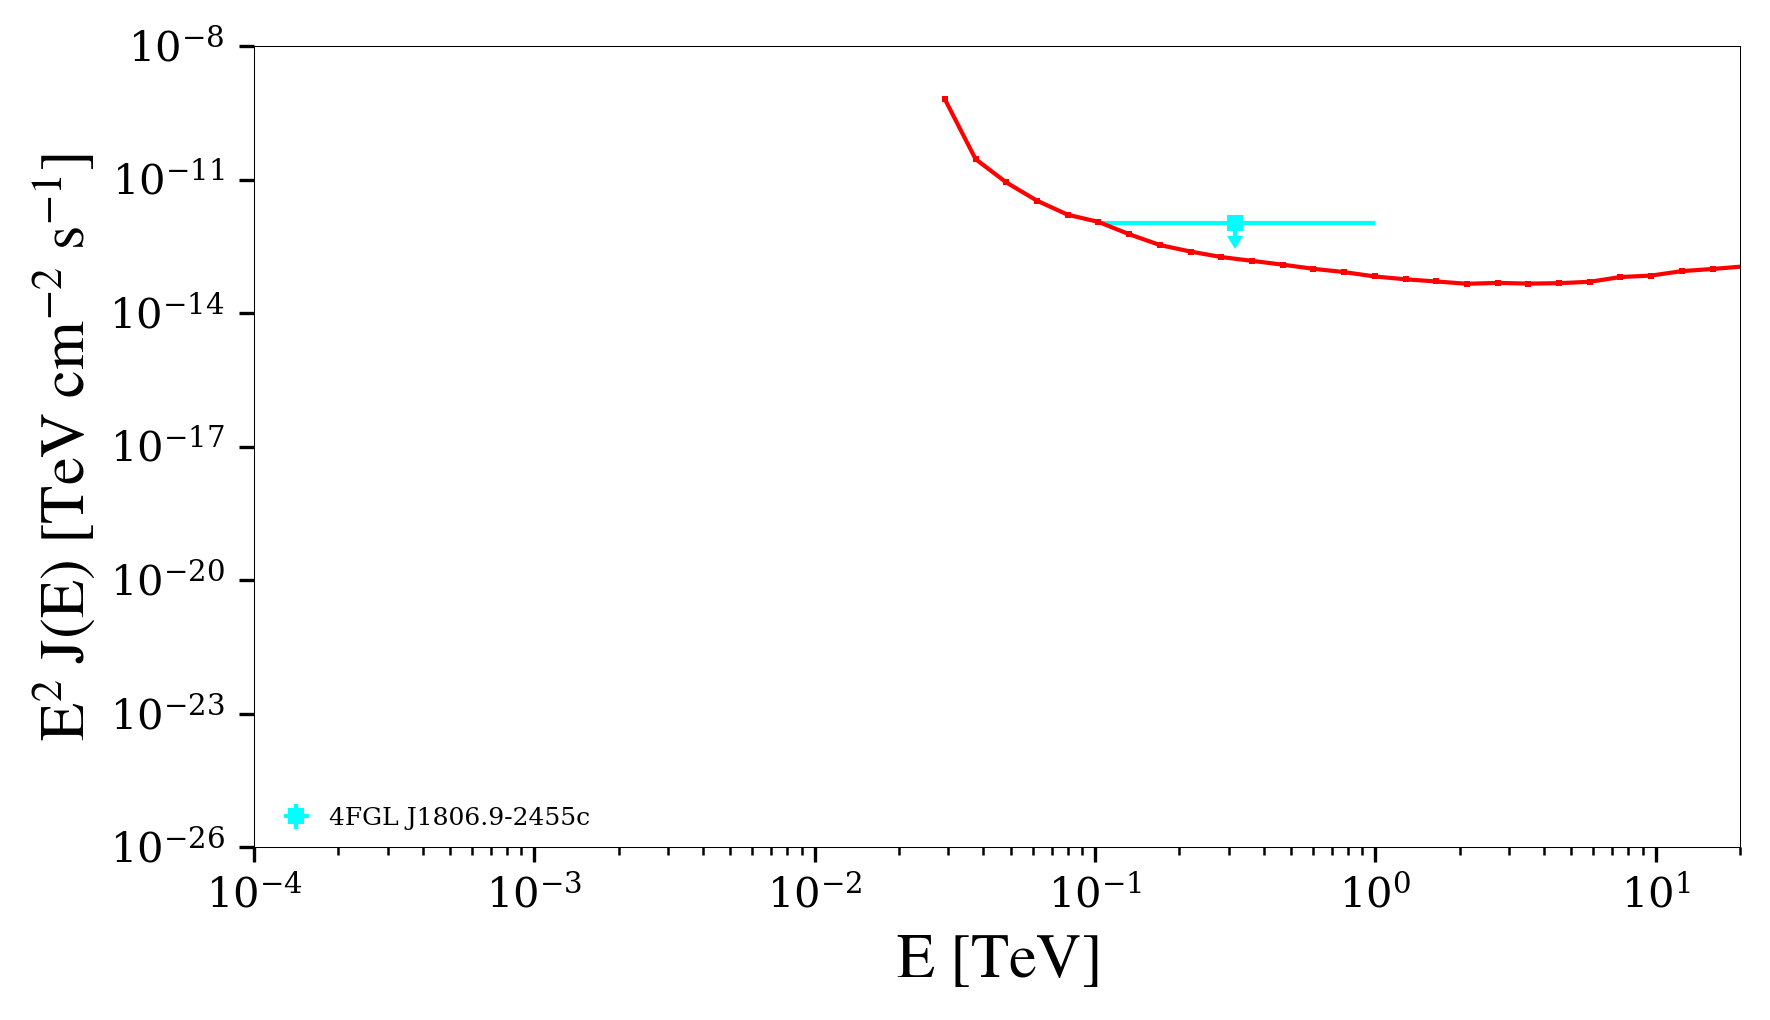

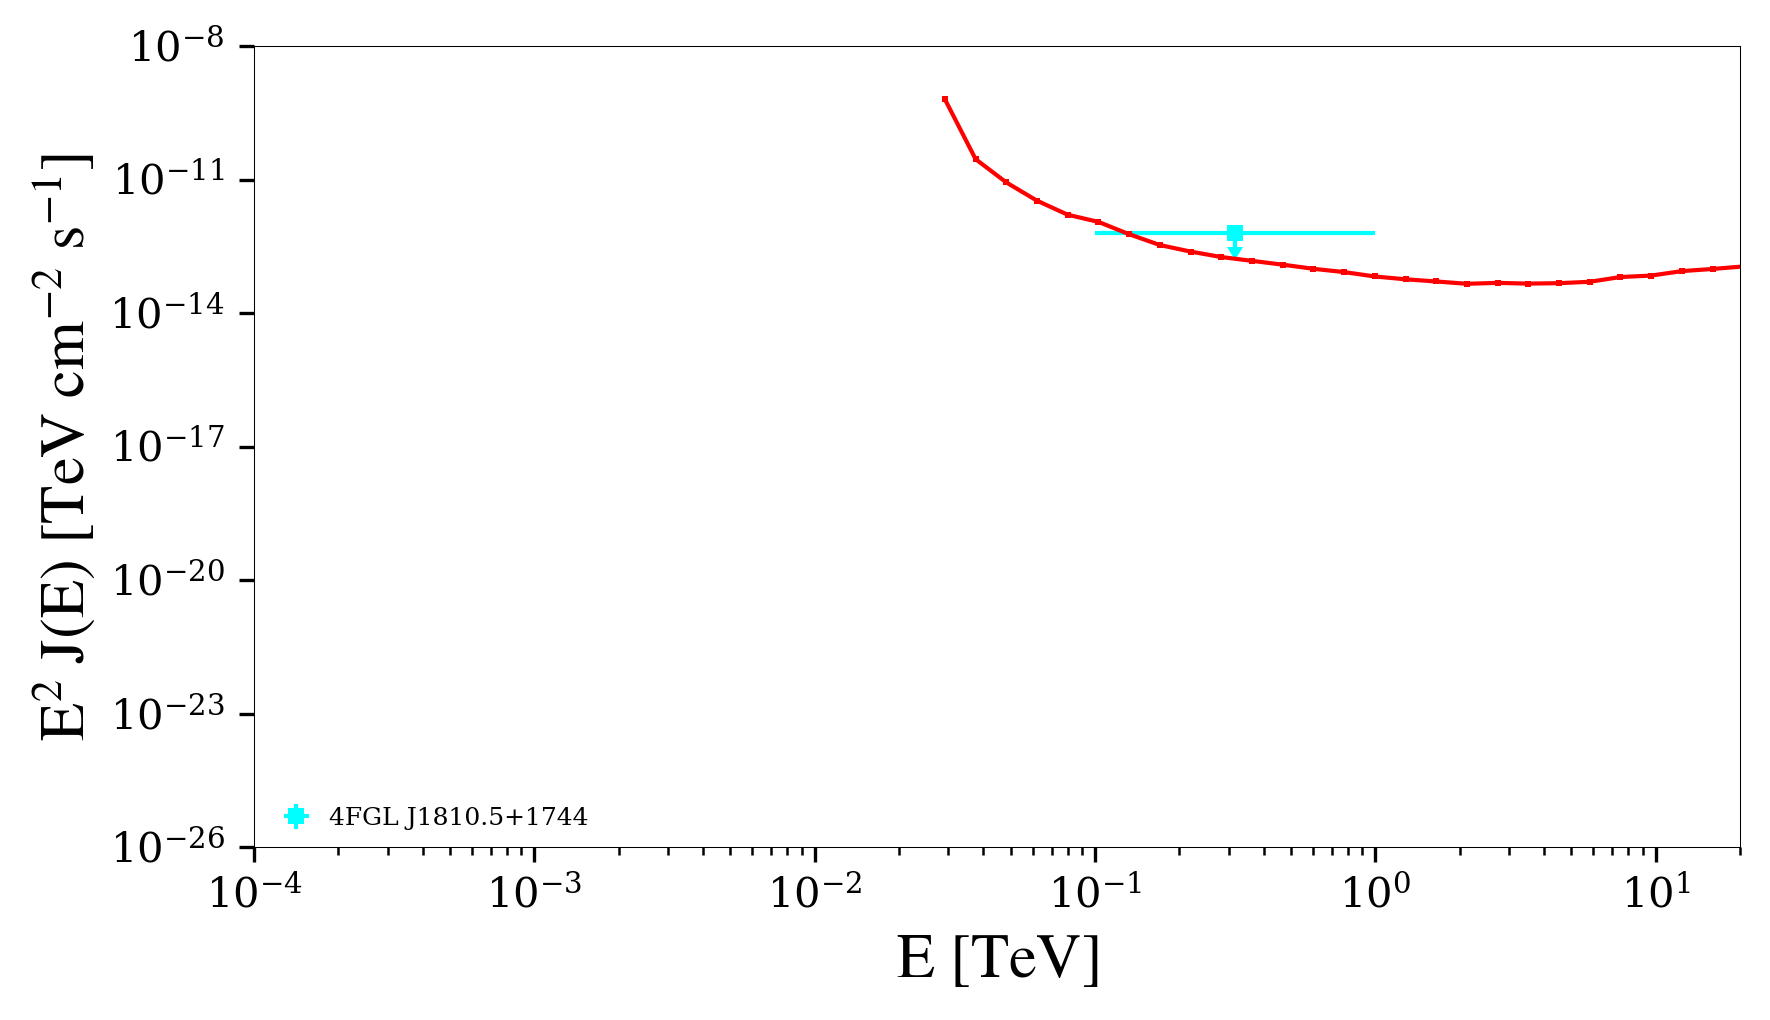

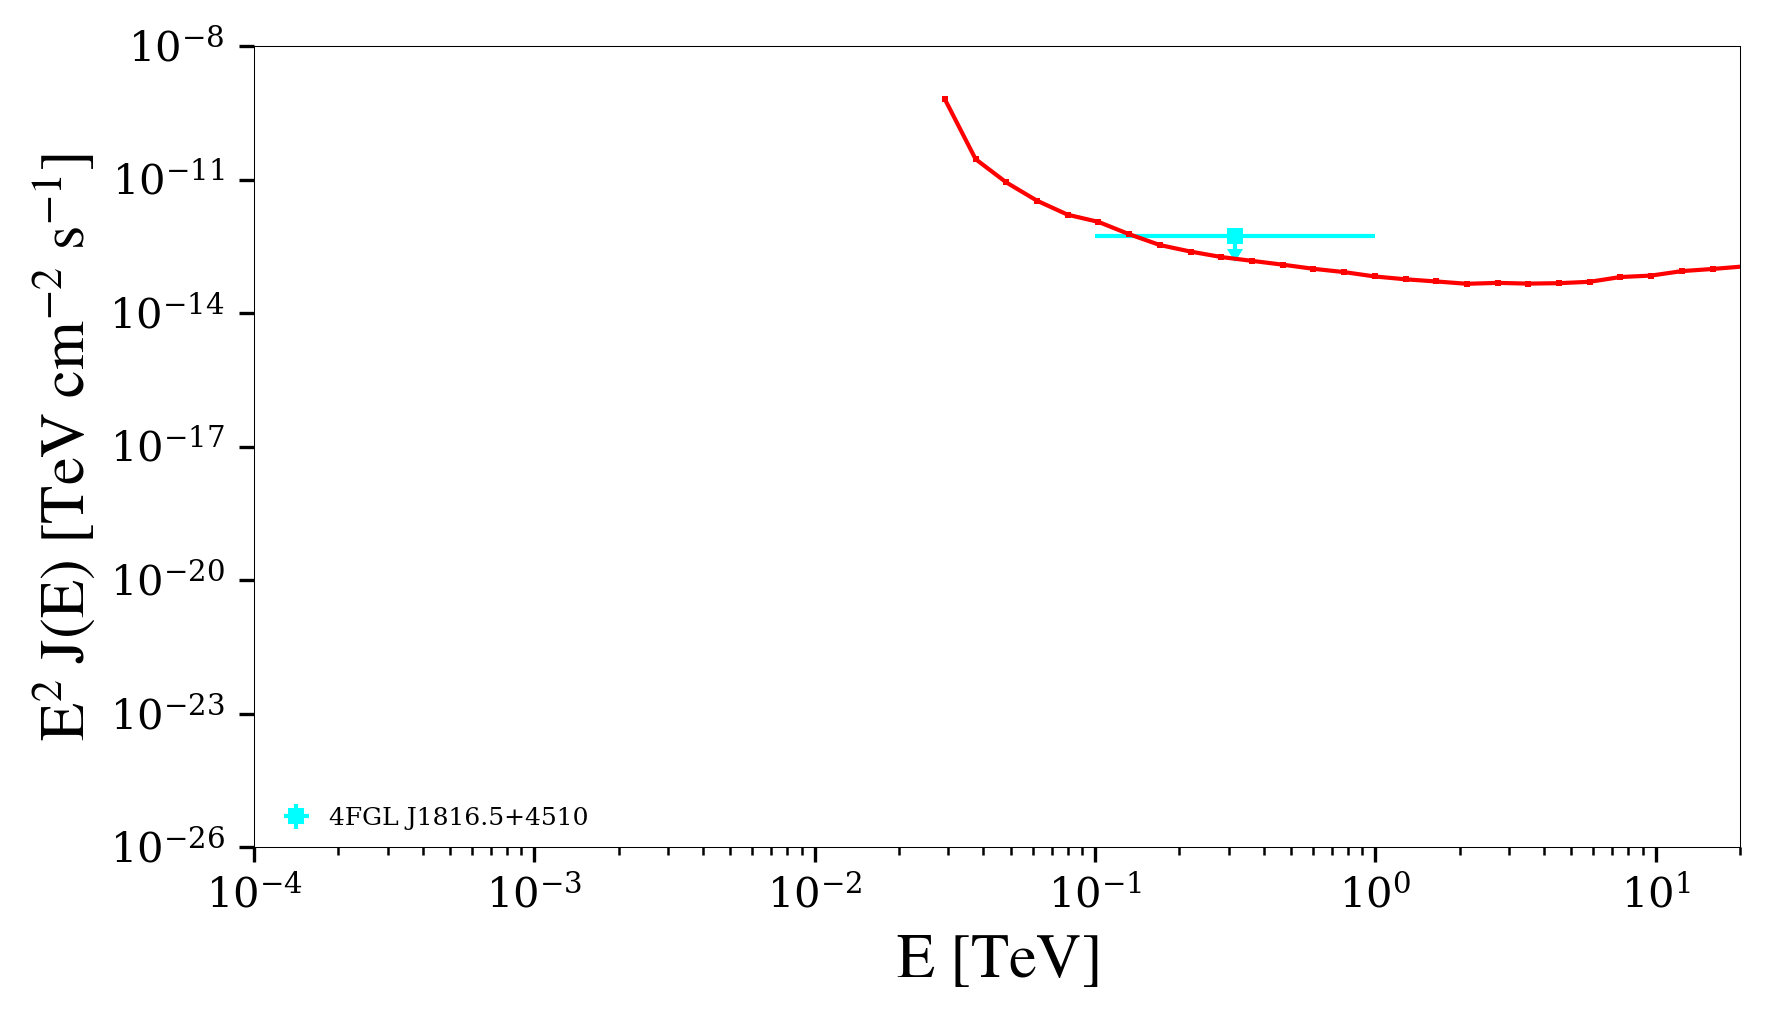

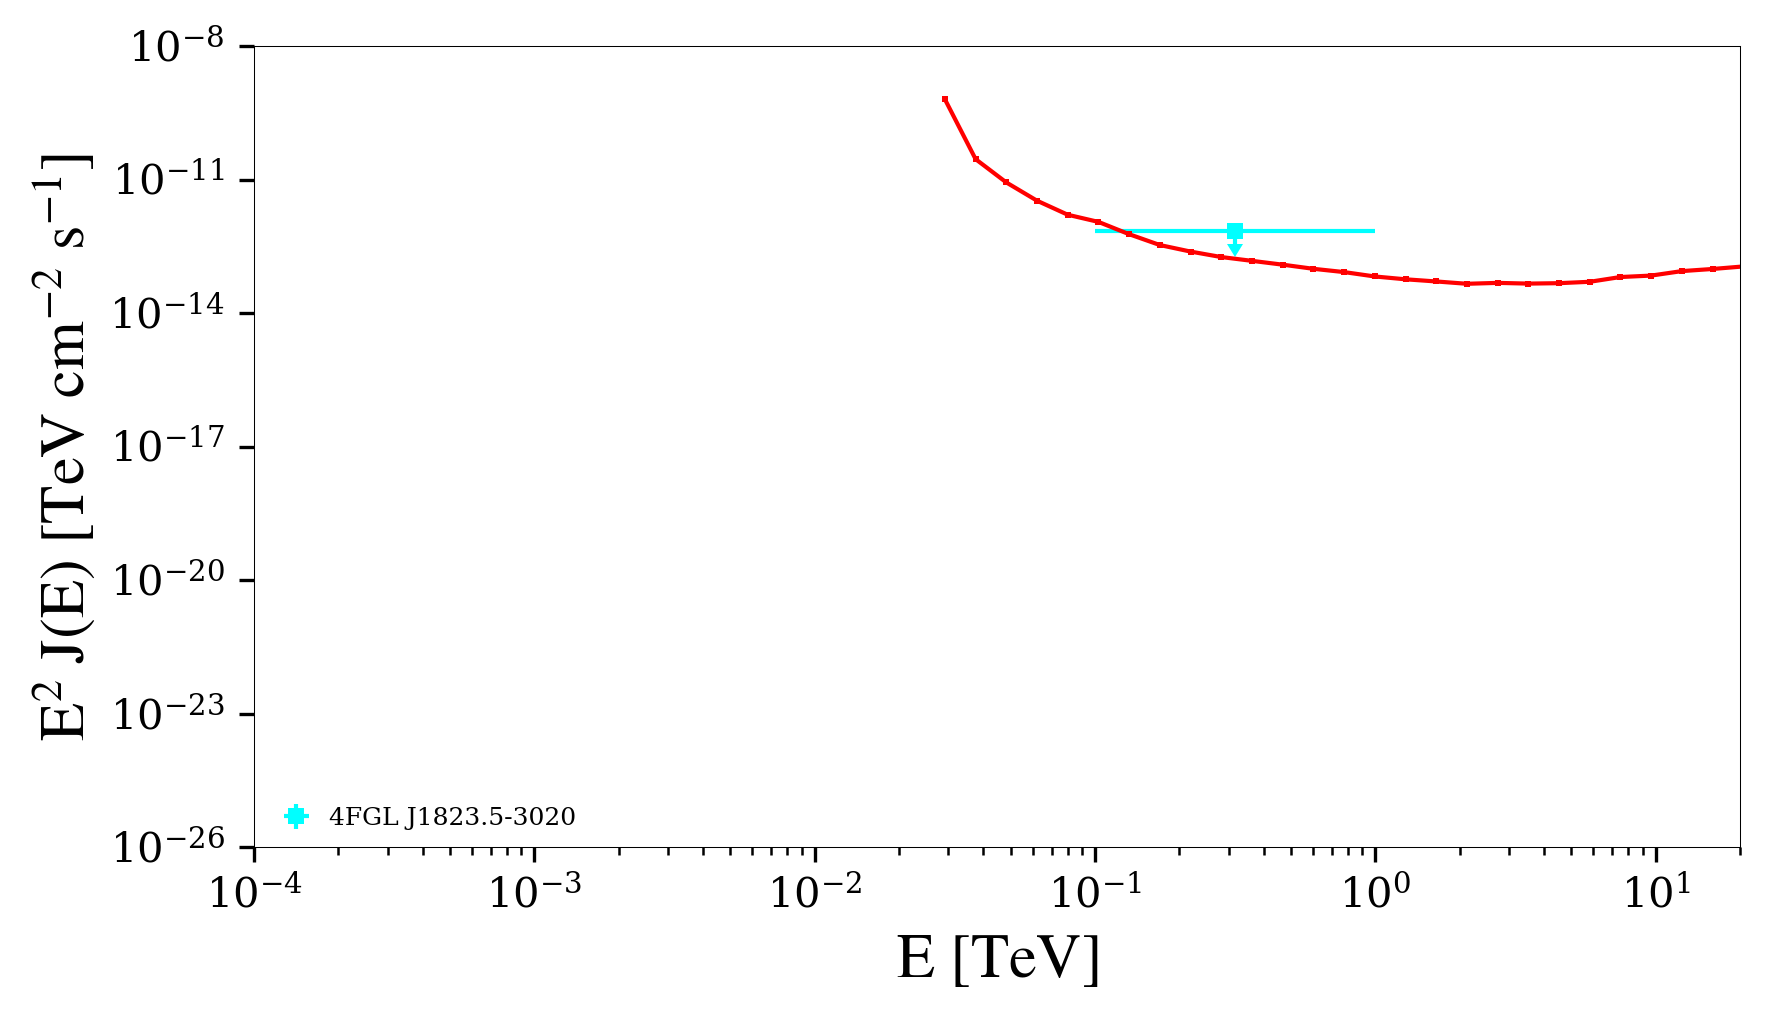

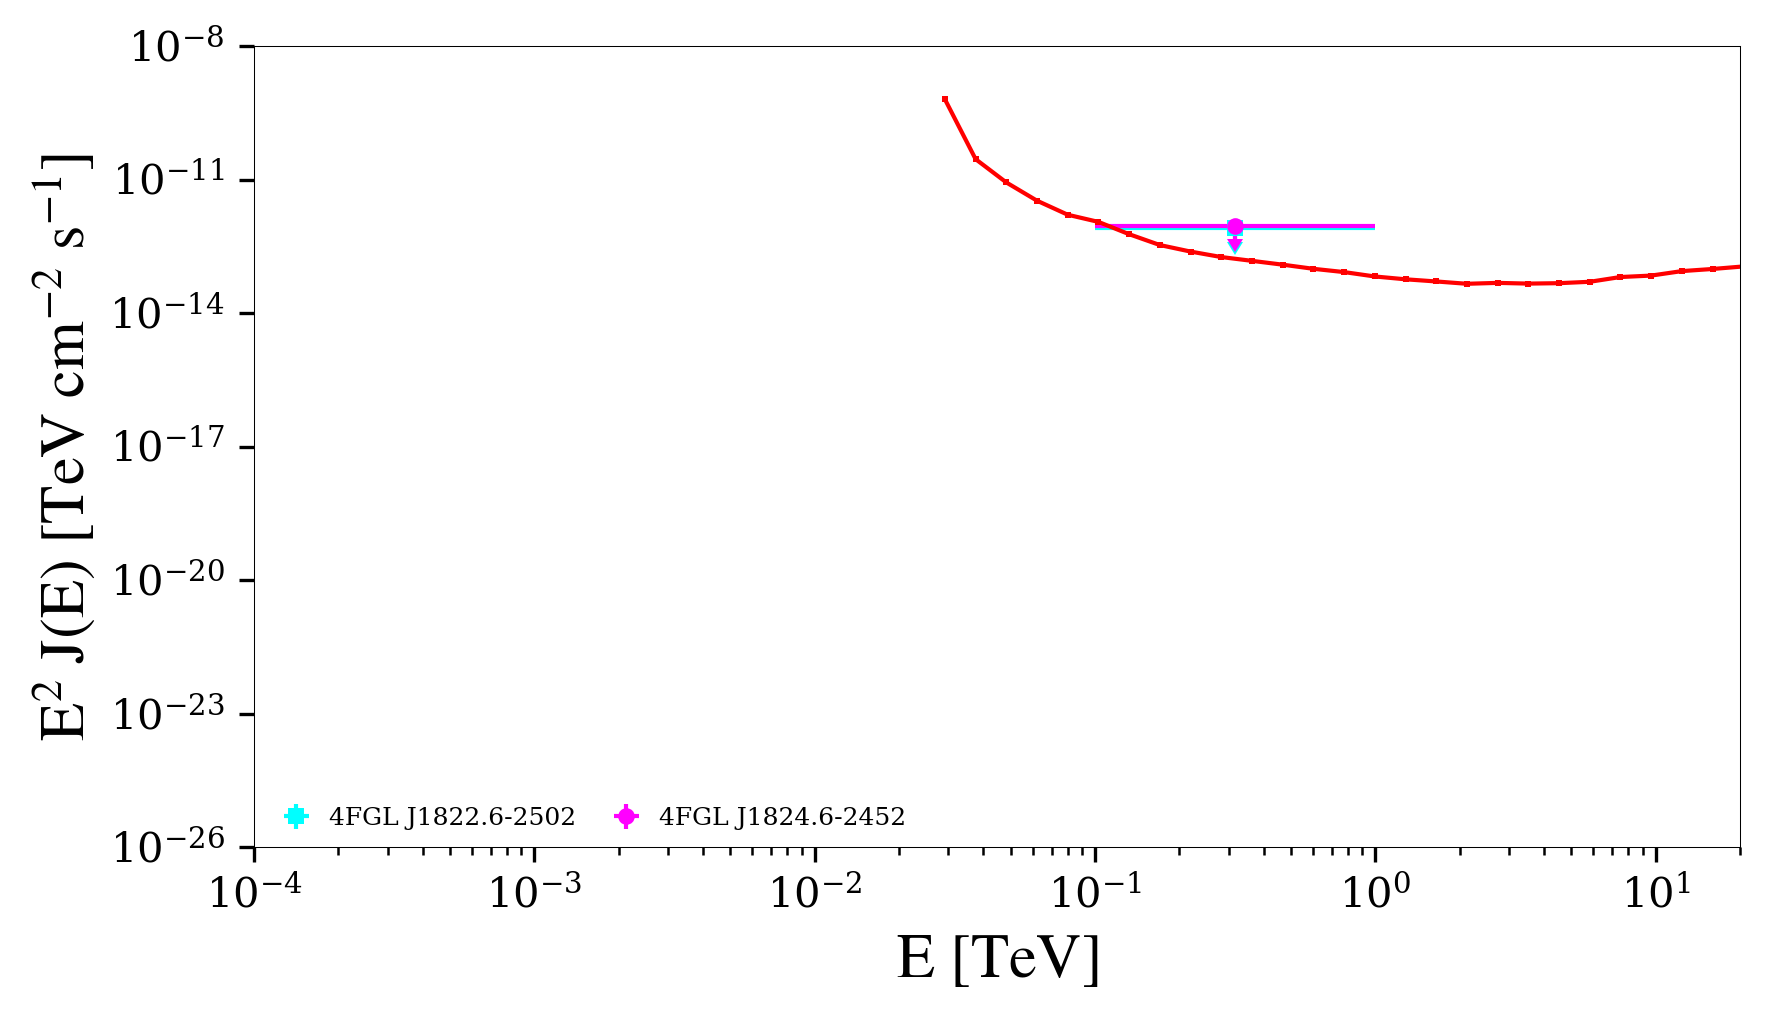

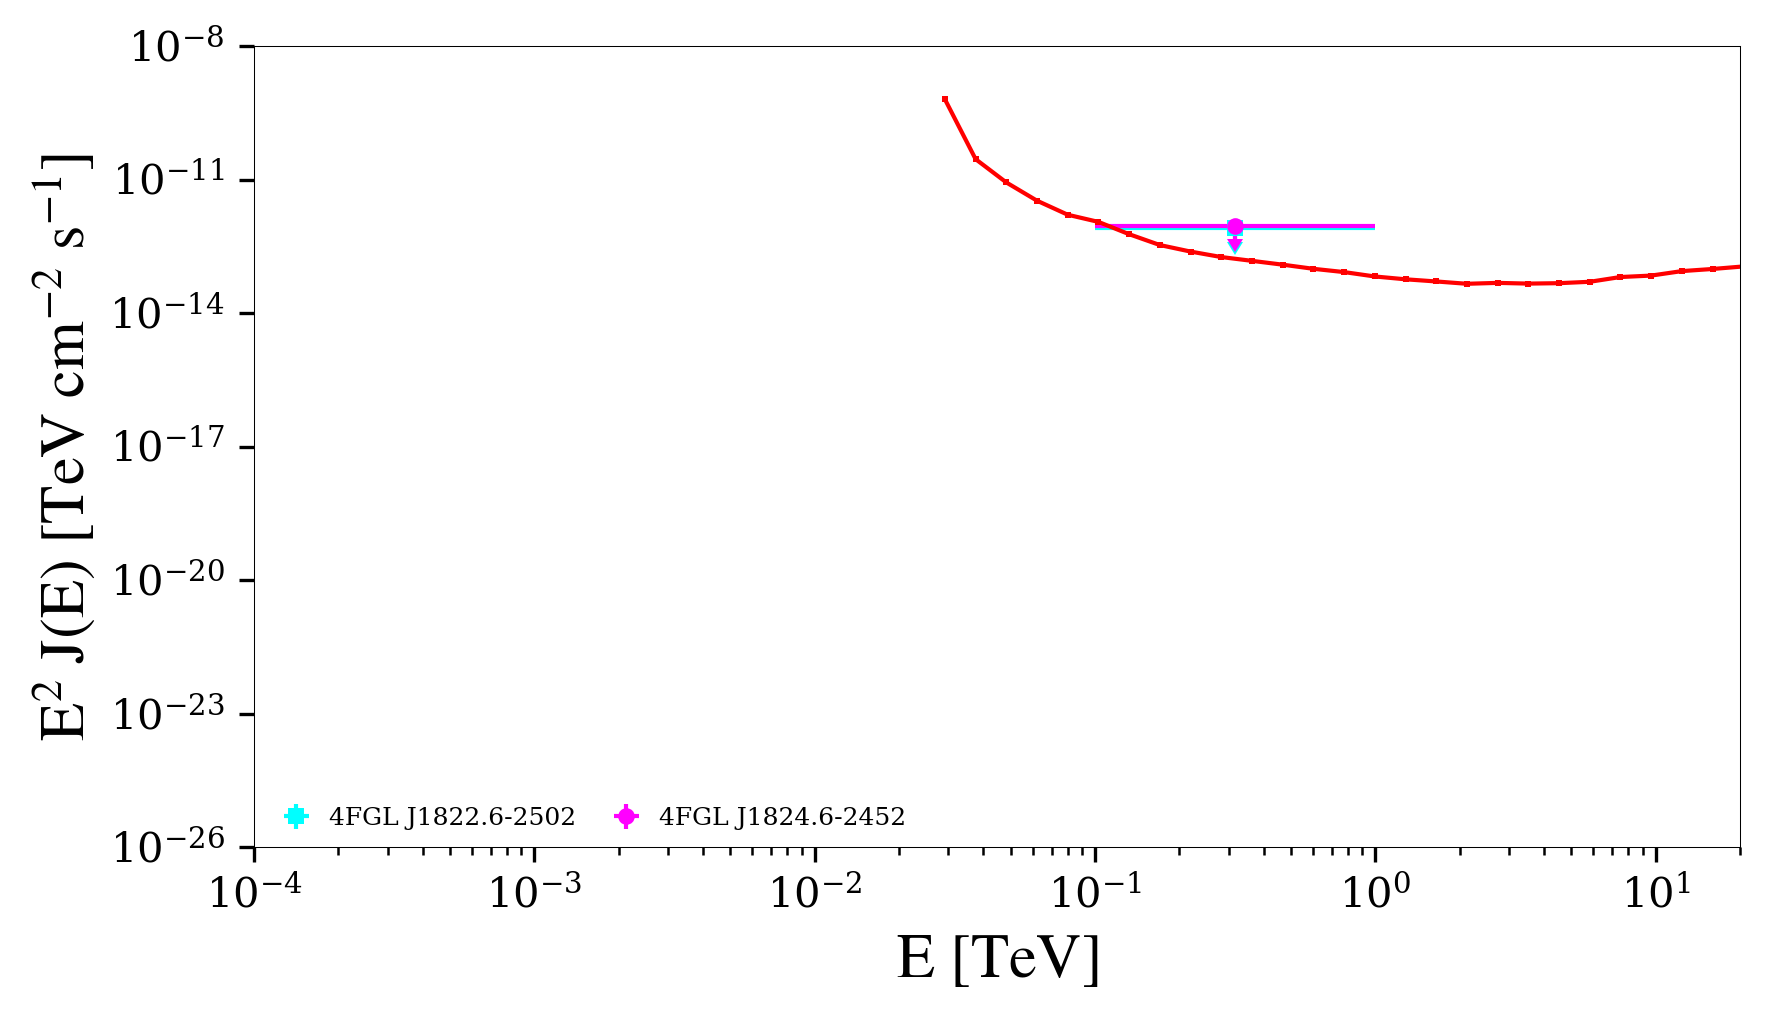

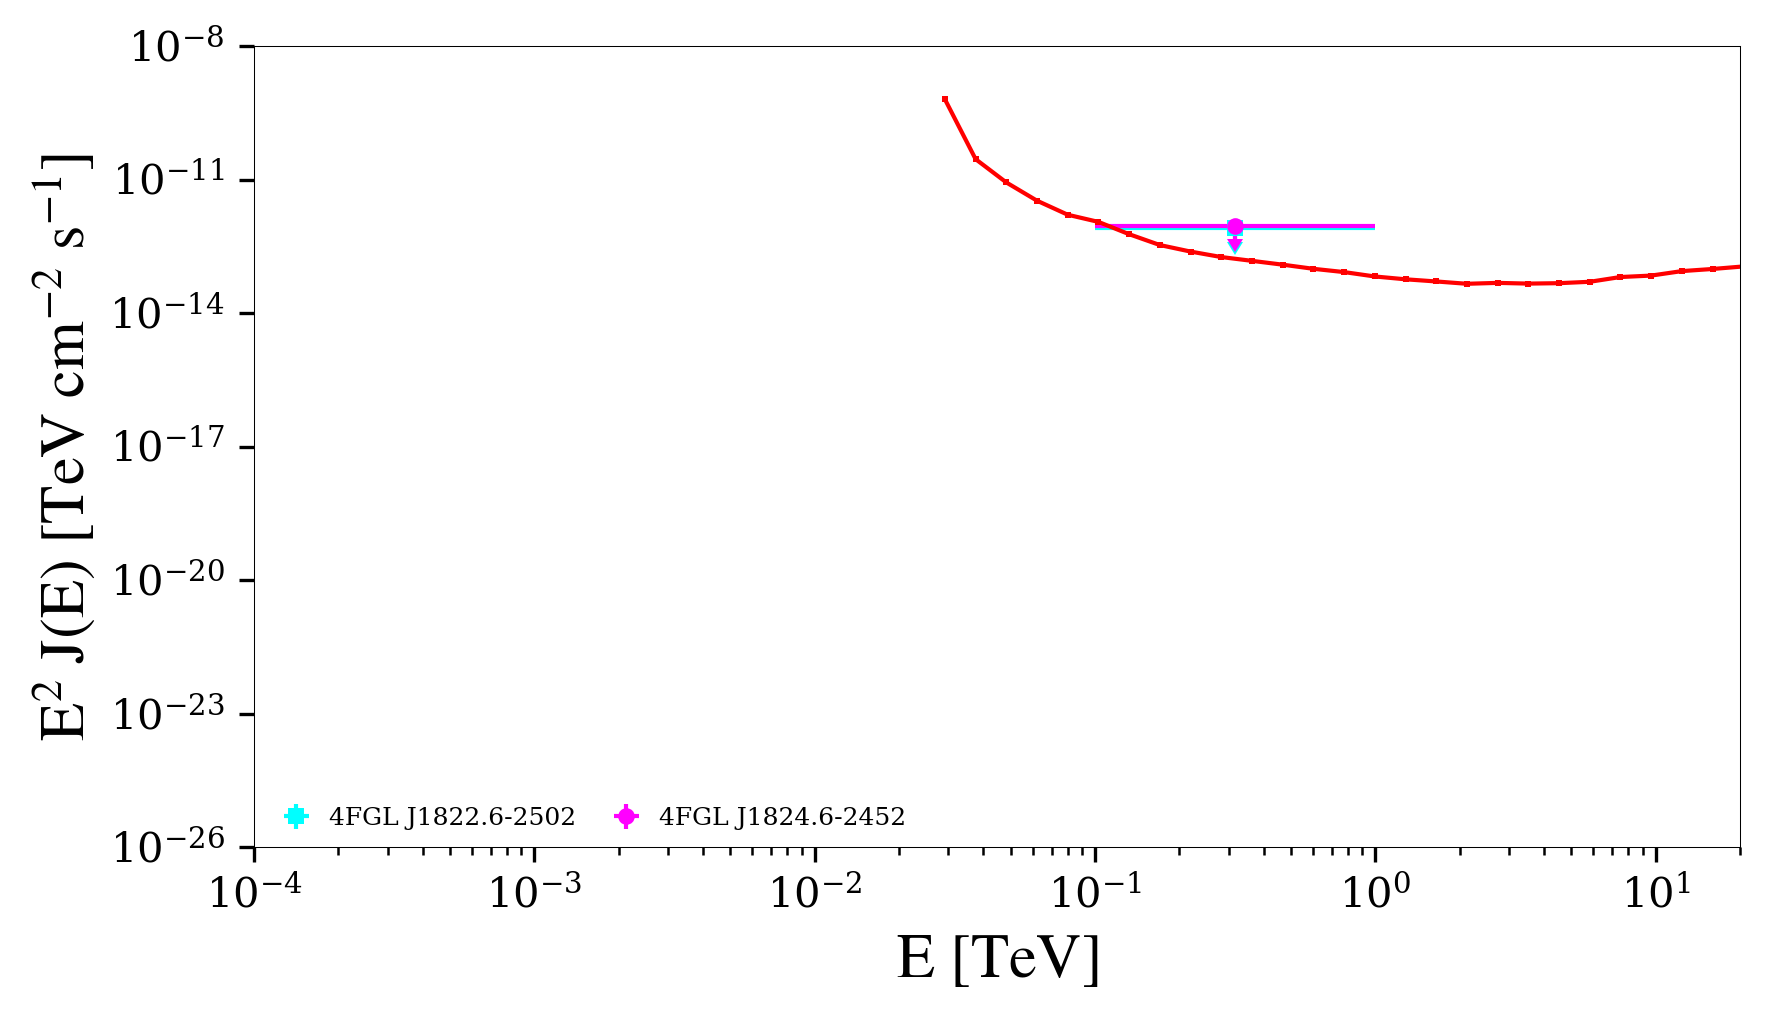

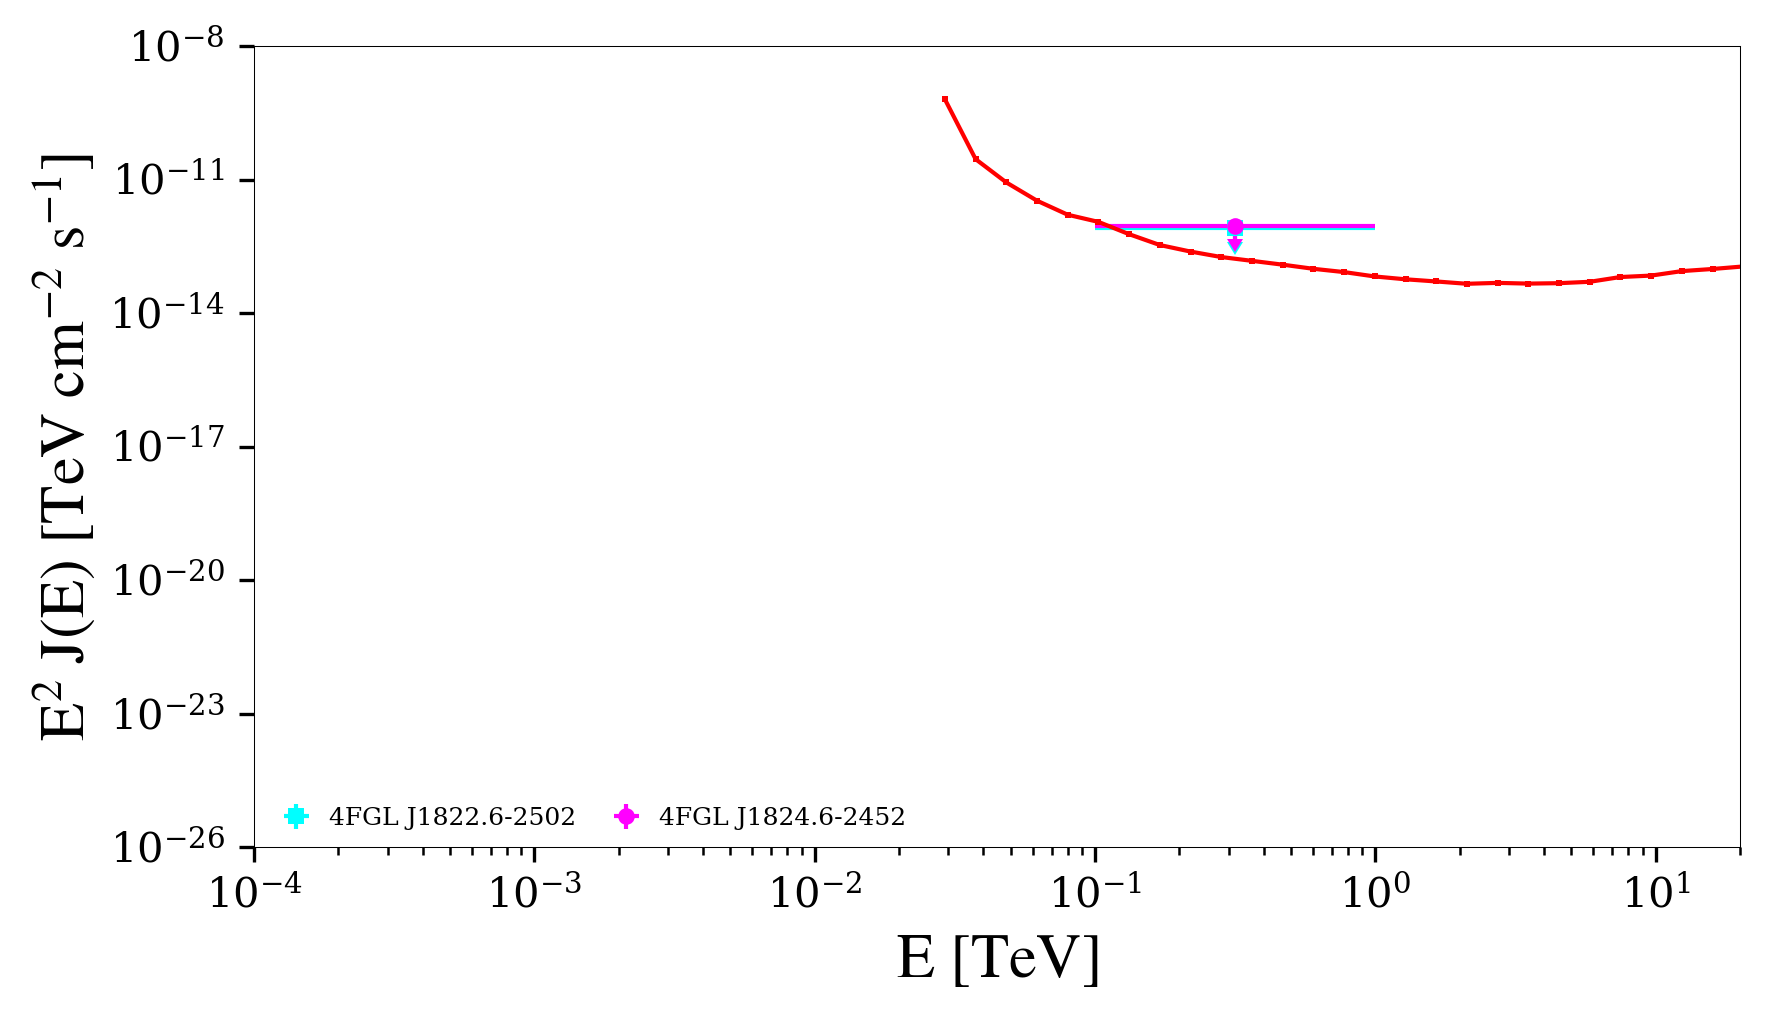

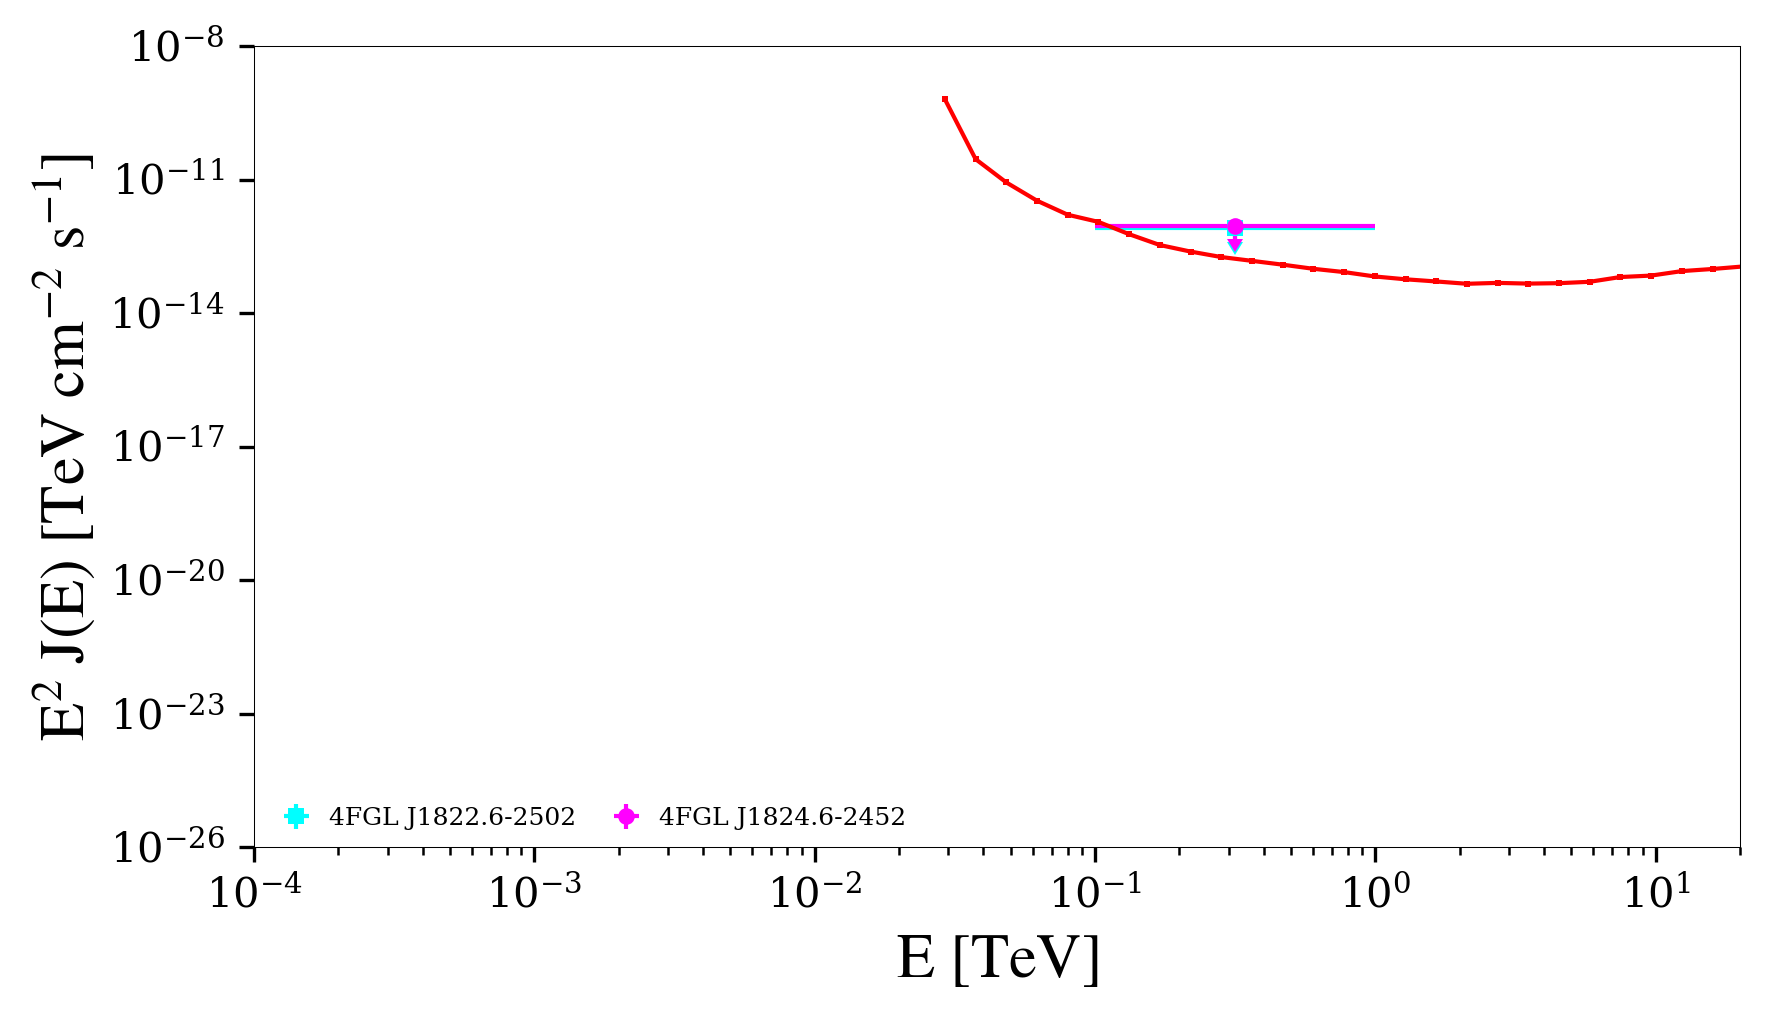

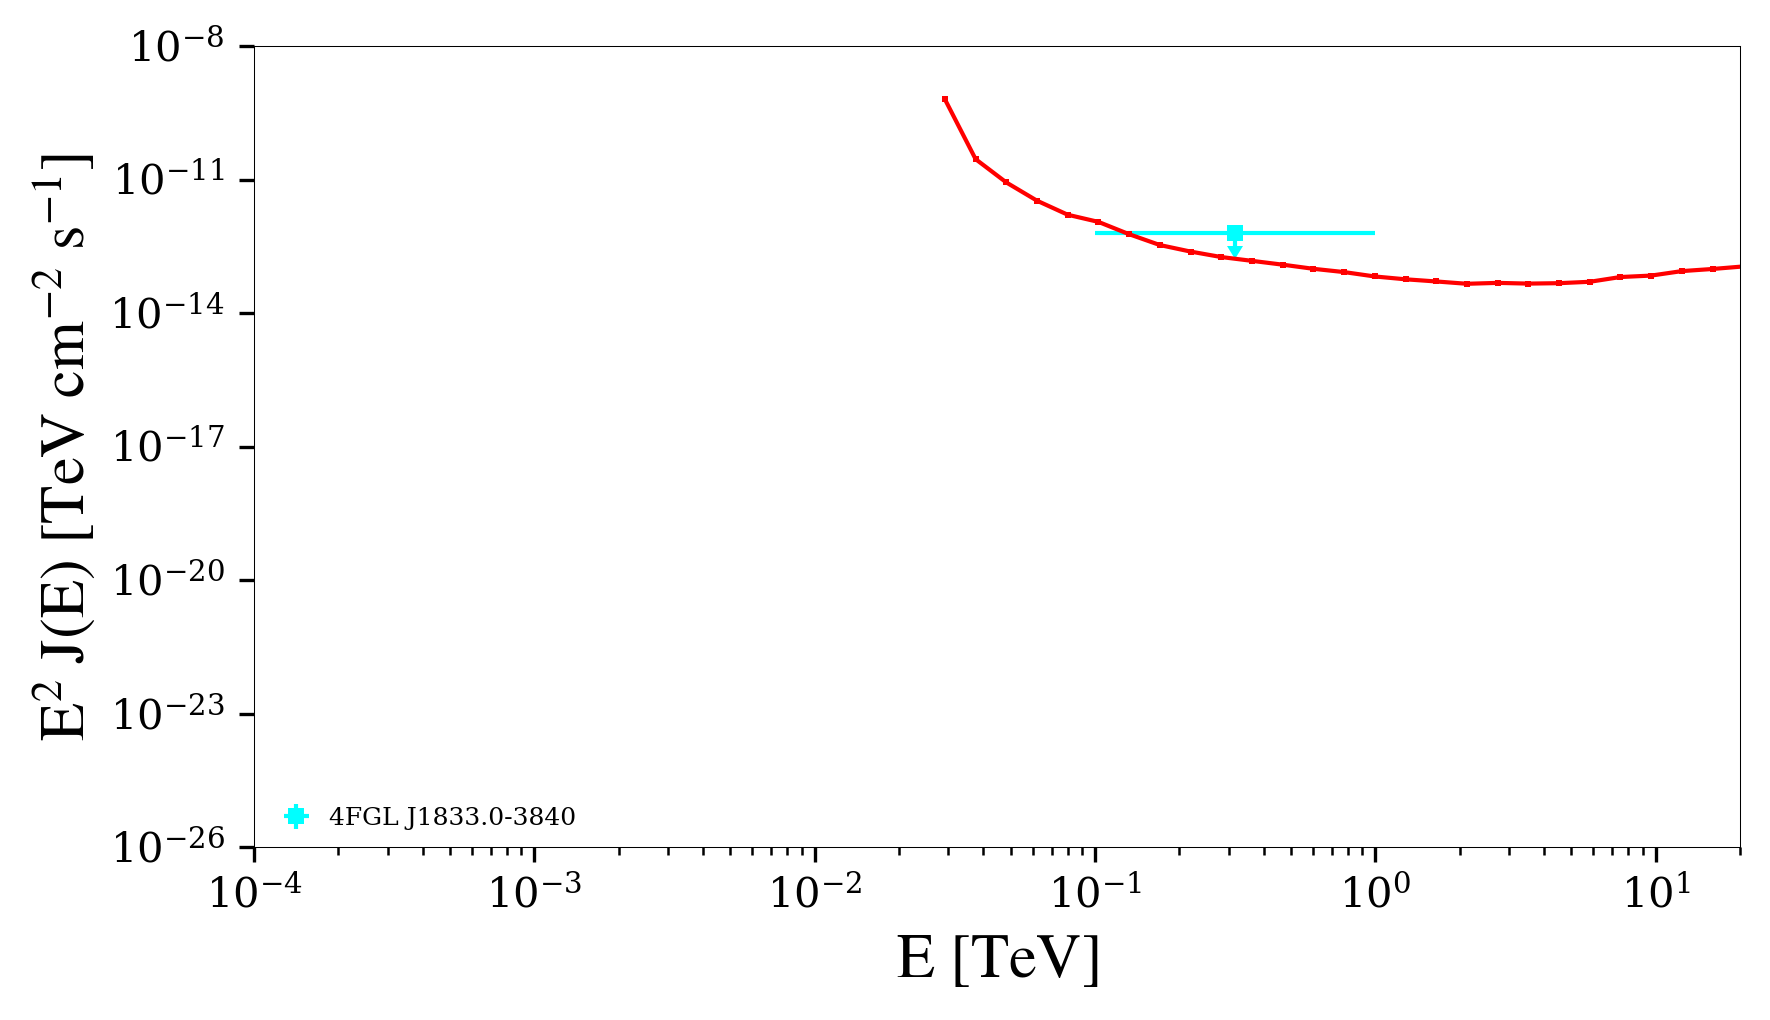

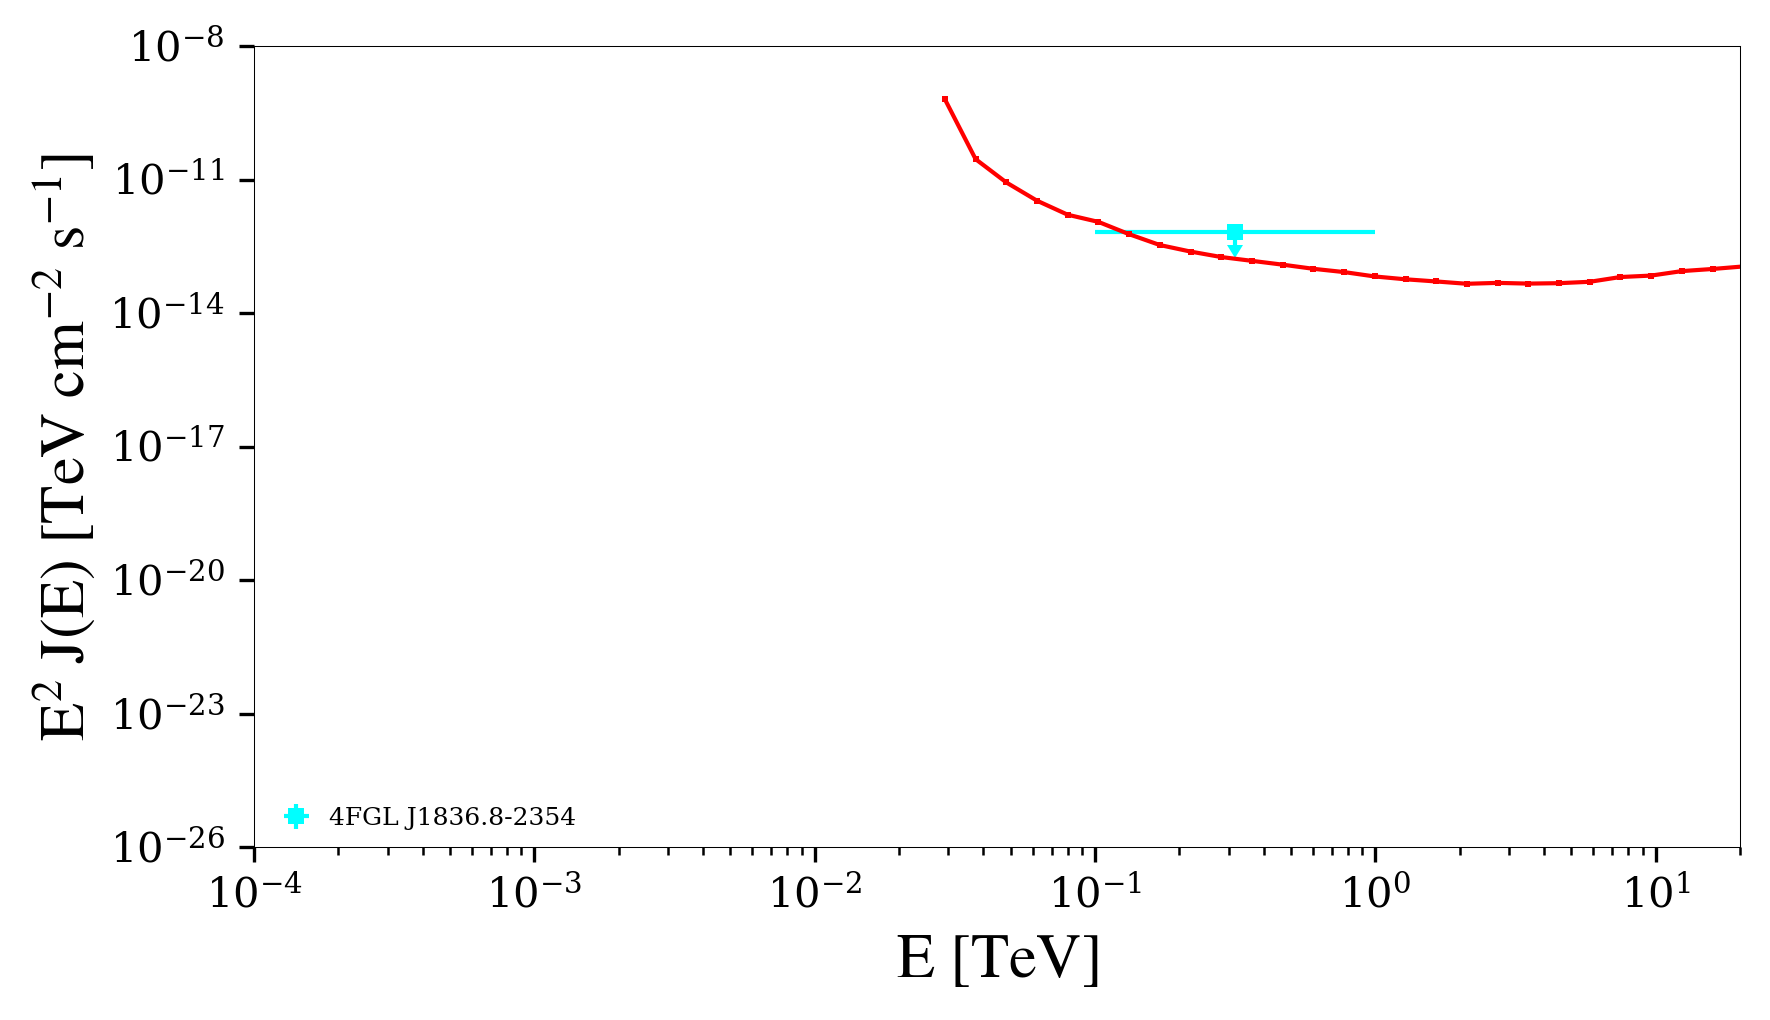

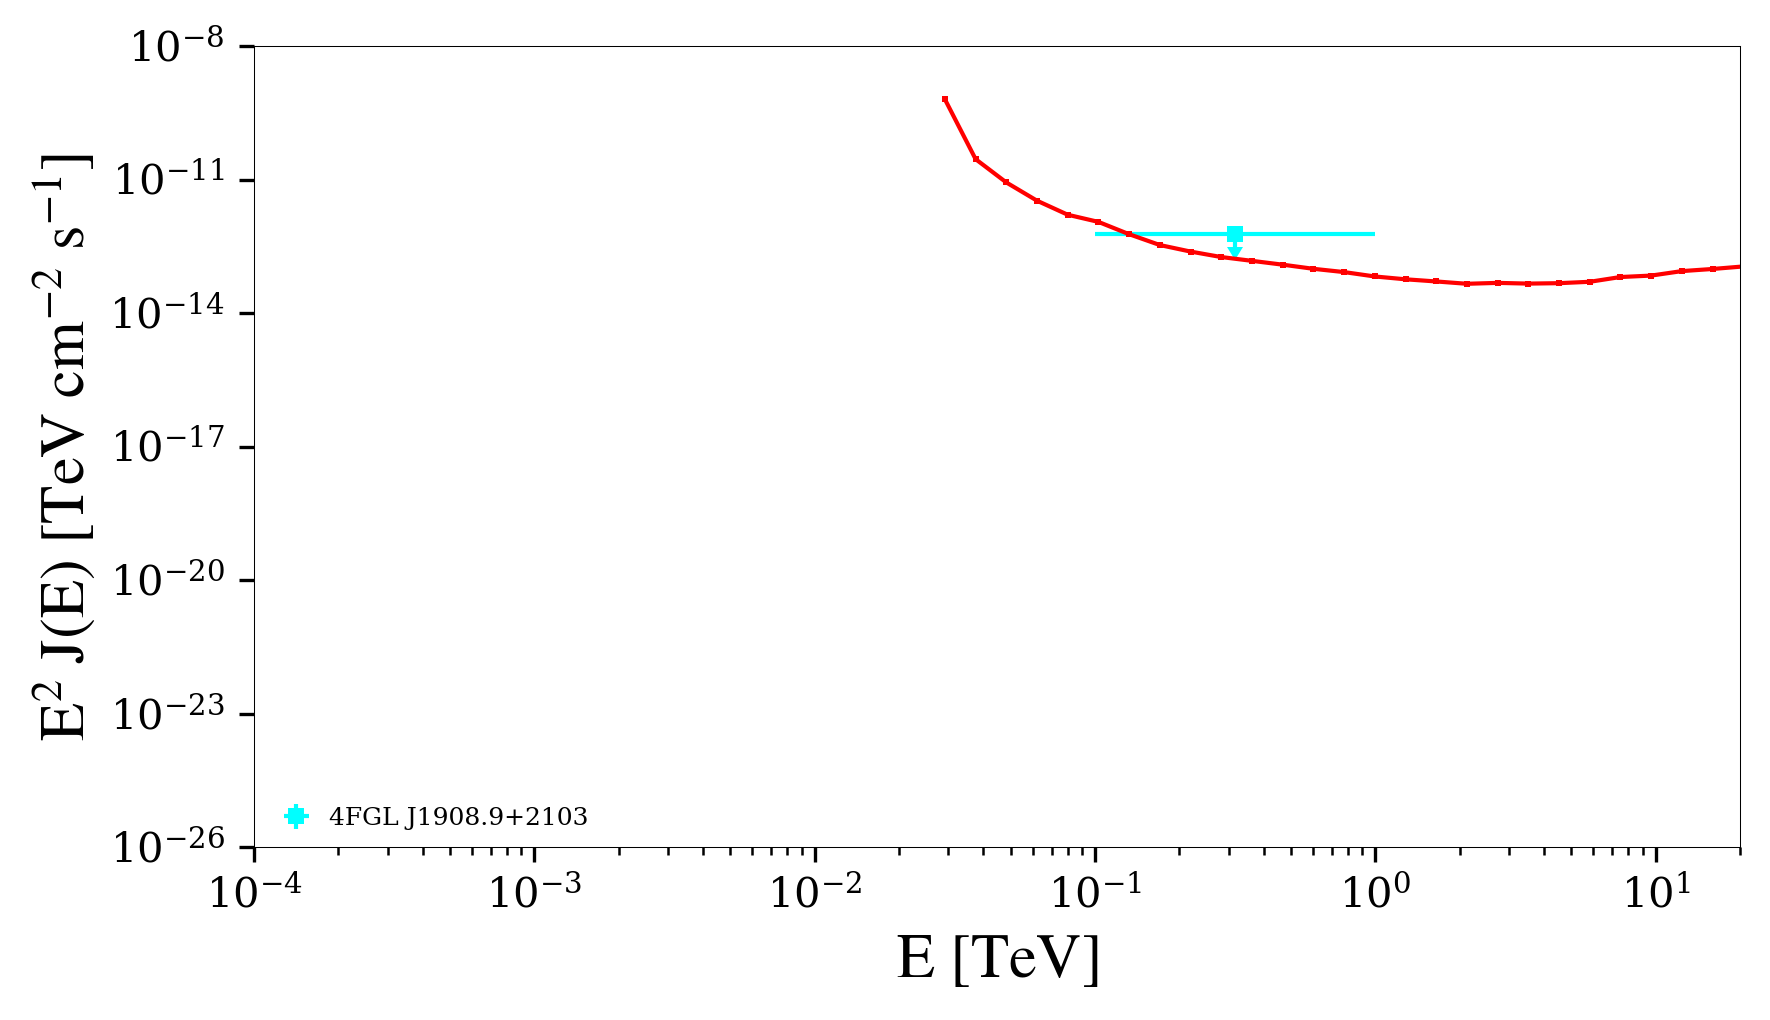

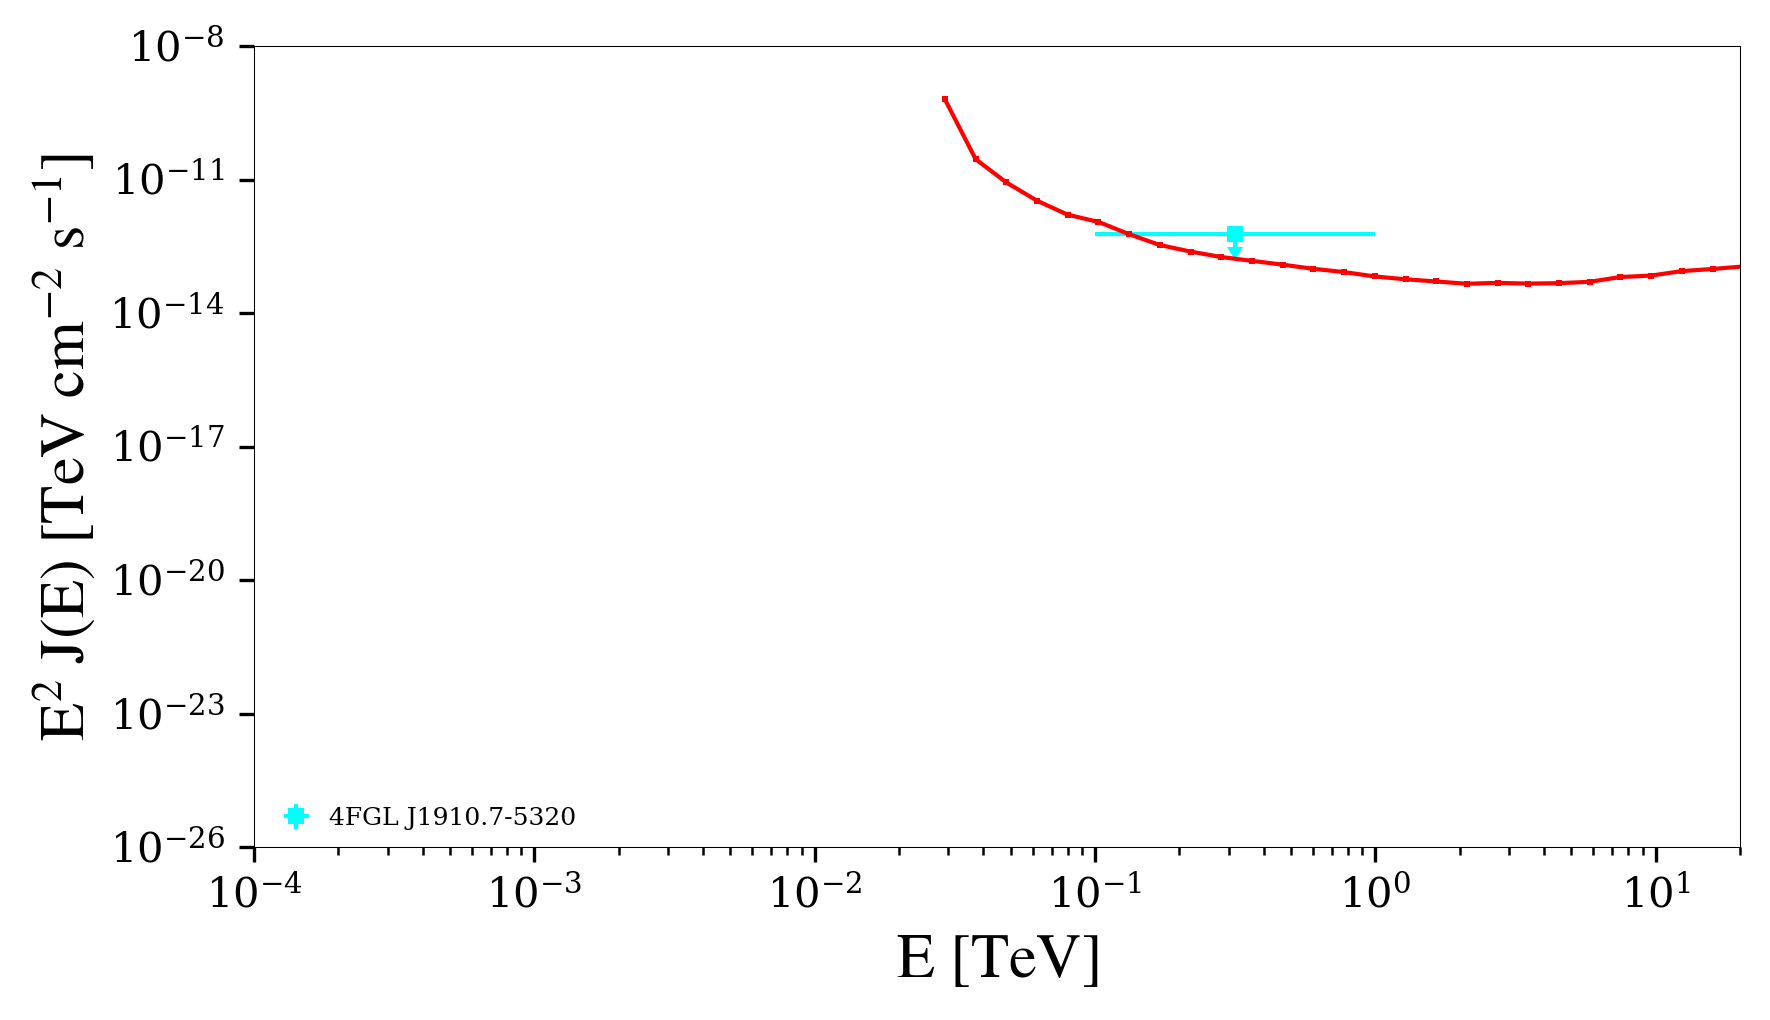

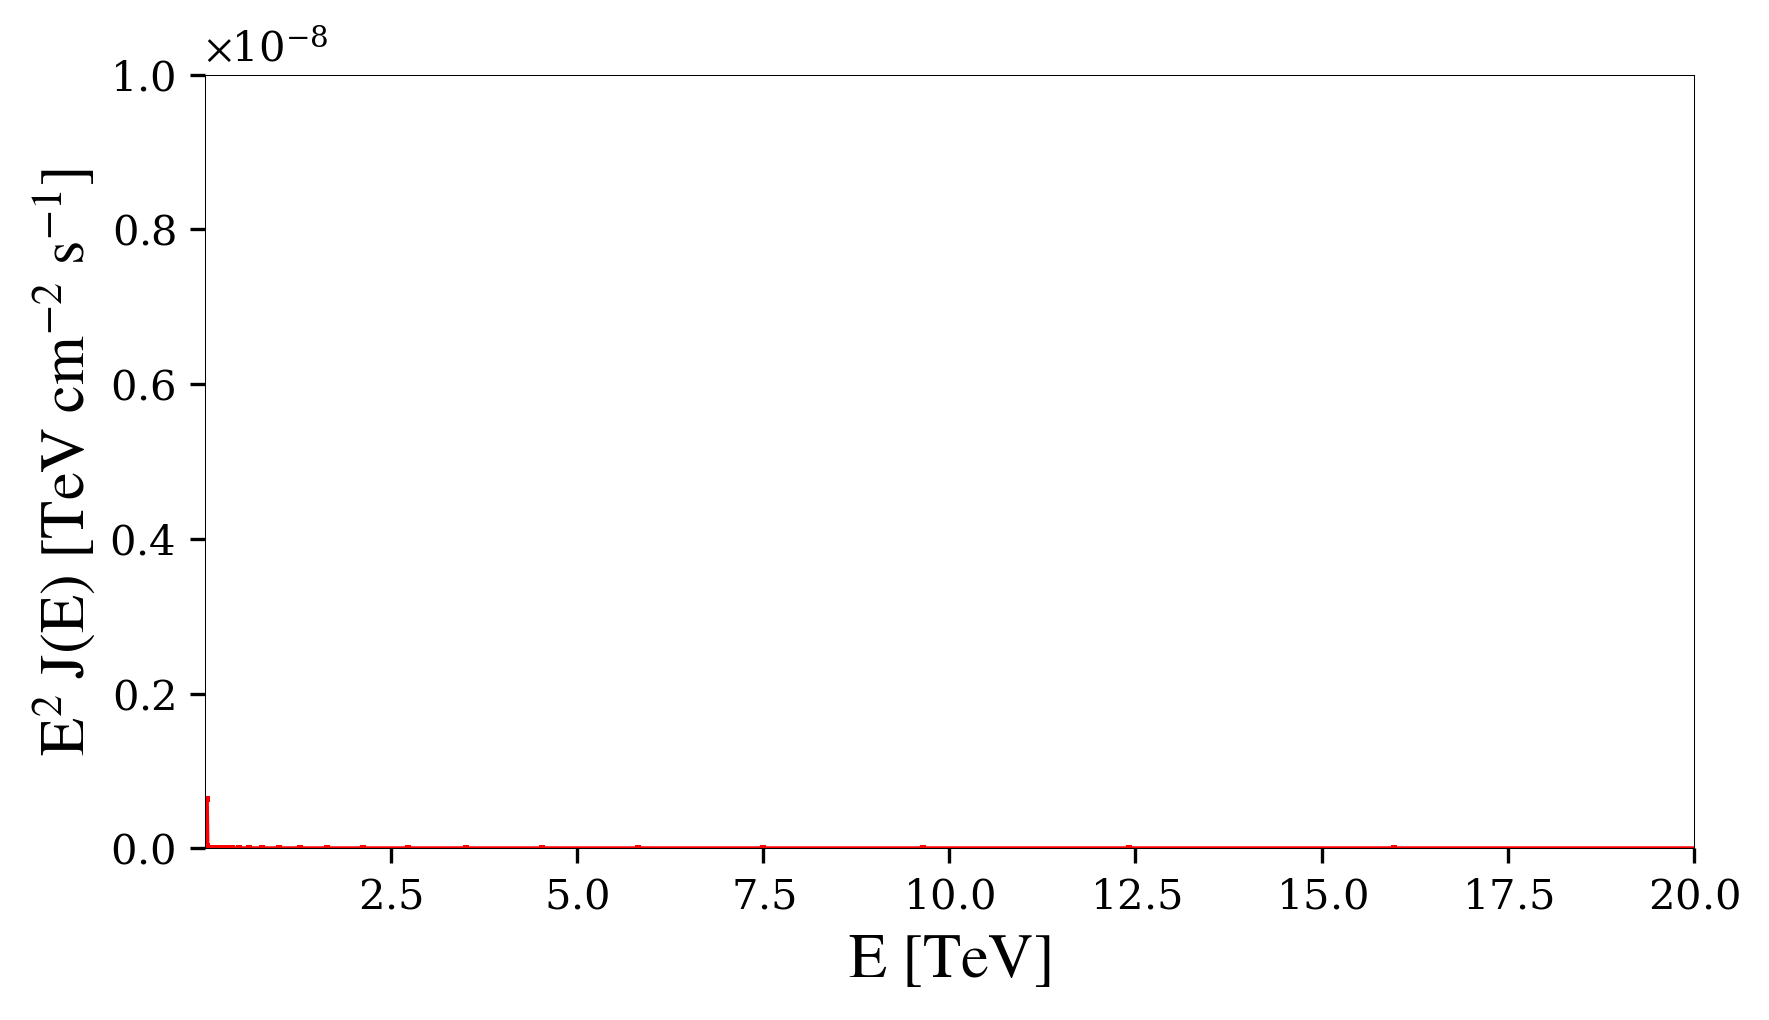

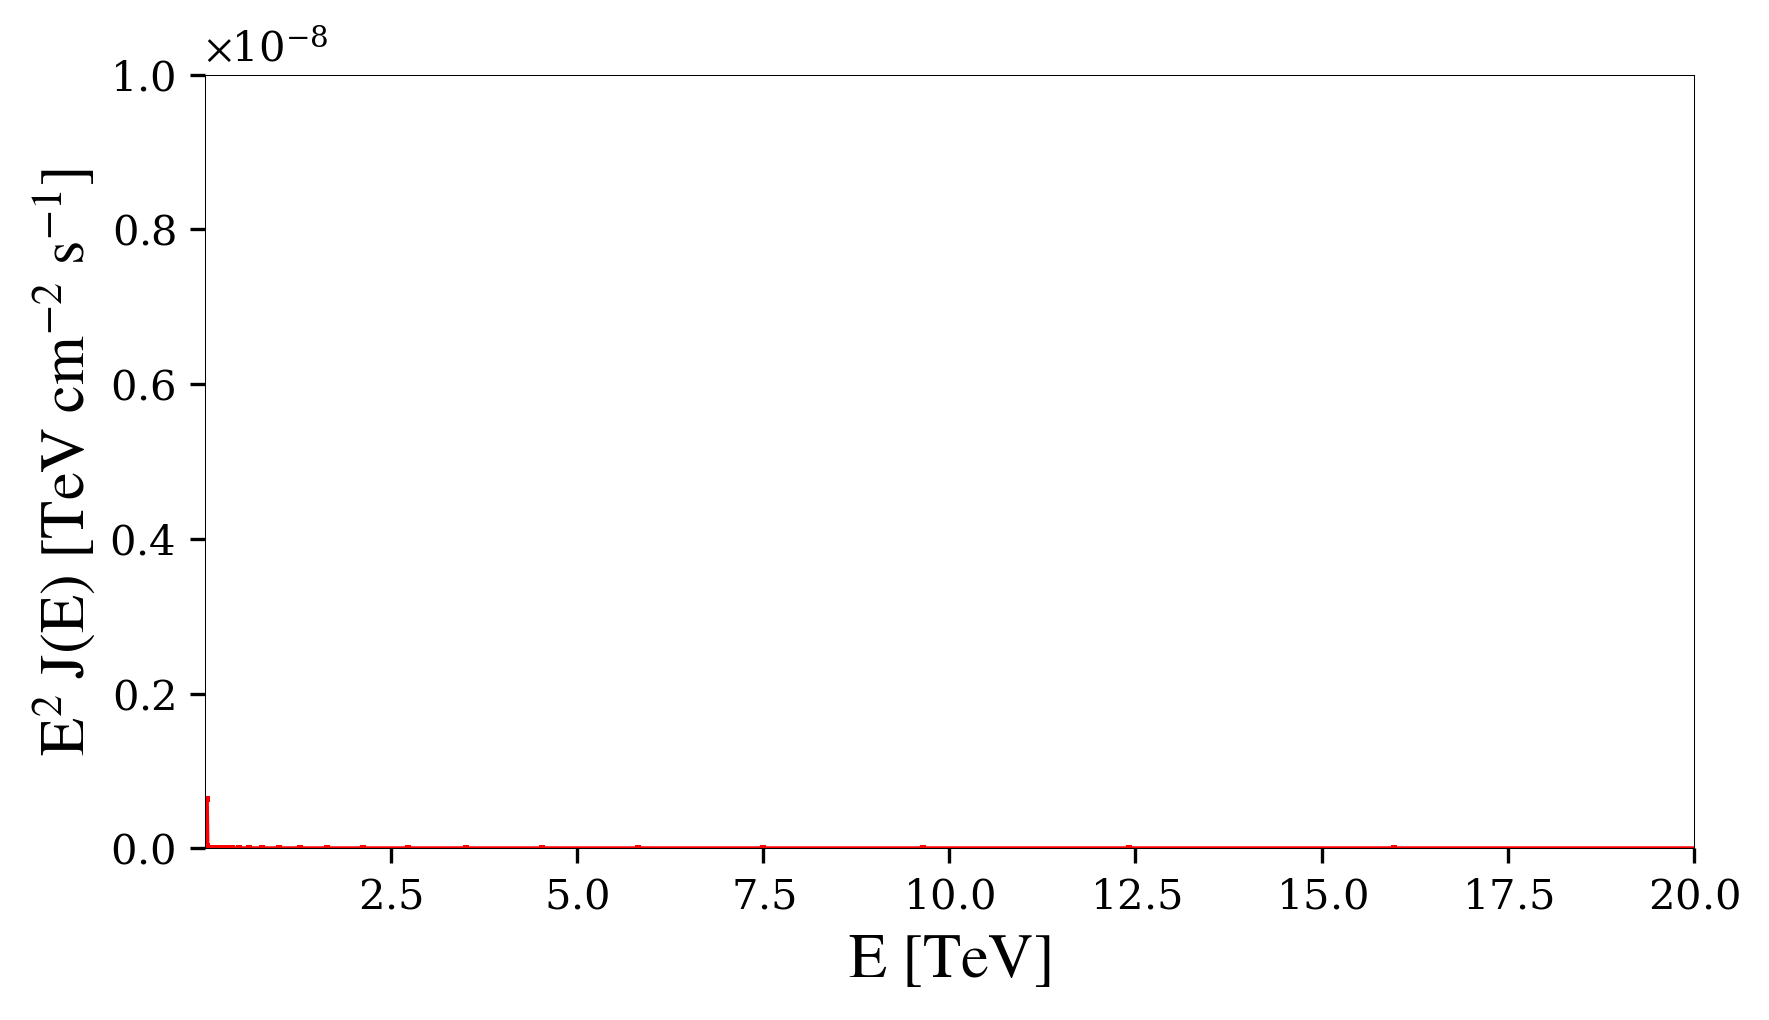

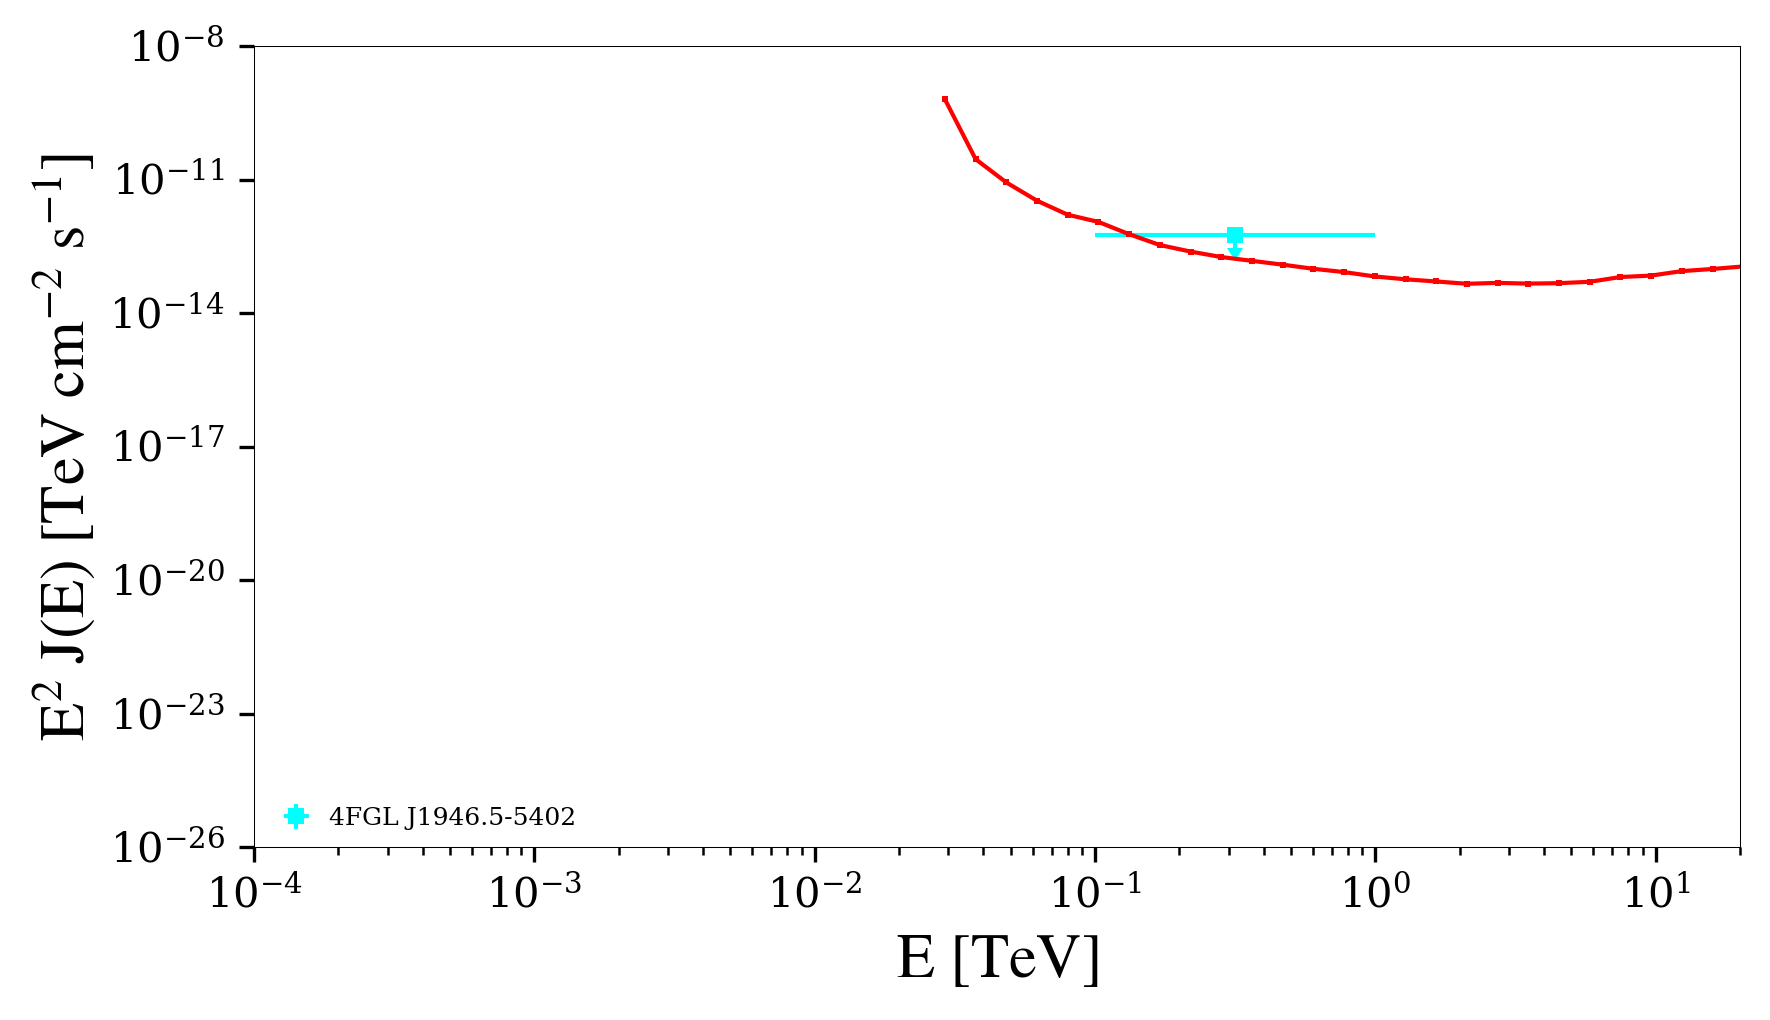

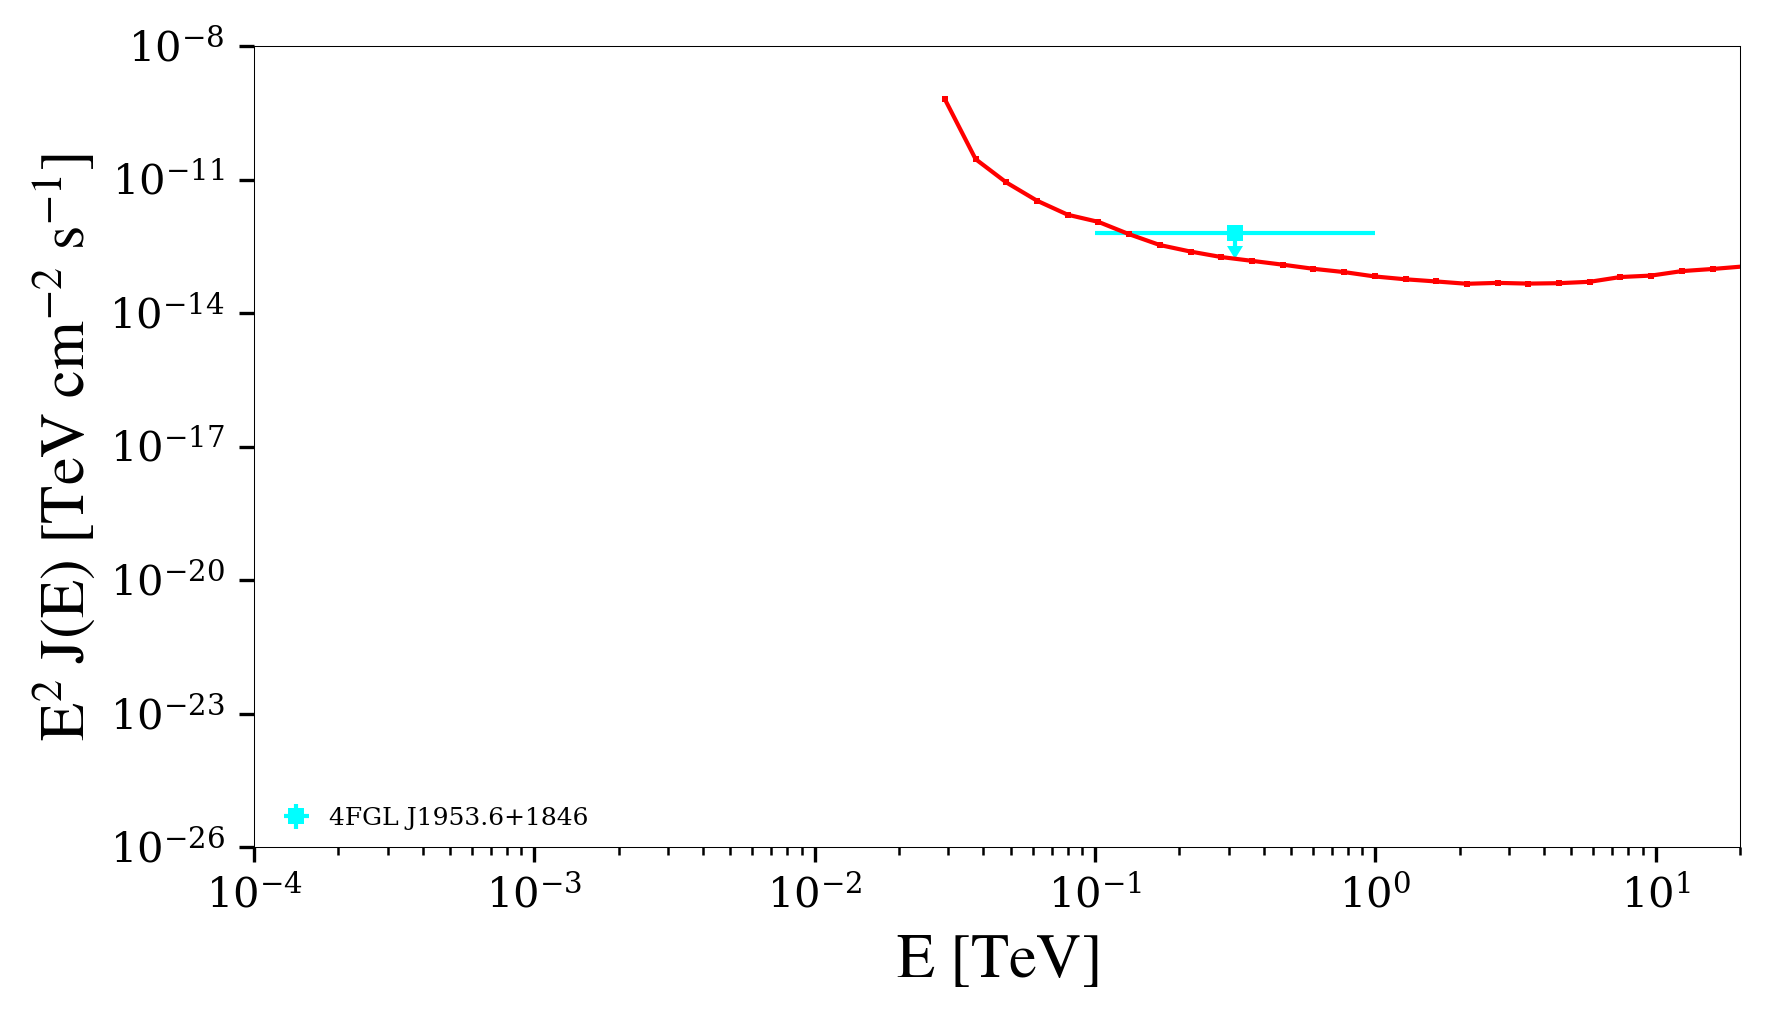

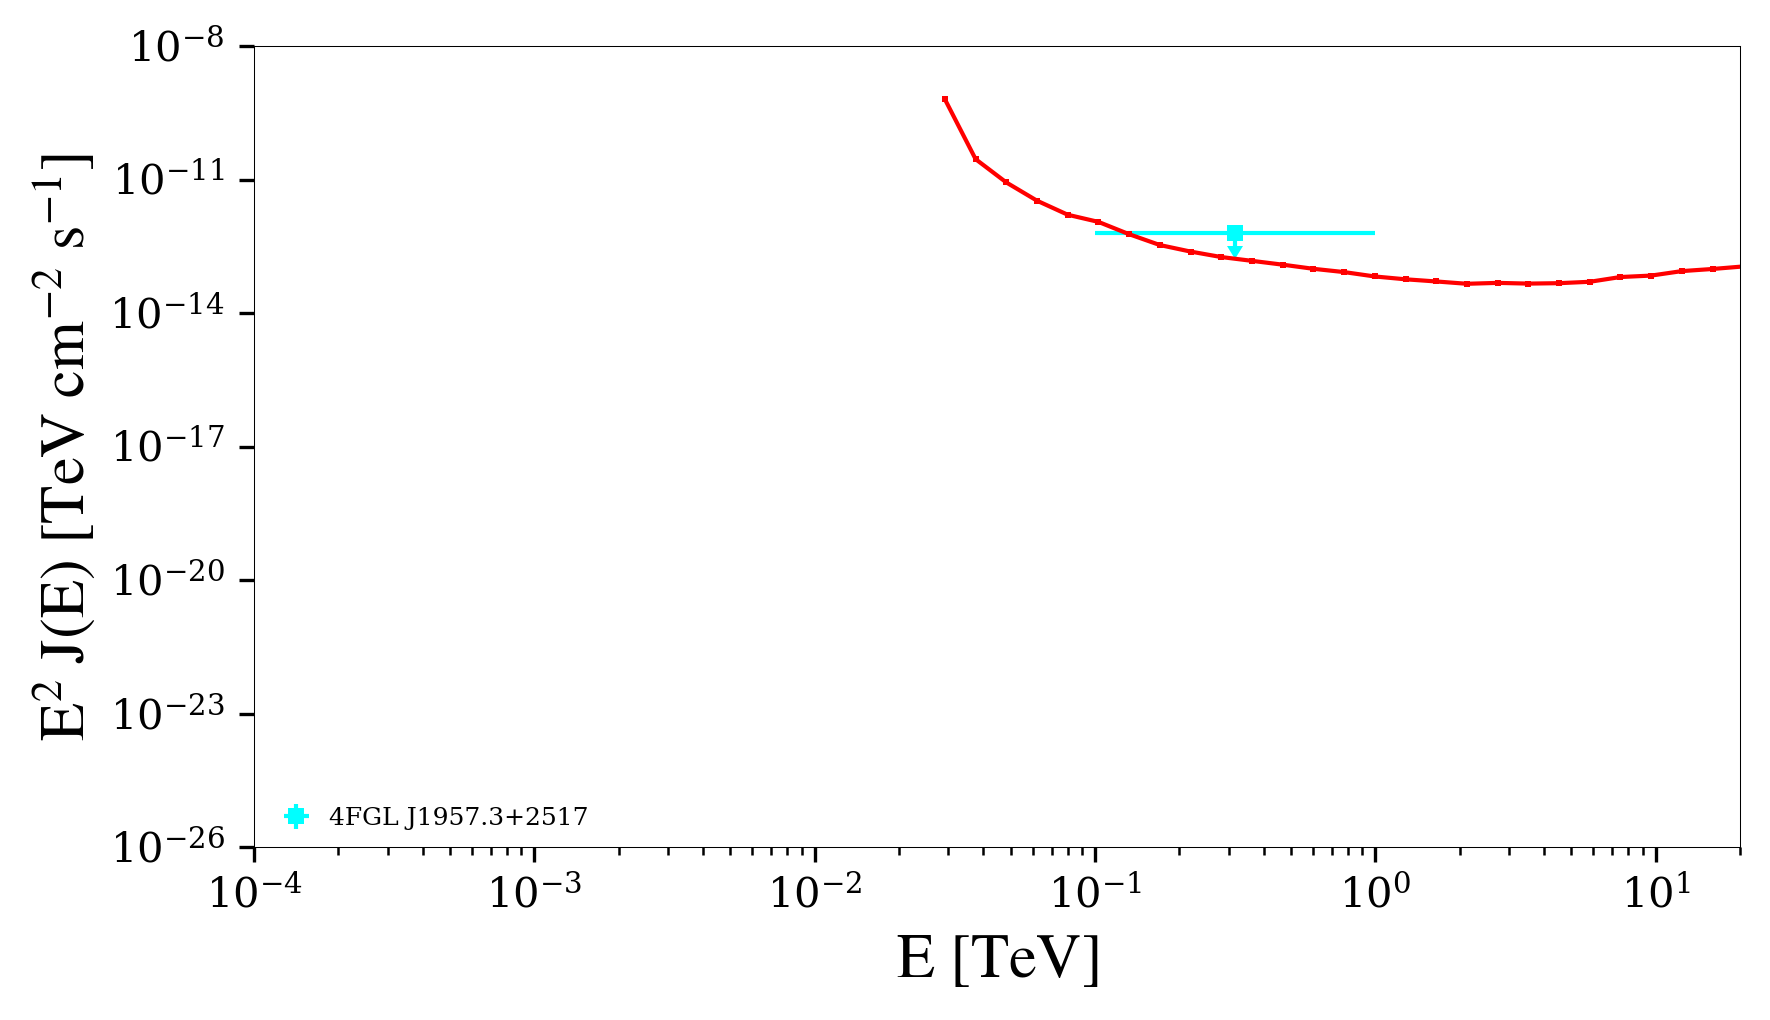

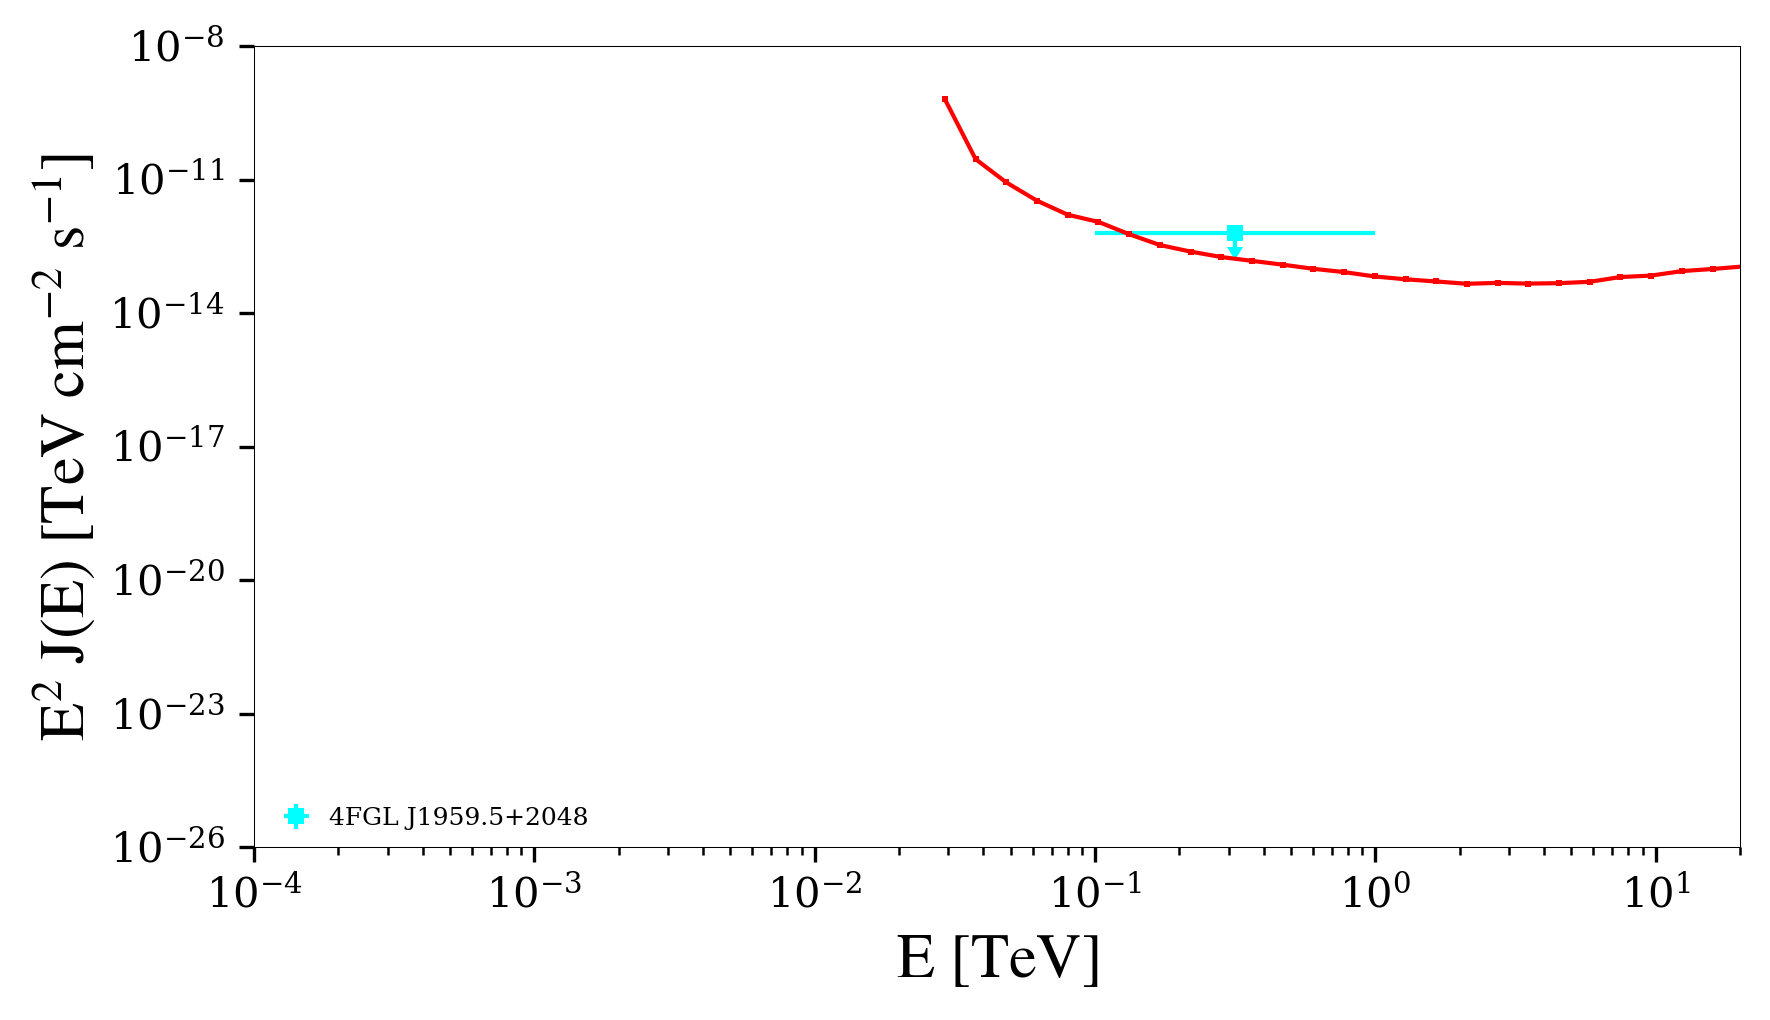

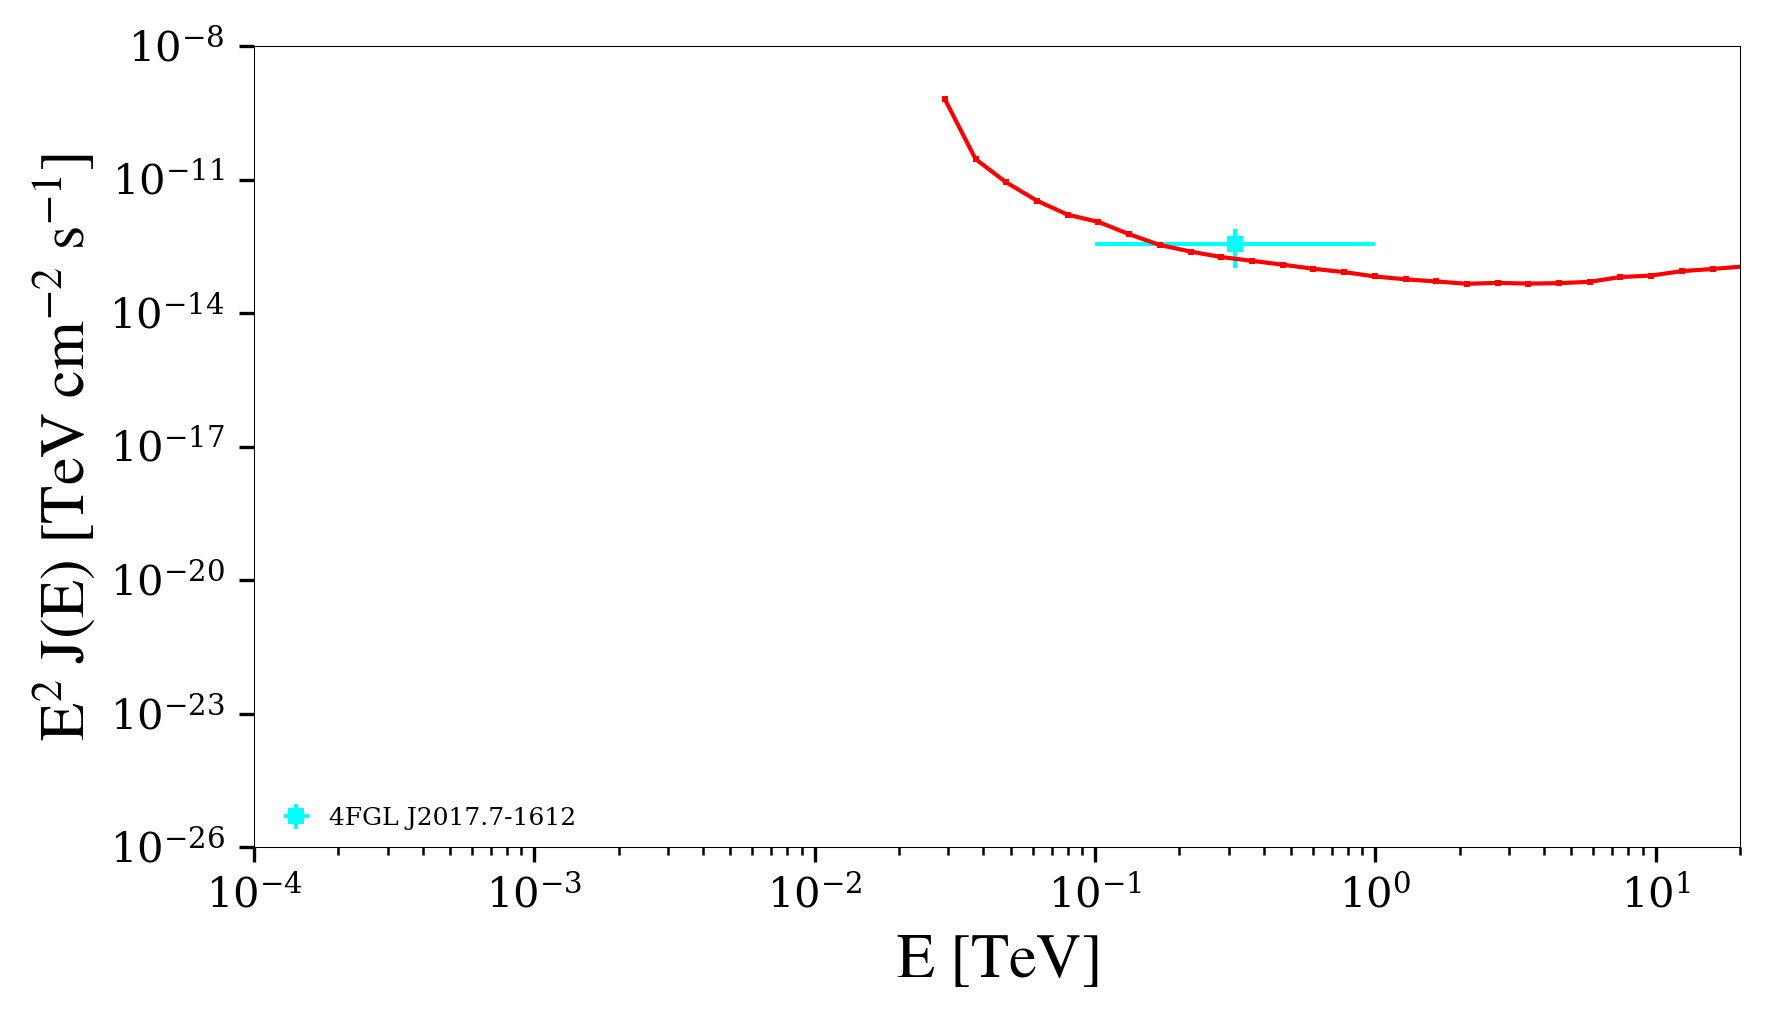

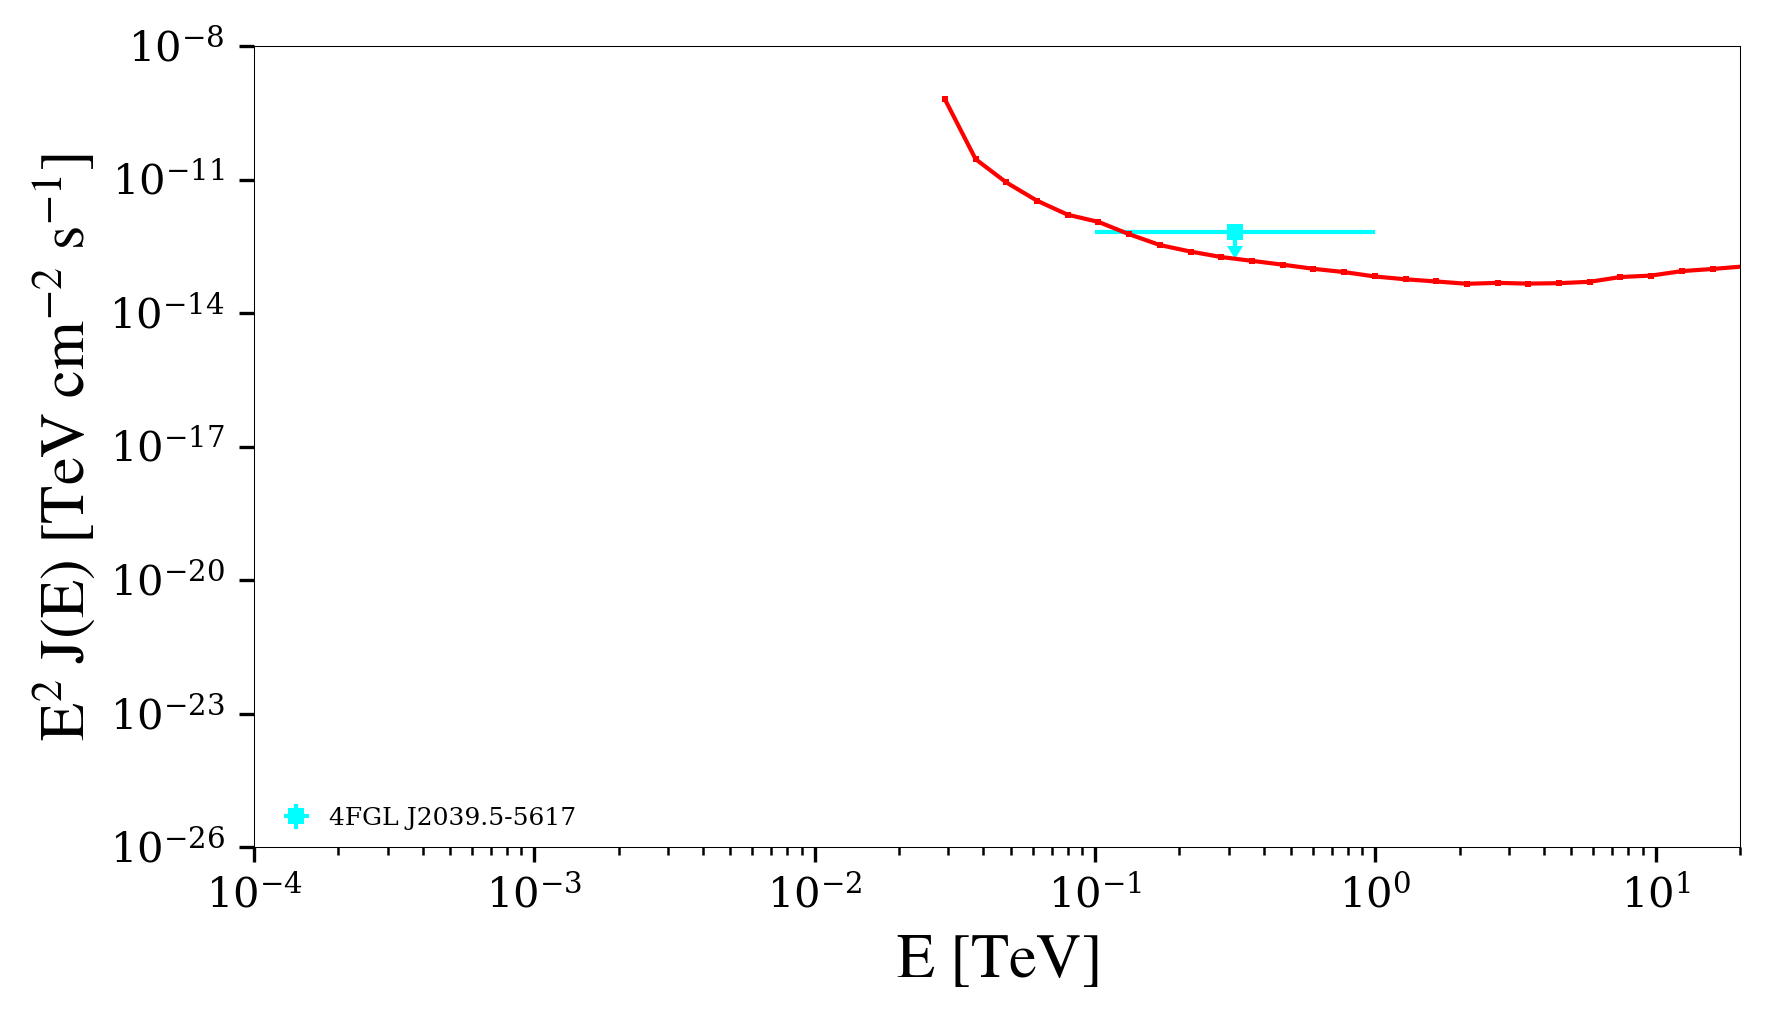

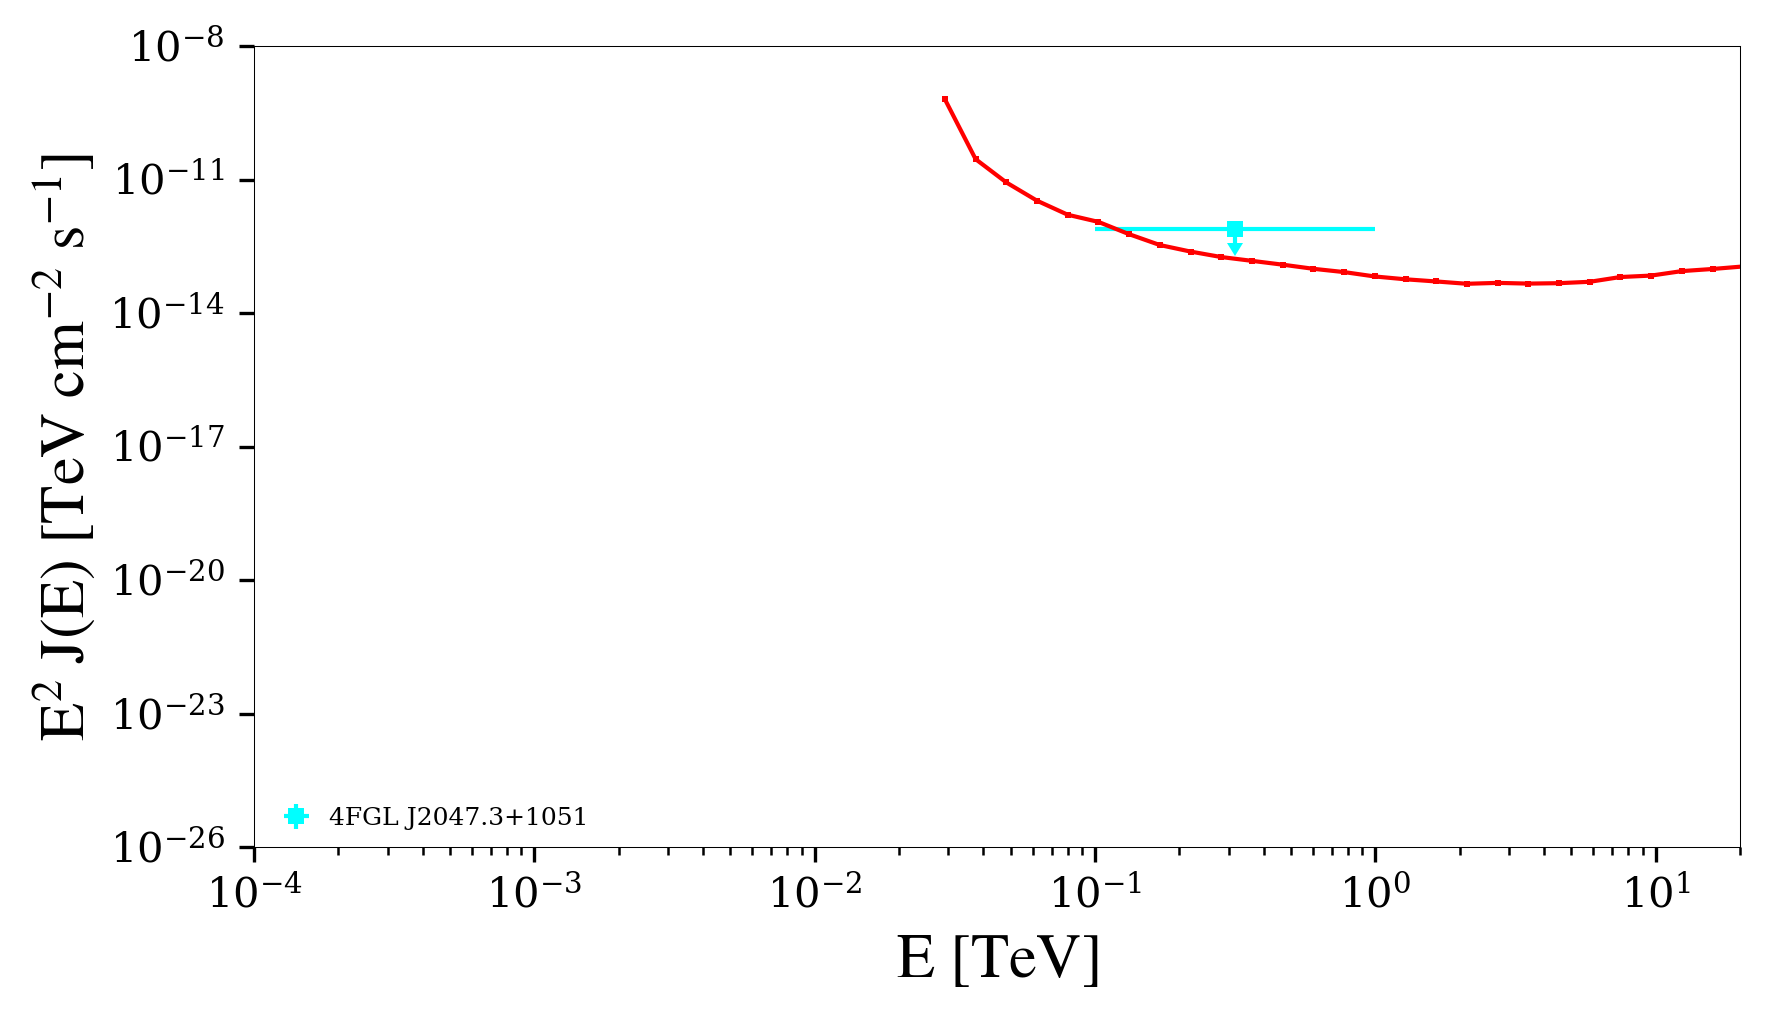

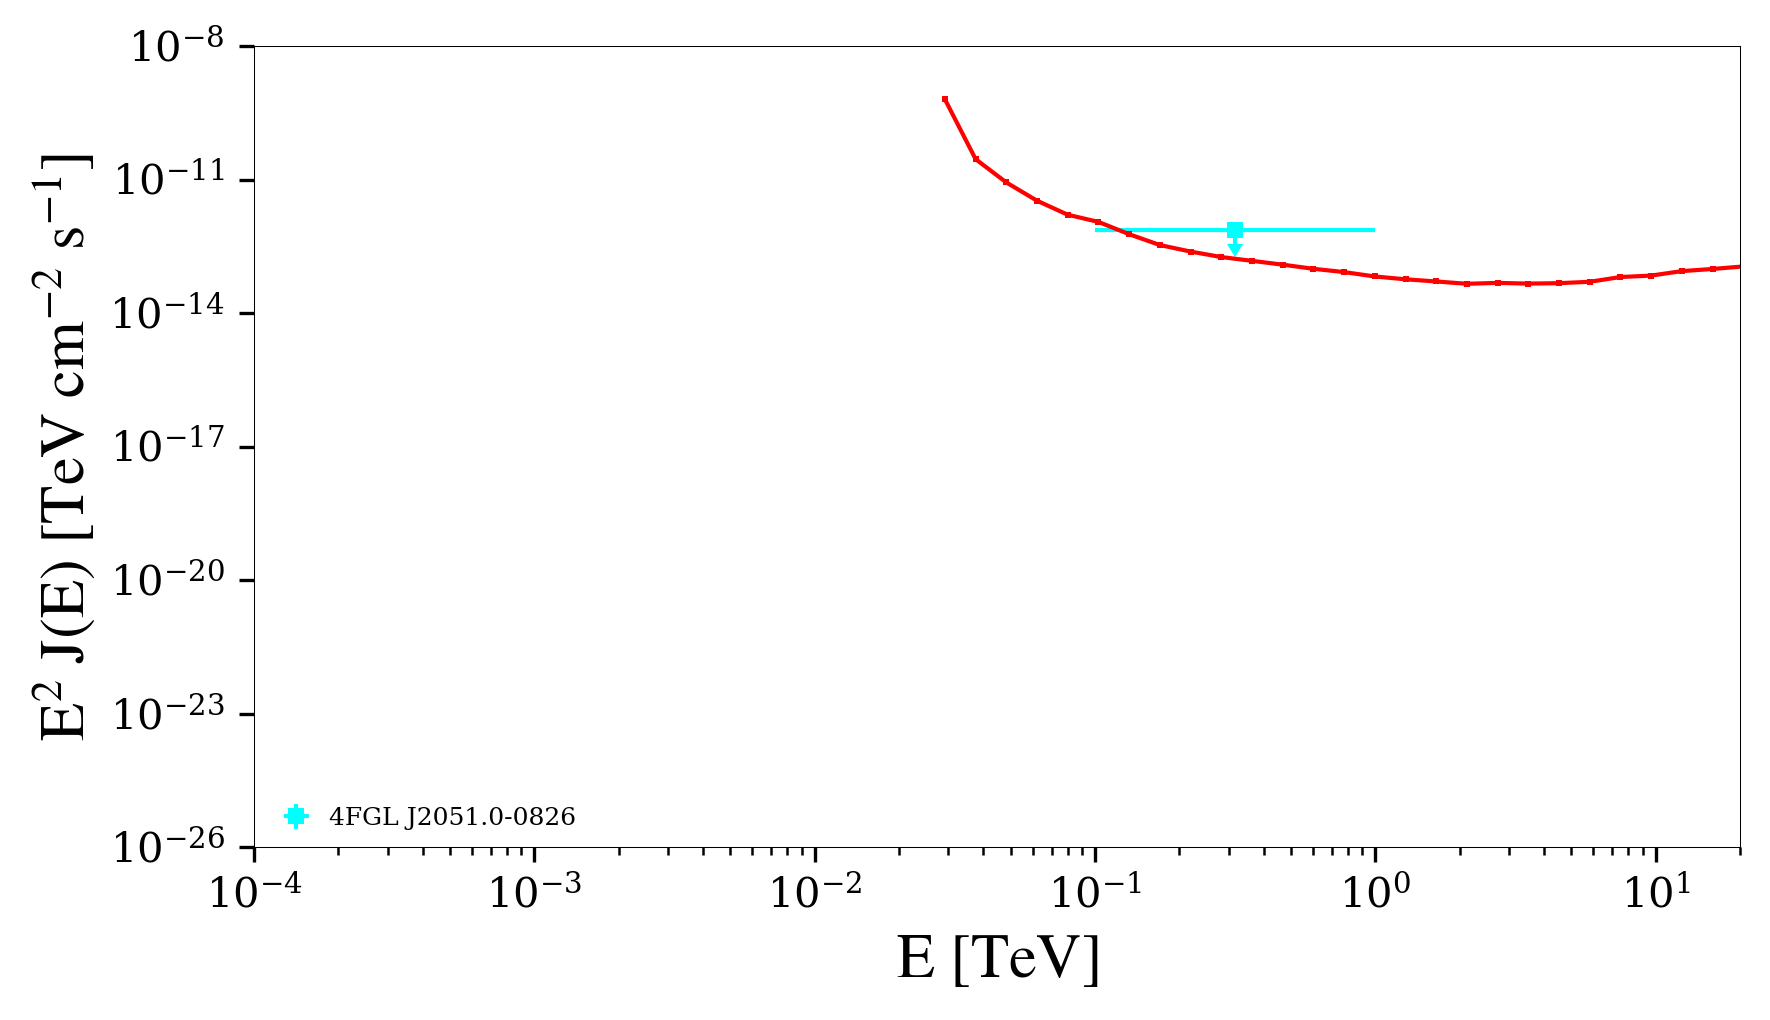

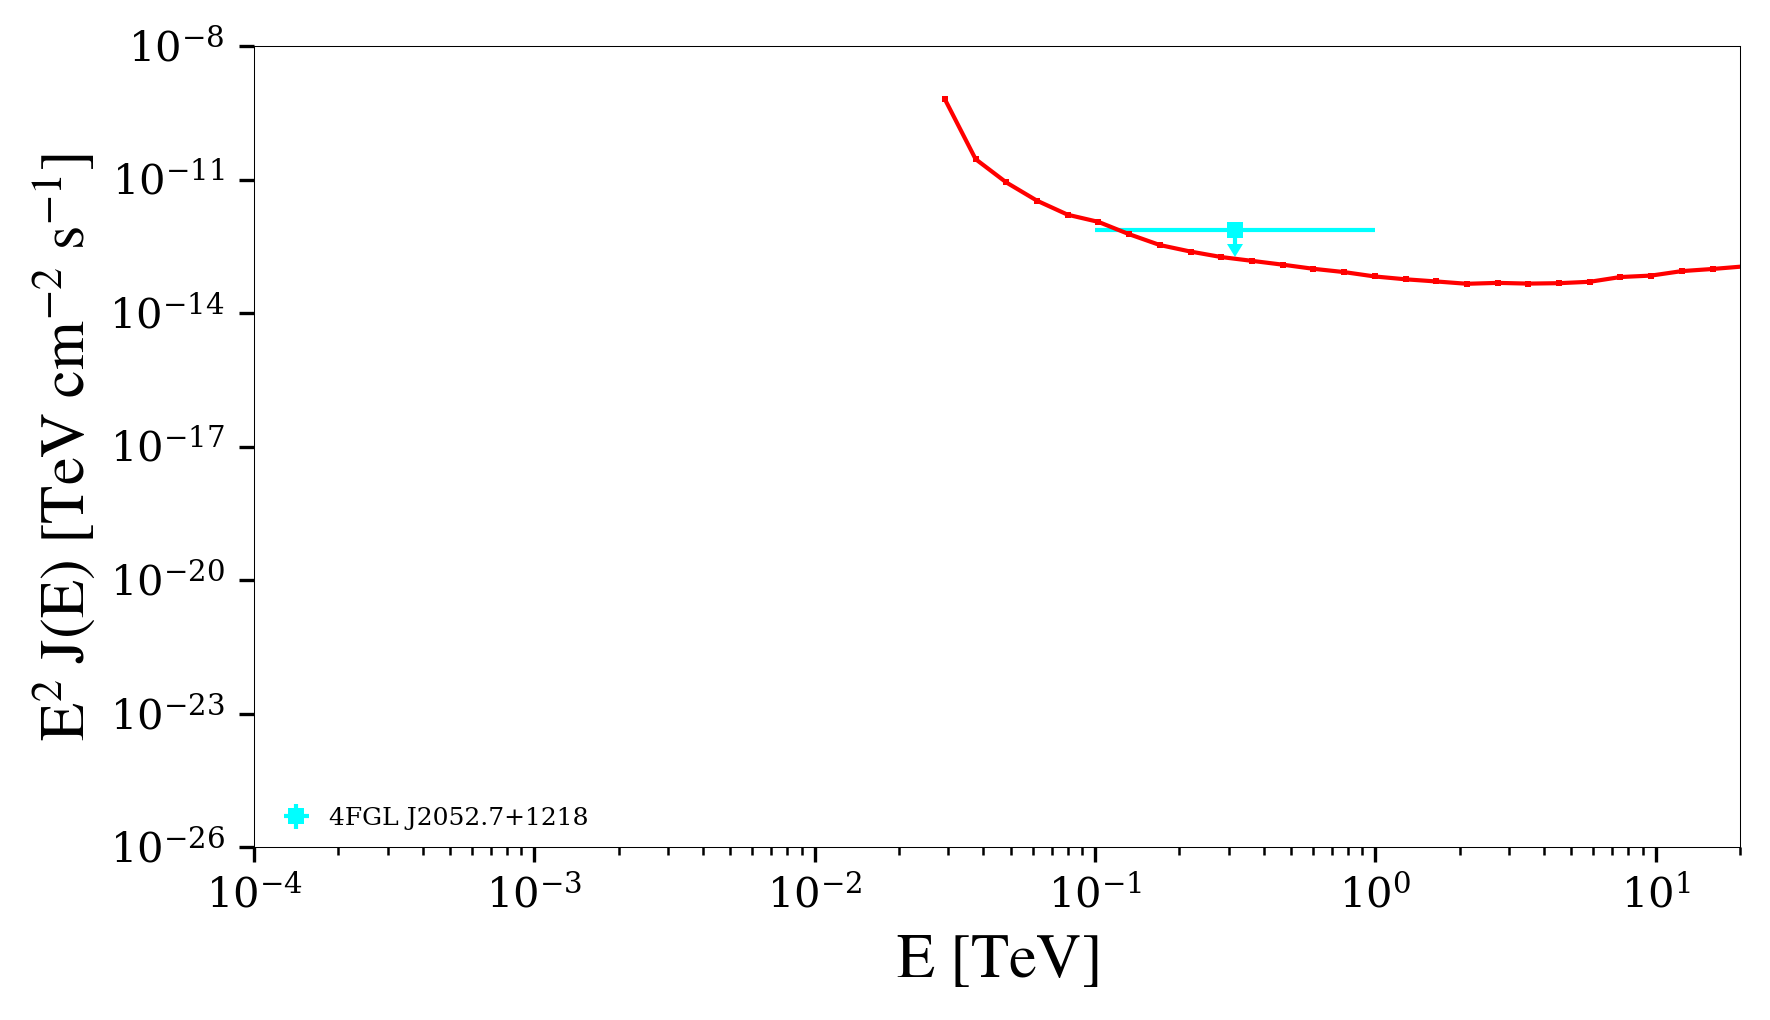

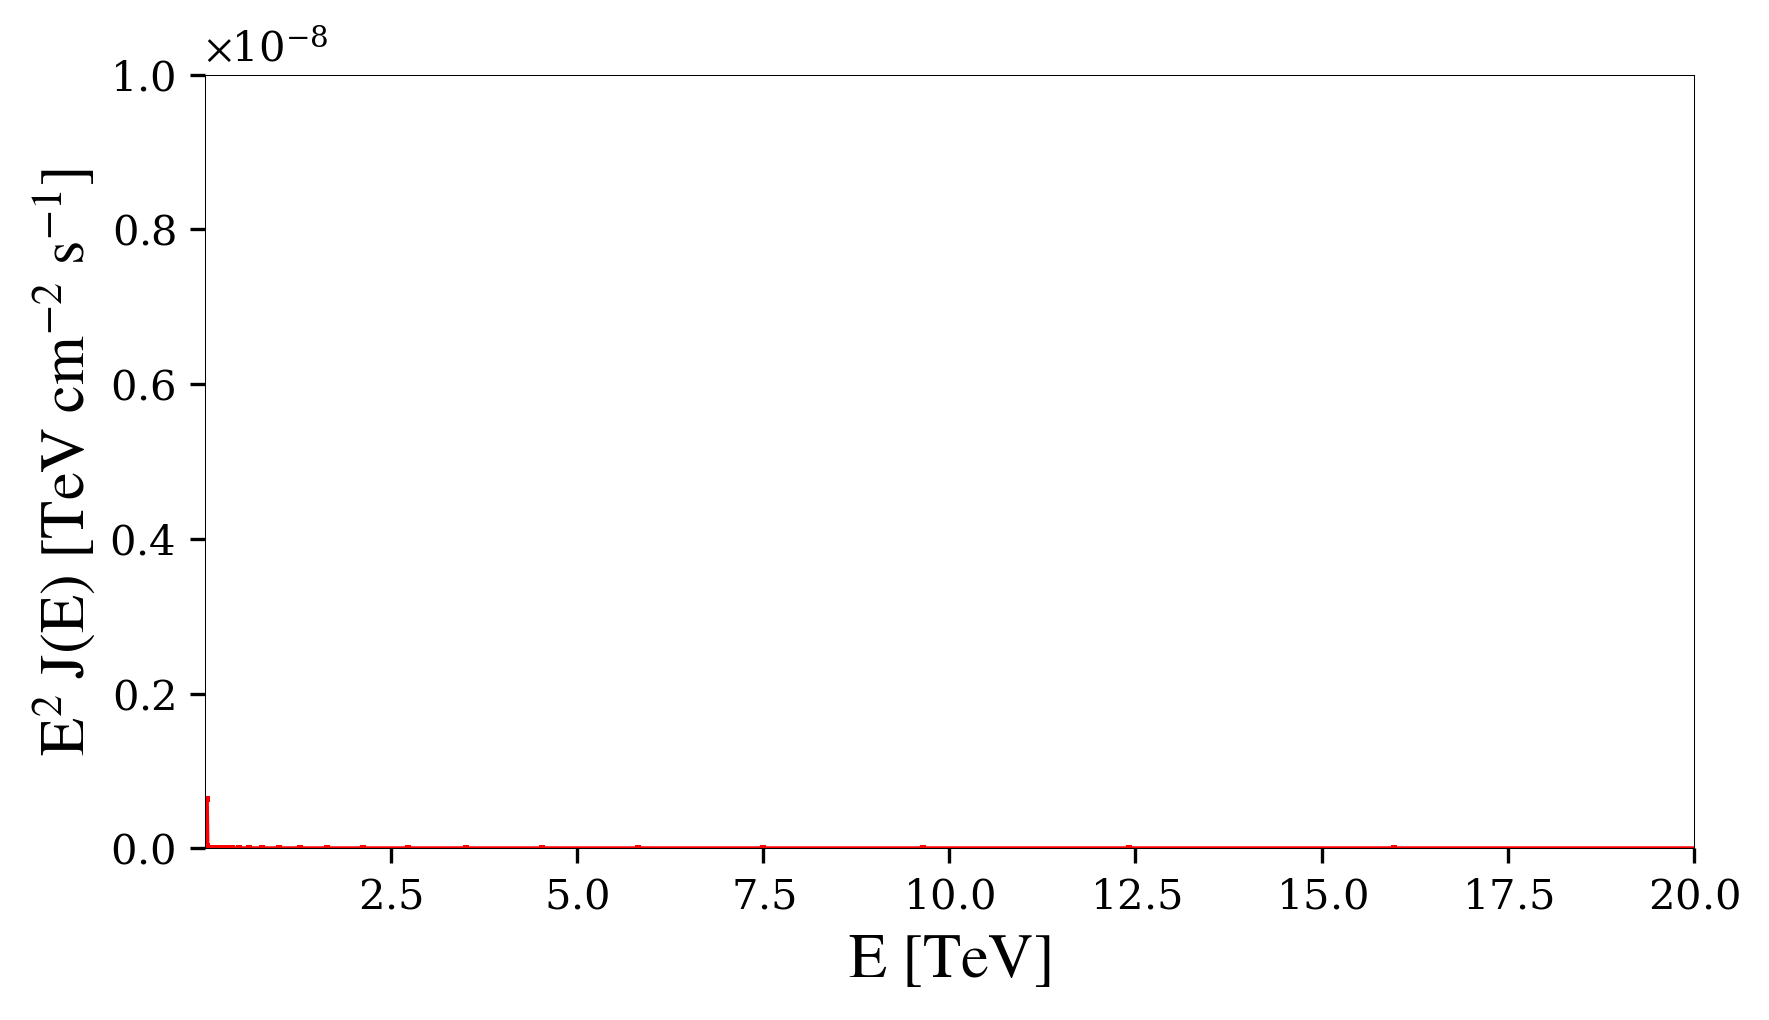

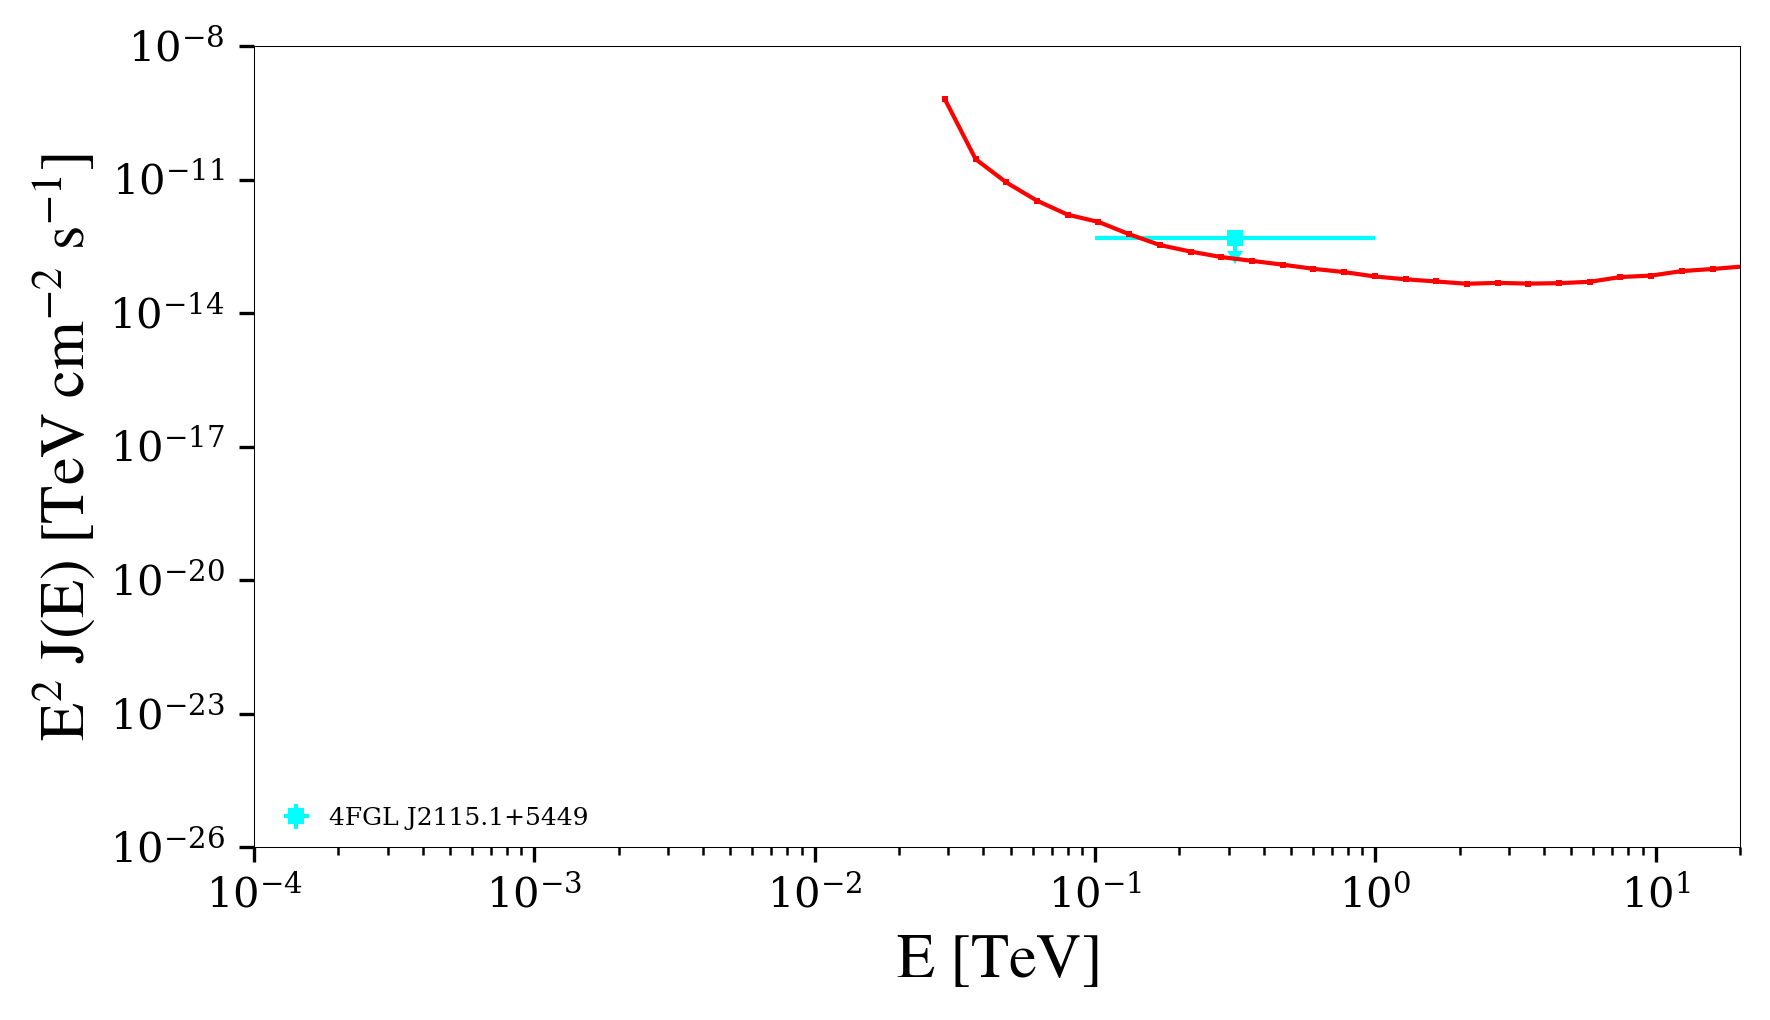

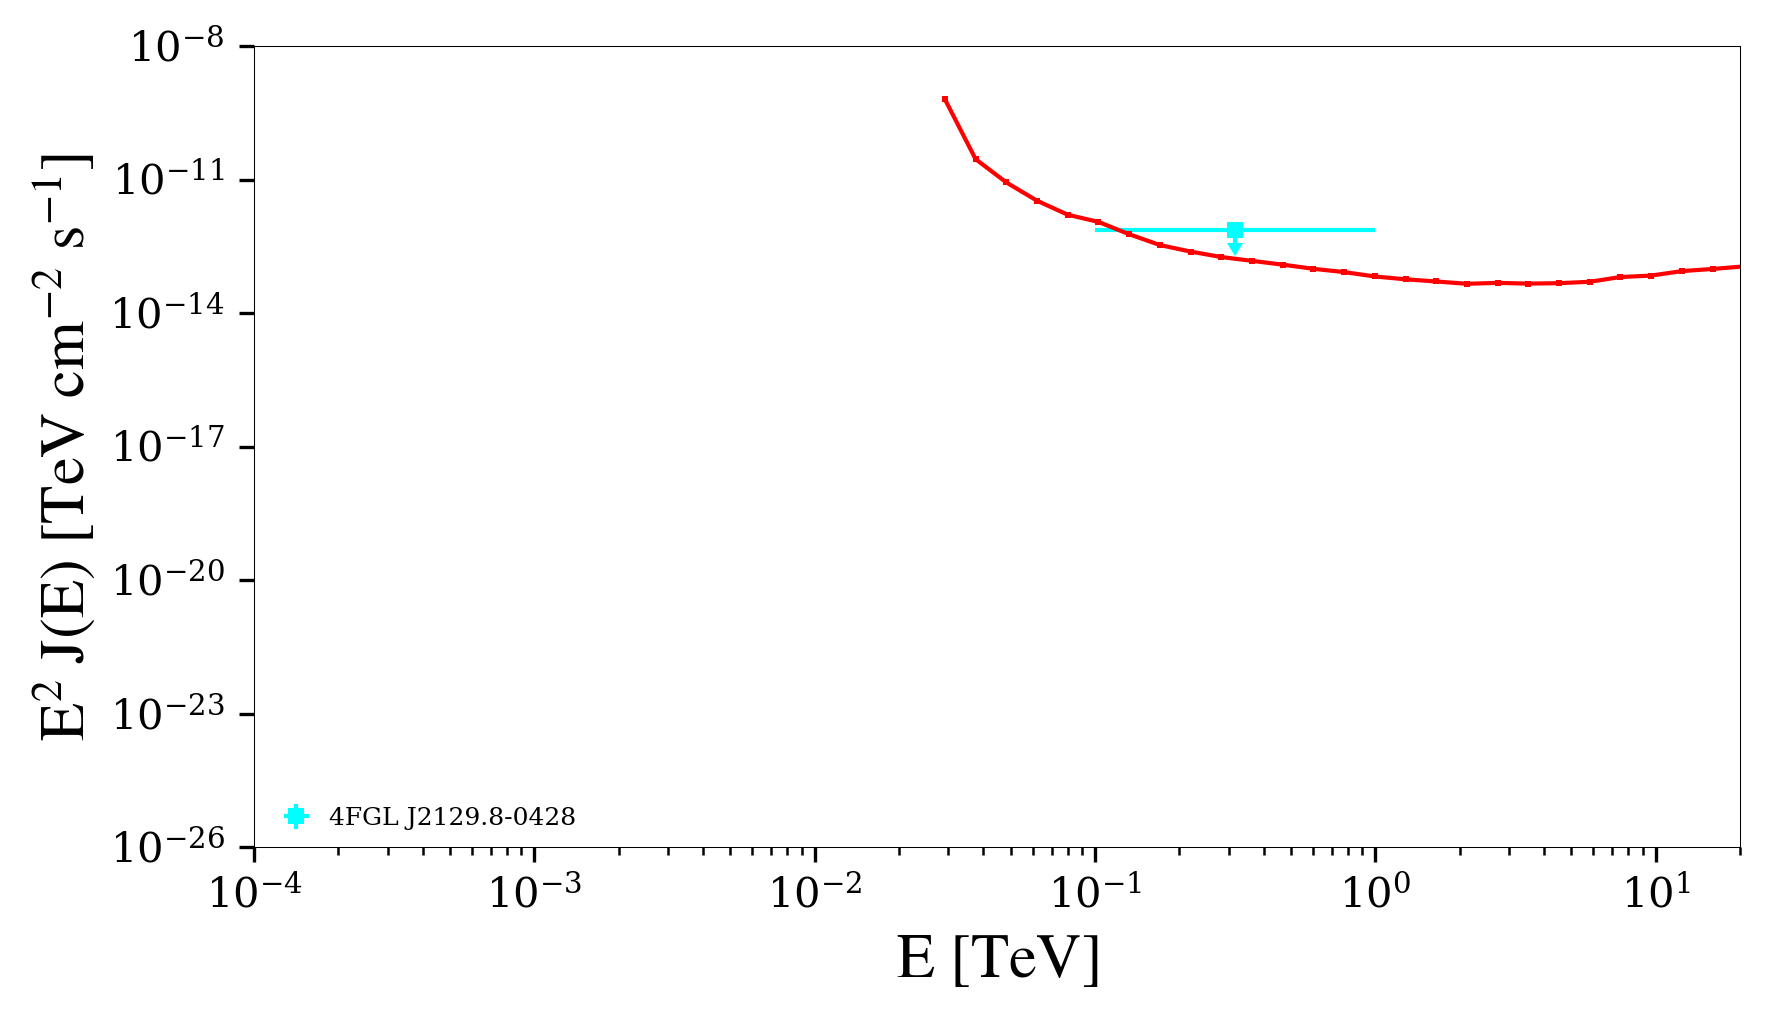

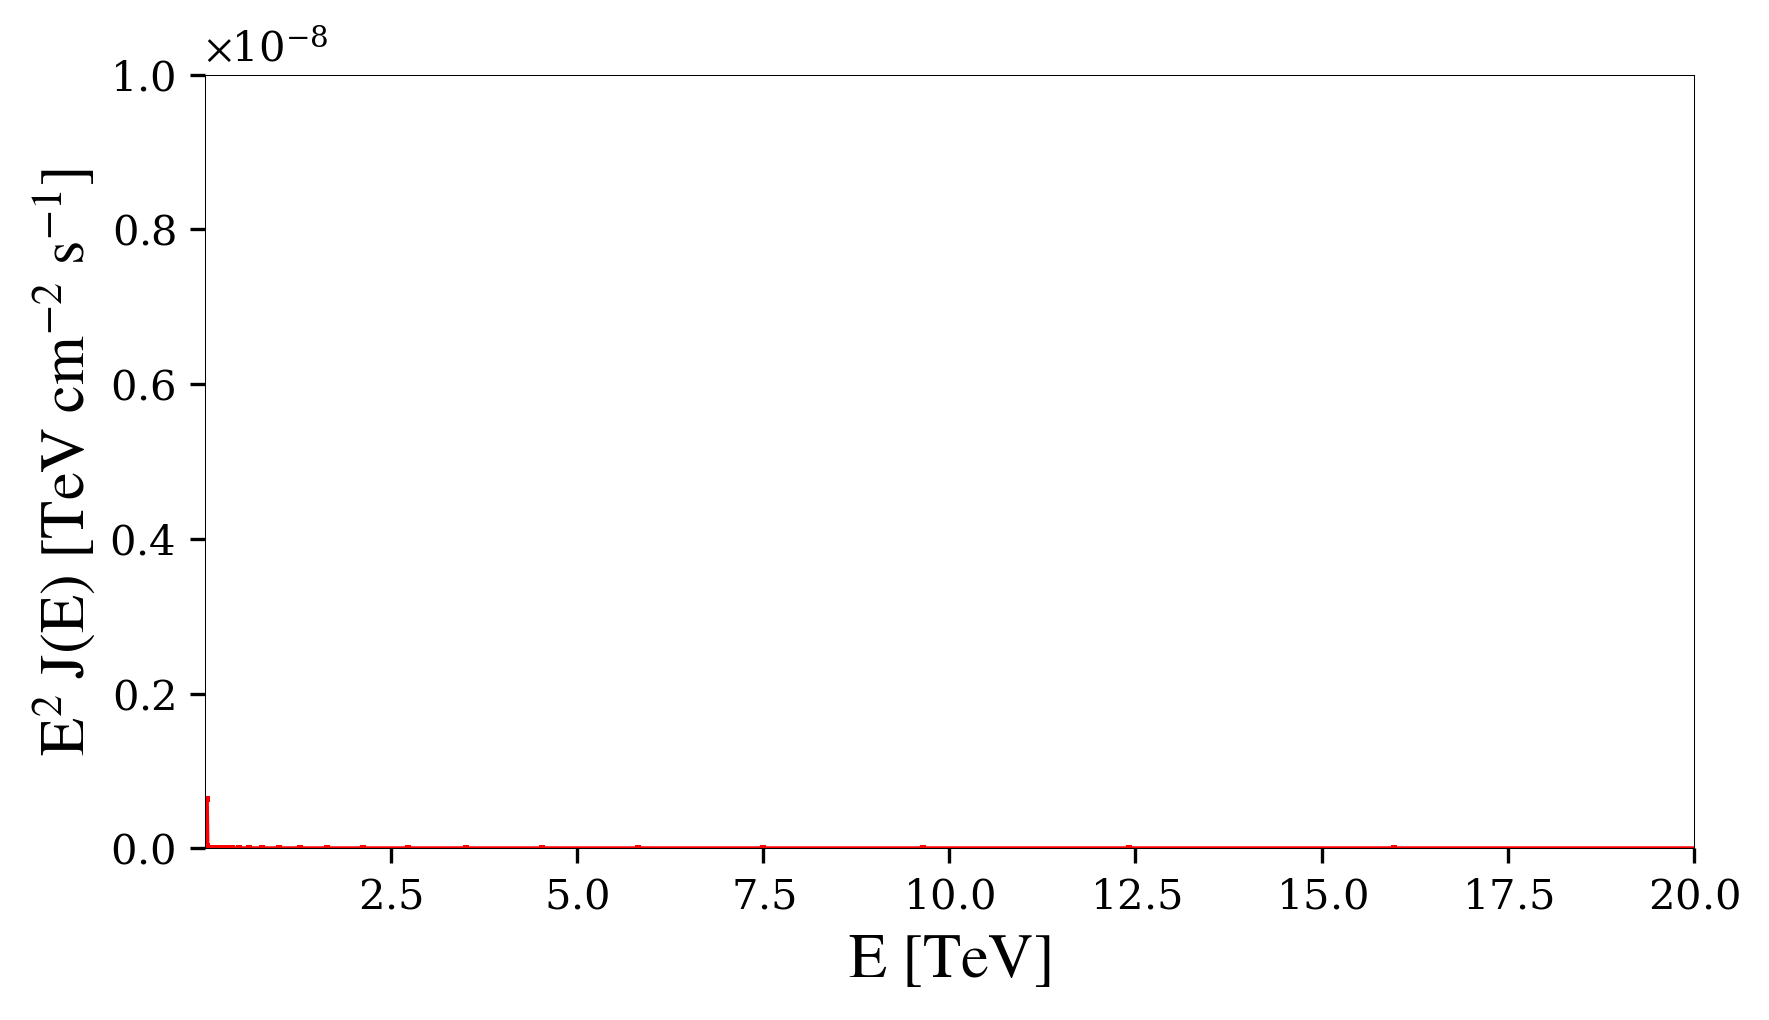

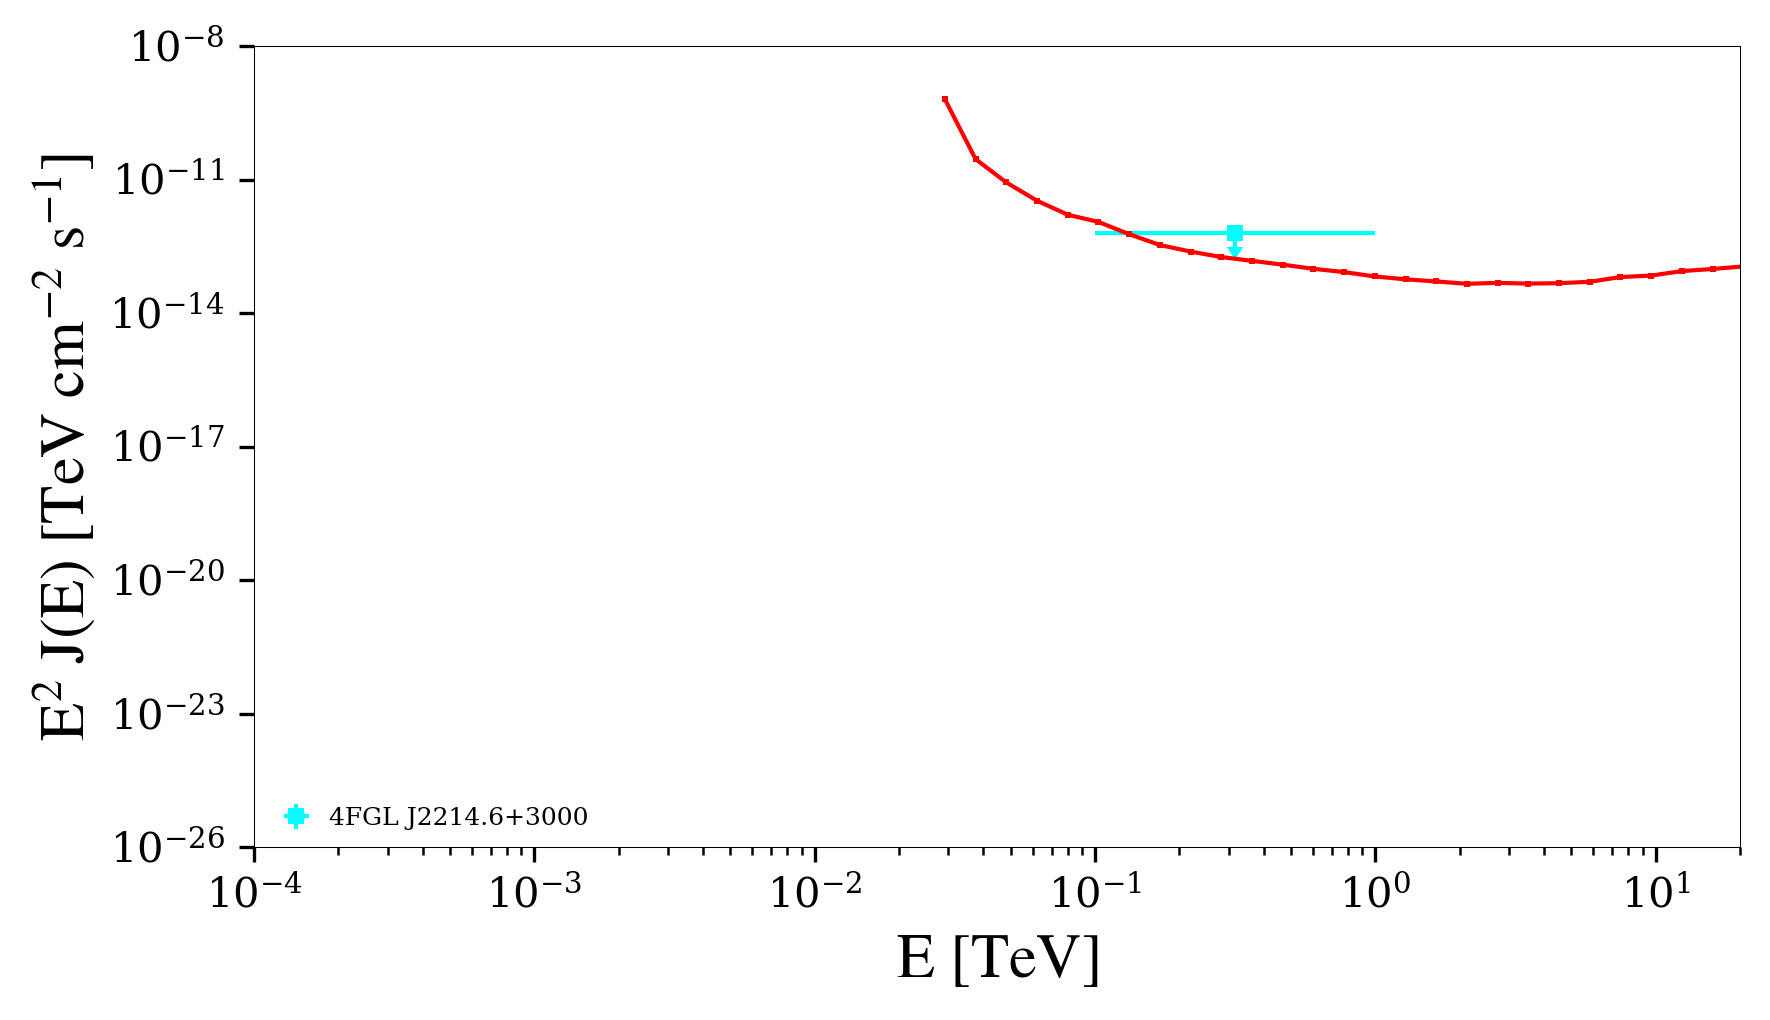

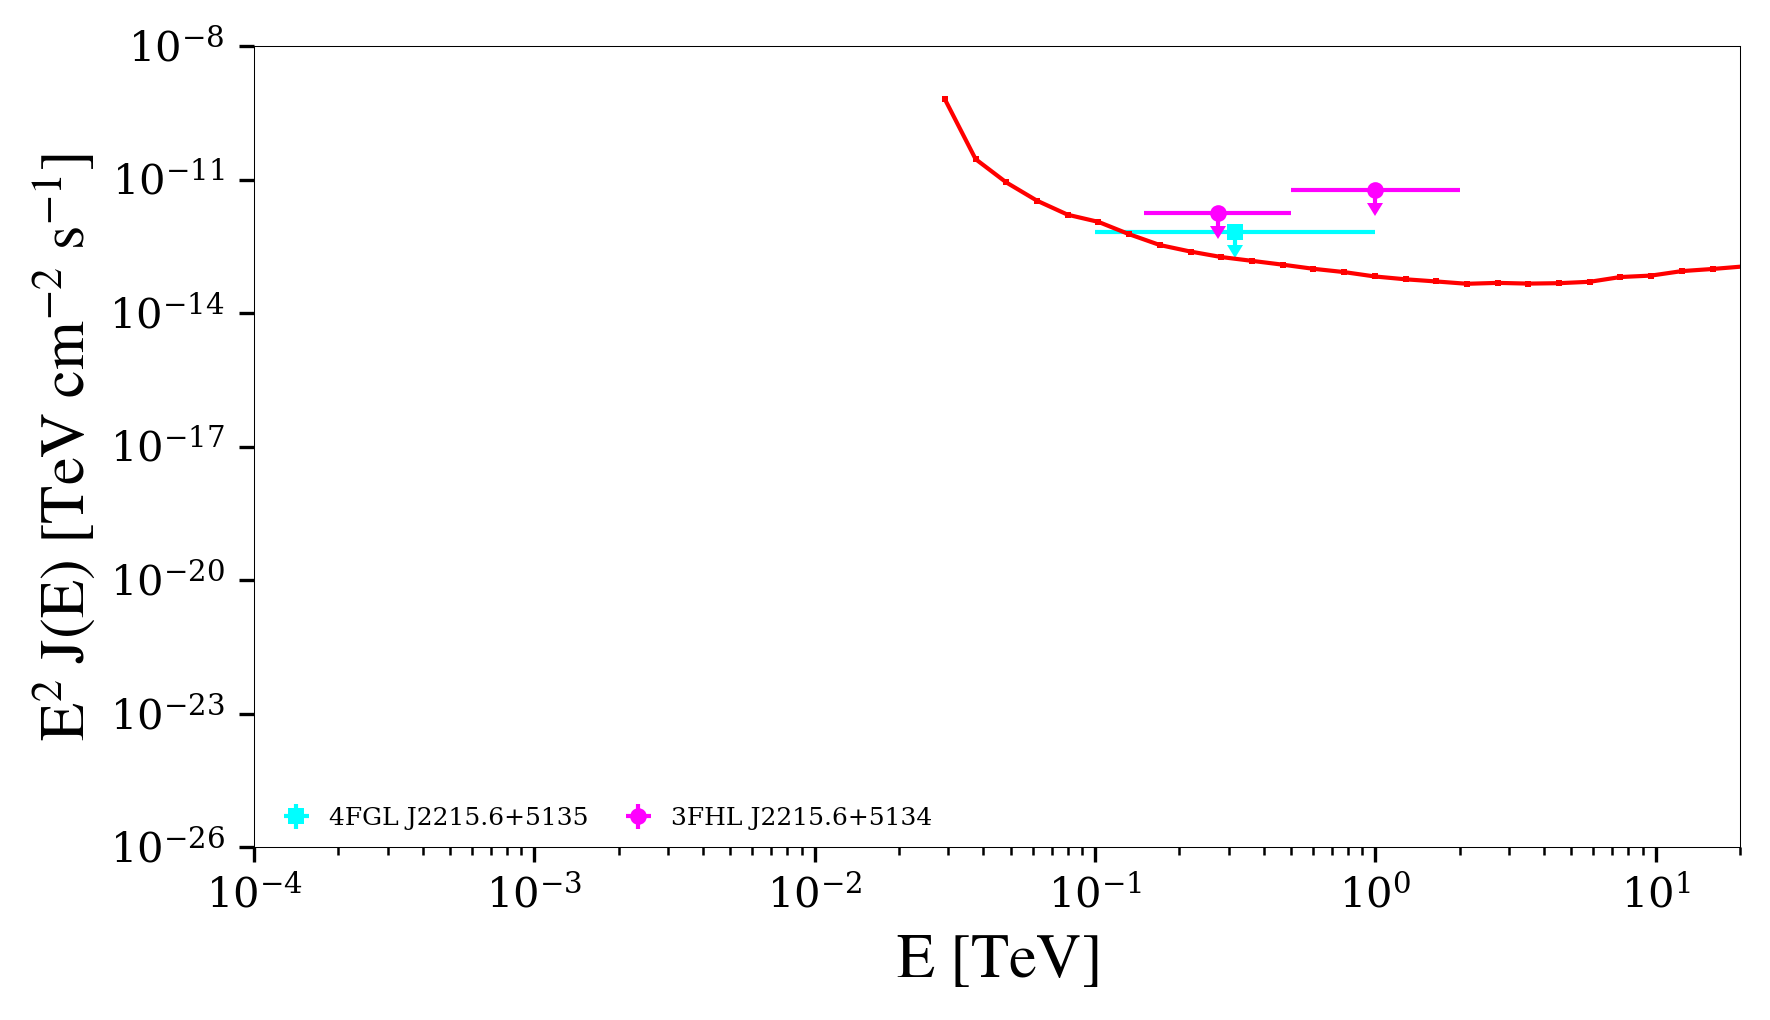

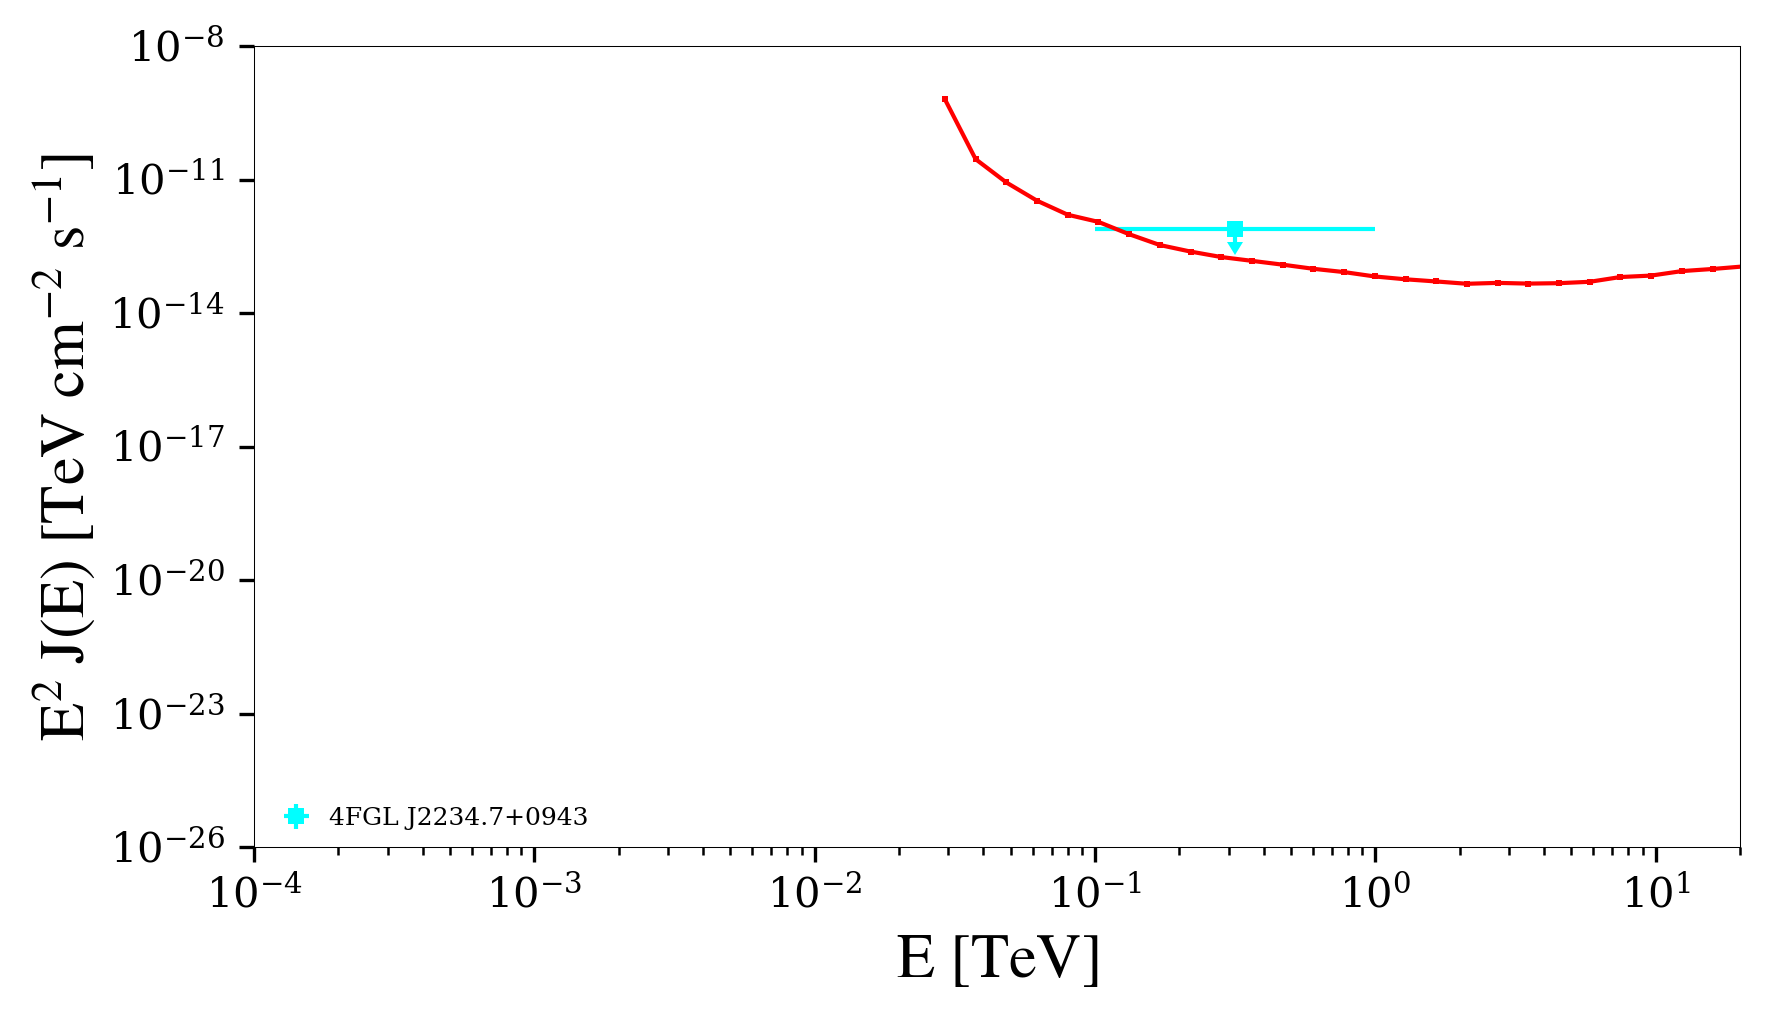

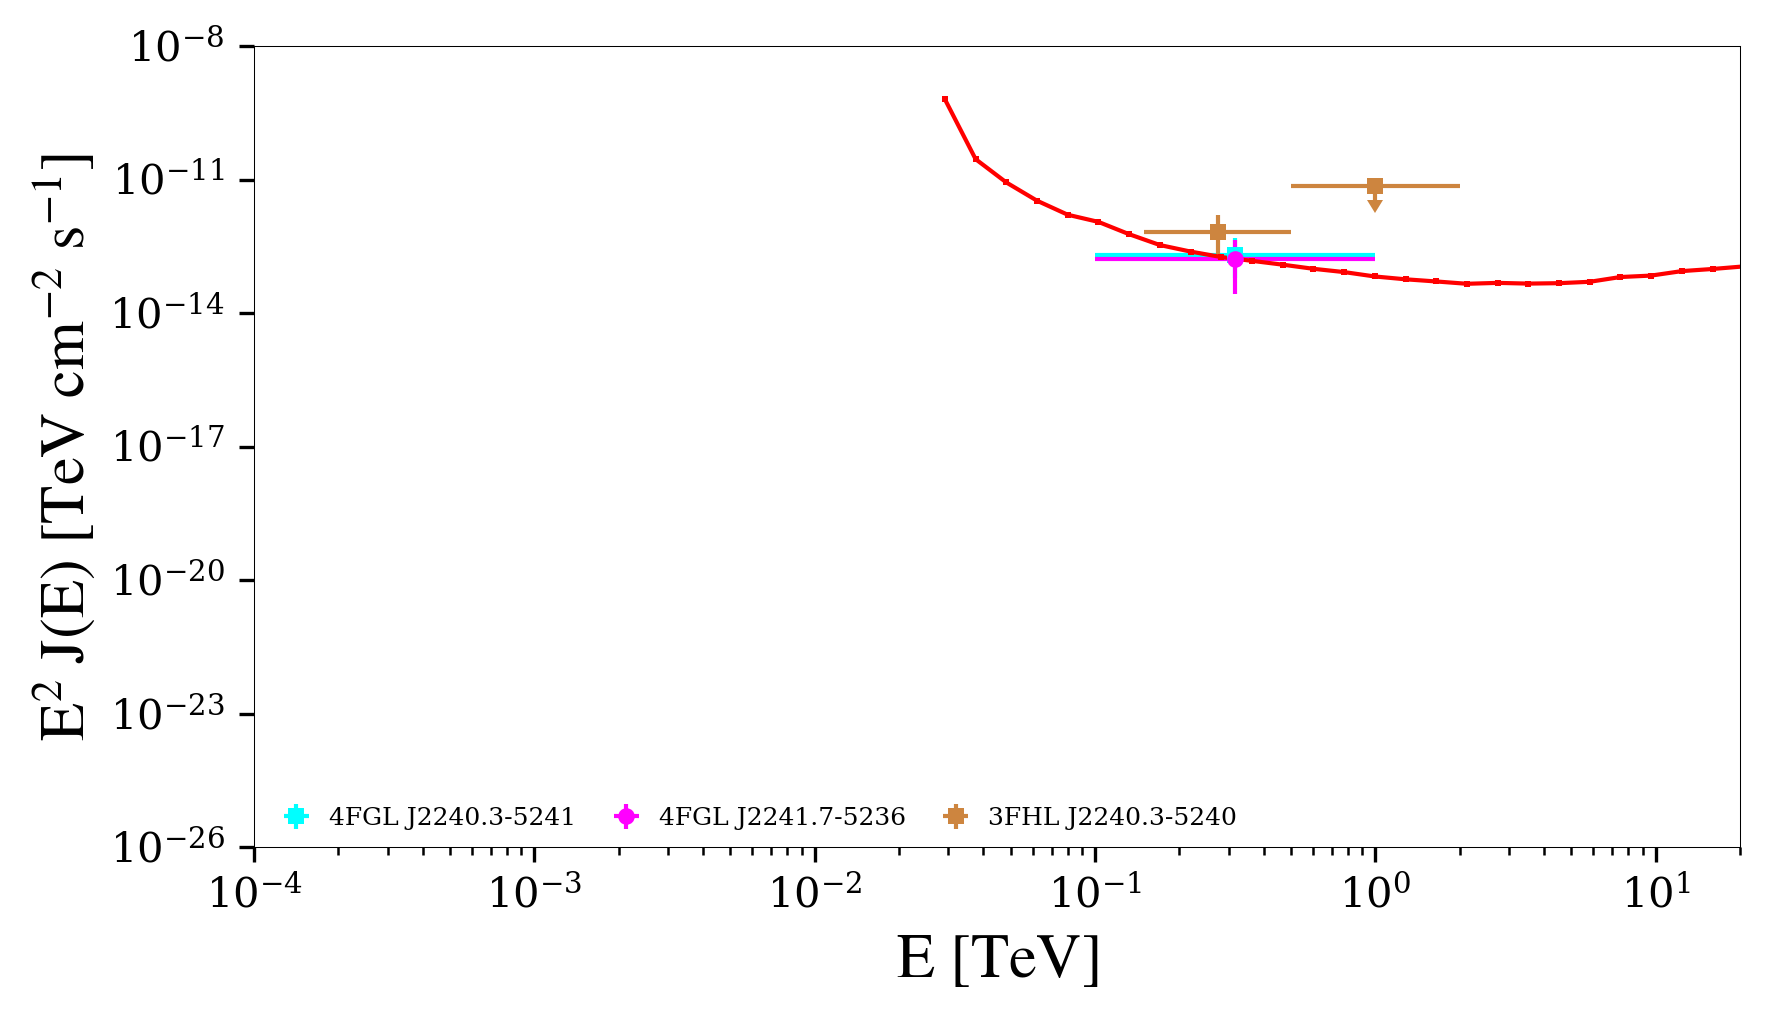

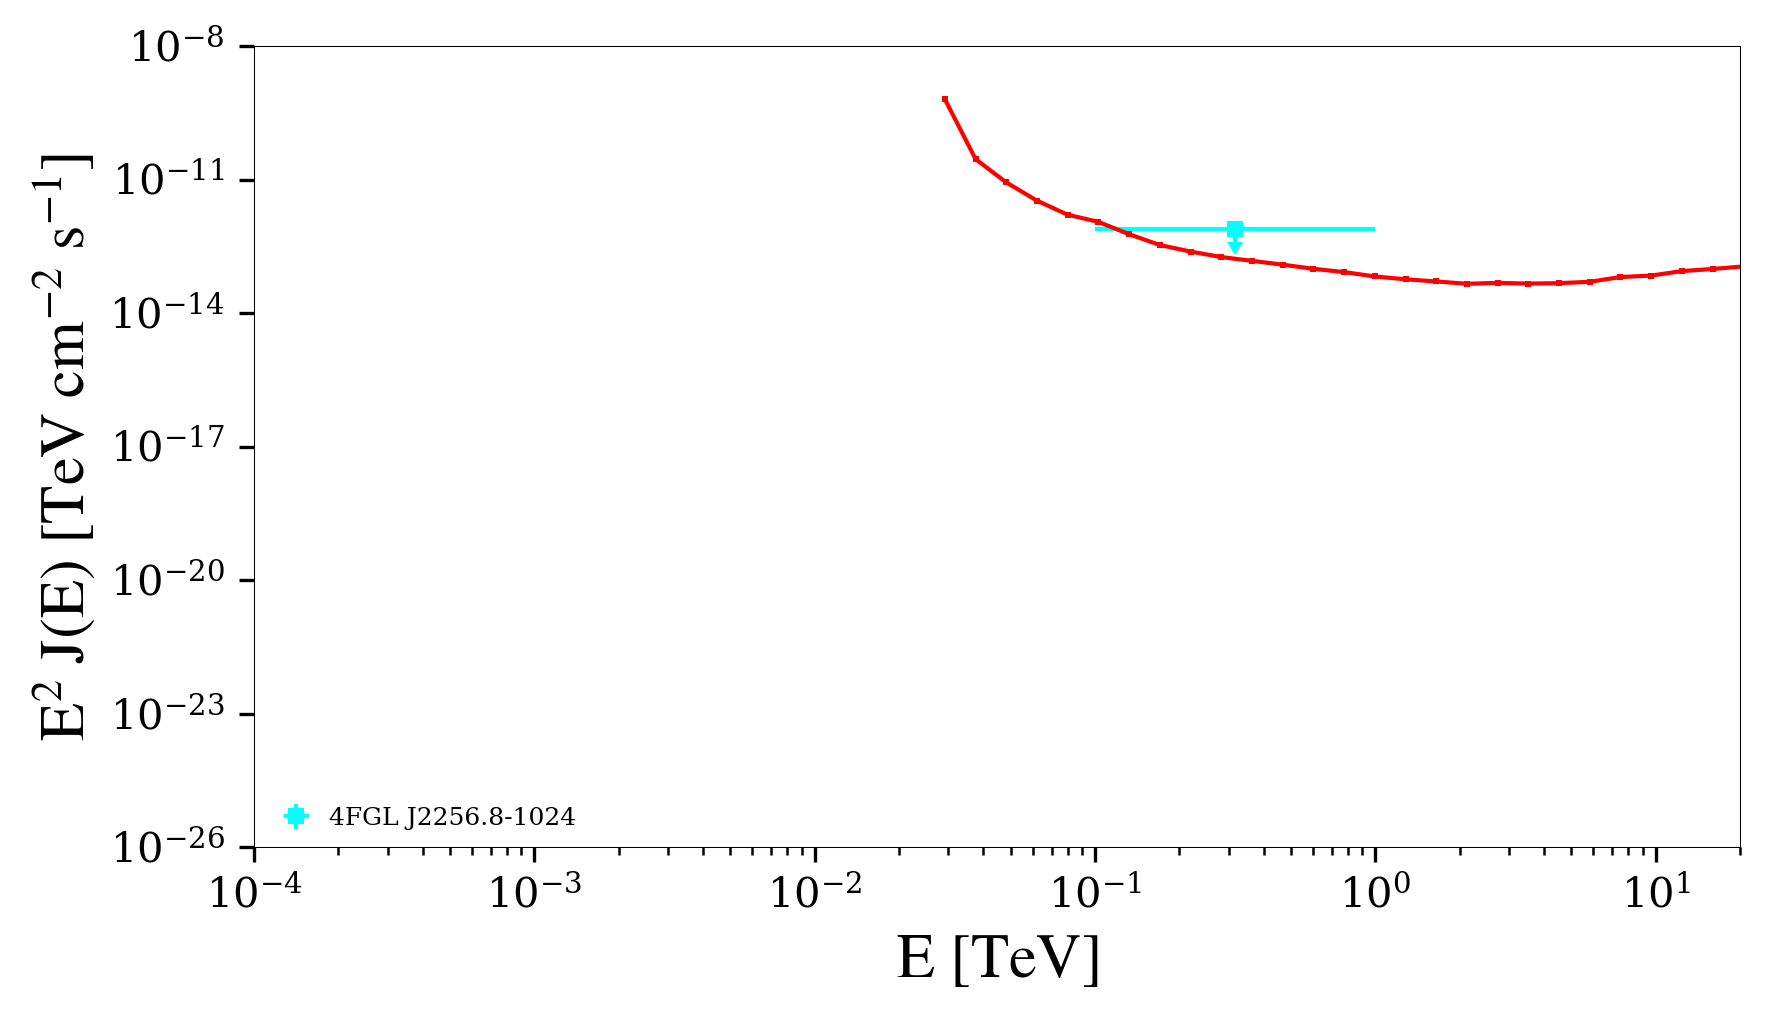

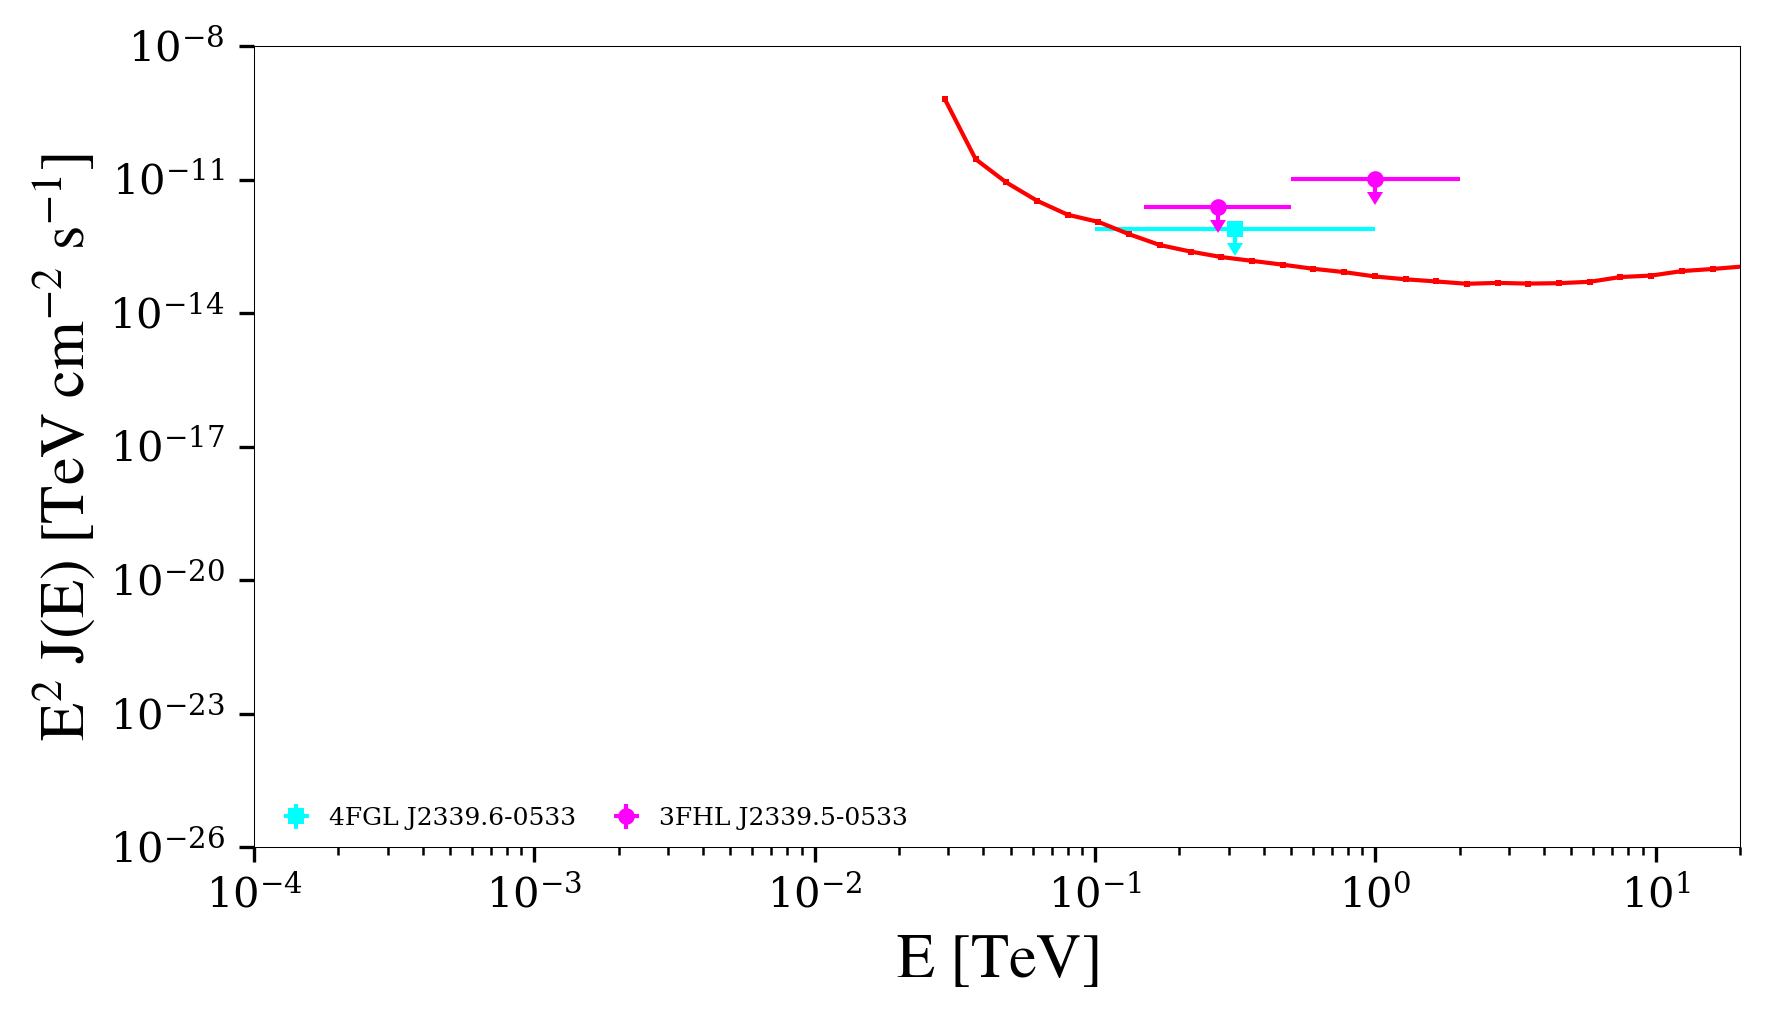

In [14]:
for _, system_data in enumerate(tqdm(spider_systems)):
    output_dir = utl.create_output_dir("./roi_analysis_output", system_data.source_name)

    source_info = utl.set_source_info(system_data)
    
    region_of_interest = utl.create_region_of_interest(
        source_info=source_info, 
        radius_roi=0.5, 
        e_ref_min=0.1 * u.TeV,
        e_ref_max=None,
    )
    
    file = open(f"{output_dir}/{region_of_interest['roi_name']}.log", "w")
    file.write(pprint.pformat(region_of_interest) + "\n\n")
    
    get_datasets_flux_points_gammapy = (redirect_stdout(write_func=to_log_file, file=file))(gammapy_cat.get_datasets_flux_points_gammapy)
    sources_gammapy, datasets_gammapy, models_gammapy = get_datasets_flux_points_gammapy(region_of_interest)
    
    datasets_roi = datasets_gammapy.copy()
    
    datasets_name = "region_of_interest" 
    utl.write_datasets_models(datasets_roi,region_of_interest, datasets_name)
    
    datasets_read = utl.read_datasets_models(region_of_interest, "region_of_interest")
    
    energy_axis = MapAxis.from_energy_bounds("1e-4 TeV", "30 TeV", nbin=50)

    energy_axis_true = MapAxis.from_energy_bounds(
        "1e-4 TeV", "100 TeV", nbin=100, name="energy_true"
    )
    
    center = region_of_interest["position"]
    
    geom_string = f"icrs;circle({center.ra.value}, {center.dec.value}, 2)"
    geom = RegionGeom.create(geom_string, axes=[energy_axis])
    
    empty_dataset = SpectrumDataset.create(geom=geom, energy_axis_true=energy_axis_true)

    #north_irf_path = "/Users/livia/Dropbox/PosDoc/Analysis/spider_systems/irfs/fits/CTA-Performance-prod5-v0.1-North-20deg.FITS/Prod5-North-20deg-AverageAz-4LSTs09MSTs.180000s-v0.1.fits"
    south_irf_path = "./irfs/fits/CTA-Performance-prod5-v0.1-South-20deg.FITS/Prod5-South-20deg-AverageAz-14MSTs37SSTs.180000s-v0.1.fits"
    
    irfs = load_irf_dict_from_file(south_irf_path)
    location = observatory_locations["cta_south"]
    livetime = 50.0 * u.h
    
    obs = Observation.create(
        pointing=center, irfs=irfs, livetime=livetime, location=location
    )
    
    spectrum_maker = SpectrumDatasetMaker(selection=["exposure", "edisp", "background"])
    dataset = spectrum_maker.run(empty_dataset, obs)
    
    containment = 0.68

    # correct exposure
    dataset.exposure *= containment

    # correct background estimation
    on_radii = obs.psf.containment_radius(
        energy_true=energy_axis.center, offset=0 * u.deg, fraction=containment
    )
    factor = (1 - np.cos(on_radii)) / (1 - np.cos(geom.region.radius))
    dataset.background *= factor.value.reshape((-1, 1, 1))
    
    sensitivity_estimator = SensitivityEstimator(
        gamma_min=5, n_sigma=3, bkg_syst_fraction=0.10
    )
    
    dataset_on_off = SpectrumDatasetOnOff.from_spectrum_dataset(
        dataset=dataset, acceptance=1, acceptance_off=5
    )
    
    sensitivity_table = sensitivity_estimator.run(dataset_on_off)
    
    t = sensitivity_table

    e2dnde_to_tev = t["e2dnde"] * 0.62
    
    dict_leg_style = plotter.set_leg_style({}, datasets = datasets_roi, color = None, marker = None)
    
    sed_type = cfg.sed_type_e2dnde
    dict_plot_axis = dict(
        label =  (r'$\rm{E\ [TeV] }$', r'$\rm{E^2\ J(E)\ [TeV\ cm^{-2}\ s^{-1}] }$'),
        units =  (          'TeV',                       'TeV  cm-2     s-1')
    )
    dict_leg_place = dict(
        bbox_to_anchor = (0, -0.45), # Set legend outside plot
        ncol=3, 
        loc='lower left', 
    )
    dict_plot_limits = dict(
        energy_bounds = [1e-4, 2e1],
        ylim = [1e-26, 1e-8]
    )
        
    plot = plotter.plot_SED(
        dict_plot_limits=dict_plot_limits,
        datasets=datasets_roi, 
        dict_leg_style=dict_leg_style, 
        region_of_interest=region_of_interest
    )

    plot.plot(
        t["e_ref"],
        e2dnde_to_tev,
        "s-",
        color="red",
        label = "South"
    )


    
    plt.savefig(f"{output_dir}/{region_of_interest['roi_name']}.png", bbox_inches='tight')
    
    file.close()
    

In [ ]:
sky_model = SkyModelFactory().create(
    "ExpCutoffPowerLawSpectralModel",
    amplitude=1e-12 * u.Unit("TeV-1 cm-2 s-1"),
    index=2,
    lambda_=0.1 * u.Unit("TeV-1"),
    reference=10 * u.Unit("TeV"),
    alpha=1.0,
)
fitted_sky_model, fit_result = utl.fit_datasets(datasets_roi, sky_model)

In [ ]:
print(fit_result.parameters.to_table())
print(fit_result.total_stat)

In [ ]:
models=[fitted_sky_model]
dict_leg_style = plotter.set_leg_style(dict_leg_style, models=models)
dict_plot_limits = dict(
    energy_bounds = [1e-4, 2e0] * u.TeV,
    ylim = [1e-15, 1e-9]
)
plotter.plot_SED(
    dict_plot_limits=dict_plot_limits,
    datasets=datasets_roi,
    models=models,
    dict_leg_style=dict_leg_style,
    region_of_interest=region_of_interest, 
)